In [31]:
import numpy as np
import pandas as pd
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [32]:
dir_list=sorted(os.listdir("/home/ritam/ontology_hardness/dataset"))
print(dir_list)

['file_1.csv', 'file_10.csv', 'file_11.csv', 'file_12.csv', 'file_13.csv', 'file_14.csv', 'file_15.csv', 'file_16.csv', 'file_17.csv', 'file_18.csv', 'file_19.csv', 'file_2.csv', 'file_20.csv', 'file_21.csv', 'file_22.csv', 'file_23.csv', 'file_24.csv', 'file_25.csv', 'file_26.csv', 'file_27.csv', 'file_28.csv', 'file_29.csv', 'file_3.csv', 'file_30.csv', 'file_31.csv', 'file_32.csv', 'file_33.csv', 'file_34.csv', 'file_35.csv', 'file_36.csv', 'file_37.csv', 'file_38.csv', 'file_39.csv', 'file_4.csv', 'file_40.csv', 'file_41.csv', 'file_42.csv', 'file_43.csv', 'file_44.csv', 'file_45.csv', 'file_46.csv', 'file_47.csv', 'file_48.csv', 'file_49.csv', 'file_5.csv', 'file_50.csv', 'file_51.csv', 'file_52.csv', 'file_53.csv', 'file_54.csv', 'file_55.csv', 'file_56.csv', 'file_57.csv', 'file_58.csv', 'file_59.csv', 'file_6.csv', 'file_7.csv', 'file_8.csv', 'file_9.csv']


In [33]:
l=0
final_df=pd.DataFrame(columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])

full_dataframe = pd.DataFrame(columns=['file','size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])


for i in range(len(dir_list)):
    if dir_list[i][0]=='f':
        x=dir_list[i]
        #print(x)
        path="/home/ritam/ontology_hardness/dataset/"+x
        z=pd.read_csv(path)
        #print(z.columns)
        z_drop=z.drop(['file'],axis=1)
        #print(z_drop)
        final_df=pd.concat([final_df,z_drop])
        
        full_dataframe=pd.concat([full_dataframe,z])
        #print(final_df)
        #if l==1:
        #    break
        #l=l+1

print("total ontologies with time and memrory")
print(full_dataframe.shape) # contains the file name and all other
print(final_df.shape) #donot contains the file name and all other

total ontologies with time and memrory
(16434, 8)
(16434, 7)


In [34]:
#print(final_df)
final_np=np.array(final_df)
#print(final_np)
scaler = MinMaxScaler()
scaler.fit(final_df)
final_df_scaled=scaler.transform(final_df)
#print(final_df_scaled)
df_MinMax = pd.DataFrame(data=final_df_scaled, columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])
df_MinMax

size_kb  consistency_time_milsecs  consistency_size_kb  \
0      0.000049              6.481351e-07             0.000013   
1      0.000248              1.759224e-06             0.000026   
2      0.000070              1.388861e-06             0.000041   
3      0.000038              6.018397e-07             0.000009   
4      0.000051              7.870212e-07             0.000012   
...         ...                       ...                  ...   
16429  0.000083              5.092490e-07             0.000008   
16430  0.000010              4.629536e-07             0.000006   
16431  0.000049              7.870212e-07             0.000013   
16432  0.000049              7.870212e-07             0.000013   
16433  0.000138              1.666633e-06             0.000039   

       realisation_time_milsecs  realisation_size_kb  \
0                  5.092071e-07             0.000017   
1                  2.684910e-06             0.000060   
2                  1.203580e-06             0.000047   
3                  7.406649e-07             0.000022   
4                  7.869564e-07             0.000020   
...                         ...                  ...   
16429              6.017902e-07             0.000016   
16430              3.703324e-07             0.000004   
16431              6.480818e-07             0.000016   
16432              6.480818e-07             0.000017   
16433              1.759079e-06             0.000051   

       classification_time_milsecs  classification_size_kb  
0                     5.091955e-07                0.000015  
1                     2.083073e-06                0.000057  
2                     1.342425e-06                0.000046  
3                     7.869386e-07                0.000023  
4                     7.406481e-07                0.000021  
...                            ...                     ...  
16429                 6.943576e-07                0.000013  
16430                 2.314525e-07                0.000003  
16431                 6.017765e-07                0.000015  
16432                 5.554860e-07                0.000015  
16433                 1.666458e-06                0.000046  

[16434 rows x 7 columns]

In [35]:
#print(df_MinMax)
#consistency_size_kb
#t=np.max(final_df[0:10000]["consistency_size_kb"])
#print(t)
#d=np.max(final_df[0:10000]["consistency_time_milsecs"])
#print(d)
#16433

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)

#t=df_MinMax
#print(final_df["consistency_time_milsecs"])
#print(t)
#plt.scatter(t["consistency_time_milsecs"],t["consistency_size_kb"],c='black')
#plt.xlabel('time_in_milisecs')
#plt.ylabel('size_in_kb')
#plt.show()
#print(np.max(final_df[2065:2070])[])
#print(final_df[final_df["consistency_time_milsecs"]>=1000])

(16433, 8)
(16433, 7)


KMeans(n_clusters=3, random_state=0)
[0 0 0 ... 0 0 0]
<class 'pandas.core.frame.DataFrame'>


<ipython-input-36-b9524ad76436>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


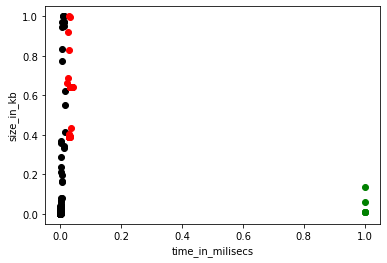

In [36]:
# cluster based on time  into easy, medium and hard
#t_np=np.array(t)
#print(t_np)
km = KMeans(n_clusters=3,random_state=0)
print(km)
#y_predicted=km.fit_predict(t[["consistency_time_milsecs","consistency_size_kb"]])
y_predicted=km.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted)
print(type(t))
t['cluster']=y_predicted
#print(t)
t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()


In [37]:
label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')
    elif y_predicted[i]==1:
        label_col.append('hard')
    else:
        label_col.append('medium')
        
partial_dataframe['label_time']=label_col
#full_dataframe_hard_medium=partial_dataframe[partial_dataframe['label']!='easy']
#full_dataframe_hard_medium=full_dataframe_hard_medium[full_dataframe_hard_medium['label']!='hard']
#full_dataframe_hard_medium

<ipython-input-37-eb25419cee92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [38]:
partial_dataframe # contains only time and memeory

file size_kb  \
0    0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....      95   
1                             00006.owl_functional.owl     425   
2                             00008.owl_functional.owl     130   
3                             00011.owl_functional.owl      77   
4                             00012.owl_functional.owl      99   
..                                                 ...     ...   
289  44487e0b-5833-4d9c-8488-d3f9694b0167_ppi_chees...      95   
290  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...     151   
291  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...      31   
292  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...      95   
293  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...      95   

    consistency_time_milsecs consistency_size_kb realisation_time_milsecs  \
0                         27               16240                       28   
1                         51               17836                       75   
2                         43               19856                       43   
3                         26               15720                       33   
4                         30               16024                       34   
..                       ...                 ...                      ...   
289                       29               16276                       30   
290                       24               15596                       30   
291                       23               15288                       25   
292                       30               16148                       31   
293                       30               16236                       31   

    realisation_size_kb classification_time_milsecs classification_size_kb  \
0                 17252                          27                  16976   
1                 22824                          61                  22320   
2                 21168                          45                  20884   
3                 17916                          33                  17992   
4                 17688                          32                  17696   
..                  ...                         ...                    ...   
289               17152                          30                  16936   
290               17100                          31                  16732   
291               15628                          21                  15376   
292               17088                          29                  16888   
293               17296                          28                  16952   

    label_time  
0         easy  
1         easy  
2         easy  
3         easy  
4         easy  
..         ...  
289       easy  
290       easy  
291       easy  
292       easy  
293       easy  

[16433 rows x 9 columns]

In [39]:
# collect the easy ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
#df_easy_drop=df_easy.drop(['label'],axis=1)
df_easy_drop=df_easy # contains based on time
df_easy_drop

file size_kb  \
0    0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....      95   
1                             00006.owl_functional.owl     425   
2                             00008.owl_functional.owl     130   
3                             00011.owl_functional.owl      77   
4                             00012.owl_functional.owl      99   
..                                                 ...     ...   
289  44487e0b-5833-4d9c-8488-d3f9694b0167_ppi_chees...      95   
290  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...     151   
291  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...      31   
292  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...      95   
293  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...      95   

    consistency_time_milsecs consistency_size_kb realisation_time_milsecs  \
0                         27               16240                       28   
1                         51               17836                       75   
2                         43               19856                       43   
3                         26               15720                       33   
4                         30               16024                       34   
..                       ...                 ...                      ...   
289                       29               16276                       30   
290                       24               15596                       30   
291                       23               15288                       25   
292                       30               16148                       31   
293                       30               16236                       31   

    realisation_size_kb classification_time_milsecs classification_size_kb  \
0                 17252                          27                  16976   
1                 22824                          61                  22320   
2                 21168                          45                  20884   
3                 17916                          33                  17992   
4                 17688                          32                  17696   
..                  ...                         ...                    ...   
289               17152                          30                  16936   
290               17100                          31                  16732   
291               15628                          21                  15376   
292               17088                          29                  16888   
293               17296                          28                  16952   

    label_time  
0         easy  
1         easy  
2         easy  
3         easy  
4         easy  
..         ...  
289       easy  
290       easy  
291       easy  
292       easy  
293       easy  

[16371 rows x 9 columns]

In [40]:
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())
print(df_easy.shape)

308466 13
(16371, 9)


(16371, 7)
KMeans(n_clusters=3, random_state=0)
[0 0 0 ... 0 0 0]


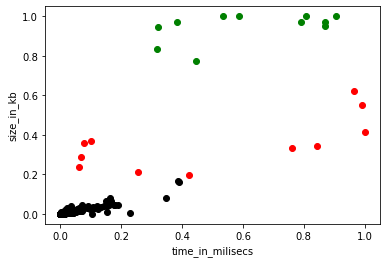

In [41]:
# now easy time ontologies clustered on memory
t=df_easy_drop.drop(['file','label_time'],axis=1)
#print(df_easy_drop.shape)
#print(t.columns)
scaler = MinMaxScaler()
scaler.fit(t)
t_df_scaled=scaler.transform(t)
#print(t_df_scaled)

t_MinMax = pd.DataFrame(data=t_df_scaled, columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])
t=t_MinMax

print(t.shape)
#t_np=np.array(t)
#print(t_np)
km_1 = KMeans(n_clusters=3,random_state=0)
print(km_1)
y_predicted_1=km_1.fit_predict(t[["consistency_size_kb"]])
print(y_predicted_1)
#print(type(t))
t['cluster']=y_predicted_1
#print(t)
t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()
#t_MinMax


In [42]:
label_col=[]
for i in range((y_predicted_1.shape[0])):
    if y_predicted_1[i]==0:
        label_col.append('easy')
    elif y_predicted_1[i]==1:
        label_col.append('hard')
    else:
        label_col.append('medium')
        
df_easy_drop['label_mem']=label_col
df_easy_time_mem=df_easy_drop # contains first based on time and now on memory
df_easy_time_mem

<ipython-input-42-a8a5d2ce3fc7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_easy_drop['label_mem']=label_col


file size_kb  \
0    0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....      95   
1                             00006.owl_functional.owl     425   
2                             00008.owl_functional.owl     130   
3                             00011.owl_functional.owl      77   
4                             00012.owl_functional.owl      99   
..                                                 ...     ...   
289  44487e0b-5833-4d9c-8488-d3f9694b0167_ppi_chees...      95   
290  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...     151   
291  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...      31   
292  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...      95   
293  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...      95   

    consistency_time_milsecs consistency_size_kb realisation_time_milsecs  \
0                         27               16240                       28   
1                         51               17836                       75   
2                         43               19856                       43   
3                         26               15720                       33   
4                         30               16024                       34   
..                       ...                 ...                      ...   
289                       29               16276                       30   
290                       24               15596                       30   
291                       23               15288                       25   
292                       30               16148                       31   
293                       30               16236                       31   

    realisation_size_kb classification_time_milsecs classification_size_kb  \
0                 17252                          27                  16976   
1                 22824                          61                  22320   
2                 21168                          45                  20884   
3                 17916                          33                  17992   
4                 17688                          32                  17696   
..                  ...                         ...                    ...   
289               17152                          30                  16936   
290               17100                          31                  16732   
291               15628                          21                  15376   
292               17088                          29                  16888   
293               17296                          28                  16952   

    label_time label_mem  
0         easy      easy  
1         easy      easy  
2         easy      easy  
3         easy      easy  
4         easy      easy  
..         ...       ...  
289       easy      easy  
290       easy      easy  
291       easy      easy  
292       easy      easy  
293       easy      easy  

[16371 rows x 10 columns]

In [43]:
total_df= pd.read_csv('final_new_more.csv') # for features collection 
print("size of final_new_more= ",total_df.shape)

df_easy_time_mem_feature=[]
for i in range(df_easy_time_mem.shape[0]):
    ont=df_easy_time_mem.iloc[i,:]['file']
    lab=df_easy_time_mem.iloc[i,:]['label_mem']
    #print(ont,lab)
    o=(np.array(total_df[total_df['file']==ont]))
    #print(o.shape)
    if o.shape[0]!=0:
    
        u=list(np.array(total_df[total_df['file']==ont])[0])
        u.append(str(lab))
        #print(u)
        df_easy_time_mem_feature.append(u)

    #break

total_df_cols=list(total_df.columns)
total_df_cols.append('label_mem')
#print(total_df_cols)
df_easy_time_mem_feature_df=pd.DataFrame(data=df_easy_time_mem_feature,columns=total_df_cols)
df_easy_time_mem_feature_df  # total easy time ontologies with easy , medium , hard memory and all features


size of final_new_more=  (16398, 100)


file  size_kb  \
0      0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....       95   
1                               00006.owl_functional.owl      425   
2                               00008.owl_functional.owl      130   
3                               00011.owl_functional.owl       77   
4                               00012.owl_functional.owl       99   
...                                                  ...      ...   
16331  44487e0b-5833-4d9c-8488-d3f9694b0167_ppi_chees...       95   
16332  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...      151   
16333  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...       31   
16334  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...       95   
16335  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...       95   

       consistency_time_milsecs  consistency_size_kb  \
0                            27                16240   
1                            51                17836   
2                            43                19856   
3                            26                15720   
4                            30                16024   
...                         ...                  ...   
16331                        29                16276   
16332                        24                15596   
16333                        23                15288   
16334                        30                16148   
16335                        30                16236   

       realisation_time_milsecs  realisation_size_kb  \
0                            28                17252   
1                            75                22824   
2                            43                21168   
3                            33                17916   
4                            34                17688   
...                         ...                  ...   
16331                        30                17152   
16332                        30                17100   
16333                        25                15628   
16334                        31                17088   
16335                        31                17296   

       classification_time_milsecs  classification_size_kb   SOV       ENR  \
0                               27                   16976   200  2.625000   
1                               61                   22320  1148  1.261695   
2                               45                   20884   238  2.144695   
3                               33                   17992   118  2.366492   
4                               32                   17696   173  2.015936   
...                            ...                     ...   ...       ...   
16331                           30                   16936   201  2.613333   
16332                           31                   16732   343  0.997085   
16333                           21                   15376   108  1.759259   
16334                           29                   16888   201  2.613333   
16335                           28                   16952   201  2.613333   

       ...  EQVP  DISP  INV  DOMN  RANG  CHN  CHNP    ELPROP  CAL_TIME  \
0      ...     4     0    6    96    94    0   0.0  0.931624       280   
1      ...     0     0   10     0     0    0   0.0  0.729730       110   
2      ...     0     0    0    70    70    0   0.0  1.000000        40   
3      ...     0     0    0    70    70    0   0.0  1.000000       150   
4      ...     0     0    1    96    98    0   0.0  0.988506        60   
...    ...   ...   ...  ...   ...   ...  ...   ...       ...       ...   
16331  ...     4     0    6    96    94    0   0.0  0.931624        30   
16332  ...     0     0    0     0     0    0   0.0  0.000000        40   
16333  ...     0     0   21    57    58    0   0.0  0.852349        70   
16334  ...     4     0    6    96    94    0   0.0  0.931624        40   
16335  ...     4     0    6    96    94    0   0.0  0.931624        30   

       label_mem  
0           easy  
1           e

<AxesSubplot:xlabel='label_mem', ylabel='consistency_size_kb'>

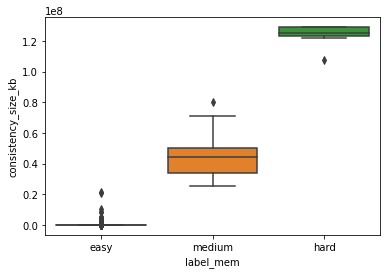

In [44]:
from scipy.integrate import quad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.boxplot(x='label_mem', y='consistency_size_kb', data=df_easy_time_mem_feature_df)

In [45]:
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())
print(df_easy_time_mem_feature_df['consistency_time_milsecs'].max(),df_easy_time_mem_feature_df['consistency_time_milsecs'].min())
print(df_easy['consistency_size_kb'].max(),df_easy['consistency_size_kb'].min())
print(df_easy_time_mem_feature_df['consistency_size_kb'].max(),df_easy_time_mem_feature_df['consistency_size_kb'].min())
(df_easy_time_mem_feature_df[df_easy_time_mem_feature_df['consistency_size_kb']== 21437240])

308466 13
308466 13
128838488 14532
128838488 14532


file  size_kb  consistency_time_milsecs  consistency_size_kb  \
15143  OWL2RL-50.owl   260198                    118837             21437240   

       realisation_time_milsecs  realisation_size_kb  \
15143                    128508             21757208   

       classification_time_milsecs  classification_size_kb     SOV       ENR  \
15143                       122102                21460440  896102  3.875132   

       ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  CAL_TIME  \
15143  ...     5     1   22    70    57    8  0.079208  0.838983    511720   

       label_mem  
15143       easy  

[1 rows x 101 columns]

In [46]:
# easy time with easy mem, medium mem and hard mem
l=df_easy_time_mem_feature_df.drop('file',axis=1)
x=l.groupby(l['label_mem']).agg(['min', 'max','mean'])
#x.to_csv('easy_time_mem_feature_16315.csv',index_label=True)
x
x_easy=x
x_easy

size_kb                        consistency_time_milsecs          \
              min     max           mean                      min     max   
label_mem                                                                   
easy           14  640425    2212.195587                       13  120335   
hard        11829  260201   71938.300000                    97796  279132   
medium        162  543808  174624.181818                    18699  308466   

                         consistency_size_kb                           \
                    mean                 min        max          mean   
label_mem                                                               
easy          317.279681               14532   21437240  5.117564e+04   
hard       196960.200000           107716396  128838488  1.242852e+08   
medium     155552.272727            25593828   80439780  4.601777e+07   

          realisation_time_milsecs  ...        CHN CHNP                      \
                               min  ...       mean  min       max      mean   
label_mem                           ...                                       
easy                            17  ...   3.585351  0.0  1.732673  0.044739   
hard                        117096  ...  11.200000  0.0  0.229885  0.077045   
medium                        7085  ...   3.636364  0.0  0.081633  0.036165   

             ELPROP                     CAL_TIME                         
                min       max      mean      min     max           mean  
label_mem                                                                
easy       0.000000  1.000000  0.824065        0  544350     992.278884  
hard       0.838828  0.948187  0.865869     1520  335900   55970.000000  
medium     0.000000  0.992188  0.569143      450  929310  253535.454545  

[3 rows x 297 columns]

In [47]:
m=total_df.drop('file',axis=1)
y=m.agg(['min', 'max','mean'])
#y.to_csv('total_df_mean.csv',index_label=True)

y

size_kb  consistency_time_milsecs  consistency_size_kb  \
min   1.400000e+01              1.300000e+01         1.453200e+04   
max   1.660138e+06              2.160045e+07         1.288385e+08   
mean  6.923731e+03              1.085644e+04         4.177581e+05   

      realisation_time_milsecs  realisation_size_kb  \
min               1.700000e+01         1.506400e+04   
max               2.160223e+07         1.288421e+08   
mean              3.403917e+04         6.504279e+05   

      classification_time_milsecs  classification_size_kb           SOV  \
min                  1.600000e+01            1.500000e+04  2.000000e+01   
max                  2.160272e+07            1.288393e+08  5.178704e+06   
mean                 2.916962e+04            6.238820e+05  1.891486e+04   

             ENR            TIP  ...         SUBP         EQVP           DISP  \
min     0.792017   -3987.000000  ...     0.000000     0.000000       0.000000   
max   205.600094  925339.000000  ...  7034.000000  3517.000000  850783.000000   
mean    2.055473    3072.196914  ...    50.518783     2.535065      51.995609   

             INV          DOMN          RANG         CHN      CHNP    ELPROP  \
min     0.000000      0.000000      0.000000    0.000000  0.000000  0.000000   
max   742.000000  10597.000000  10424.000000  317.000000  1.732673  1.000000   
mean    4.864801     35.452799     40.272594    3.603122  0.044842  0.823979   

          CAL_TIME  
min   0.000000e+00  
max   7.333710e+06  
mean  1.487792e+04  

[3 rows x 99 columns]

[0 0 0 ... 0 0 0]
(16336, 99)
99
['size_kb', 'consistency_time_milsecs', 'consistency_size_kb', 'realisation_time_milsecs', 'realisation_size_kb', 'classification_time_milsecs', 'classification_size_kb', 'SOV', 'ENR', 'TIP', 'EOG', 'RCH', 'CYC', 'GCI', 'HGCI', 'ESUB', 'DSUB', 'CSUB', 'SUPECHN', 'SUBECHN', 'SUBCCHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUBCCHN', 'DSUPDCHN', 'ELCLSPRT', 'ELAXPRT', 'HLC', 'RHLC', 'IHR', 'IIR', 'ITR', 'IND', 'aNOC', 'mNOC', 'tNOC', 'aCID', 'mCID', 'tCID', 'aCOD', 'mCOD', 'tCOD', 'aDIT', 'mDIT', 'tDIT', 'aNOP', 'mNOP', 'tNOP', 'ENUM', 'ENUMP', 'NEG', 'NEGP', 'CONJ', 'CONJP', 'DISJ', 'DISJP', 'UF', 'UFP', 'EF', 'EFP', 'VALUE', 'VALUEP', 'SELF', 'SELFP', 'MNCAR', 'MNCARP', 'MXCAR', 'MXCARP', 'CAR', 'CARP', 'OBP', 'OBPP', 'DTP', 'DTPP', 'FUN', 'FUNP', 'SYM', 'SYMP', 'TRN', 'TRNP', 'IFUN', 'IFUNP', 'ASYM', 'ASYMP', 'REFLE', 'REFLEP', 'IRREF', 'IRREFP', 'SUBP', 'EQVP', 'DISP', 'INV', 'DOMN', 'RANG', 'CHN', 'CHNP', 'ELPROP', 'CAL_TIME'] <class 'list'>
consistenc

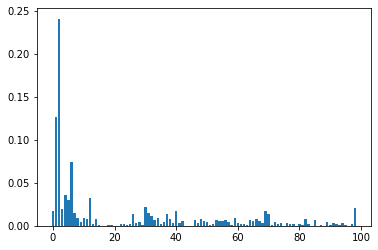

In [48]:

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import operator
le = preprocessing.LabelEncoder()
p=df_easy_time_mem_feature_df
le.fit(p['label_mem'])
g=le.transform(p['label_mem']) 
print(g)
x_train_np=p.drop(['file','label_mem'],axis=1)
print(x_train_np.shape)
y_train_np=np.array(g)


model = RandomForestClassifier(n_estimators = 100, random_state = 2)
model.feature_names = list(x_train_np.columns.values)
model.fit(x_train_np, y_train_np)
ft=list(model.feature_names)
importance = model.feature_importances_
print(model.n_features_)
print(ft,type(ft))

dict1_imp={}
c=0
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    val= round(v,5)
    #print(val,type(val),ft[c])
    dict1_imp[ft[c]]=val
    c+=1
#print(dict1_imp)
dict1_imp_sort=dict(sorted(dict1_imp.items(), key=operator.itemgetter(1),reverse=True))

for key,val in dict1_imp_sort.items():
    print(key,val)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

easy_feature_sort_dic=dict1_imp_sort


top_n_1=(list(easy_feature_sort_dic.keys())[:30])

In [49]:

d= dict(x_easy)
easy_zero_features =[]
for key, value in dict1_imp_sort.items():
    if value == 0.0:
        if ( sum(list(d[(key, 'mean')]))/3 )== 0.0 :
            print(key,list(d[(key, 'mean')]))
            easy_zero_features.append(key)
print(easy_zero_features)

print(top_n_1)

aDIT [0.0, 0.0, 0.0]
mDIT [0, 0, 0]
tDIT [0, 0, 0]
ASYMP [0.0, 0.0, 0.0]
REFLEP [0.0, 0.0, 0.0]
IRREFP [0.0, 0.0, 0.0]
['aDIT', 'mDIT', 'tDIT', 'ASYMP', 'REFLEP', 'IRREFP']
['consistency_size_kb', 'consistency_time_milsecs', 'classification_size_kb', 'realisation_size_kb', 'CYC', 'classification_time_milsecs', 'IHR', 'CAL_TIME', 'realisation_time_milsecs', 'aCOD', 'size_kb', 'CAR', 'SOV', 'IIR', 'aCID', 'ELCLSPRT', 'CARP', 'ITR', 'aNOC', 'EOG', 'EF', 'ENR', 'IFUNP', 'HGCI', 'mCID', 'RCH', 'MNCARP', 'tNOP', 'SELFP', 'REFLE']


In [50]:
#proccessing easy time with easy memory with 108 features

cols_list=list(df_easy_time_mem_feature_df.columns)
print(cols_list,len(cols_list))

['file', 'size_kb', 'consistency_time_milsecs', 'consistency_size_kb', 'realisation_time_milsecs', 'realisation_size_kb', 'classification_time_milsecs', 'classification_size_kb', 'SOV', 'ENR', 'TIP', 'EOG', 'RCH', 'CYC', 'GCI', 'HGCI', 'ESUB', 'DSUB', 'CSUB', 'SUPECHN', 'SUBECHN', 'SUBCCHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUBCCHN', 'DSUPDCHN', 'ELCLSPRT', 'ELAXPRT', 'HLC', 'RHLC', 'IHR', 'IIR', 'ITR', 'IND', 'aNOC', 'mNOC', 'tNOC', 'aCID', 'mCID', 'tCID', 'aCOD', 'mCOD', 'tCOD', 'aDIT', 'mDIT', 'tDIT', 'aNOP', 'mNOP', 'tNOP', 'ENUM', 'ENUMP', 'NEG', 'NEGP', 'CONJ', 'CONJP', 'DISJ', 'DISJP', 'UF', 'UFP', 'EF', 'EFP', 'VALUE', 'VALUEP', 'SELF', 'SELFP', 'MNCAR', 'MNCARP', 'MXCAR', 'MXCARP', 'CAR', 'CARP', 'OBP', 'OBPP', 'DTP', 'DTPP', 'FUN', 'FUNP', 'SYM', 'SYMP', 'TRN', 'TRNP', 'IFUN', 'IFUNP', 'ASYM', 'ASYMP', 'REFLE', 'REFLEP', 'IRREF', 'IRREFP', 'SUBP', 'EQVP', 'DISP', 'INV', 'DOMN', 'RANG', 'CHN', 'CHNP', 'ELPROP', 'CAL_TIME', 'label_mem'] 101


(16336, 101)
(16315, 101)
feature name=  size_kb
feature values=  [ 95 425 130 ...  31  95  95]
max value =  640425 min value =  14
mean=  2212.1955868832365 standard deviation=  10789.605955559342
left range=  -485.205902006599 right range=  23791.40749800192
data covered within this range=  97.87 %
data covered within 1 standard deviation=  96.3 %
data covered within 2 standard deviation=  97.87 %
data covered within 3 standard deviation=  98.85 %



normality test :----

kurtosis value=  1169.9602876316687
skewness value=  25.36136888729398


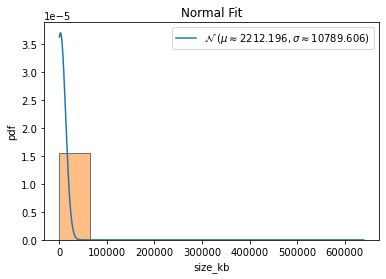


QQ plot 



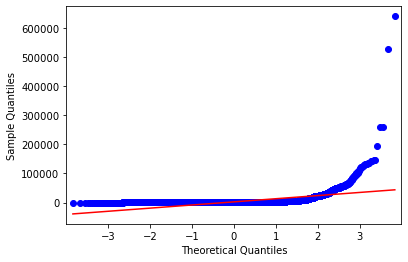


 Shapiro-Wilk Test 
 
Statistics=39737.813, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_time_milsecs
feature values=  [27 51 43 ... 23 30 30]
max value =  120335 min value =  13
mean=  317.2796812749004 standard deviation=  2063.7929943567233
left range=  -198.66856731428044 right range=  4444.865669988347
data covered within this range=  98.41 %
data covered within 1 standard deviation=  97.44 %
data covered within 2 standard deviation=  98.41 %
data covered within 3 standard deviation=  98.84 %



normality test :----

kurtosis value=  1549.787704102591
skewness value=  31.920888306912975


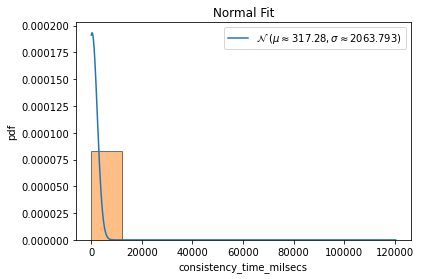


QQ plot 



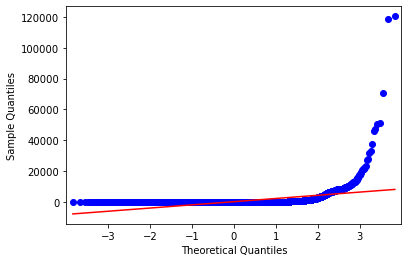


 Shapiro-Wilk Test 
 
Statistics=43467.358, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_size_kb
feature values=  [16240 17836 19856 ... 15288 16148 16236]
max value =  21437240 min value =  14532
mean=  51175.63567269384 standard deviation=  314024.3833285891
left range=  -27330.460159453432 right range=  679224.402329872
data covered within this range=  99.2 %
data covered within 1 standard deviation=  97.72 %
data covered within 2 standard deviation=  99.2 %
data covered within 3 standard deviation=  99.55 %



normality test :----

kurtosis value=  2627.6054536579913
skewness value=  43.89321521727748


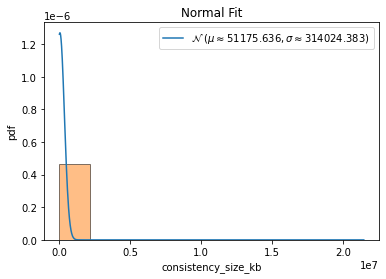


QQ plot 



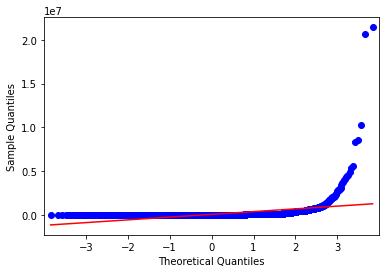


 Shapiro-Wilk Test 
 
Statistics=49000.947, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_time_milsecs
feature values=  [28 75 43 ... 25 31 31]
max value =  21602229 min value =  17
mean=  22203.31418939626 standard deviation=  634855.5439190743
left range=  -136510.5717903723 right range=  1291914.402027545
data covered within this range=  99.85 %
data covered within 1 standard deviation=  99.83 %
data covered within 2 standard deviation=  99.85 %
data covered within 3 standard deviation=  99.87 %



normality test :----

kurtosis value=  1081.1270436054729
skewness value=  32.500226527585575


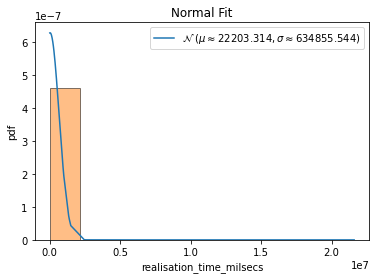


QQ plot 



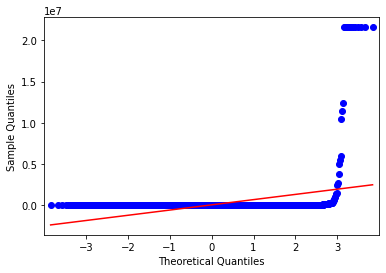


 Shapiro-Wilk Test 
 
Statistics=43514.669, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_size_kb
feature values=  [17252 22824 21168 ... 15628 17088 17296]
max value =  128349296 min value =  15064
mean=  291911.80435182346 standard deviation=  3970693.0613359
left range=  -700761.4609821516 right range=  8233297.927023623
data covered within this range=  99.57 %
data covered within 1 standard deviation=  99.44 %
data covered within 2 standard deviation=  99.57 %
data covered within 3 standard deviation=  99.64 %



normality test :----

kurtosis value=  553.4417103380786
skewness value=  22.230902115298875


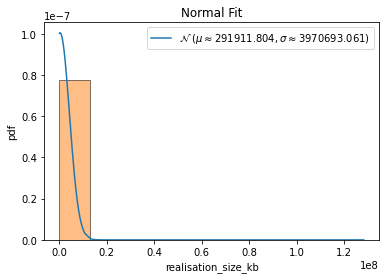


QQ plot 



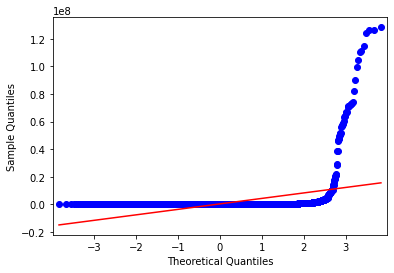


 Shapiro-Wilk Test 
 
Statistics=37225.097, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_time_milsecs
feature values=  [27 61 45 ... 21 29 28]
max value =  21602719 min value =  16
mean=  18447.11418939626 standard deviation=  566376.8309594273
left range=  -123147.09355046056 right range=  1151200.7761082507
data covered within this range=  99.86 %
data covered within 1 standard deviation=  99.84 %
data covered within 2 standard deviation=  99.86 %
data covered within 3 standard deviation=  99.88 %



normality test :----

kurtosis value=  1322.5375753966462
skewness value=  35.82487393547545


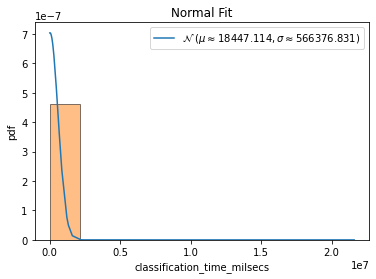


QQ plot 



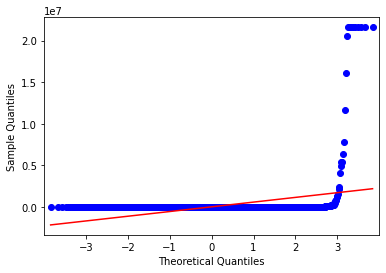


 Shapiro-Wilk Test 
 
Statistics=45216.780, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_size_kb
feature values=  [16976 22320 20884 ... 15376 16888 16952]
max value =  126538960 min value =  15000
mean=  262934.3774440699 standard deviation=  3560519.9643019135
left range=  -627195.6136314084 right range=  7383974.306047897
data covered within this range=  99.55 %
data covered within 1 standard deviation=  99.44 %
data covered within 2 standard deviation=  99.55 %
data covered within 3 standard deviation=  99.65 %



normality test :----

kurtosis value=  592.1448230171923
skewness value=  22.929116314346192


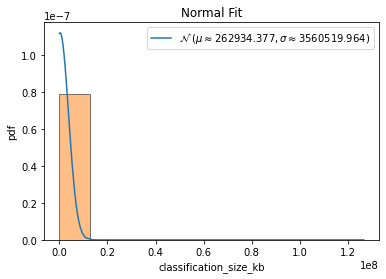


QQ plot 



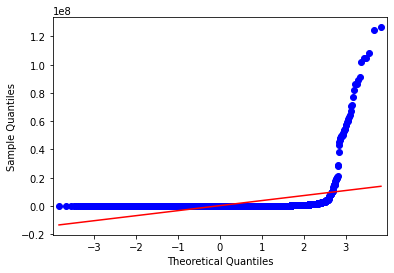


 Shapiro-Wilk Test 
 
Statistics=37732.181, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SOV
feature values=  [ 200 1148  238 ...  108  201  201]
max value =  896102 min value =  20
mean=  4115.164695065891 standard deviation=  18213.90348562502
left range=  -438.311176340364 right range=  40542.97166631593
data covered within this range=  97.95 %
data covered within 1 standard deviation=  95.4 %
data covered within 2 standard deviation=  97.95 %
data covered within 3 standard deviation=  98.63 %



normality test :----

kurtosis value=  819.8144809245252
skewness value=  21.3699623633679


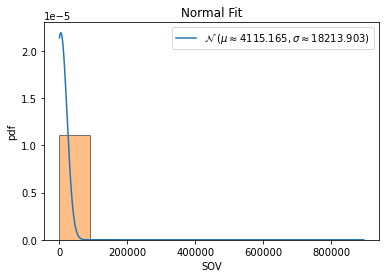


QQ plot 



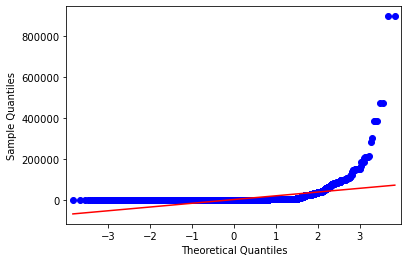


 Shapiro-Wilk Test 
 
Statistics=36968.381, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ENR
feature values=  [2.625      1.26169492 2.14469453 ... 1.75925926 2.61333333 2.61333333]
max value =  205.60009420631198 min value =  0.7920168067226891
mean=  2.0432736144999537 standard deviation=  4.202340380584095
left range=  0.9926885193539299 right range=  10.447954375668145
data covered within this range=  98.69 %
data covered within 1 standard deviation=  99.38 %
data covered within 2 standard deviation=  99.63 %
data covered within 3 standard deviation=  99.69 %



normality test :----

kurtosis value=  1117.6573658670502
skewness value=  30.252634138293622


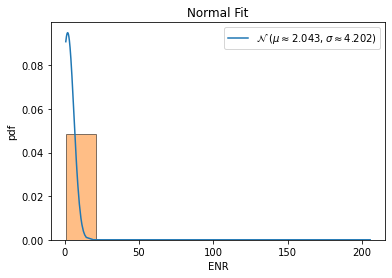


QQ plot 



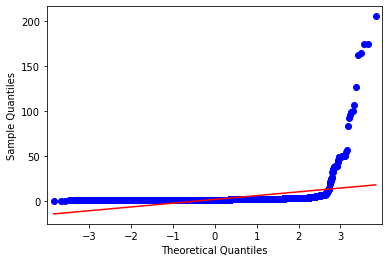


 Shapiro-Wilk Test 
 
Statistics=42407.673, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  EOG
feature values=  [3.28057065 2.1731571  3.0588999  ... 2.54163516 3.28057065 3.28057065]
max value =  6.3259046804172 min value =  0.0
mean=  2.459998166193242 standard deviation=  0.6393628526242094
left range=  2.3001574530371895 right range=  3.738723871441661
data covered within this range=  69.75 %
data covered within 1 standard deviation=  68.03 %
data covered within 2 standard deviation=  95.12 %
data covered within 3 standard deviation=  98.49 %



normality test :----

kurtosis value=  1.8624393447007233
skewness value=  -0.8461802592609324


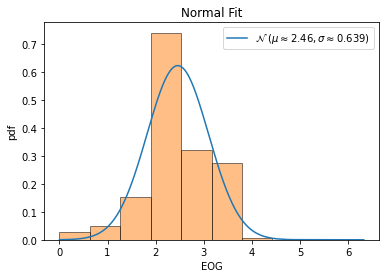


QQ plot 



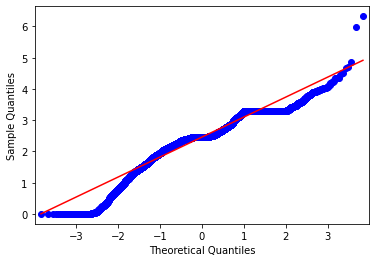


 Shapiro-Wilk Test 
 
Statistics=2190.831, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  RCH
feature values=  [0.36507937 0.21082221 0.61818182 ... 0.         0.36507937 0.36507937]
max value =  0.999752435713145 min value =  0.0
mean=  0.32201237495467694 standard deviation=  0.2153241485545232
left range=  0.26818133781604614 right range=  0.7526606720637233
data covered within this range=  56.73 %
data covered within 1 standard deviation=  65.82 %
data covered within 2 standard deviation=  97.55 %
data covered within 3 standard deviation=  99.97 %



normality test :----

kurtosis value=  -0.8487749464414711
skewness value=  0.1050659255102921


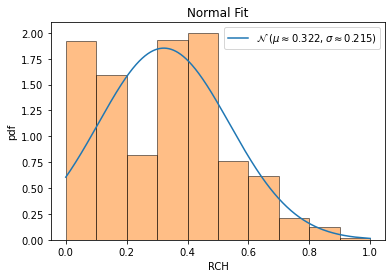


QQ plot 



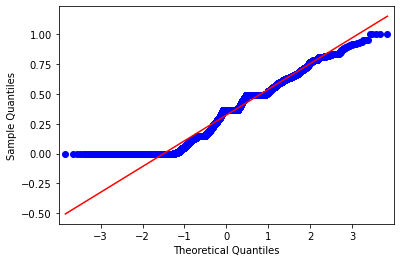


 Shapiro-Wilk Test 
 
Statistics=1775.765, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CYC
feature values=  [368 386 358 ...  82 367 367]
max value =  2576625 min value =  0
mean=  8714.45730922464 standard deviation=  49566.71350644909
left range=  -3677.2210673876325 right range=  107847.88432212282
data covered within this range=  98.3 %
data covered within 1 standard deviation=  96.56 %
data covered within 2 standard deviation=  98.3 %
data covered within 3 standard deviation=  98.79 %



normality test :----

kurtosis value=  964.0801184462653
skewness value=  23.268406034587446


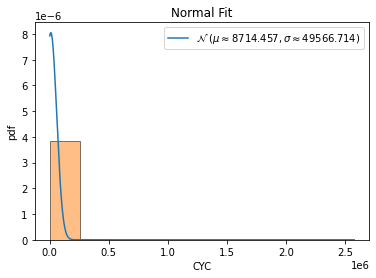


QQ plot 



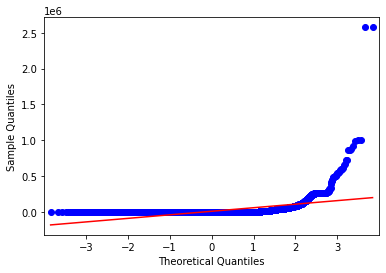


 Shapiro-Wilk Test 
 
Statistics=38324.222, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  HGCI
feature values=  [4 0 0 ... 2 4 4]
max value =  61244 min value =  0
mean=  110.1113699049954 standard deviation=  1431.875329688165
left range=  -247.85746251704586 right range=  2973.8620292813257
data covered within this range=  99.39 %
data covered within 1 standard deviation=  99.08 %
data covered within 2 standard deviation=  99.39 %
data covered within 3 standard deviation=  99.55 %



normality test :----

kurtosis value=  723.8125474666284
skewness value=  24.101665685970374


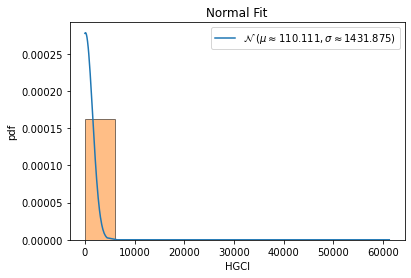


QQ plot 



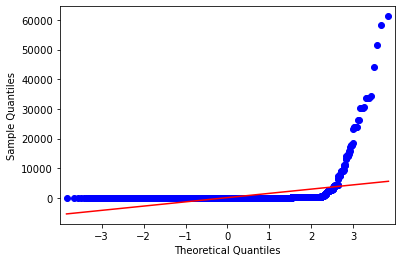


 Shapiro-Wilk Test 
 
Statistics=38627.818, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ELCLSPRT
feature values=  [0.62903226 1.         0.39449541 ... 1.         0.62903226 0.62903226]
max value =  1.0 min value =  0.034066325273161
mean=  0.8943581422390922 standard deviation=  0.16687544581405345
left range=  0.8526392807855788 right range=  1.2281090338671992
data covered within this range=  74.49 %
data covered within 1 standard deviation=  79.22 %
data covered within 2 standard deviation=  95.92 %
data covered within 3 standard deviation=  98.57 %



normality test :----

kurtosis value=  1.1755186278174001
skewness value=  -1.4816475823227344


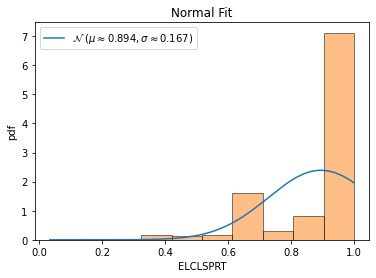


QQ plot 



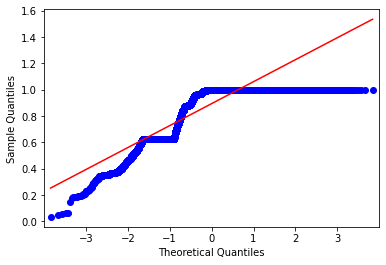


 Shapiro-Wilk Test 
 
Statistics=3740.116, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IHR
feature values=  [0 0 6 ... 0 0 0]
max value =  615096 min value =  0
mean=  960.748881397487 standard deviation=  12910.874578884046
left range=  -2266.9697633235246 right range=  26782.49803916558
data covered within this range=  99.22 %
data covered within 1 standard deviation=  98.61 %
data covered within 2 standard deviation=  99.22 %
data covered within 3 standard deviation=  99.53 %



normality test :----

kurtosis value=  1290.3082572910882
skewness value=  32.22340281107459


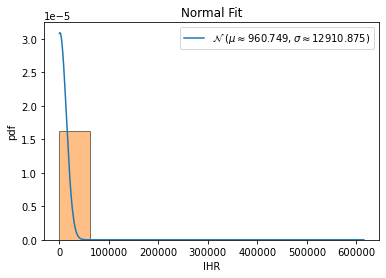


QQ plot 



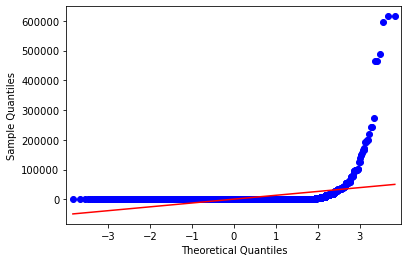


 Shapiro-Wilk Test 
 
Statistics=43498.888, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IIR
feature values=  [14  0  0 ...  0 14 14]
max value =  464492 min value =  0
mean=  345.2753294514251 standard deviation=  7166.6050239756705
left range=  -1446.3759265424926 right range=  14678.485377402767
data covered within this range=  99.56 %
data covered within 1 standard deviation=  99.29 %
data covered within 2 standard deviation=  99.56 %
data covered within 3 standard deviation=  99.67 %



normality test :----

kurtosis value=  2578.2525359916863
skewness value=  45.96694494982893


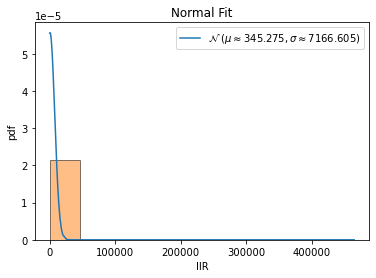


QQ plot 



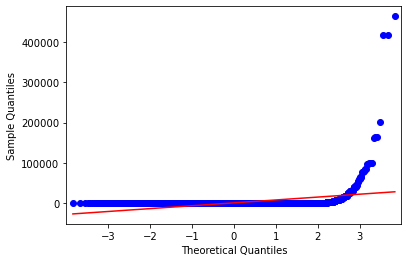


 Shapiro-Wilk Test 
 
Statistics=49779.098, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ITR
feature values=  [0 0 0 ... 0 0 0]
max value =  199845 min value =  0
mean=  329.0392277045664 standard deviation=  3978.7662353955457
left range=  -665.65233114432 right range=  8286.571698495658
data covered within this range=  99.22 %
data covered within 1 standard deviation=  98.69 %
data covered within 2 standard deviation=  99.22 %
data covered within 3 standard deviation=  99.38 %



normality test :----

kurtosis value=  749.0190349079123
skewness value=  23.138122924174755


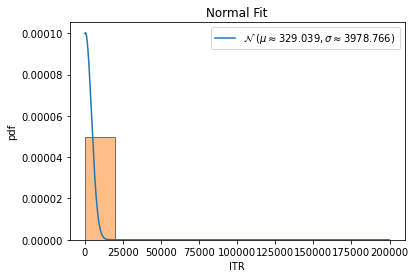


QQ plot 



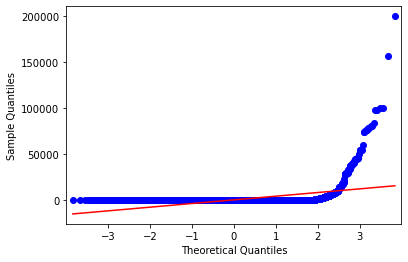


 Shapiro-Wilk Test 
 
Statistics=38053.271, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aNOC
feature values=  [0.33333333 0.84891075 0.98181818 ... 0.38888889 0.33333333 0.33333333]
max value =  35.9775467775468 min value =  0.0
mean=  0.8792516409129567 standard deviation=  0.5720548885749904
left range=  0.7362379187692091 right range=  2.0233614180629376
data covered within this range=  70.4 %
data covered within 1 standard deviation=  88.2 %
data covered within 2 standard deviation=  98.83 %
data covered within 3 standard deviation=  99.41 %



normality test :----

kurtosis value=  1108.9044845384967
skewness value=  21.03186399632716


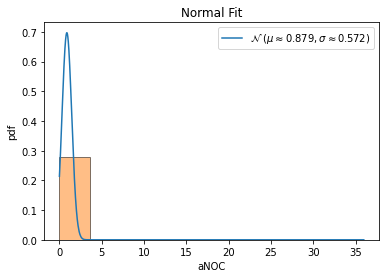


QQ plot 



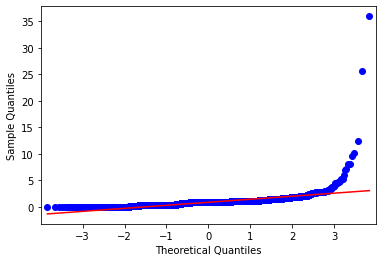


 Shapiro-Wilk Test 
 
Statistics=36957.970, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aCID
feature values=  [7.15873016 1.07870696 3.53636364 ... 6.88888889 7.15873016 7.15873016]
max value =  86574.72727272731 min value =  0.499898146261968
mean=  11.336672930406213 standard deviation=  685.291143562797
left range=  -159.986112960293 right range=  1381.918960056
data covered within this range=  99.96 %
data covered within 1 standard deviation=  99.91 %
data covered within 2 standard deviation=  99.96 %
data covered within 3 standard deviation=  99.97 %



normality test :----

kurtosis value=  15606.123602089669
skewness value=  123.82767764320342


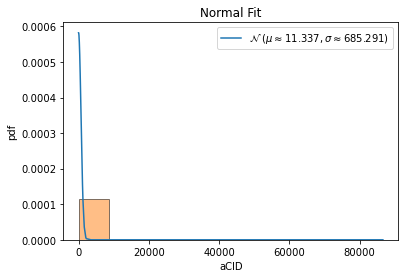


QQ plot 



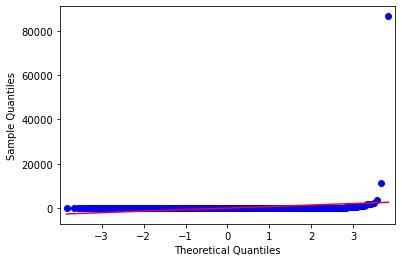


 Shapiro-Wilk Test 
 
Statistics=69313.053, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  mCID
feature values=  [28 22 22 ... 34 28 28]
max value =  476124 min value =  1
mean=  1746.556665645112 standard deviation=  13037.719905290167
left range=  -1512.8733106774298 right range=  27821.996476225446
data covered within this range=  98.66 %
data covered within 1 standard deviation=  97.02 %
data covered within 2 standard deviation=  98.66 %
data covered within 3 standard deviation=  99.17 %



normality test :----

kurtosis value=  561.546653956666
skewness value=  20.565618710955928


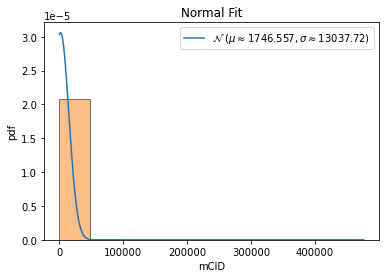


QQ plot 



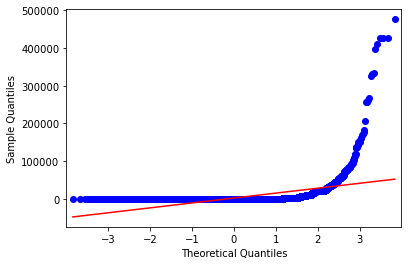


 Shapiro-Wilk Test 
 
Statistics=36118.227, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aCOD
feature values=  [4.74603175 1.27336613 2.79090909 ... 2.27777778 4.74603175 4.74603175]
max value =  333.8125 min value =  0.833333333333333
mean=  2.3448864953102606 standard deviation=  3.0091386917455183
left range=  1.5926018223738811 right range=  8.363163878801297
data covered within this range=  68.02 %
data covered within 1 standard deviation=  99.36 %
data covered within 2 standard deviation=  99.7 %
data covered within 3 standard deviation=  99.79 %



normality test :----

kurtosis value=  9040.075285237417
skewness value=  83.27937079813783


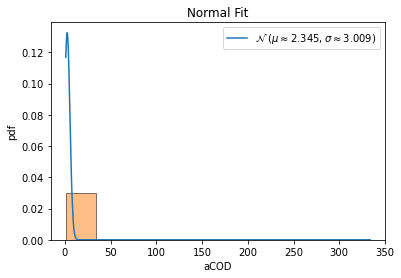


QQ plot 



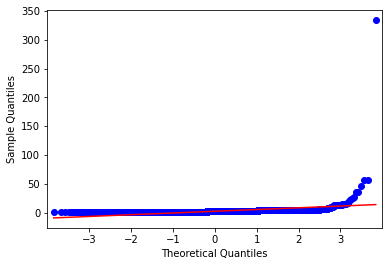


 Shapiro-Wilk Test 
 
Statistics=61179.312, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tNOP
feature values=  [  66 1512  178 ...   18   66   66]
max value =  1049095 min value =  5
mean=  8410.946184492797 standard deviation=  36285.051099601464
left range=  -660.3165904075686 right range=  80981.04838369573
data covered within this range=  97.28 %
data covered within 1 standard deviation=  96.11 %
data covered within 2 standard deviation=  97.28 %
data covered within 3 standard deviation=  98.07 %



normality test :----

kurtosis value=  178.19684064564584
skewness value=  10.771881739894752


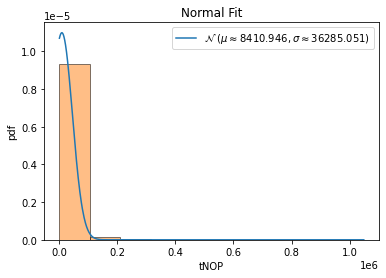


QQ plot 



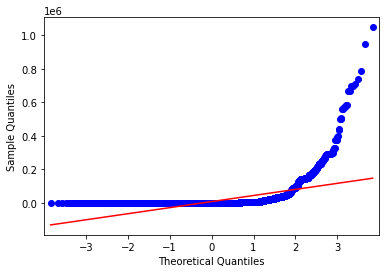


 Shapiro-Wilk Test 
 
Statistics=26551.091, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  EF
feature values=  [  0 300   2 ...   0   0   0]
max value =  206756 min value =  0
mean=  1258.7798958014098 standard deviation=  6879.5195574263535
left range=  -461.09999355517857 right range=  15017.819010654117
data covered within this range=  97.89 %
data covered within 1 standard deviation=  96.52 %
data covered within 2 standard deviation=  97.89 %
data covered within 3 standard deviation=  98.87 %



normality test :----

kurtosis value=  198.36805775762204
skewness value=  11.714205603084215


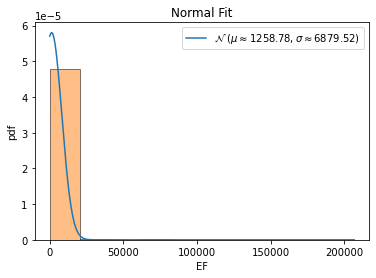


QQ plot 



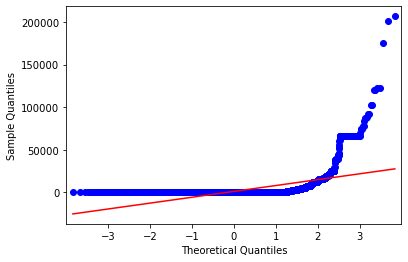


 Shapiro-Wilk Test 
 
Statistics=27679.020, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SELFP
feature values=  [0. 0. 0. ... 0. 0. 0.]
max value =  0.3529 min value =  0.0
mean=  0.00047030340177750535 standard deviation=  0.010277490085211411
left range=  -0.0020990691195253474 right range=  0.021025283572200328
data covered within this range=  99.69 %
data covered within 1 standard deviation=  99.68 %
data covered within 2 standard deviation=  99.69 %
data covered within 3 standard deviation=  99.72 %



normality test :----

kurtosis value=  642.3593109434476
skewness value=  24.82348618175392


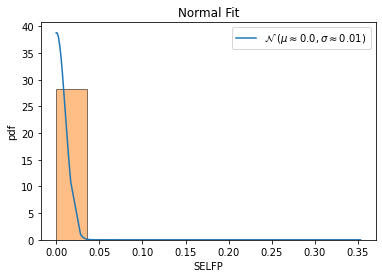


QQ plot 



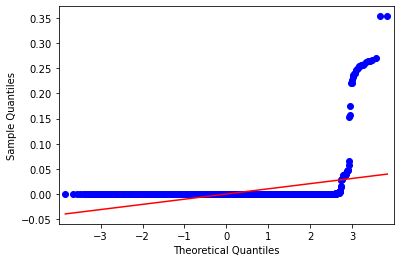


 Shapiro-Wilk Test 
 
Statistics=38971.465, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  MNCARP
feature values=  [0.     0.     0.0882 ... 0.     0.     0.    ]
max value =  1.0 min value =  0.0
mean=  0.011731498620901011 standard deviation=  0.0662256751880516
left range=  -0.004824920176111889 right range=  0.1441828489970042
data covered within this range=  97.95 %
data covered within 1 standard deviation=  96.32 %
data covered within 2 standard deviation=  97.95 %
data covered within 3 standard deviation=  98.51 %



normality test :----

kurtosis value=  105.31782199517613
skewness value=  9.412821559581374


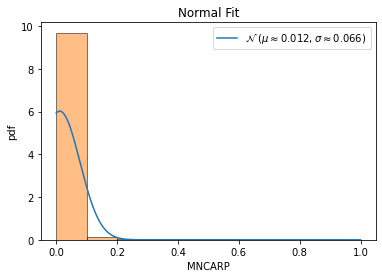


QQ plot 



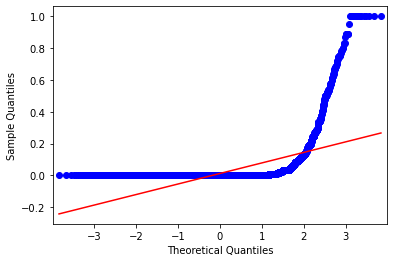


 Shapiro-Wilk Test 
 
Statistics=24348.933, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAR
feature values=  [ 0  0 16 ...  0  0  0]
max value =  1843 min value =  0
mean=  5.759239963224027 standard deviation=  50.458985747787345
left range=  -6.8555064737228095 right range=  106.67721145879872
data covered within this range=  99.09 %
data covered within 1 standard deviation=  99.03 %
data covered within 2 standard deviation=  99.09 %
data covered within 3 standard deviation=  99.16 %



normality test :----

kurtosis value=  318.80761149160224
skewness value=  14.79723596725837


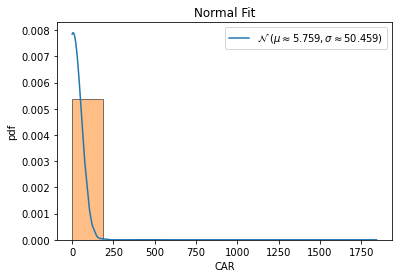


QQ plot 



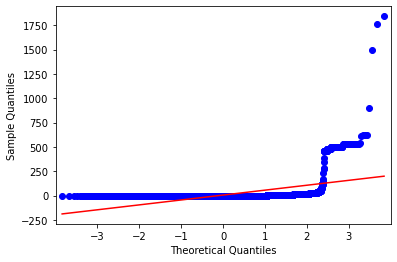


 Shapiro-Wilk Test 
 
Statistics=31117.264, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CARP
feature values=  [0.     0.     0.2353 ... 0.     0.     0.    ]
max value =  1.0 min value =  0.0
mean=  0.01946871590560834 standard deviation=  0.07600090309986446
left range=  0.0004684901306422247 right range=  0.17147052210533725
data covered within this range=  10.39 %
data covered within 1 standard deviation=  93.96 %
data covered within 2 standard deviation=  95.23 %
data covered within 3 standard deviation=  96.78 %



normality test :----

kurtosis value=  36.960677673685865
skewness value=  5.423765062316098


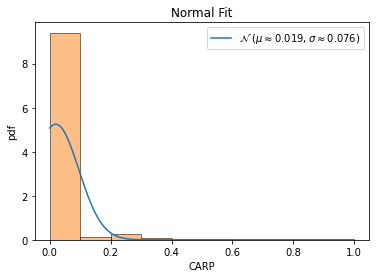


QQ plot 



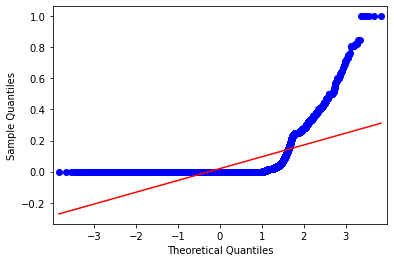


 Shapiro-Wilk Test 
 
Statistics=17159.626, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IFUNP
feature values=  [0. 0. 0. ... 0. 0. 0.]
max value =  0.3084 min value =  0.0
mean=  0.0021177811829604654 standard deviation=  0.015206986699515502
left range=  -0.00168396549191841 right range=  0.032531754581991465
data covered within this range=  98.0 %
data covered within 1 standard deviation=  97.43 %
data covered within 2 standard deviation=  98.0 %
data covered within 3 standard deviation=  98.47 %



normality test :----

kurtosis value=  124.88670702522413
skewness value=  10.09185450985013


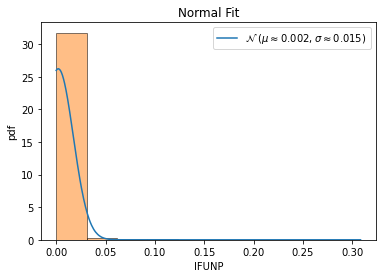


QQ plot 



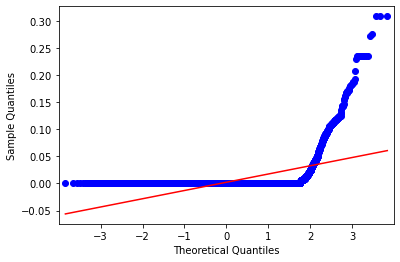


 Shapiro-Wilk Test 
 
Statistics=25364.027, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  REFLE
feature values=  [0 0 0 ... 0 0 0]
max value =  2 min value =  0
mean=  0.0012871590560833588 standard deviation=  0.03752451004900058
left range=  -0.008093968456166785 right range=  0.07633617915408451
data covered within this range=  99.88 %
data covered within 1 standard deviation=  99.88 %
data covered within 2 standard deviation=  99.88 %
data covered within 3 standard deviation=  99.88 %



normality test :----

kurtosis value=  1074.693648738399
skewness value=  31.217763908412213


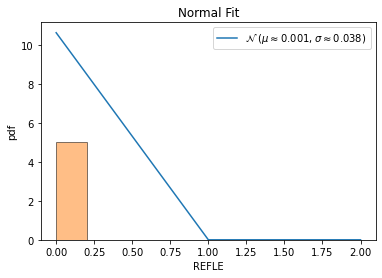


QQ plot 



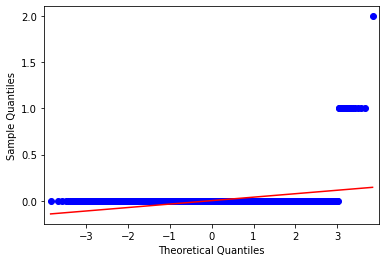


 Shapiro-Wilk Test 
 
Statistics=42873.367, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAL_TIME
feature values=  [280 110  40 ...  70  40  30]
max value =  544350 min value =  0
mean=  992.2788844621514 standard deviation=  8747.873329478662
left range=  -1194.689447907514 right range=  18488.025543419473
data covered within this range=  98.9 %
data covered within 1 standard deviation=  97.87 %
data covered within 2 standard deviation=  98.9 %
data covered within 3 standard deviation=  99.63 %



normality test :----

kurtosis value=  1912.5261057937603
skewness value=  37.76580218578897


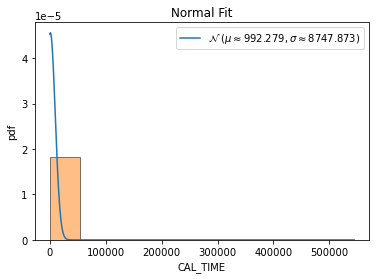


QQ plot 



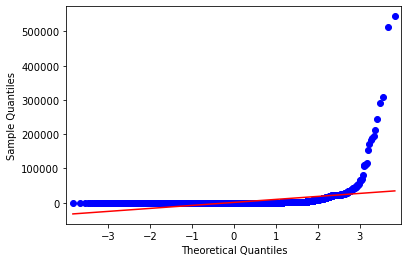


 Shapiro-Wilk Test 
 
Statistics=46308.857, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------



In [51]:
#after easy time and memory clusering ,
#collect the easy ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

easy_zero_features.append('file')
easy_zero_features.append('label_mem')


#print(easy_zero_features)
print(df_easy_time_mem_feature_df.shape)
easy_time_mem_easy = df_easy_time_mem_feature_df[df_easy_time_mem_feature_df['label_mem']== 'easy']
print(easy_time_mem_easy.shape)
prior_easy= round(easy_time_mem_easy.shape[0] / df_easy_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in easy_zero_features:
    if cols_list[i] in top_n_1:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(easy_time_mem_easy[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_easy) *gamma * std) 
        #ry= mean + ((1- prior_easy) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / easy_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break

In [52]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
easy_time_easy_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(easy_time_easy_mem_table.shape)
#easy_time_easy_mem_table.to_csv('easy_time_easy_mem_table.csv',index=False)
#easy_time_mem_easy.to_csv('easy_time_mem_easy.csv',index=False)

(30, 13)


In [53]:
easy_time_mem_easy

file  size_kb  \
0      0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....       95   
1                               00006.owl_functional.owl      425   
2                               00008.owl_functional.owl      130   
3                               00011.owl_functional.owl       77   
4                               00012.owl_functional.owl       99   
...                                                  ...      ...   
16331  44487e0b-5833-4d9c-8488-d3f9694b0167_ppi_chees...       95   
16332  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...      151   
16333  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...       31   
16334  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...       95   
16335  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...       95   

       consistency_time_milsecs  consistency_size_kb  \
0                            27                16240   
1                            51                17836   
2                            43                19856   
3                            26                15720   
4                            30                16024   
...                         ...                  ...   
16331                        29                16276   
16332                        24                15596   
16333                        23                15288   
16334                        30                16148   
16335                        30                16236   

       realisation_time_milsecs  realisation_size_kb  \
0                            28                17252   
1                            75                22824   
2                            43                21168   
3                            33                17916   
4                            34                17688   
...                         ...                  ...   
16331                        30                17152   
16332                        30                17100   
16333                        25                15628   
16334                        31                17088   
16335                        31                17296   

       classification_time_milsecs  classification_size_kb   SOV       ENR  \
0                               27                   16976   200  2.625000   
1                               61                   22320  1148  1.261695   
2                               45                   20884   238  2.144695   
3                               33                   17992   118  2.366492   
4                               32                   17696   173  2.015936   
...                            ...                     ...   ...       ...   
16331                           30                   16936   201  2.613333   
16332                           31                   16732   343  0.997085   
16333                           21                   15376   108  1.759259   
16334                           29                   16888   201  2.613333   
16335                           28                   16952   201  2.613333   

       ...  EQVP  DISP  INV  DOMN  RANG  CHN  CHNP    ELPROP  CAL_TIME  \
0      ...     4     0    6    96    94    0   0.0  0.931624       280   
1      ...     0     0   10     0     0    0   0.0  0.729730       110   
2      ...     0     0    0    70    70    0   0.0  1.000000        40   
3      ...     0     0    0    70    70    0   0.0  1.000000       150   
4      ...     0     0    1    96    98    0   0.0  0.988506        60   
...    ...   ...   ...  ...   ...   ...  ...   ...       ...       ...   
16331  ...     4     0    6    96    94    0   0.0  0.931624        30   
16332  ...     0     0    0     0     0    0   0.0  0.000000        40   
16333  ...     0     0   21    57    58    0   0.0  0.852349        70   
16334  ...     4     0    6    96    94    0   0.0  0.931624        40   
16335  ...     4     0    6    96    94    0   0.0  0.931624        30   

       label_mem  
0           easy  
1           e

(16336, 101)
(11, 101)
feature name=  size_kb
feature values=  [   162   5371   2138   4702   5842   3722   7317 543804 260194 543806
 543808]
max value =  543808 min value =  162
mean=  174624.18181818182 standard deviation=  237334.29346304614
left range=  55957.035086658754 right range=  293291.32854970486
0.7351 1.5555
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2322210694069688
skewness value=  0.7949513890228823


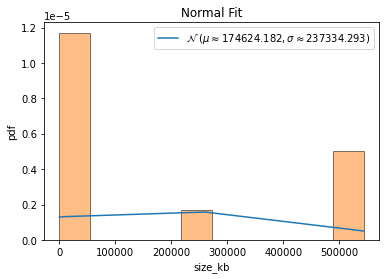


QQ plot 



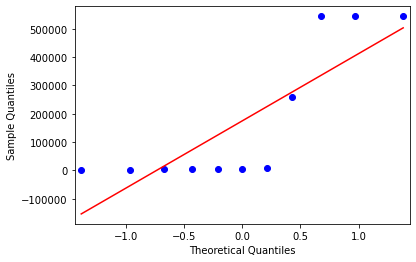


 Shapiro-Wilk Test 
 
Statistics=3.225, p=0.199395
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_time_milsecs
feature values=  [305829  18699  30984  24182  20796  78794 297147 308466 130727 234994
 260457]
max value =  308466 min value =  18699
mean=  155552.27272727274 standard deviation=  120416.8367856882
left range=  95343.85433442864 right range=  215760.69112011683
1.1365 1.2699
data covered within this range=  9.09 %
percent left and right=  54.55 45.45
data covered within 1 standard deviation=  36.36 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.757405394370742
skewness value=  0.09298933799566318


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


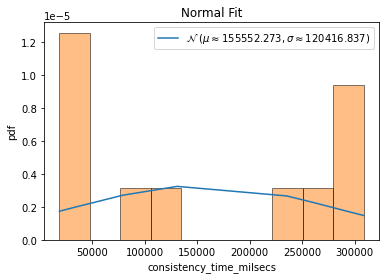


QQ plot 



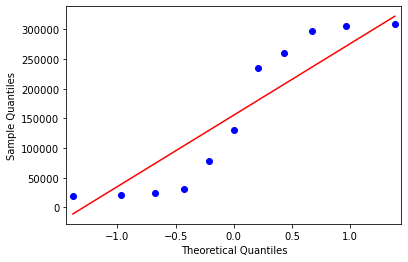


 Shapiro-Wilk Test 
 
Statistics=7.120, p=0.028436
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_size_kb
feature values=  [70840424 30801852 47532040 46262556 36906884 27519884 80439780 53222836
 25593828 42794300 44281112]
max value =  80439780 min value =  25593828
mean=  46017772.36363637 standard deviation=  16355575.005463459
left range=  37839984.860904634 right range=  54195559.8663681
1.2487 2.1046
data covered within this range=  45.45 %
percent left and right=  54.55 45.45
data covered within 1 standard deviation=  63.64 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.28388492072638005
skewness value=  0.774847373068386


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


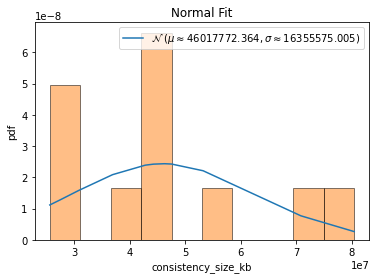


QQ plot 



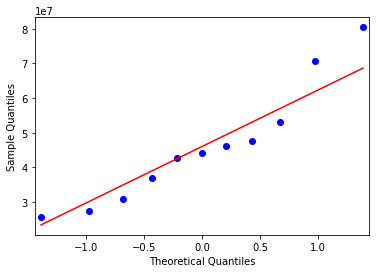


 Shapiro-Wilk Test 
 
Statistics=2.170, p=0.337950
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_time_milsecs
feature values=  [ 320934  215446   24174    7085   22947  427623 1475096  294142  136054
  236590  256730]
max value =  1475096 min value =  7085
mean=  310620.0909090909 standard deviation=  390213.05059100373
left range=  115513.56561358902 right range=  505726.61620459275
0.7779 2.9842
data covered within this range=  63.64 %
percent left and right=  72.73 27.27
data covered within 1 standard deviation=  90.91 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  4.301167100398284
skewness value=  2.292933254529315


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


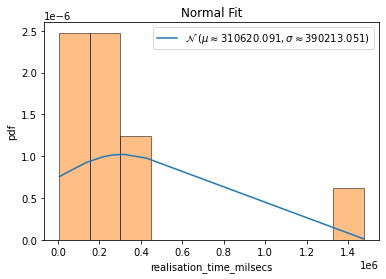


QQ plot 



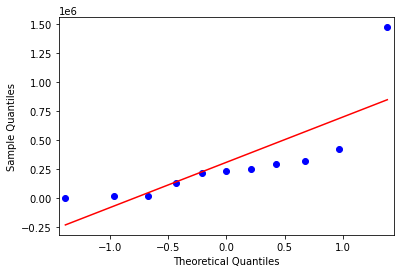


 Shapiro-Wilk Test 
 
Statistics=23.143, p=0.000009
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_size_kb
feature values=  [69896996 54524448 37097396 12093292 43952352 27691920 82943248 53949220
 25967440 43382488 44931288]
max value =  82943248 min value =  12093292
mean=  45130008.0 standard deviation=  19166726.356809538
left range=  35546644.82159523 right range=  54713371.17840477
1.7236 1.9729
data covered within this range=  54.55 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.4016839159217849
skewness value=  0.28214032897292834


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


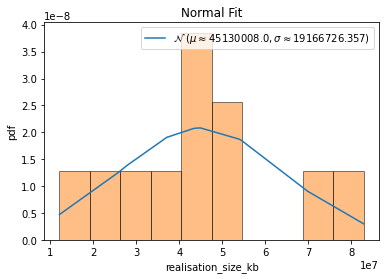


QQ plot 



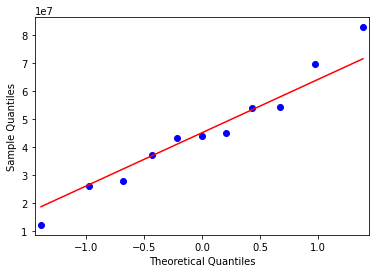


 Shapiro-Wilk Test 
 
Statistics=0.384, p=0.825188
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  classification_time_milsecs
feature values=  [226121 188218  28035  22263  23701  80578 307412 303461 134172 234492
 257038]
max value =  307412 min value =  22263
mean=  164135.54545454544 standard deviation=  106256.76419226952
left range=  111007.16335841067 right range=  217263.9275506802
1.3352 1.3484
data covered within this range=  18.18 %
percent left and right=  45.45 54.55
data covered within 1 standard deviation=  54.55 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5030580219878564
skewness value=  -0.12947219741675856


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


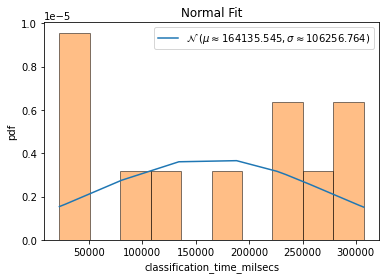


QQ plot 



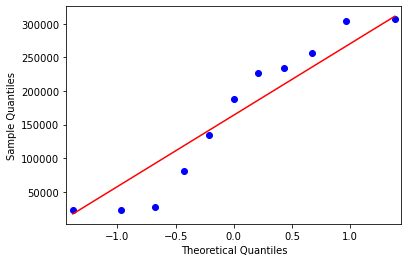


 Shapiro-Wilk Test 
 
Statistics=3.299, p=0.192158
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  classification_size_kb
feature values=  [69726468 31647844 42737412 39905852 42252248 27092660 82494408 53217908
 25710696 42846608 44354024]
max value =  82494408 min value =  25710696
mean=  45635102.54545455 standard deviation=  16500772.078988593
left range=  37384716.50596025 right range=  53885488.584948845
1.2075 2.2338
data covered within this range=  54.55 %
percent left and right=  72.73 27.27
data covered within 1 standard deviation=  63.64 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.06742935509458725
skewness value=  0.9550630061479477


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


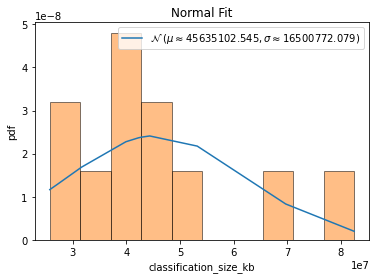


QQ plot 



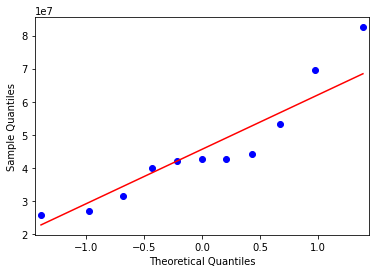


 Shapiro-Wilk Test 
 
Statistics=3.648, p=0.161400
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  SOV
feature values=  [    306    5562    2269    4145    5850   16187   31441 1757525  896094
 1757528 1757533]
max value =  1757533 min value =  306
mean=  566767.2727272727 standard deviation=  770924.3024016502
left range=  181305.1215264476 right range=  952229.4239280978
0.7348 1.5446
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.270437842397412
skewness value=  0.7713573004779257


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


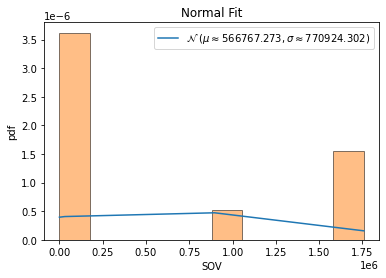


QQ plot 



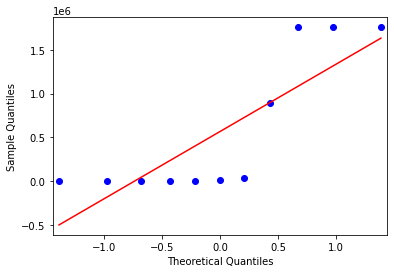


 Shapiro-Wilk Test 
 
Statistics=3.317, p=0.190471
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  ENR
feature values=  [ 3.53485425 12.66881229 20.76095061 13.52066219 10.99785512  3.29072203
  3.25119101  4.1146866   3.87511773  4.11478238  4.11469194]
max value =  20.7609506057782 min value =  3.2511910055262656
mean=  7.658575103122783 standard deviation=  5.639060974918706
left range=  4.83904461566343 right range=  10.478105590582135
0.7816 2.3235
data covered within this range=  0.0 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  81.82 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.022795400001702326
skewness value=  1.10876382241323


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


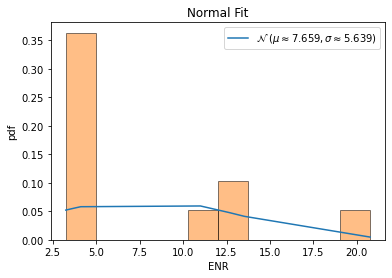


QQ plot 



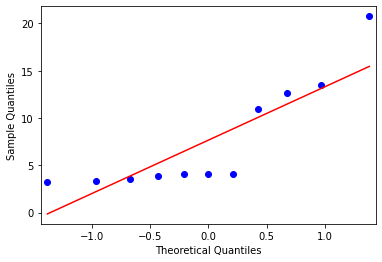


 Shapiro-Wilk Test 
 
Statistics=4.385, p=0.111659
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  EOG
feature values=  [3.31641889 3.99250402 2.76535321 4.0328042  3.92229585 2.06206741
 2.05702721 2.76584976 2.72061785 2.76591069 2.76594022]
max value =  4.0328041960412 min value =  2.0570272112738808
mean=  3.0151626640316675 standard deviation=  0.6786622648746474
left range=  2.6758315315943437 right range=  3.3544937964689914
1.4118 1.4995
data covered within this range=  54.55 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  54.55 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.1310535270092235
skewness value=  0.2699674208555711


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


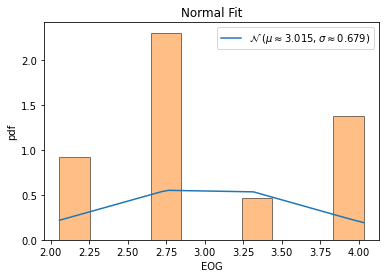


QQ plot 



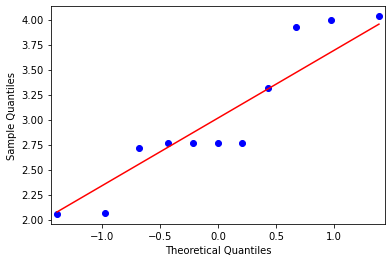


 Shapiro-Wilk Test 
 
Statistics=1.007, p=0.604560
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  RCH
feature values=  [0.65983607 0.42263759 0.47167172 0.4844295  0.42990928 0.18965517
 0.18965517 0.16455696 0.16455696 0.15384615 0.19161677]
max value =  0.6598360655737705 min value =  0.15384615384615385
mean=  0.3202155761710358 standard deviation=  0.16909865694422505
left range=  0.23566624769892328 right range=  0.4047649046431483
0.9839 2.0084
data covered within this range=  0.0 %
percent left and right=  54.55 45.45
data covered within 1 standard deviation=  90.91 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.0423758572119817
skewness value=  0.5780175879169407


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


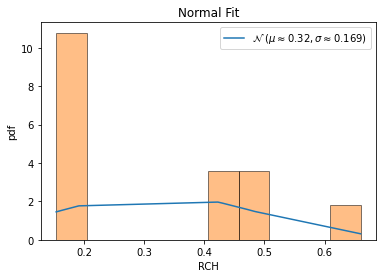


QQ plot 



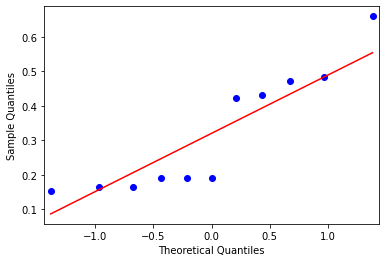


 Shapiro-Wilk Test 
 
Statistics=1.575, p=0.455020
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CYC
feature values=  [   2002  112394   84816  100593  102550   37193   70891 5474241 2576466
 5474400 5474294]
max value =  5474400 min value =  2002
mean=  1773621.8181818181 standard deviation=  2373839.205721238
left range=  586702.215321199 right range=  2960541.421042437
0.7463 1.559
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2198251647120573
skewness value=  0.802460413505814


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


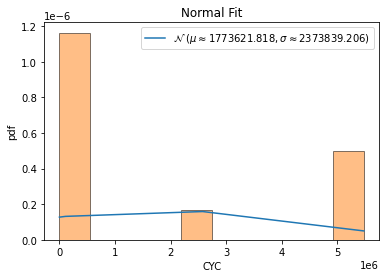


QQ plot 



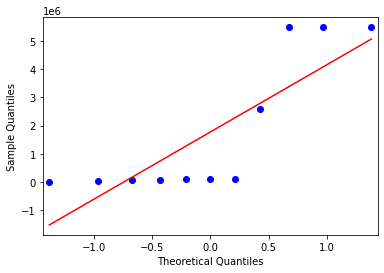


 Shapiro-Wilk Test 
 
Statistics=3.200, p=0.201911
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  HGCI
feature values=  [  5 930 486 926 926  19  19  17  17   3   4]
max value =  930 min value =  3
mean=  304.72727272727275 standard deviation=  404.0648217369204
left range=  102.69486185881254 right range=  506.75968359573295
0.7467 1.5475
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2829740455353813
skewness value=  0.763597591315775


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


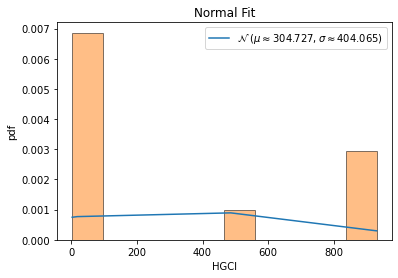


QQ plot 



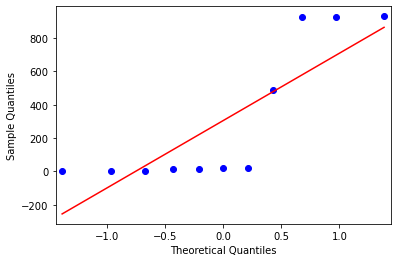


 Shapiro-Wilk Test 
 
Statistics=3.352, p=0.187114
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  ELCLSPRT
feature values=  [0.48563611 0.84235123 0.76609142 0.7752585  0.81756098 0.92682927
 0.92682927 0.98717949 0.98717949 0.99350649 0.96969697]
max value =  0.9935064935064936 min value =  0.4856361149110807
mean=  0.861647201435487 standard deviation=  0.14440156149345781
left range=  0.7894464206887581 right range=  0.9338479821822159
2.6039 0.9131
data covered within this range=  36.36 %
percent left and right=  45.45 54.55
data covered within 1 standard deviation=  90.91 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  1.4124719109153565
skewness value=  -1.4102029757201209


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


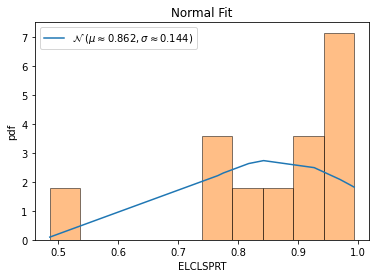


QQ plot 



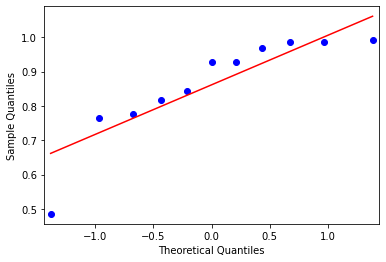


 Shapiro-Wilk Test 
 
Statistics=9.637, p=0.008078
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IHR
feature values=  [     48       0       0       0       0   11941   23549 1430266  687326
 1279404 1279405]
max value =  1430266 min value =  0
mean=  428358.0909090909 standard deviation=  585749.6797763382
left range=  135483.2510209218 right range=  721232.93079726
0.7313 1.7105
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.234195211817227
skewness value=  0.7800159731779873


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


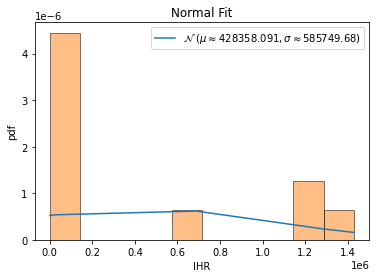


QQ plot 



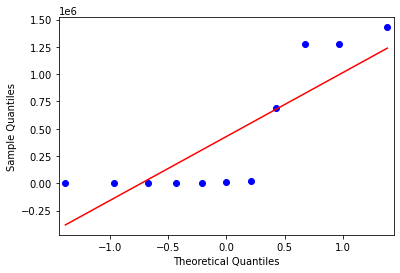


 Shapiro-Wilk Test 
 
Statistics=3.163, p=0.205618
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  IIR
feature values=  [    38      0      0      0      0   6007  11776      0      0 867967
 867968]
max value =  867968 min value =  0
mean=  159432.36363636365 standard deviation=  334025.64646507794
left range=  -7580.459596175322 right range=  326445.18686890265
0.4773 2.1212
data covered within this range=  81.82 %
percent left and right=  81.82 18.18
data covered within 1 standard deviation=  81.82 %
data covered within 2 standard deviation=  81.82 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.7215234744053594
skewness value=  1.6494762008776394


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


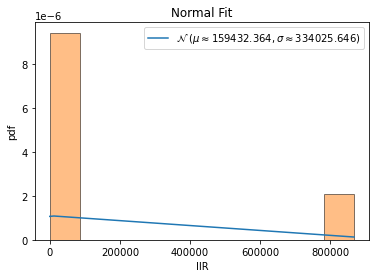


QQ plot 



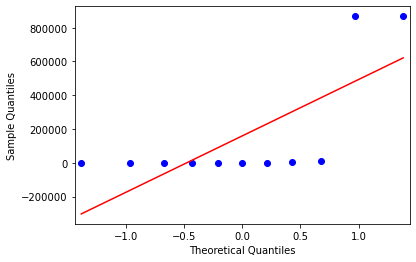


 Shapiro-Wilk Test 
 
Statistics=9.706, p=0.007805
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ITR
feature values=  [     0      0      0      0      0   1440   2789 204650  98278      0
 204650]
max value =  204650 min value =  0
mean=  46527.90909090909 standard deviation=  79554.64264888465
left range=  6750.587766466764 right range=  86305.23041535141
0.5849 1.9876
data covered within this range=  0.0 %
percent left and right=  72.73 27.27
data covered within 1 standard deviation=  81.82 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.06465504846445036
skewness value=  1.3118846026020377


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


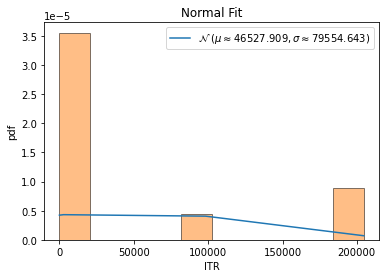


QQ plot 



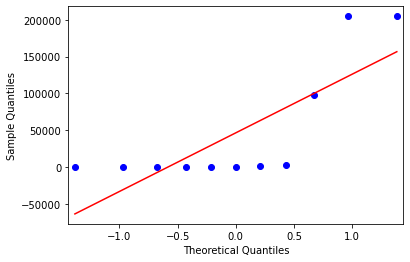


 Shapiro-Wilk Test 
 
Statistics=5.629, p=0.059935
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  aNOC
feature values=  [0.7636612  0.85212876 0.76754488 0.75572995 0.86206224 0.70114943
 0.70114943 0.76582278 0.76582278 0.81410256 0.85628743]
max value =  0.862062237830455 min value =  0.7011494252873564
mean=  0.7823146764718671 standard deviation=  0.0545298296915138
left range=  0.7550497616261103 right range=  0.809579591317624
1.4885 1.4625
data covered within this range=  45.45 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  54.55 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.1206945883831574
skewness value=  0.09949998197362747


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


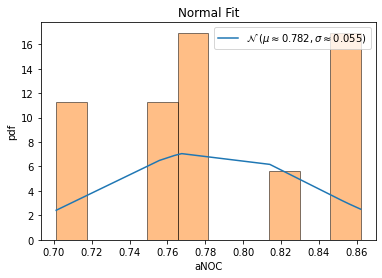


QQ plot 



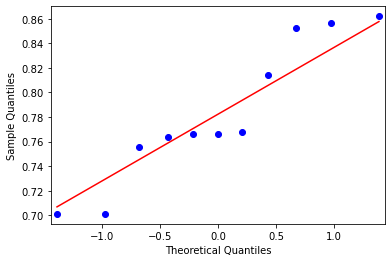


 Shapiro-Wilk Test 
 
Statistics=0.757, p=0.684867
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  aCID
feature values=  [3.08196721e+00 1.22489097e+01 2.03031010e+01 1.30462133e+01
 1.05742854e+01 4.12413793e+01 6.95344828e+01 4.54678481e+03
 2.18806962e+03 4.60576923e+03 4.30210180e+03]
max value =  4605.769230769231 min value =  3.081967213114754
mean=  1437.5232541946073 standard deviation=  1964.648391897533
left range=  455.1990582458408 right range=  2419.847450143374
0.7301 1.6126
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.231465615938285
skewness value=  0.7914393740942315


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


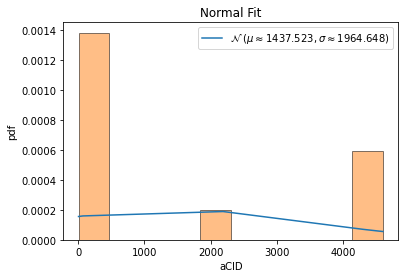


QQ plot 



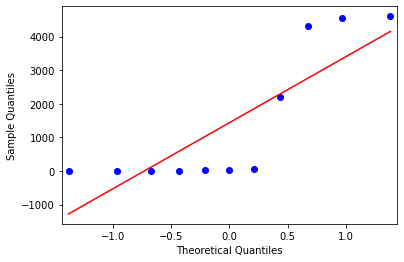


 Shapiro-Wilk Test 
 
Statistics=3.204, p=0.201470
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  mCID
feature values=  [    35   1586    576   1586   1586   1359   2665 196039  93746 196039
 196042]
max value =  196042 min value =  35
mean=  62841.72727272727 standard deviation=  85631.49169243214
left range=  20025.9814265112 right range=  105657.47311894334
0.7335 1.5555
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2324177521571054
skewness value=  0.7948405485999245


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


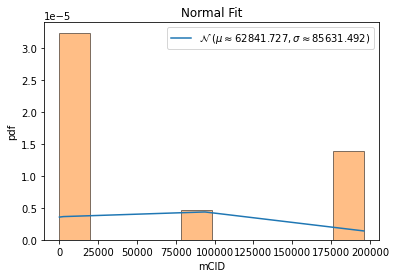


QQ plot 



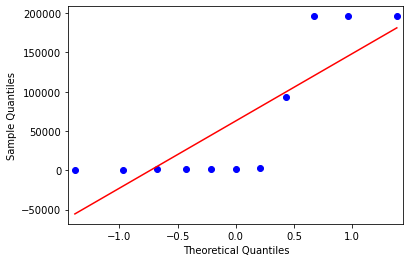


 Shapiro-Wilk Test 
 
Statistics=3.225, p=0.199349
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  aCOD
feature values=  [ 3.6557377  12.6384216  20.7428305  13.49028401 10.97258804 13.16666667
 13.16666667 13.65822785 13.65822785 15.01282051 13.76646707]
max value =  20.742830496619305 min value =  3.6557377049180326
mean=  13.084448950463779 standard deviation=  3.7807013803094427
left range=  11.194098260309058 right range=  14.9747996406185
2.4939 2.0257
data covered within this range=  63.64 %
percent left and right=  27.27 72.73
data covered within 1 standard deviation=  81.82 %
data covered within 2 standard deviation=  81.82 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.0624744055112263
skewness value=  -0.6571224098189722


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


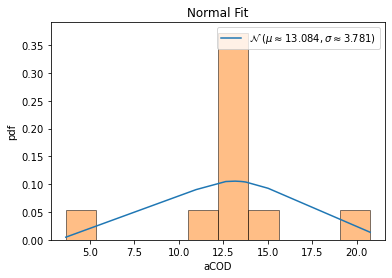


QQ plot 



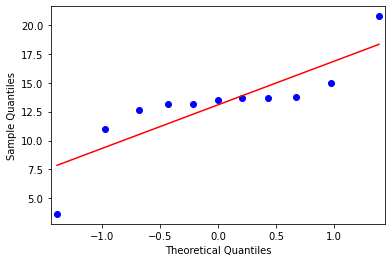


 Shapiro-Wilk Test 
 
Statistics=6.892, p=0.031872
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tNOP
feature values=  [ 1057 12275  5318  9957 13245   173   173   157   157   160   184]
max value =  13245 min value =  157
mean=  3896.0 standard deviation=  5115.4623713528845
left range=  1338.2688143235578 right range=  6453.731185676443
0.7309 1.8276
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.9890945553738537
skewness value=  0.880839677469952


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


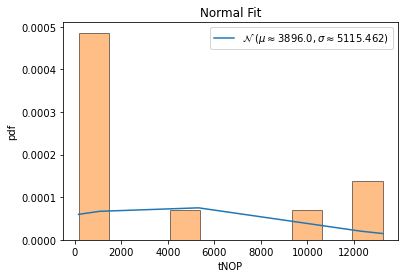


QQ plot 



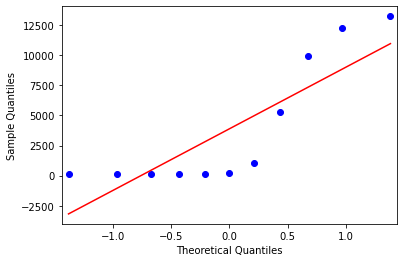


 Shapiro-Wilk Test 
 
Statistics=2.800, p=0.246627
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  EF
feature values=  [  31 1494  708 1409 1487    8    8   13   13   13   14]
max value =  1494 min value =  8
mean=  472.54545454545456 standard deviation=  637.8408698152006
left range=  153.62501963785428 right range=  791.4658894530548
0.7283 1.6014
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2265380029384463
skewness value=  0.795193683989101


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


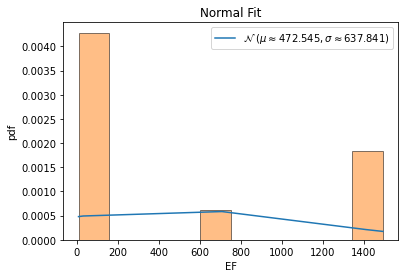


QQ plot 



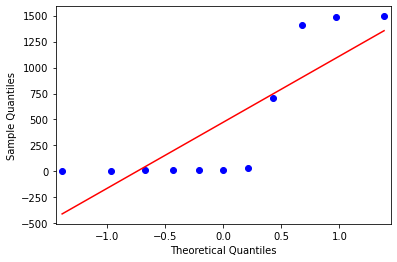


 Shapiro-Wilk Test 
 
Statistics=3.198, p=0.202132
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  SELFP
feature values=  [0.     0.     0.     0.     0.     0.0303 0.0303 0.0385 0.0385 0.
 0.    ]
max value =  0.0385 min value =  0.0
mean=  0.012509090909090909 standard deviation=  0.016731649624993756
left range=  0.004143266096594031 right range=  0.020874915721587787
0.7476 1.5534
data covered within this range=  0.0 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  63.64 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.510074008360016
skewness value=  0.6341838724953646


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


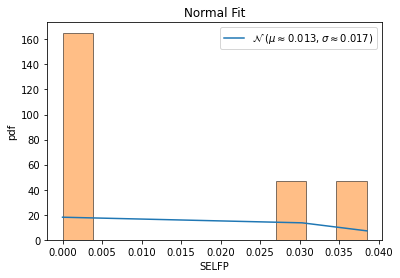


QQ plot 



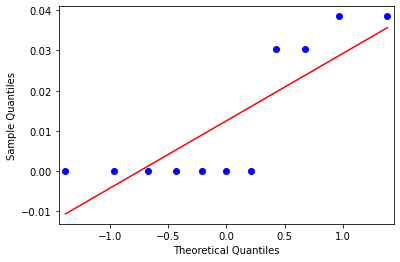


 Shapiro-Wilk Test 
 
Statistics=4.631, p=0.098721
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  MNCARP
feature values=  [0.0807 0.0007 0.     0.0008 0.0007 0.0303 0.0303 0.     0.     0.
 0.    ]
max value =  0.0807 min value =  0.0
mean=  0.013045454545454544 standard deviation=  0.024267949819252385
left range=  0.0009114796358283515 right range=  0.025179429455080737
0.5376 2.7878
data covered within this range=  0.0 %
percent left and right=  72.73 27.27
data covered within 1 standard deviation=  90.91 %
data covered within 2 standard deviation=  90.91 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.5936353522187225
skewness value=  1.9288210501141267


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


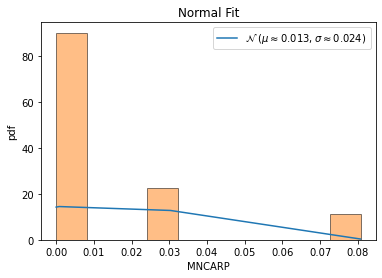


QQ plot 



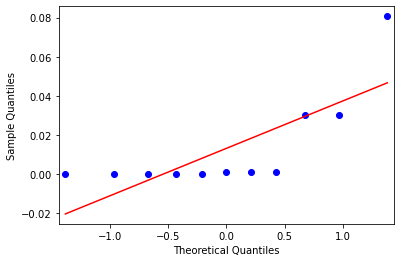


 Shapiro-Wilk Test 
 
Statistics=16.432, p=0.000270
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAR
feature values=  [  11 1493  998 1777 1843    3    3    0    0    0    0]
max value =  1843 min value =  0
mean=  557.0909090909091 standard deviation=  760.7243503333405
left range=  176.7287339242389 right range=  937.4530842575793
0.7323 1.6904
data covered within this range=  0.0 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.258153890582821
skewness value=  0.7542745190603215


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


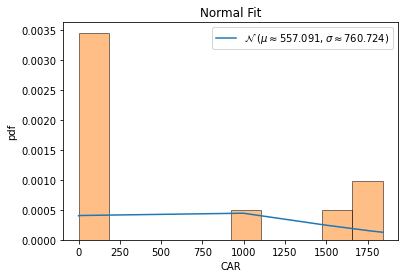


QQ plot 



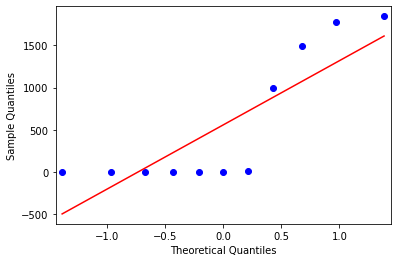


 Shapiro-Wilk Test 
 
Statistics=3.169, p=0.205070
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CARP
feature values=  [0.0228 0.3668 0.4933 0.4569 0.4182 0.0909 0.0909 0.     0.     0.
 0.    ]
max value =  0.4933 min value =  0.0
mean=  0.17634545454545456 standard deviation=  0.19920444666283918
left range=  0.07674323121403497 right range=  0.27594767787687413
0.8852 1.5911
data covered within this range=  18.18 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5246428279484328
skewness value=  0.5540380310000528


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


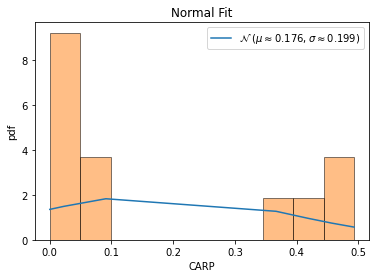


QQ plot 



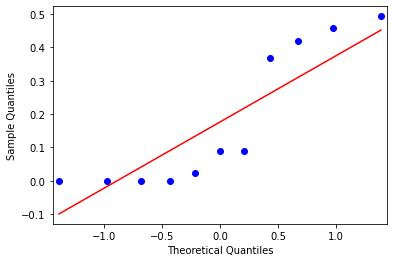


 Shapiro-Wilk Test 
 
Statistics=4.489, p=0.105982
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  IFUNP
feature values=  [0.     0.     0.     0.     0.     0.0097 0.0097 0.     0.     0.
 0.0099]
max value =  0.0099 min value =  0.0
mean=  0.0026636363636363637 standard deviation=  0.004349978626336776
left range=  0.0004886470504679758 right range=  0.004838625676804752
0.6123 1.6635
data covered within this range=  0.0 %
percent left and right=  72.73 27.27
data covered within 1 standard deviation=  72.73 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value= 

/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 -0.9567939375310401
skewness value=  1.0210541550304222


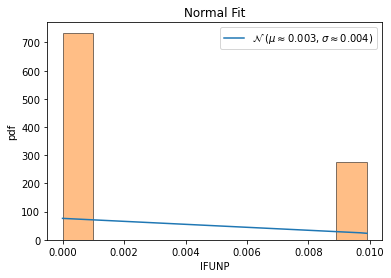


QQ plot 



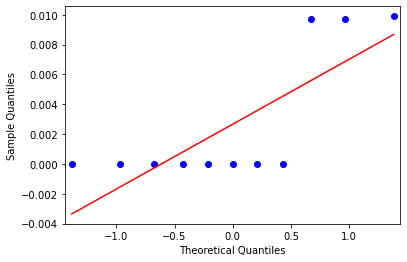


 Shapiro-Wilk Test 
 
Statistics=3.506, p=0.173249
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  REFLE
feature values=  [0 0 0 0 0 1 1 1 1 1 0]
max value =  1 min value =  0
mean=  0.45454545454545453 standard deviation=  0.49792959773196915
left range=  0.20558065567946995 right range=  0.7035102534114391
0.9129 1.0954
data covered within this range=  0.0 %
percent left and right=  54.55 45.45
data covered within 1 standard deviation=  54.55 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.9666666666666666
skewness value=  0.1825741858350553


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


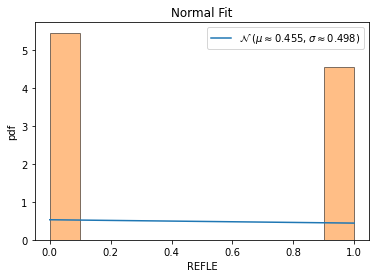


QQ plot 



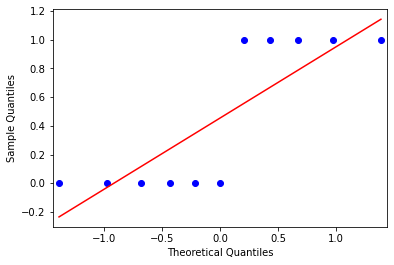


 Shapiro-Wilk Test 
 
Statistics=13.123, p=0.001414
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAL_TIME
feature values=  [   450   1890    960   1470   1840   1000   6000 929310 332900 919880
 593190]
max value =  929310 min value =  450
mean=  253535.45454545456 standard deviation=  364997.8611983073
left range=  71036.5239463009 right range=  436034.3851446082
0.6934 1.8514
data covered within this range=  9.09 %
percent left and right=  63.64 36.36
data covered within 1 standard deviation=  81.82 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.7099136657377643
skewness value=  0.9958434274296601


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


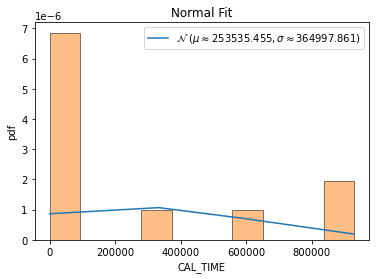


QQ plot 



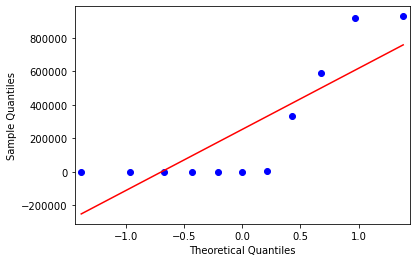


 Shapiro-Wilk Test 
 
Statistics=3.095, p=0.212826
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------



/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [173]:
#after easy time and memory clusering ,
#collect the medium ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

easy_zero_features.append('file')
easy_zero_features.append('label_mem')


#print(easy_zero_features)
print(df_easy_time_mem_feature_df.shape)
easy_time_mem_medium = df_easy_time_mem_feature_df[df_easy_time_mem_feature_df['label_mem']== 'medium']
print(easy_time_mem_medium.shape)
prior_medium= round(easy_time_mem_medium.shape[0] / df_easy_time_mem_feature_df.shape[0] ,5)

main_table=[]
main_dict={}

for i in range(len(cols_list)):
    #if cols_list[i] not in easy_zero_features:
    if cols_list[i] in top_n_1:
        tmp_table=[]
        tmp_dict={}
        
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(easy_time_mem_medium[feature])
        print("feature values= ",sov)
        
        
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        tmp_dict["min"]=np.min(sov)
        tmp_dict["max"]=np.max(sov)
        min_val=np.min(sov)
        max_val=np.max(sov)
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        tmp_dict["mean"]=mean
        tmp_dict["std"]=std
        #gamma=2
        #rx= mean - ((1- prior_medium) *gamma * std) 
        #ry= mean + ((1- prior_medium) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.5
        r_weight=0.5
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        tmp_dict["lw_i"]=l_weight
        tmp_dict["rw_i"]=r_weight
        tmp_dict["lr"]=rx
        tmp_dict["rr"]=ry
        
        min_val_w= round(((mean - min_val) /std ),4)
        max_val_w= round(((max_val - mean) /std ),4)
        print(min_val_w,max_val_w)
        tmp_dict["min_val_w"]=min_val_w
        tmp_dict["max_val_w"]=max_val_w
        
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / easy_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        tmp_dict["percent_i"]=v
        tmp_dict["percent_change"]=v
        
        val=(((min_val <= sov) & (sov <= mean)).sum()) / easy_time_mem_medium.shape[0]
        percent_l =  round((val * 100 ),2)
        
        val=(((mean <= sov) & (sov <= max_val)).sum()) / easy_time_mem_medium.shape[0]
        percent_r =  round((val * 100 ),2)
        
        print("percent left and right= ",percent_l,percent_r)
        tmp_dict["percent_l"]=percent_l
        tmp_dict["percent_r"]=percent_r
        
        main_dict[feature]=tmp_dict
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break

In [174]:
main_dict['RCH']

{'min': 0.15384615384615385,
 'max': 0.6598360655737705,
 'mean': 0.3202155761710358,
 'std': 0.16909865694422505,
 'lw_i': 0.5,
 'rw_i': 0.5,
 'lr': 0.23566624769892328,
 'rr': 0.4047649046431483,
 'min_val_w': 0.9839,
 'max_val_w': 2.0084,
 'percent_i': 0.0,
 'percent_change': 0.0,
 'percent_l': 54.55,
 'percent_r': 45.45}

In [175]:
#main_dict_cal=main_dict
dec_rate=[(0.2,0.3)]

for i in range(len(dec_rate)):
    
    lower_r=dec_rate[i][0]
    high_r=dec_rate[i][1]
    print(lower_r,high_r)
    
    for j in range (100):
        c=0
        for key,value in main_dict.items():
            
            if value["percent_change"] < 90:
                #print(key,value)

                lw_i_temp=value["lw_i"]
                rw_i_temp=value["rw_i"]
                #print(lw_i_temp,rw_i_temp)
                if value["percent_l"] >= 50:
                    diff=value["min_val_w"] - lw_i_temp
                    frac = round(lower_r * diff, 3)  
                    #print(frac)

                    lw_i_temp= round(lw_i_temp + frac , 4)
                    #print(lw_i_temp)
                    value["lw_i"]=lw_i_temp
                else:
                    diff=value["min_val_w"] - lw_i_temp
                    frac = round(high_r * diff, 3)  
                    #print(frac)

                    lw_i_temp= round(lw_i_temp + frac ,4 )
                    #print(lw_i_temp)
                    value["lw_i"]=lw_i_temp

                if value["percent_r"] >= 50:
                    diff=value["max_val_w"] - rw_i_temp
                    frac = round(lower_r * diff, 3)  
                    #print(frac)

                    rw_i_temp= round(rw_i_temp + frac , 4 )
                    #print(rw_i_temp)
                    value["rw_i"]=rw_i_temp
                else:
                    diff=value["max_val_w"] - rw_i_temp
                    frac = round(high_r * diff, 3)  
                    #print(frac)

                    rw_i_temp= round(rw_i_temp + frac ,4 )
                    #print(rw_i_temp)
                    value["rw_i"]=rw_i_temp

                sov=np.array(easy_time_mem_medium[key])
                #print("feature values= ",sov)
                #print(lw_i_temp,rw_i_temp)
                rx= value["mean"] - (lw_i_temp* value["std"]) 
                ry= value["mean"] + (rw_i_temp* value["std"])
                value["lr"]=round(rx,5)
                value["rr"]=round(ry,5)
                #print(rx,ry)

                val=(((rx <= sov) & (sov <= ry)).sum()) / easy_time_mem_medium.shape[0]
                v =  round((val * 100 ),2)
                #print("data covered within this range= ",v,"%")
                value["percent_change"]=v

                if v >=85:
                    c=c+1
                #break
            else:
                c=c+1
        #print(main_dict_cal['size_kb'])
        #print(len(list(main_dict_cal.keys())))
        p=round(c / len(list(main_dict.keys())),2)
        print ("percent in loop ",j , "covers ", p , "%" )
        #break
    #break

0.2 0.3
percent in loop  0 covers  0.0 %
percent in loop  1 covers  0.0 %
percent in loop  2 covers  0.0 %
percent in loop  3 covers  0.0 %
percent in loop  4 covers  0.0 %
percent in loop  5 covers  0.0 %
percent in loop  6 covers  0.0 %
percent in loop  7 covers  0.0 %
percent in loop  8 covers  0.0 %
percent in loop  9 covers  0.0 %
percent in loop  10 covers  0.0 %
percent in loop  11 covers  0.0 %
percent in loop  12 covers  0.0 %
percent in loop  13 covers  0.0 %
percent in loop  14 covers  0.0 %
percent in loop  15 covers  0.0 %
percent in loop  16 covers  0.0 %
percent in loop  17 covers  0.0 %
percent in loop  18 covers  0.0 %
percent in loop  19 covers  0.0 %
percent in loop  20 covers  0.0 %
percent in loop  21 covers  0.0 %
percent in loop  22 covers  0.0 %
percent in loop  23 covers  0.0 %
percent in loop  24 covers  0.0 %
percent in loop  25 covers  0.0 %
percent in loop  26 covers  0.0 %
percent in loop  27 covers  0.0 %
percent in loop  28 covers  0.0 %
percent in loop 

In [176]:
main_dict


{'size_kb': {'min': 162,
  'max': 543808,
  'mean': 174624.18181818182,
  'std': 237334.29346304614,
  'lw_i': 0.733,
  'rw_i': 1.554,
  'lr': 658.14471,
  'rr': 543441.67386,
  'min_val_w': 0.7351,
  'max_val_w': 1.5555,
  'percent_i': 9.09,
  'percent_change': 63.64,
  'percent_l': 63.64,
  'percent_r': 36.36},
 'consistency_time_milsecs': {'min': 18699,
  'max': 308466,
  'mean': 155552.27272727274,
  'std': 120416.8367856882,
  'lw_i': 1.135,
  'rw_i': 1.269,
  'lr': 18879.16298,
  'rr': 308361.23861,
  'min_val_w': 1.1365,
  'max_val_w': 1.2699,
  'percent_i': 9.09,
  'percent_change': 81.82,
  'percent_l': 54.55,
  'percent_r': 45.45},
 'consistency_size_kb': {'min': 25593828,
  'max': 80439780,
  'mean': 46017772.36363637,
  'std': 16355575.005463459,
  'lw_i': 1.247,
  'rw_i': 2.103,
  'lr': 25622370.33182,
  'rr': 80413546.60013,
  'min_val_w': 1.2487,
  'max_val_w': 2.1046,
  'percent_i': 45.45,
  'percent_change': 81.82,
  'percent_l': 54.55,
  'percent_r': 45.45},
 'realisa

In [141]:
easy_time_mem_medium

file  size_kb  \
2146   8ade3ddc-a69a-490a-9a24-659d433ab508_animalsvh...      162   
12146                MSC_classes_demo.owl_functional.owl     5371   
14653                genomic-cds-demo.owl_functional.owl     2138   
14655          genomic-cds_rules_demo.owl_functional.owl     4702   
14656     genomic-cds_rules_full_demo.owl_functional.owl     5842   
15119                                       OWL2DL-1.owl     3722   
15121                                       OWL2DL-2.owl     7317   
15124                                     OWL2EL-100.owl   543804   
15129                                      OWL2EL-50.owl   260194   
15131                                     OWL2QL-100.owl   543806   
15138                                     OWL2RL-100.owl   543808   

       consistency_time_milsecs  consistency_size_kb  \
2146                     305829             70840424   
12146                     18699             30801852   
14653                     30984             47532040   
14655                     24182             46262556   
14656                     20796             36906884   
15119                     78794             27519884   
15121                    297147             80439780   
15124                    308466             53222836   
15129                    130727             25593828   
15131                    234994             42794300   
15138                    260457             44281112   

       realisation_time_milsecs  realisation_size_kb  \
2146                     320934             69896996   
12146                    215446             54524448   
14653                     24174             37097396   
14655                      7085             12093292   
14656                     22947             43952352   
15119                    427623             27691920   
15121                   1475096             82943248   
15124                    294142             53949220   
15129                    136054             25967440   
15131                    236590             43382488   
15138                    256730             44931288   

       classification_time_milsecs  classification_size_kb      SOV  \
2146                        226121                69726468      306   
12146                       188218                31647844     5562   
14653                        28035                42737412     2269   
14655                        22263                39905852     4145   
14656                        23701                42252248     5850   
15119                        80578                27092660    16187   
15121                       307412                82494408    31441   
15124                       303461                53217908  1757525   
15129                       134172                25710696   896094   
15131                       234492                42846608  1757528   
15138                       257038                44354024  1757533   

             ENR  ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  \
2146    3.534854  ...     0     0    1    48    48    0  0.000000  0.992188   
12146  12.668812  ...     0     0    0     0     0    0  0.000000  0.000000   
14653  20.760951  ...     0     0    0     0     0    0  0.000000  0.000000   
14655  13.520662  ...     0     0    0     0     0    0  0.000000  0.000000   
14656  10.997855  ...     0     0    0     0     0    0  0.000000  0.000000   
15119   3.290722  ...     5     2   22    69    58    8  0.077670  0.843373   
15121   3.251191  ...     5     2   22    69    58    8  0.077670  0.843373   
15124   4.114687  ...     4     0    0    56    46    8  0.081633  0.954286   
15129   3.875118  ...     4     0    0    56    46    8  0.081633  0.954286   
15131   4.114782  ...     5     1   22    73    61    0  0.000000  0.834081   
15138   4.114692  ...     5     1   22    70    57    8  0.079208  0.838983   

       CAL_TIME  label_mem  
2146        450     medium  
12146      1890  

In [59]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
easy_time_medium_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(easy_time_medium_mem_table.shape)
#easy_time_medium_mem_table.to_csv('easy_time_medium_mem_table.csv',index=False)
#easy_time_mem_medium.to_csv('easy_time_mem_medium.csv',index=False)

(30, 13)


(16336, 101)
(10, 101)
feature name=  size_kb
feature values=  [ 23817  15198 123559  91232  15024  11829  52169 102420 260201  23934]
max value =  260201 min value =  11829
mean=  71938.3 standard deviation=  73818.45735593504
left range=  53483.68566101624 right range=  219575.21471187007
data covered within this range=  30.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  1.4085066232063435
skewness value=  1.499476288758923


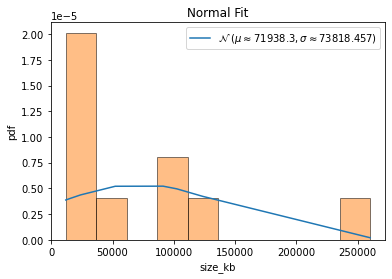


QQ plot 



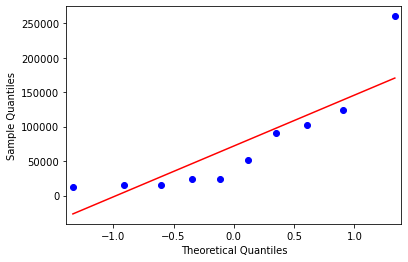


 Shapiro-Wilk Test 
 
Statistics=10.328, p=0.005719
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_time_milsecs
feature values=  [ 99035  97796 243533 268078 118628 268714 164713 181142 248831 279132]
max value =  279132 min value =  97796
mean=  196960.2 standard deviation=  69761.79030930901
left range=  179519.75242267275 right range=  336483.780618618
data covered within this range=  60.0 %
data covered within 1 standard deviation=  40.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5768419032170433
skewness value=  -0.26737260933141543


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


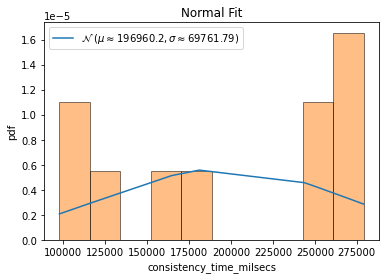


QQ plot 



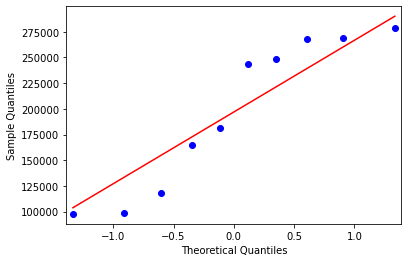


 Shapiro-Wilk Test 
 
Statistics=3.797, p=0.149811
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_size_kb
feature values=  [121958472 107716396 125277292 125349432 124962672 122270796 128834792
 128821984 128822156 128838488]
max value =  128838488 min value =  107716396
mean=  124285248.0 standard deviation=  6075937.417482573
left range=  122766263.64562936 right range=  136437122.83496514
data covered within this range=  70.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.6585731295814634
skewness value=  -1.8686782699773865


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


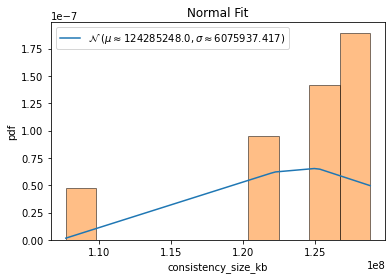


QQ plot 



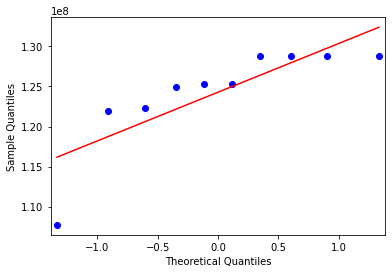


 Shapiro-Wilk Test 
 
Statistics=16.328, p=0.000285
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_time_milsecs
feature values=  [  134023 21600141   254685   288102   298684 21600104   170637   117096
   253286   270158]
max value =  21600141 min value =  117096
mean=  4498691.6 standard deviation=  8550925.868122997
left range=  2360960.1329692504 right range=  21600543.33624599
data covered within this range=  20.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.2497543188221516
skewness value=  1.4998152565450764


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


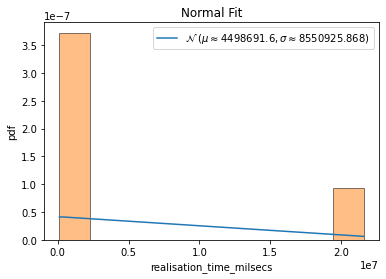


QQ plot 



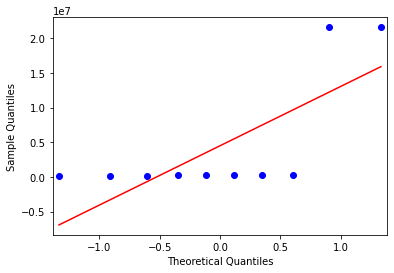


 Shapiro-Wilk Test 
 
Statistics=7.484, p=0.023706
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_size_kb
feature values=  [120652816   3020648 124853944 125344676 124423692   1751268 128835496
 128823256 128822552 128838720]
max value =  128838720 min value =  1751268
mean=  101536706.8 standard deviation=  49640706.321159005
left range=  89126530.21971025 right range=  200818119.44231802
data covered within this range=  80.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.23740037150203275
skewness value=  -1.490496434744768


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


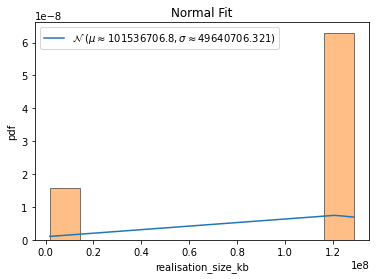


QQ plot 



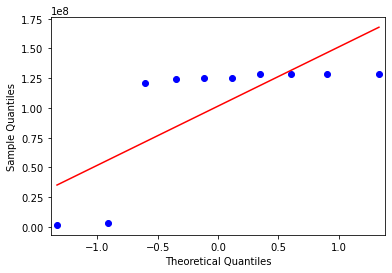


 Shapiro-Wilk Test 
 
Statistics=7.390, p=0.024847
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_time_milsecs
feature values=  [   88047   133029   246571   247878  4033179 21600214   166692   127483
   236493   301439]
max value =  21600214 min value =  88047
mean=  2718102.5 standard deviation=  6397604.92672588
left range=  1118701.26831853 right range=  15513312.35345176
data covered within this range=  10.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  4.607760445733065
skewness value=  2.522576410072111


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


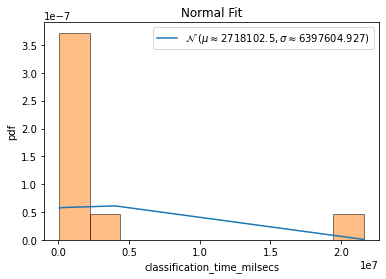


QQ plot 



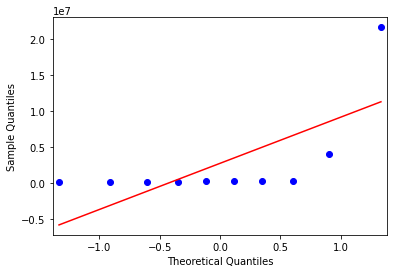


 Shapiro-Wilk Test 
 
Statistics=26.267, p=0.000002
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_size_kb
feature values=  [119310568 115170004 124351796 125208808 110068632   5992900 128835404
 128821796 128821452 128839328]
max value =  128839328 min value =  5992900
mean=  111542068.8 standard deviation=  35724780.04041442
left range=  102610873.7898964 right range=  182991628.88082886
data covered within this range=  90.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  4.645717805959983
skewness value=  -2.5223659847076174


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


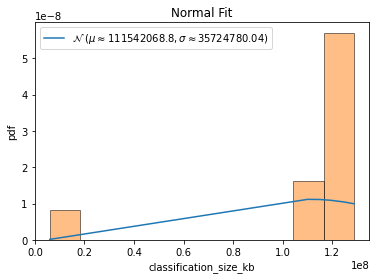


QQ plot 



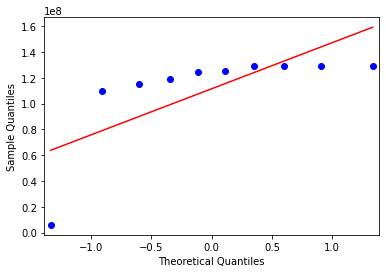


 Shapiro-Wilk Test 
 
Statistics=26.344, p=0.000002
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SOV
feature values=  [ 45262  18039 158673  88442  18039   6039 208952 385154 896100  99797]
max value =  896100 min value =  6039
mean=  192449.7 standard deviation=  258906.42333246584
left range=  127723.09416688356 right range=  710262.5466649317
data covered within this range=  30.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.5692407877347767
skewness value=  1.9205729084852143


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


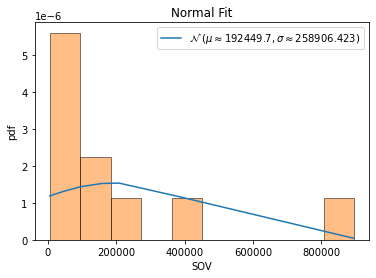


QQ plot 



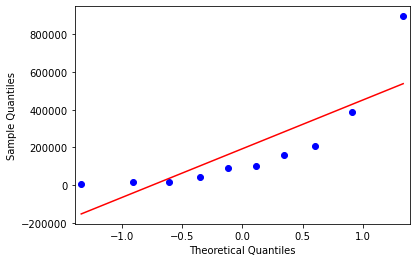


 Shapiro-Wilk Test 
 
Statistics=16.527, p=0.000258
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ENR
feature values=  [1.10544848 3.30871744 2.81891131 3.24444069 3.30871744 6.83276506
 3.41743183 3.5867928  3.87524006 3.29201138]
max value =  6.83276505926287 min value =  1.10544848238869
mean=  3.479047649216541 standard deviation=  1.3280660810311695
left range=  3.1470311289587487 right range=  6.13517981127888
data covered within this range=  70.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.0940054610065033
skewness value=  1.0286108505237712


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


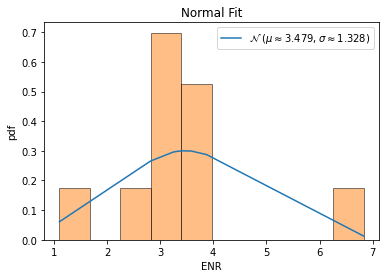


QQ plot 



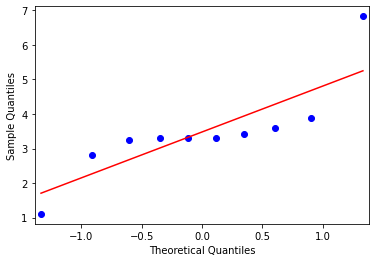


 Shapiro-Wilk Test 
 
Statistics=9.013, p=0.011036
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  EOG
feature values=  [1.29515333 2.15931398 2.53321835 2.95220349 2.15931398 3.62843039
 2.34676449 2.54007301 2.72083589 2.17409927]
max value =  3.62843038597758 min value =  1.29515332920472
mean=  2.450940617405707 standard deviation=  0.5760845881988939
left range=  2.3069194703559837 right range=  3.603109793803495
data covered within this range=  50.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  80.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.4463585410309827
skewness value=  0.08553924278082861


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


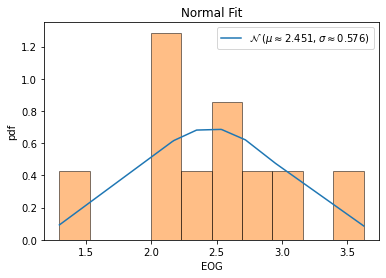


QQ plot 



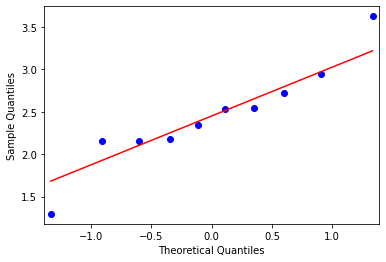


 Shapiro-Wilk Test 
 
Statistics=1.726, p=0.421983
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  RCH
feature values=  [0.04271341 0.89552239 0.59969677 0.68749499 0.89552239 0.89552239
 0.18965517 0.18965517 0.18965517 0.18965517]
max value =  0.8955223880597009 min value =  0.042713407500372
mean=  0.4775093030119232 standard deviation=  0.3322222237148502
left range=  0.3944537470832106 right range=  1.1419537504416235
data covered within this range=  50.0 %
data covered within 1 standard deviation=  60.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.7114797274222595
skewness value=  0.14346164777196474


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


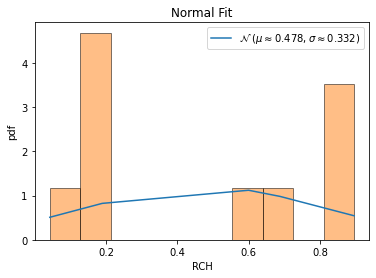


QQ plot 



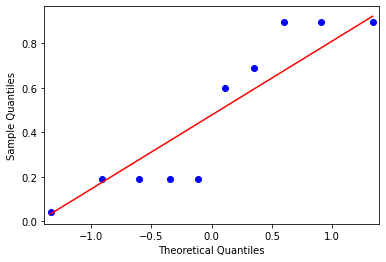


 Shapiro-Wilk Test 
 
Statistics=5.443, p=0.065765
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CYC
feature values=  [  10357   41924  727440  601372   41924   35924  505246  996440 2576642
  228849]
max value =  2576642 min value =  10357
mean=  576611.8 standard deviation=  742330.15948765
left range=  391029.26012808754 right range=  2061272.1189753
data covered within this range=  40.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.4004201890971864
skewness value=  1.8065695292997088


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


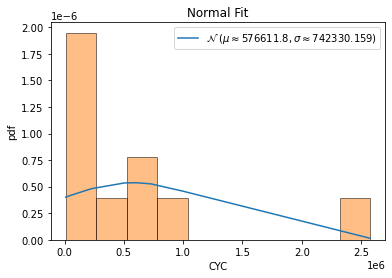


QQ plot 



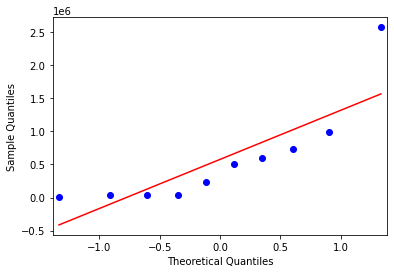


 Shapiro-Wilk Test 
 
Statistics=15.195, p=0.000502
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  HGCI
feature values=  [   59     0 17672 17672     0     0    19    19    19    19]
max value =  17672 min value =  0
mean=  3547.9 standard deviation=  7062.06874010725
left range=  1782.3828149731876 right range=  17672.0374802145
data covered within this range=  20.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.24997342965226066
skewness value=  1.499980114990824


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


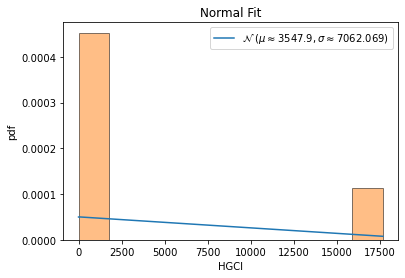


QQ plot 



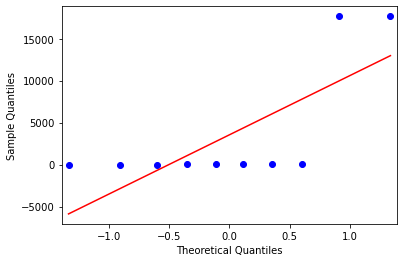


 Shapiro-Wilk Test 
 
Statistics=7.486, p=0.023686
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ELCLSPRT
feature values=  [0.99708573 0.16541353 0.99958107 0.99934591 0.15789474 0.15789474
 0.92682927 0.92682927 0.92682927 0.92682927]
max value =  0.9995810688728471 min value =  0.157894736842105
mean=  0.718453278683385 standard deviation=  0.3665455599761394
left range=  0.6268168886893501 right range=  1.4515443986356638
data covered within this range=  70.0 %
data covered within 1 standard deviation=  70.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.243563530115012
skewness value=  -0.8512697421282359


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


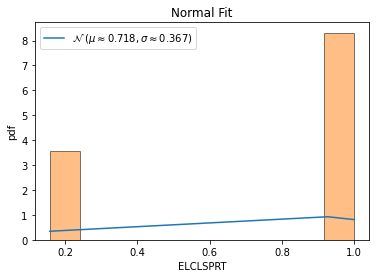


QQ plot 



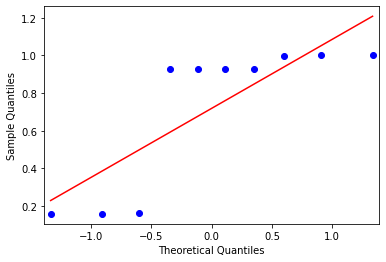


 Shapiro-Wilk Test 
 
Statistics=3.268, p=0.195194
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  IHR
feature values=  [    60      0  96116  96116      0      0 167242 324382 818460  76779]
max value =  818460 min value =  0
mean=  157915.5 standard deviation=  240430.6299202537
left range=  97807.84251993657 right range=  638776.7598405074
data covered within this range=  20.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.796599029066683
skewness value=  1.9863104481691838


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


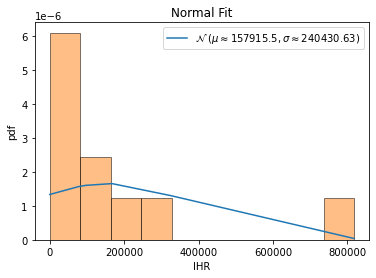


QQ plot 



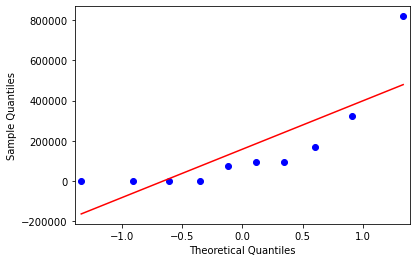


 Shapiro-Wilk Test 
 
Statistics=17.620, p=0.000149
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IIR
feature values=  [   108      0  81858  81858      0      0  85363 165045 416622  38930]
max value =  416622 min value =  0
mean=  86978.4 standard deviation=  121394.06283027188
left range=  56629.88429243202 right range=  329766.52566054376
data covered within this range=  40.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.5622144971010314
skewness value=  1.8757432746638252


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


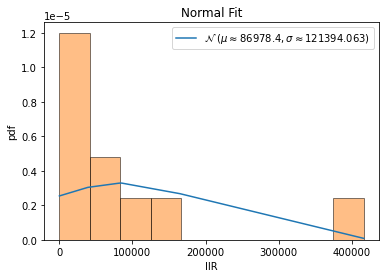


QQ plot 



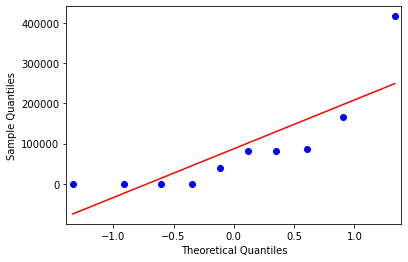


 Shapiro-Wilk Test 
 
Statistics=16.148, p=0.000312
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ITR
feature values=  [  215     0 81842 81842     0     0 20009 38993 98278  9122]
max value =  98278 min value =  0
mean=  33030.1 standard deviation=  37615.13975901193
left range=  23626.315060247016 right range=  108260.37951802387
data covered within this range=  40.0 %
data covered within 1 standard deviation=  70.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2734161477304116
skewness value=  0.6600206869508227


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


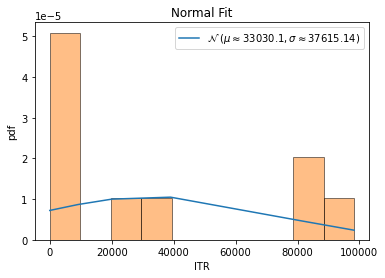


QQ plot 



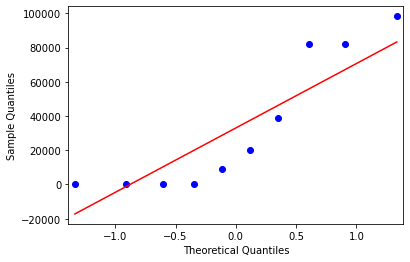


 Shapiro-Wilk Test 
 
Statistics=2.559, p=0.278129
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  aNOC
feature values=  [1.10418838 0.02238806 0.35296129 0.55108969 0.02238806 0.02238806
 0.70114943 0.70114943 0.70114943 0.70114943]
max value =  1.10418838144264 min value =  0.022388059701493
mean=  0.4880001248810789 standard deviation=  0.35128592771449035
left range=  0.4001786429524563 right range=  1.1905719803100596
data covered within this range=  60.0 %
data covered within 1 standard deviation=  60.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.0708732916307822
skewness value=  -0.07461000228294848


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


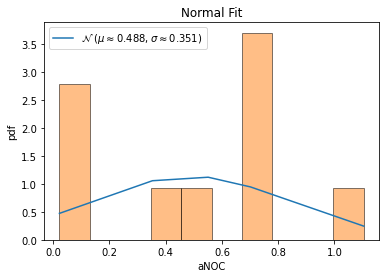


QQ plot 



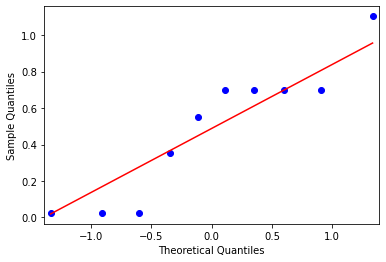


 Shapiro-Wilk Test 
 
Statistics=0.468, p=0.791282
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  aCID
feature values=  [   2.09587118   89.97014925    2.04739893    2.63549759   89.97014925
   89.97014925  417.63218391  799.15517241 1987.56321839  198.91954023]
max value =  1987.5632183908046 min value =  2.04739892959127
mean=  367.9959330405195 standard deviation=  589.3328013533045
left range=  220.66273270219338 right range=  1546.6615357471285
data covered within this range=  20.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.7923493396248844
skewness value=  2.00911802067774


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


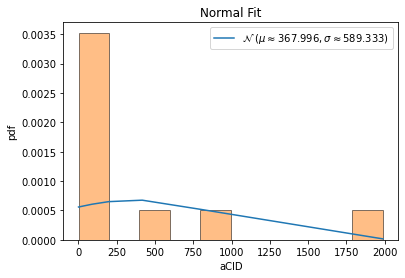


QQ plot 



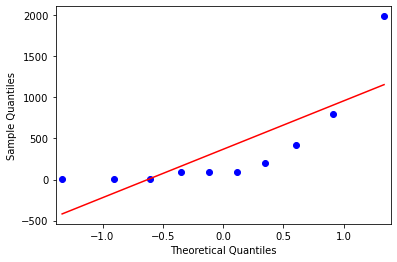


 Shapiro-Wilk Test 
 
Statistics=17.797, p=0.000137
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  mCID
feature values=  [18318  6010  3315  3315  6010  6010 19251 37272 93749  8919]
max value =  93749 min value =  3315
mean=  20216.9 standard deviation=  26470.51938459085
left range=  13599.270153852289 right range=  73157.9387691817
data covered within this range=  30.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  3.0333662527467293
skewness value=  2.0640835035102274


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


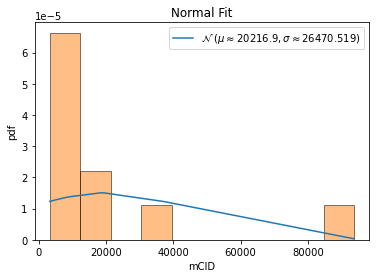


QQ plot 



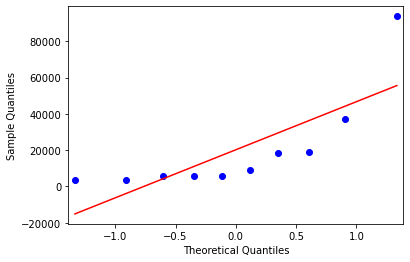


 Shapiro-Wilk Test 
 
Statistics=18.832, p=0.000081
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aCOD
feature values=  [ 1.20035736  1.19402985  2.33493876  2.52327113  1.19402985  1.19402985
 13.16666667 13.16666667 13.16091954 13.16666667]
max value =  13.166666666666664 min value =  1.19402985074627
mean=  6.230157634074457 standard deviation=  5.680504474616646
left range=  4.810031515420295 right range=  17.59116658330775
data covered within this range=  40.0 %
data covered within 1 standard deviation=  60.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.8243302109440003
skewness value=  0.389364664328827


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


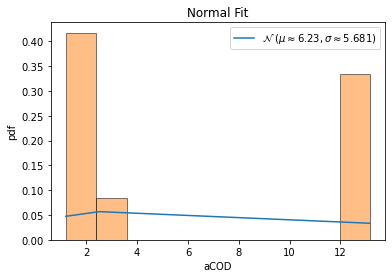


QQ plot 



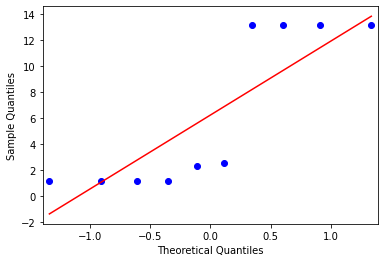


 Shapiro-Wilk Test 
 
Statistics=7.935, p=0.018916
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tNOP
feature values=  [ 53961    133 445839 319733    133    133    173    173    173    173]
max value =  445839 min value =  133
mean=  82062.4 standard deviation=  153808.7099537604
left range=  43610.22251155989 right range=  389679.8199075208
data covered within this range=  20.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.7556095672967147
skewness value= 

/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 1.5856500093537857


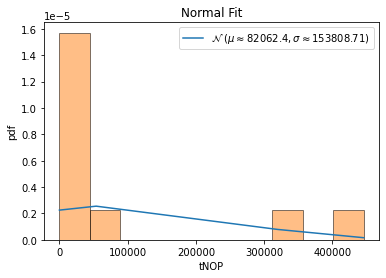


QQ plot 



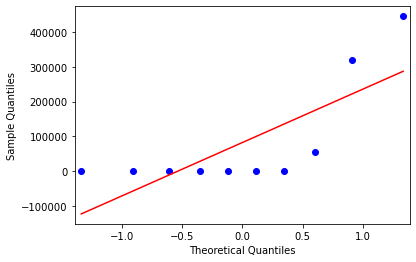


 Shapiro-Wilk Test 
 
Statistics=9.300, p=0.009561
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  EF
feature values=  [  1835      2 186188 130267      1      1      8      8      8      8]
max value =  186188 min value =  1
mean=  31832.6 standard deviation=  64424.90659085196
left range=  15726.373352287008 right range=  160682.41318170392
data covered within this range=  10.0 %
data covered within 1 standard deviation=  80.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.8864924696209071
skewness value=  1.6375066790771533


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


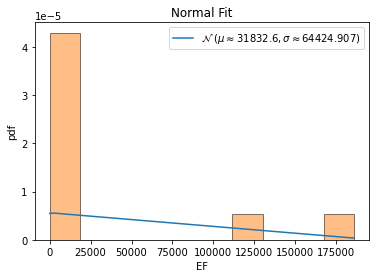


QQ plot 



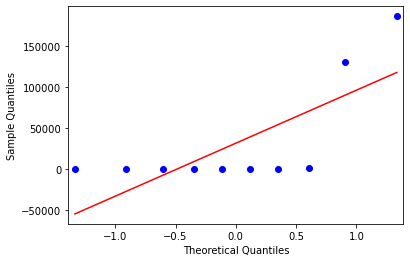


 Shapiro-Wilk Test 
 
Statistics=10.017, p=0.006682
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SELFP
feature values=  [0.     0.     0.     0.     0.     0.     0.0303 0.0303 0.0303 0.0303]
max value =  0.0303 min value =  0.0
mean=  0.01212 standard deviation=  0.01484390784126606
left range=  0.008409023039683486 right range=  0.04180781568253212
data covered within this range=  40.0 %
data covered within 1 standard deviation=  60.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.833333333333333
skewness value=  0.40824829046386313


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


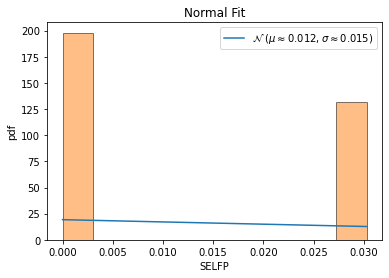


QQ plot 



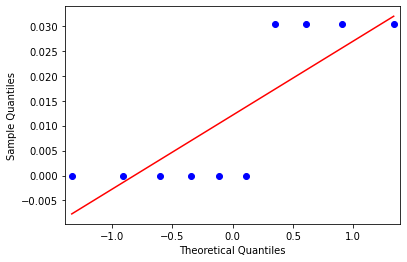


 Shapiro-Wilk Test 
 
Statistics=8.176, p=0.016773
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  MNCARP
feature values=  [0.0015 0.0333 0.     0.0001 0.0417 0.0417 0.0303 0.0303 0.0303 0.0303]
max value =  0.0417 min value =  0.0
mean=  0.023950000000000003 standard deviation=  0.01589108240492132
left range=  0.019977229398769673 right range=  0.05573216480984264
data covered within this range=  70.0 %
data covered within 1 standard deviation=  50.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2448190531178898
skewness value=  -0.6377586817851439


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


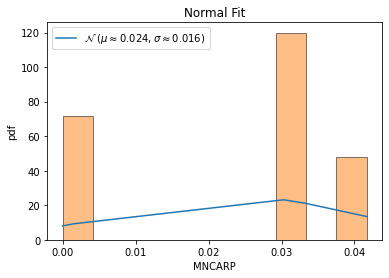


QQ plot 



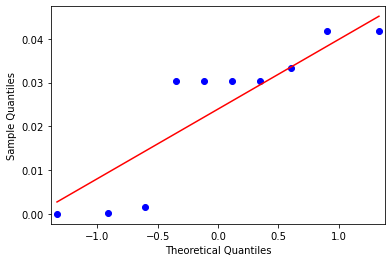


 Shapiro-Wilk Test 
 
Statistics=2.335, p=0.311194
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CAR
feature values=  [ 20 103   0   0 103 103   3   3   3   3]
max value =  103 min value =  0
mean=  34.1 standard deviation=  45.42565354510599
left range=  22.743586613723505 right range=  124.95130709021197
data covered within this range=  30.0 %
data covered within 1 standard deviation=  70.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2598890170673895
skewness value=  0.8308714433798169


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


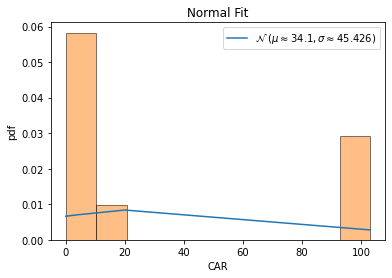


QQ plot 



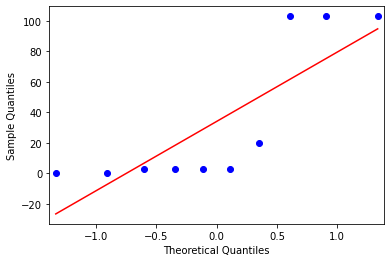


 Shapiro-Wilk Test 
 
Statistics=3.245, p=0.197399
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CARP
feature values=  [0.01   0.8583 0.     0.     0.8583 0.8583 0.0909 0.0909 0.0909 0.0909]
max value =  0.8583 min value =  0.0
mean=  0.29484999999999995 standard deviation=  0.3706511412366081
left range=  0.20218721469084794 right range=  1.0361522824732161
data covered within this range=  30.0 %
data covered within 1 standard deviation=  70.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2462904946409394
skewness value=  0.8411726508144786


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


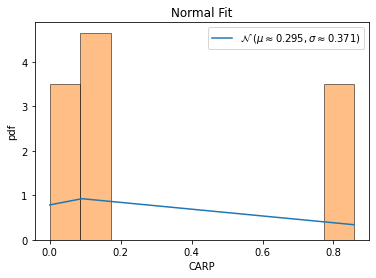


QQ plot 



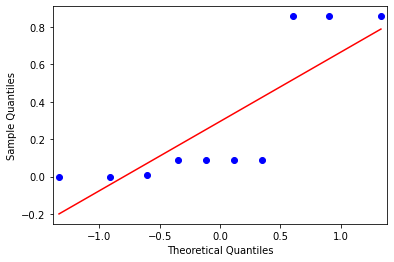


 Shapiro-Wilk Test 
 
Statistics=3.231, p=0.198823
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  IFUNP
feature values=  [0.0363 0.     0.     0.     0.     0.     0.0097 0.0097 0.0097 0.0097]
max value =  0.0363 min value =  0.0
mean=  0.00751 standard deviation=  0.010630376286848929
left range=  0.0048524059282877684 right range=  0.028770752573697857
data covered within this range=  40.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  2.505142123142324
skewness value=  1.813657425733786


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


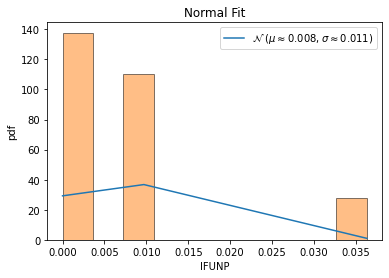


QQ plot 



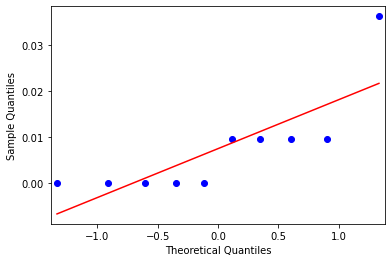


 Shapiro-Wilk Test 
 
Statistics=15.511, p=0.000428
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  REFLE
feature values=  [0 0 0 0 0 0 1 1 1 1]
max value =  1 min value =  0
mean=  0.4 standard deviation=  0.4898979485566356
left range=  0.27752551286084115 right range=  1.3797958971132713
data covered within this range=  40.0 %
data covered within 1 standard deviation=  60.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.8333333333333335
skewness value=  0.40824829046386296


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


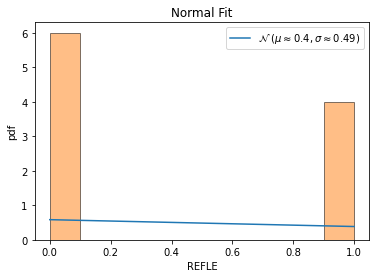


QQ plot 



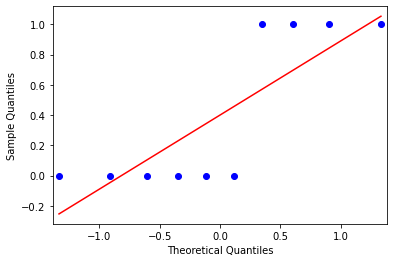


 Shapiro-Wilk Test 
 
Statistics=8.176, p=0.016773
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAL_TIME
feature values=  [ 10280   1730  54220  32450   1520   1810  34210  76070 335900  11510]
max value =  335900 min value =  1520
mean=  55970.0 standard deviation=  96280.27773121555
left range=  31899.930567196112 right range=  248530.5554624311
data covered within this range=  40.0 %
data covered within 1 standard deviation=  90.0 %
data covered within 2 standard deviation=  90.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  4.186500286699426
skewness value=  2.3817385795391517


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


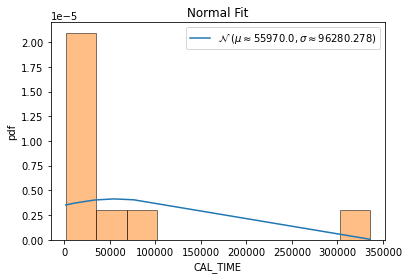


QQ plot 



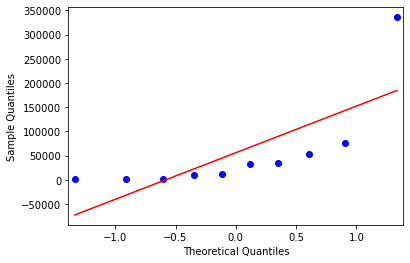


 Shapiro-Wilk Test 
 
Statistics=24.150, p=0.000006
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------



/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
#after easy time and memory clusering ,
#collect the hard ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

easy_zero_features.append('file')
easy_zero_features.append('label_mem')


#print(easy_zero_features)
print(df_easy_time_mem_feature_df.shape)
easy_time_mem_hard = df_easy_time_mem_feature_df[df_easy_time_mem_feature_df['label_mem']== 'hard']
print(easy_time_mem_hard.shape)
prior_hard= round(easy_time_mem_hard.shape[0] / df_easy_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in easy_zero_features:
    if cols_list[i] in top_n_1:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(easy_time_mem_hard[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_hard) *gamma * std) 
        #ry= mean + ((1- prior_hard) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / easy_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / easy_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break

feature values=  [0.99708573 0.16541353 0.99958107 0.99934591 0.15789474 0.15789474
 0.92682927 0.92682927 0.92682927 0.92682927]
max value =  0.99958107 min value =  0.15789474
mean=  0.71845328 standard deviation=  0.36654556027040486
[0.33800755 0.33800755 0.3487055  0.92598782 0.92598782 0.92598782
 0.92598782 0.81527811 0.81145021 0.8110512 ]


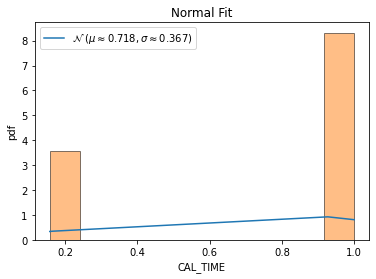

In [61]:
h=[0.99708573, 0.16541353, 0.99958107, 0.99934591, 0.15789474, 0.15789474,
 0.92682927, 0.92682927, 0.92682927, 0.92682927]
h_np=np.array(h)
h_np

sov=h_np
print("feature values= ",sov)
print("max value = ",np.max(sov),"min value = ",np.min(sov))

mean = np.mean(sov)
std = np.std(sov)
print("mean= ",mean,"standard deviation= ",std)

sov_1=np.sort(sov)
print(norm.pdf(sov_1, mean, std))
plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
plt.title("Normal Fit")
plt.xlabel(feature)
plt.ylabel("pdf")
plt.legend()
#plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
plt.show()



In [62]:
easy_time_mem_hard

file  size_kb  \
10575                           00566.owl_functional.owl    23817   
11154  35517746-4898-4c15-a905-6518355a4b85_ST2009SHI...    15198   
11366  5101ac50-defd-457e-a6f4-62f2e9ce5738_phenotype...   123559   
11902  a3aef80f-4383-4dfb-82a8-6cb2f611c29b_ersection...    91232   
11943  a8f6019c-f34e-4418-af12-f0f464881e4c_VAST2009a...    15024   
14248  c06f618d-66a7-432e-890e-d2592d17bb7d_009UNAeas...    11829   
15118                                      OWL2DL-10.owl    52169   
15120                                      OWL2DL-20.owl   102420   
15122                                      OWL2DL-50.owl   260201   
15123                                       OWL2DL-5.owl    23934   

       consistency_time_milsecs  consistency_size_kb  \
10575                     99035            121958472   
11154                     97796            107716396   
11366                    243533            125277292   
11902                    268078            125349432   
11943                    118628            124962672   
14248                    268714            122270796   
15118                    164713            128834792   
15120                    181142            128821984   
15122                    248831            128822156   
15123                    279132            128838488   

       realisation_time_milsecs  realisation_size_kb  \
10575                    134023            120652816   
11154                  21600141              3020648   
11366                    254685            124853944   
11902                    288102            125344676   
11943                    298684            124423692   
14248                  21600104              1751268   
15118                    170637            128835496   
15120                    117096            128823256   
15122                    253286            128822552   
15123                    270158            128838720   

       classification_time_milsecs  classification_size_kb     SOV       ENR  \
10575                        88047               119310568   45262  1.105448   
11154                       133029               115170004   18039  3.308717   
11366                       246571               124351796  158673  2.818911   
11902                       247878               125208808   88442  3.244441   
11943                      4033179               110068632   18039  3.308717   
14248                     21600214                 5992900    6039  6.832765   
15118                       166692               128835404  208952  3.417432   
15120                       127483               128821796  385154  3.586793   
15122                       236493               128821452  896100  3.875240   
15123                       301439               128839328   99797  3.292011   

       ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  CAL_TIME  \
10575  ...     0     0   72   147   148    0  0.000000  0.838828     10280   
11154  ...     0     0    0     6     7    0  0.000000  0.850000      1730   
11366  ...     0     0   10    30    26   40  0.229885  0.948187     54220   
11902  ...     0     0   10    30    26   40  0.229885  0.948187     32450   
11943  ...     0     0    0     6     7    0  0.000000  0.850000      1520   
14248  ...     0     0    0     6     7    0  0.000000  0.850000      1810   
15118  ...     5     2   22    69    58    8  0.077670  0.843373     34210   
15120  ...     5     2   22    69    58    8  0.077670  0.843373     76070   
15122  ...     5     2   22    69    58    8  0.077670  0.843373    335900   
15123  ...     5     2   22    69    58    8  0.077670  0.843373     11510   

       label_mem  
10575       hard  
11154       hard  
11366       hard  
11902       hard  
11943       hard  
14248       hard  
15118       hard  
15120       hard  
15122       hard  
15123       hard  

[10 rows x 101 columns]

In [63]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
easy_time_hard_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(easy_time_hard_mem_table.shape)
#easy_time_hard_mem_table.to_csv('easy_time_hard_mem_table.csv',index=False)
#easy_time_mem_hard.to_csv('easy_time_mem_hard.csv',index=False)

(30, 13)


In [64]:
# easy part
# after time and memory , collect the  easy ones
# for calculating the effective range
''''
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
from scipy.stats import norm
import statistics


#cols=list(x_train_np.columns.values)
print(df_easy_time_mem_feature_df.shape)
easy_time_mem_easy = df_easy_time_mem_feature_df[df_easy_time_mem_feature_df['label_mem']== 'easy']
print(easy_time_mem_easy.shape)
sov = np.array(easy_time_mem_easy['ELCLSPRT'])
print(sov,type(sov),np.max(sov),np.min(sov))

plt.hist(sov,bins=20)
#plt.xticks(sov)
#plt.xlim([50,51175])
plt.show()

#sov=np.sort(sov)
mean = statistics.mean(sov)
sd = np.std(sov)
print("sd= ",sd)
p=(sov-mean )
print(mean)
print(p)
a=p**2
print(a)
print(len(p))
s=np.sum(a) / len((p))
print(s,np.sqrt(s))
#sov_1=(sov-mean)/sd
#print(sov_1)
#sov_1=np.sort(sov)#
#print(sov_1)
#plt.plot(sov_1, norm.pdf(sov_1, mean, sd))
#plt.savefig('/home/ritam/ontology_hardness/images/first.jpeg')
#plt.show()

mean= round(np.mean(sov),2)
print("mean= ",mean)
sd=round(np.std(sov),2)
print("std=",sd)
prior_easy= round(easy_time_mem_easy.shape[0] / df_easy_time_mem_feature_df.shape[0] ,5)
print("prior= ",prior_easy)
gamma=2
print("min---",np.min(sov),"max----",np.max(sov))
#rx= mean - ((1- prior_easy) *gamma * sd) 
#ry= mean + ((1- prior_easy) *gamma * sd)
rx= mean - (0.05*(gamma * sd) )
ry= mean + (0.5*(gamma * sd))
print("range= ",rx,ry)

#easy_time_mem_easy['SOV'].hist(bins = 10)
d=int(np.max(sov) /5)
print(d)
bins=[]
for i in range(0,np.max(sov)+d+1,d):
    bins.append(i)
    #print(i)
    #i=i+d
print(bins)

#del bins[0:4]
#print(bins)
hist, edges = np.histogram( sov , bins = bins)
print(sov.shape)
print(hist)
print(edges)
#bins.remove(0)
plt.hist(sov, bins=bins,edgecolor='black')
plt.axvline(mean, color='green',label='mean')
plt.style.use('fivethirtyeight')
#plt.tight_layout()
plt.xlabel('SOV')
plt.ylabel('Freaq')
plt.show()
print(((rx < sov) & (ry <= 21437240)).sum() / easy_time_mem_easy.shape[0] )
# need to get more ontologies
'''

'\'\nfrom matplotlib import pyplot as plt\n%matplotlib inline\n#%matplotlib qt \nfrom scipy.stats import norm\nimport statistics\n\n\n#cols=list(x_train_np.columns.values)\nprint(df_easy_time_mem_feature_df.shape)\neasy_time_mem_easy = df_easy_time_mem_feature_df[df_easy_time_mem_feature_df[\'label_mem\']== \'easy\']\nprint(easy_time_mem_easy.shape)\nsov = np.array(easy_time_mem_easy[\'ELCLSPRT\'])\nprint(sov,type(sov),np.max(sov),np.min(sov))\n\nplt.hist(sov,bins=20)\n#plt.xticks(sov)\n#plt.xlim([50,51175])\nplt.show()\n\n#sov=np.sort(sov)\nmean = statistics.mean(sov)\nsd = np.std(sov)\nprint("sd= ",sd)\np=(sov-mean )\nprint(mean)\nprint(p)\na=p**2\nprint(a)\nprint(len(p))\ns=np.sum(a) / len((p))\nprint(s,np.sqrt(s))\n#sov_1=(sov-mean)/sd\n#print(sov_1)\n#sov_1=np.sort(sov)#\n#print(sov_1)\n#plt.plot(sov_1, norm.pdf(sov_1, mean, sd))\n#plt.savefig(\'/home/ritam/ontology_hardness/images/first.jpeg\')\n#plt.show()\n\nmean= round(np.mean(sov),2)\nprint("mean= ",mean)\nsd=round(np.std(sov

In [65]:
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())

308466 13


In [66]:
# collect the medium ones
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
#df_medium_drop=df_medium.drop(['label'],axis=1)
df_medium_drop=df_medium # contains based on time
df_medium_drop

file  size_kb consistency_time_milsecs  \
185  00699.owl_functional.owl   582904                   510801   
0              OWL2DL-100.owl   543811                   673449   
3              OWL2DL-200.owl  1108757                   616636   
11             OWL2EL-200.owl  1108750                   605649   
19             OWL2QL-200.owl  1108752                   500321   
27             OWL2RL-200.owl  1108754                   556153   
0              OWL2DL-210.owl  1129377                   733716   
1              OWL2DL-212.owl  1139587                   623903   
2              OWL2DL-214.owl  1149982                   616735   
3              OWL2DL-216.owl  1161516                   670292   
4              OWL2DL-218.owl  1167004                   653266   
5              OWL2DL-220.owl  1177359                   688801   
6              OWL2DL-222.owl  1192779                   596130   
7              OWL2DL-224.owl  1200270                   602886   
8              OWL2DL-226.owl  1216185                   599829   
9              OWL2DL-228.owl  1225140                   591810   
10             OWL2DL-230.owl  1230808                   600383   
11             OWL2DL-232.owl  1246218                   591082   
12             OWL2DL-234.owl  1254107                   599435   
13             OWL2DL-236.owl  1268879                   582929   
14             OWL2DL-238.owl  1280275                   701110   
15             OWL2DL-240.owl  1289274                   792833   
16             OWL2DL-242.owl  1304585                   688112   
17             OWL2DL-244.owl  1316584                   750405   
18             OWL2DL-246.owl  1326649                   686813   
19             OWL2DL-248.owl  1339337                   693132   
20             OWL2DL-250.owl  1344931                   700017   
21             OWL2DL-252.owl  1356079                   712149   
22             OWL2DL-254.owl  1369191                   753754   
23             OWL2DL-256.owl  1379552                   749855   
24             OWL2DL-258.owl  1385003                   729737   
25             OWL2DL-260.owl  1403798                   720094   
26             OWL2DL-262.owl  1415476                   729087   
27             OWL2DL-264.owl  1419863                   787037   
28             OWL2DL-266.owl  1432951                   753514   
29             OWL2DL-268.owl  1447849                   742266   
30             OWL2DL-270.owl  1460329                   752861   
31             OWL2DL-272.owl  1473726                   748409   
32             OWL2DL-274.owl  1484776                   762217   
33             OWL2DL-276.owl  1495150                   763726   
34             OWL2DL-278.owl  1509333                   789109   
35             OWL2DL-280.owl  1519077                   765729   
36             OWL2DL-282.owl  1530230                   791575   
37             OWL2DL-284.owl  1541870                   783217   
38             OWL2DL-286.owl  1550733                   817229   
39             OWL2DL-288.owl  1558464                   813840   
40             OWL2DL-290.owl  1566422                   863327   
41             OWL2DL-292.owl  1575910                   797433   
42             OWL2DL-294.owl  1584616                   803980   
43             OWL2DL-296.owl  1590182                   816773   
44             OWL2DL-298.owl  1608184                   822418   
45             OWL2DL-300.owl  1615868                   847352   
46             OWL2DL-302.owl  1628006                   845905   
47             OWL2DL-304.owl  1632306                   851275   
48             OWL2DL-306.owl  1644678                   898338   
49             OWL2DL-308.owl  1660138                   837572   

    consistency_size_kb realisation_time_milsecs realisation_size_kb  \
185           118948904                   533505           117505604   
0             128672792                   704093           12

(56, 7)
KMeans(n_clusters=3, random_state=0)
[2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


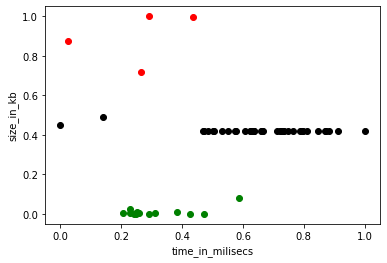

In [67]:
# now medium time ontologies clustered on memory
t=df_medium_drop.drop(['file','label_time'],axis=1)
#print(df_medium_drop.shape)
#print(t.columns)
scaler = MinMaxScaler()
scaler.fit(t)
t_df_scaled=scaler.transform(t)
#print(t_df_scaled)

t_MinMax = pd.DataFrame(data=t_df_scaled, columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])
t=t_MinMax

print(t.shape)
#t_np=np.array(t)
#print(t_np)
km_2 = KMeans(n_clusters=3,random_state=0)
print(km_2)
y_predicted_2=km_2.fit_predict(t[["consistency_size_kb"]])
print(y_predicted_2)
#print(type(t))
t['cluster']=y_predicted_2
#print(t)
t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()
#t_MinMax


In [68]:
label_col=[]
for i in range((y_predicted_2.shape[0])):
    if y_predicted_2[i]==0:
        label_col.append('medium')
    elif y_predicted_2[i]==1:
        label_col.append('easy')
    else:
        label_col.append('hard')
        
df_medium_drop['label_mem']=label_col
df_medium_time_mem=df_medium_drop # contains first based on time and now on memory
df_medium_time_mem

<ipython-input-68-d8cea36094a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_drop['label_mem']=label_col


file  size_kb consistency_time_milsecs  \
185  00699.owl_functional.owl   582904                   510801   
0              OWL2DL-100.owl   543811                   673449   
3              OWL2DL-200.owl  1108757                   616636   
11             OWL2EL-200.owl  1108750                   605649   
19             OWL2QL-200.owl  1108752                   500321   
27             OWL2RL-200.owl  1108754                   556153   
0              OWL2DL-210.owl  1129377                   733716   
1              OWL2DL-212.owl  1139587                   623903   
2              OWL2DL-214.owl  1149982                   616735   
3              OWL2DL-216.owl  1161516                   670292   
4              OWL2DL-218.owl  1167004                   653266   
5              OWL2DL-220.owl  1177359                   688801   
6              OWL2DL-222.owl  1192779                   596130   
7              OWL2DL-224.owl  1200270                   602886   
8              OWL2DL-226.owl  1216185                   599829   
9              OWL2DL-228.owl  1225140                   591810   
10             OWL2DL-230.owl  1230808                   600383   
11             OWL2DL-232.owl  1246218                   591082   
12             OWL2DL-234.owl  1254107                   599435   
13             OWL2DL-236.owl  1268879                   582929   
14             OWL2DL-238.owl  1280275                   701110   
15             OWL2DL-240.owl  1289274                   792833   
16             OWL2DL-242.owl  1304585                   688112   
17             OWL2DL-244.owl  1316584                   750405   
18             OWL2DL-246.owl  1326649                   686813   
19             OWL2DL-248.owl  1339337                   693132   
20             OWL2DL-250.owl  1344931                   700017   
21             OWL2DL-252.owl  1356079                   712149   
22             OWL2DL-254.owl  1369191                   753754   
23             OWL2DL-256.owl  1379552                   749855   
24             OWL2DL-258.owl  1385003                   729737   
25             OWL2DL-260.owl  1403798                   720094   
26             OWL2DL-262.owl  1415476                   729087   
27             OWL2DL-264.owl  1419863                   787037   
28             OWL2DL-266.owl  1432951                   753514   
29             OWL2DL-268.owl  1447849                   742266   
30             OWL2DL-270.owl  1460329                   752861   
31             OWL2DL-272.owl  1473726                   748409   
32             OWL2DL-274.owl  1484776                   762217   
33             OWL2DL-276.owl  1495150                   763726   
34             OWL2DL-278.owl  1509333                   789109   
35             OWL2DL-280.owl  1519077                   765729   
36             OWL2DL-282.owl  1530230                   791575   
37             OWL2DL-284.owl  1541870                   783217   
38             OWL2DL-286.owl  1550733                   817229   
39             OWL2DL-288.owl  1558464                   813840   
40             OWL2DL-290.owl  1566422                   863327   
41             OWL2DL-292.owl  1575910                   797433   
42             OWL2DL-294.owl  1584616                   803980   
43             OWL2DL-296.owl  1590182                   816773   
44             OWL2DL-298.owl  1608184                   822418   
45             OWL2DL-300.owl  1615868                   847352   
46             OWL2DL-302.owl  1628006                   845905   
47             OWL2DL-304.owl  1632306                   851275   
48             OWL2DL-306.owl  1644678                   898338   
49             OWL2DL-308.owl  1660138                   837572   

    consistency_size_kb realisation_time_milsecs realisation_size_kb  \
185           118948904                   533505           117505604   
0             128672792                   704093           12

In [69]:
total_df= pd.read_csv('final_new_more.csv') # for features collection 
print("size of final_new_more= ",total_df.shape)

df_medium_time_mem_feature=[]
for i in range(df_medium_time_mem.shape[0]):
    ont=df_medium_time_mem.iloc[i,:]['file']
    lab=df_medium_time_mem.iloc[i,:]['label_mem']
    #print(ont,lab)
    o=(np.array(total_df[total_df['file']==ont]))
    #print(o.shape)
    if o.shape[0]!=0:
    
        u=list(np.array(total_df[total_df['file']==ont])[0])
        u.append(str(lab))
        #print(u)
        df_medium_time_mem_feature.append(u)

    #break

total_df_cols=list(total_df.columns)
total_df_cols.append('label_mem')
#print(total_df_cols)
df_medium_time_mem_feature_df=pd.DataFrame(data=df_medium_time_mem_feature,columns=total_df_cols)
df_medium_time_mem_feature_df

size of final_new_more=  (16398, 100)


file  size_kb  consistency_time_milsecs  consistency_size_kb  \
0   OWL2DL-100.owl   543811                    673449            128672792   
1   OWL2DL-200.owl  1108757                    616636            128837964   
2   OWL2EL-200.owl  1108750                    605649            106586272   
3   OWL2QL-200.owl  1108752                    500321             85606796   
4   OWL2RL-200.owl  1108754                    556153             88531188   
5   OWL2DL-210.owl  1129377                    733716             56204052   
6   OWL2DL-212.owl  1139587                    623903             50402200   
7   OWL2DL-214.owl  1149982                    616735             50068120   
8   OWL2DL-216.owl  1161516                    670292             49925028   
9   OWL2DL-218.owl  1167004                    653266             50807420   
10  OWL2DL-220.owl  1177359                    688801             50028128   
11  OWL2DL-222.owl  1192779                    596130             49942300   
12  OWL2DL-224.owl  1200270                    602886             50145836   
13  OWL2DL-226.owl  1216185                    599829             49912292   
14  OWL2DL-228.owl  1225140                    591810             50278816   
15  OWL2DL-230.owl  1230808                    600383             50618360   
16  OWL2DL-232.owl  1246218                    591082             52046384   
17  OWL2DL-234.owl  1254107                    599435             50282168   
18  OWL2DL-236.owl  1268879                    582929             50319372   
19  OWL2DL-238.owl  1280275                    701110             82947772   
20  OWL2DL-240.owl  1289274                    792833             82944380   
21  OWL2DL-242.owl  1304585                    688112             82949124   
22  OWL2DL-244.owl  1316584                    750405             82957488   
23  OWL2DL-246.owl  1326649                    686813             82952608   
24  OWL2DL-248.owl  1339337                    693132             82954196   
25  OWL2DL-250.owl  1344931                    700017             82938864   
26  OWL2DL-252.owl  1356079                    712149             82946516   
27  OWL2DL-254.owl  1369191                    753754             82950024   
28  OWL2DL-256.owl  1379552                    749855             82944880   
29  OWL2DL-258.owl  1385003                    729737             82939728   
30  OWL2DL-260.owl  1403798                    720094             82939228   
31  OWL2DL-262.owl  1415476                    729087             82947212   
32  OWL2DL-264.owl  1419863                    787037             82943964   
33  OWL2DL-266.owl  1432951                    753514             82948884   
34  OWL2DL-268.owl  1447849                    742266             82944000   
35  OWL2DL-270.owl  1460329                    752861             82947708   
36  OWL2DL-272.owl  1473726                    748409             82947560   
37  OWL2DL-274.owl  1484776                    762217             82946572   
38  OWL2DL-276.owl  1495150                    763726             82945876   
39  OWL2DL-278.owl  1509333                    789109             82943428   
40  OWL2DL-280.owl  1519077                    765729             82937196   
41  OWL2DL-282.owl  1530230                    791575             82943528   
42  OWL2DL-284.owl  1541870                    783217             82942660   
43  OWL2DL-286.owl  1550733                    817229             82940112   
44  OWL2DL-288.owl  1558464                    813840             82943796   
45  OWL2DL-290.owl  1566422                    863327             82938704   
46  OWL2DL-292.owl  1575910                    797433             82943212   
47  OWL2DL-294.owl  1584616                    803980             82938896   
48  OWL2DL-296.owl  1590182                    816773             82942488   
49  OWL2DL-298.owl  1608184                    822418             82939492   
50  OWL2DL-300.owl  1615868         

In [70]:
print(df_medium['consistency_time_milsecs'].max(),df_medium['consistency_time_milsecs'].min())
print(df_medium_time_mem_feature_df['consistency_time_milsecs'].max(),df_medium_time_mem_feature_df['consistency_time_milsecs'].min())
print(df_medium['consistency_size_kb'].max(),df_medium['consistency_size_kb'].min())
print(df_medium_time_mem_feature_df['consistency_size_kb'].max(),df_medium_time_mem_feature_df['consistency_size_kb'].min())

898338 500321
898338 500321
128837964 49912292
128837964 49912292


In [71]:
# medium time with easy mem, medium mem and hard mem
l=df_medium_time_mem_feature_df.drop('file',axis=1)
x=l.groupby(l['label_mem']).agg(['min', 'max','mean'])
#x.to_csv('medium_time_mem_feature_16315.csv',index_label=True)
x
x_medium=x
x_medium

size_kb                        consistency_time_milsecs          \
               min      max          mean                      min     max   
label_mem                                                                    
easy       1129377  1268879  1.197086e+06                   582929  733716   
hard        543811  1108757  9.204393e+05                   605649  673449   
medium     1108752  1660138  1.454182e+06                   500321  898338   

                         consistency_size_kb                           \
                    mean                 min        max          mean   
label_mem                                                               
easy       625085.500000            49912292   56204052  5.078432e+07   
hard       631911.333333           106586272  128837964  1.213657e+08   
medium     761017.736842            82886588   88531188  8.315617e+07   

          realisation_time_milsecs  ...       CHN      CHNP            \
                               min  ...      mean       min       max   
label_mem                           ...                                 
easy                        582552  ...  8.000000  0.077670  0.077670   
hard                        607356  ...  7.666667  0.067961  0.081633   
medium                      506705  ...  7.789474  0.000000  0.079208   

                       ELPROP                     CAL_TIME           \
               mean       min       max      mean      min      max   
label_mem                                                             
easy       0.077670  0.842742  0.842742  0.842742  2442460  7333710   
hard       0.075755  0.842742  0.954286  0.880134  1131430  3971860   
medium     0.075666  0.834081  0.842742  0.842415  2006430  5657230   

                         
                   mean  
label_mem                
easy       4.271891e+06  
hard       2.851267e+06  
medium     4.107021e+06  

[3 rows x 297 columns]

[1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(55, 99)
99
['size_kb', 'consistency_time_milsecs', 'consistency_size_kb', 'realisation_time_milsecs', 'realisation_size_kb', 'classification_time_milsecs', 'classification_size_kb', 'SOV', 'ENR', 'TIP', 'EOG', 'RCH', 'CYC', 'GCI', 'HGCI', 'ESUB', 'DSUB', 'CSUB', 'SUPECHN', 'SUBECHN', 'SUBCCHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUBCCHN', 'DSUPDCHN', 'ELCLSPRT', 'ELAXPRT', 'HLC', 'RHLC', 'IHR', 'IIR', 'ITR', 'IND', 'aNOC', 'mNOC', 'tNOC', 'aCID', 'mCID', 'tCID', 'aCOD', 'mCOD', 'tCOD', 'aDIT', 'mDIT', 'tDIT', 'aNOP', 'mNOP', 'tNOP', 'ENUM', 'ENUMP', 'NEG', 'NEGP', 'CONJ', 'CONJP', 'DISJ', 'DISJP', 'UF', 'UFP', 'EF', 'EFP', 'VALUE', 'VALUEP', 'SELF', 'SELFP', 'MNCAR', 'MNCARP', 'MXCAR', 'MXCARP', 'CAR', 'CARP', 'OBP', 'OBPP', 'DTP', 'DTPP', 'FUN', 'FUNP', 'SYM', 'SYMP', 'TRN', 'TRNP', 'IFUN', 'IFUNP', 'ASYM', 'ASYMP', 'REFLE', 'REFLEP', 'IRREF', 'IRREFP', 'SUBP', 'EQVP', '

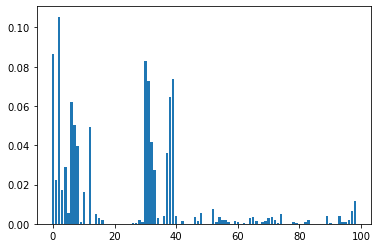

In [72]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import operator
le = preprocessing.LabelEncoder()
p=df_medium_time_mem_feature_df
le.fit(p['label_mem'])
g=le.transform(p['label_mem']) 
print(g)
x_train_np=p.drop(['file','label_mem'],axis=1)
print(x_train_np.shape)
y_train_np=np.array(g)


model = RandomForestClassifier(n_estimators = 100, random_state = 2)
model.feature_names = list(x_train_np.columns.values)
model.fit(x_train_np, y_train_np)
ft=list(model.feature_names)
importance = model.feature_importances_
print(model.n_features_)
print(ft,type(ft))

dict1_imp={}
c=0
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    val= round(v,5)
    #print(val,type(val),ft[c])
    dict1_imp[ft[c]]=val
    c+=1
#print(dict1_imp)
dict1_imp_sort=dict(sorted(dict1_imp.items(), key=operator.itemgetter(1),reverse=True))

for key,val in dict1_imp_sort.items():
    print(key,val)
plt.bar([x for x in range(len(importance))], importance)
plt.show()


medium_feature_sort_dic=dict1_imp_sort

top_n_2=(list(medium_feature_sort_dic.keys())[:30])

In [73]:
d= dict(x_medium)
medium_zero_features =[]
for key, value in dict1_imp_sort.items():
    if value == 0.0:
        if ( sum(list(d[(key, 'mean')]))/3 )== 0.0 :
            print(key,list(d[(key, 'mean')]))
            medium_zero_features.append(key)
print(medium_zero_features)

print(top_n_2)

SUPECHN [0, 0, 0]
SUBECHN [0, 0, 0]
SUPDCHN [0, 0, 0]
DSUPECHN [0, 0, 0]
DSUBECHN [0, 0, 0]
DSUPDCHN [0, 0, 0]
aDIT [0.0, 0.0, 0.0]
mDIT [0, 0, 0]
tDIT [0, 0, 0]
ASYMP [0.0, 0.0, 0.0]
REFLEP [0.0, 0.0, 0.0]
IRREFP [0.0, 0.0, 0.0]
['SUPECHN', 'SUBECHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUPDCHN', 'aDIT', 'mDIT', 'tDIT', 'ASYMP', 'REFLEP', 'IRREFP']
['consistency_size_kb', 'size_kb', 'IHR', 'tCID', 'IIR', 'mCID', 'classification_size_kb', 'SOV', 'CYC', 'ITR', 'ENR', 'aCID', 'realisation_size_kb', 'IND', 'consistency_time_milsecs', 'realisation_time_milsecs', 'EOG', 'CAL_TIME', 'NEGP', 'ELPROP', 'classification_time_milsecs', 'tNOP', 'DTPP', 'HGCI', 'aCOD', 'SUBP', 'DOMN', 'tNOC', 'MNCAR', 'aNOP']


(55, 101)
(14, 101)
feature name=  size_kb
feature values=  [1129377 1139587 1149982 1161516 1167004 1177359 1192779 1200270 1216185
 1225140 1230808 1246218 1254107 1268879]
max value =  1268879 min value =  1129377
mean=  1197086.5 standard deviation=  42933.48632103584
left range=  1186353.128419741 right range=  1282953.4726420718
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2245697521381982
skewness value=  0.05092056988288058


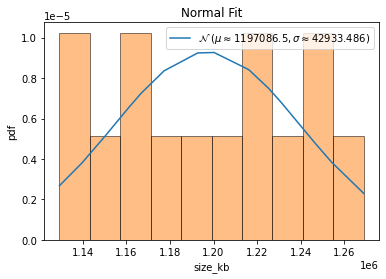


QQ plot 



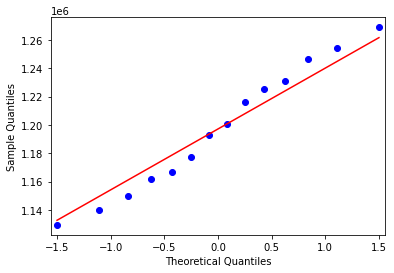


 Shapiro-Wilk Test 
 
Statistics=1.765, p=0.413767
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_time_milsecs
feature values=  [733716 623903 616735 670292 653266 688801 596130 602886 599829 591810
 600383 591082 599435 582929]
max value =  733716 min value =  582929
mean=  625085.5 standard deviation=  43133.60181997657
left range=  614302.0995450058 right range=  711352.7036399532
data covered within this range=  35.71 %
data covered within 1 standard deviation=  78.57 %
data covered within 2 standard deviation=  92.86 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.4755043543414641
skewness value=  1.264247517038612


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


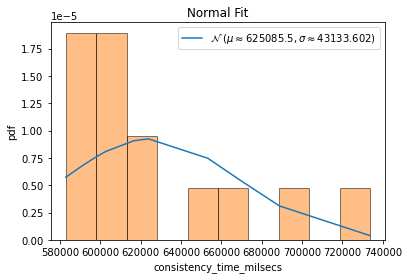


QQ plot 



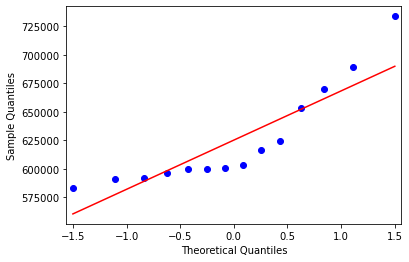


 Shapiro-Wilk Test 
 
Statistics=6.664, p=0.035729
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_size_kb
feature values=  [56204052 50402200 50068120 49925028 50807420 50028128 49942300 50145836
 49912292 50278816 50618360 52046384 50282168 50319372]
max value =  56204052 min value =  49912292
mean=  50784319.71428572 standard deviation=  1593838.6712433526
left range=  50385860.04647488 right range=  53971997.05677242
data covered within this range=  28.57 %
data covered within 1 standard deviation=  92.86 %
data covered within 2 standard deviation=  92.86 %
data covered within 3 standard deviation=  92.86 %



normality test :----

kurtosis value=  6.606694698629672
skewness value=  2.7844749075069277


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


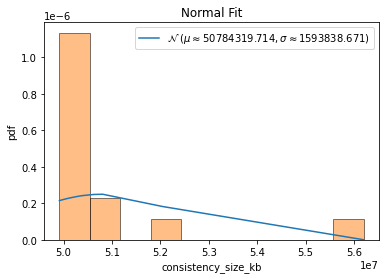


QQ plot 



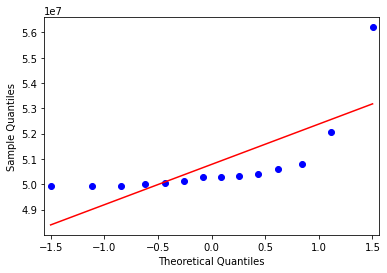


 Shapiro-Wilk Test 
 
Statistics=30.773, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_time_milsecs
feature values=  [631449 676014 610524 595086 620661 598200 665039 593557 604533 582552
 619708 612945 618168 652621]
max value =  676014 min value =  582552
mean=  620075.5 standard deviation=  26647.72250185209
left range=  613413.569374537 right range=  673370.9450037042
data covered within this range=  42.86 %
data covered within 1 standard deviation=  71.43 %
data covered within 2 standard deviation=  92.86 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.4243401685678325
skewness value=  0.7524425572562367


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


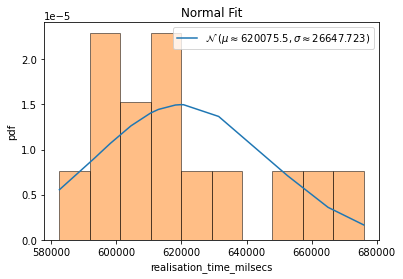


QQ plot 



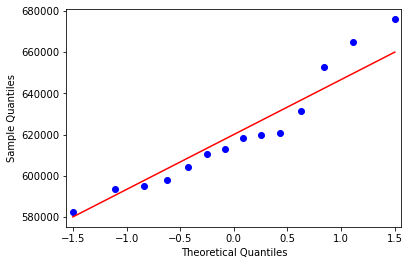


 Shapiro-Wilk Test 
 
Statistics=2.113, p=0.347742
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_size_kb
feature values=  [56734688 50601952 49966496 50112620 50778620 49918232 56300300 50214800
 50021612 51242612 49797088 51636072 50301264 50450244]
max value =  56734688 min value =  49797088
mean=  51291185.71428572 standard deviation=  2192531.433146217
left range=  50743052.855999164 right range=  55676248.58057815
data covered within this range=  21.43 %
data covered within 1 standard deviation=  85.71 %
data covered within 2 standard deviation=  85.71 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  1.719421225838584
skewness value=  1.842116927451732


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


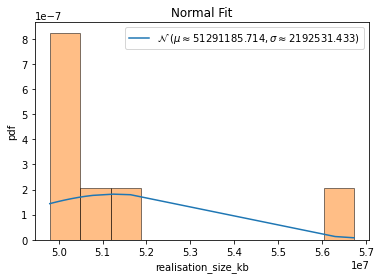


QQ plot 



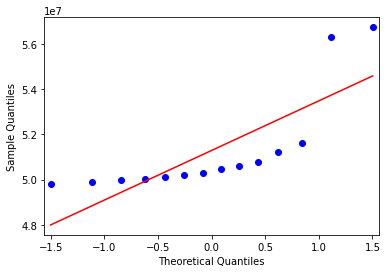


 Shapiro-Wilk Test 
 
Statistics=13.873, p=0.000972
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_time_milsecs
feature values=  [651077 653379 684282 639233 658791 600525 590026 590715 623742 630186
 619778 628231 608333 676335]
max value =  684282 min value =  590026
mean=  632473.7857142857 standard deviation=  28709.21067775629
left range=  625296.4830448466 right range=  689892.2070697983
data covered within this range=  57.14 %
data covered within 1 standard deviation=  64.29 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.9603073719283395
skewness value=  0.1773947691508114


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


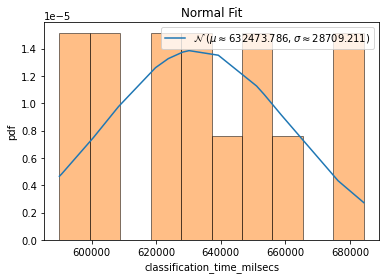


QQ plot 



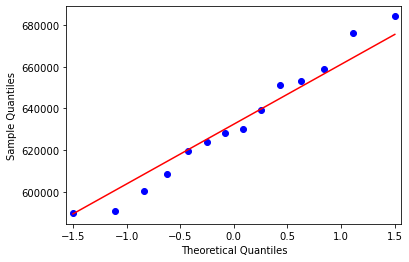


 Shapiro-Wilk Test 
 
Statistics=0.637, p=0.727103
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  classification_size_kb
feature values=  [51986764 50397368 50360276 50953272 50014060 49932476 51495236 51329596
 50693608 51267520 50225824 50506248 51408140 82960812]
max value =  82960812 min value =  49932476
mean=  53109371.428571425 standard deviation=  8300560.528260501
left range=  51034231.2965063 right range=  69710492.48509243
data covered within this range=  35.71 %
data covered within 1 standard deviation=  92.86 %
data covered within 2 standard deviation=  92.86 %
data covered within 3 standard deviation=  92.86 %



normality test :----

kurtosis value=  8.955959110339519
skewness value=  3.2985451322870847


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


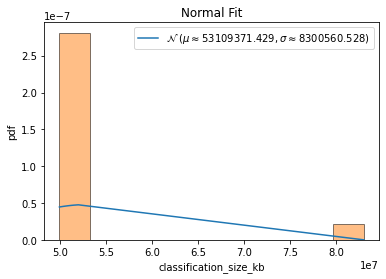


QQ plot 



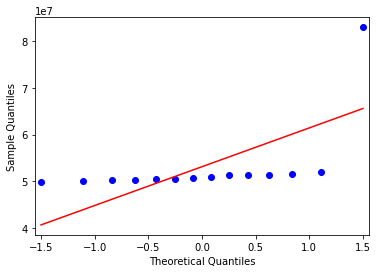


 Shapiro-Wilk Test 
 
Statistics=38.039, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SOV
feature values=  [3591778 3625707 3653413 3686863 3706640 3738368 3780485 3805370 3849767
 3878809 3898364 3941364 3966855 4007514]
max value =  4007514 min value =  3591778
mean=  3795092.6428571427 standard deviation=  128134.6435939316
left range=  3763058.98195866 right range=  4051361.930045006
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2300403879753405
skewness value=  0.04688430899890422


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


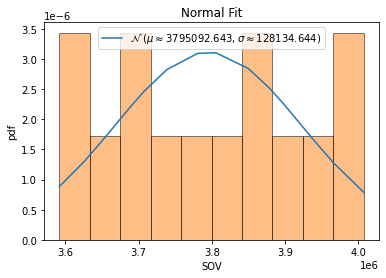


QQ plot 



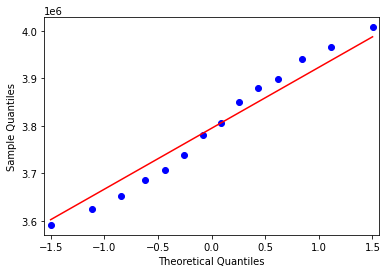


 Shapiro-Wilk Test 
 
Statistics=1.801, p=0.406329
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  ENR
feature values=  [4.30876048 4.30620517 4.31227292 4.315591   4.31223533 4.31234805
 4.31992578 4.31812115 4.32463741 4.32327847 4.32027553 4.32624069
 4.32517759 4.33148533]
max value =  4.331485325605936 min value =  4.306205167921027
mean= 

/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 4.318325350103728 standard deviation=  0.00711579360505686
left range=  4.316546401702464 right range=  4.332556937313842
data covered within this range=  57.14 %
data covered within 1 standard deviation=  71.43 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.9848358933826638
skewness value=  0.028585125705212214


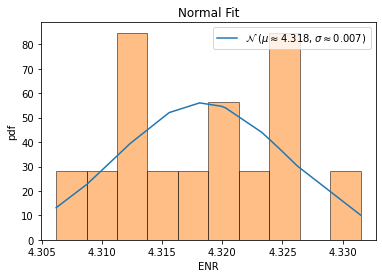


QQ plot 



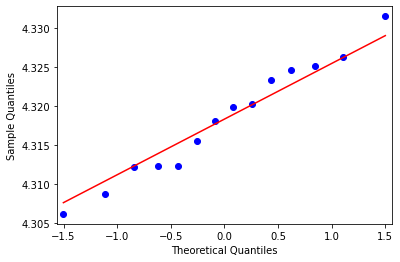


 Shapiro-Wilk Test 
 
Statistics=0.592, p=0.743684
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  EOG
feature values=  [2.69575623 2.68175    2.69276697 2.6947852  2.68209062 2.67934047
 2.68932322 2.68076043 2.69026338 2.68218933 2.67232536 2.68062432
 2.67501885 2.68449638]
max value =  2.6957562257617123 min value =  2.672325363362075
mean=  2.684392197699873 standard deviation=  0.00691579449817017
left range=  2.6826632490753304 right range=  2.698223786696213
data covered within this range=  42.86 %
data covered within 1 standard deviation=  64.29 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.967512464091532
skewness value=  0.13984826369515727


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


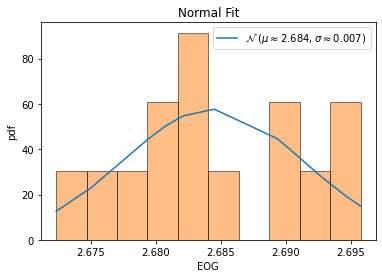


QQ plot 



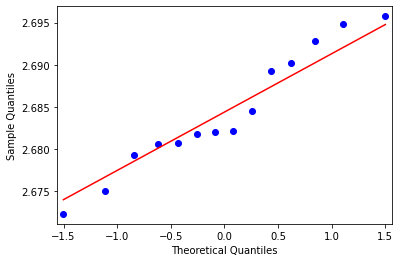


 Shapiro-Wilk Test 
 
Statistics=0.612, p=0.736335
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CYC
feature values=  [11884494 11987494 12101268 12224289 12277425 12382941 12551095 12626840
 12799247 12890524 12943806 13110089 13190663 13351140]
max value =  13351140 min value =  11884494
mean=  12594379.642857144 standard deviation=  450906.61692838464
left range=  12481652.988625048 right range=  13496192.876713913
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2218427841401922
skewness value=  0.05188444459105279


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


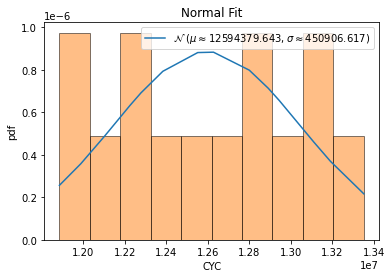


QQ plot 



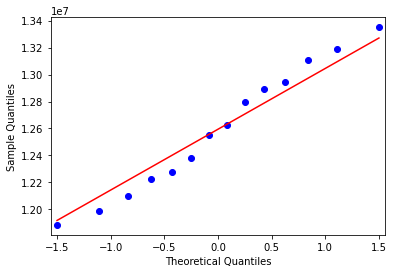


 Shapiro-Wilk Test 
 
Statistics=1.747, p=0.417559
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  HGCI
feature values=  [19 19 19 19 19 19 19 19 19 19 19 19 19 19]
max value =  19 min value =  19
mean=  19.0 standard deviation=  0.0
left range=  19.0 right range=  19.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


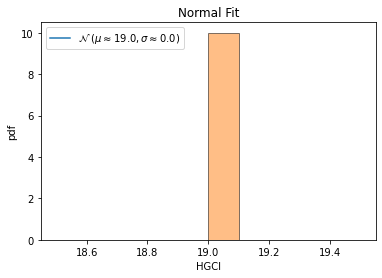


QQ plot 



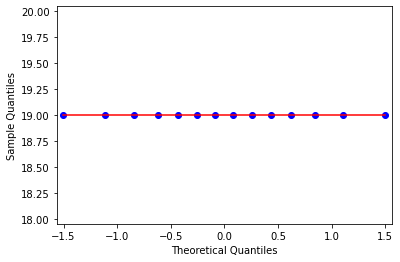


 Shapiro-Wilk Test 
 
Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IHR
feature values=  [3651235 3681384 3716957 3754670 3769052 3802308 3853317 3875710 3929370
 3956221 3972786 4022994 4047232 4097630]
max value =  4097630 min value =  3651235
mean=  3866490.4285714286 standard deviation=  137119.8809700654
left range=  3832210.4583289125 right range=  4140730.1905115596
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2190961014462989
skewness value=  0.05567032407035744


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


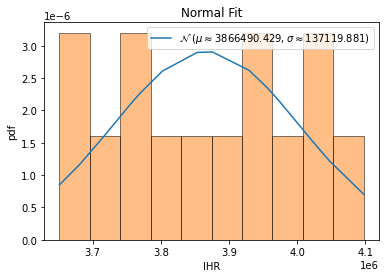


QQ plot 



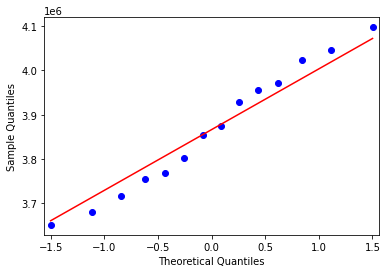


 Shapiro-Wilk Test 
 
Statistics=1.730, p=0.421126
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  IIR
feature values=  [1862804 1884842 1896754 1914522 1929043 1946801 1965861 1981928 2001931
 2020063 2034158 2054574 2070208 2088905]
max value =  2088905 min value =  1862804
mean=  1975171.0 standard deviation=  69775.82799836303
left range=  1957727.0430004091 right range=  2114722.655996726
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2285576923698145
skewness value=  0.034165925523472786


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


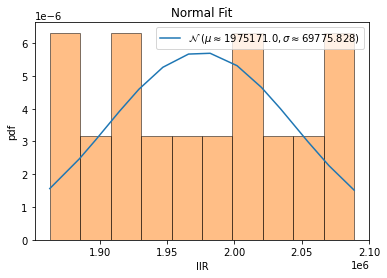


QQ plot 



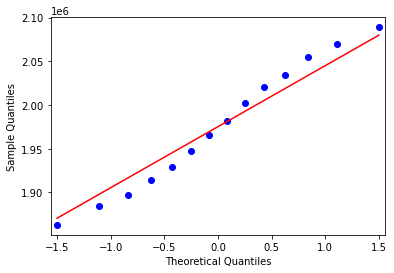


 Shapiro-Wilk Test 
 
Statistics=1.787, p=0.409261
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  ITR
feature values=  [438976 445081 446344 451006 454754 458637 464577 467358 472216 476123
 479909 484723 488023 492037]
max value =  492037 min value =  438976
mean=  465697.4285714286 standard deviation=  16497.65326910937
left range=  461573.01525415125 right range=  498692.7351096473
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.255306100976611
skewness value=  0.010285966859126963


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


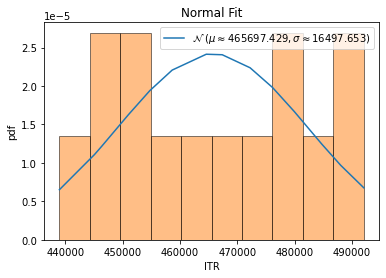


QQ plot 



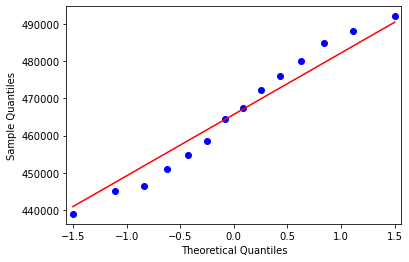


 Shapiro-Wilk Test 
 
Statistics=1.976, p=0.372373
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  IND
feature values=  [1097113 1103105 1116769 1128765 1130247 1139692 1157812 1162707 1181593
 1188106 1190332 1208253 1214556 1232214]
max value =  1232214 min value =  1097113
mean=  1160804.5714285714 standard deviation=  41432.281068396565
left range=  1150446.5011614722 right range=  1243669.1335653644
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.1979132729569244
skewness value=  0.07494556381374334


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


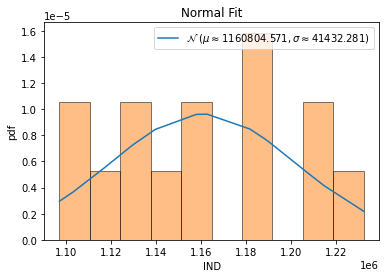


QQ plot 



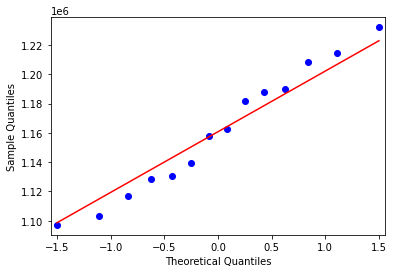


 Shapiro-Wilk Test 
 
Statistics=1.601, p=0.449125
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  tNOC
feature values=  [122 122 122 122 122 122 122 122 122 122 122 122 122 122]
max value =  122 min value =  122
mean=  122.0 standard deviation=  0.0
left range=  122.0 right range=  122.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


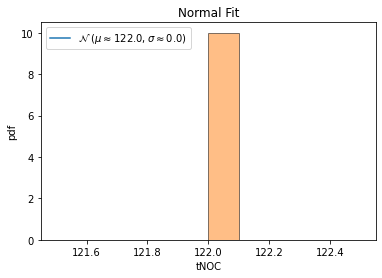


QQ plot 



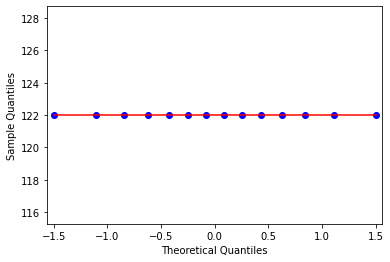


 Shapiro-Wilk Test 
 
Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aCID
feature values=  [8831.17816092 8895.41954023 8985.8045977  9080.12643678 9107.02873563
 9182.46551724 9313.70114943 9364.86206897 9500.72988506 9561.68390805
 9590.05172414 9718.82758621 9775.46551724 9900.55747126]
max value =  9900.557471264368 min value =  8831.17816091954
mean=  9343.421592775041 standard deviation=  328.9211396246641
left range=  9261.191307868876 right range=  10001.263872024369
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.219768988768302
skewness value=  0.06035473135240847


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


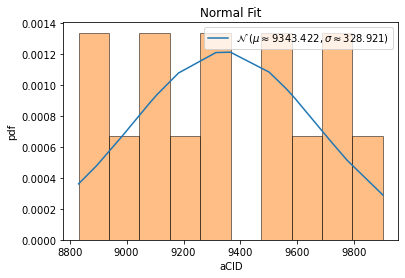


QQ plot 



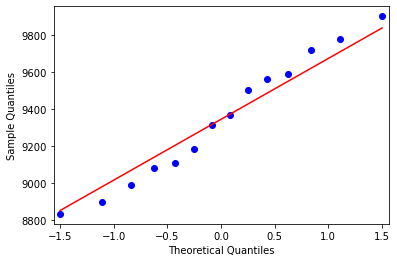


 Shapiro-Wilk Test 
 
Statistics=1.736, p=0.419720
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  mCID
feature values=  [417301 422384 424961 428923 432262 436089 440377 443989 448649 452768
 455846 460452 463869 468056]
max value =  468056 min value =  417301
mean=  442566.14285714284 standard deviation=  15669.694170856152
left range=  438648.7193144288 right range=  473905.53119885514
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2336678322319479
skewness value=  0.03457209043919381


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


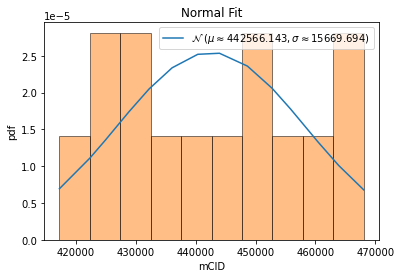


QQ plot 



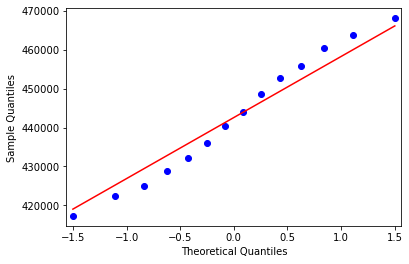


 Shapiro-Wilk Test 
 
Statistics=1.823, p=0.401990
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  tCID
feature values=  [1536625 1547803 1563530 1579942 1584623 1597749 1620584 1629486 1653127
 1663733 1668669 1691076 1700931 1722697]
max value =  1722697 min value =  1536625
mean=  1625755.357142857 standard deviation=  57232.27829469154
left range=  1611447.287569184 right range=  1740219.9137322402
data covered within this range=  57.14 %
data covered within 1 standard deviation=  57.14 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2197689887683012
skewness value=  0.06035473135241374


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


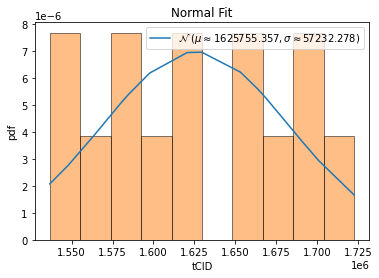


QQ plot 



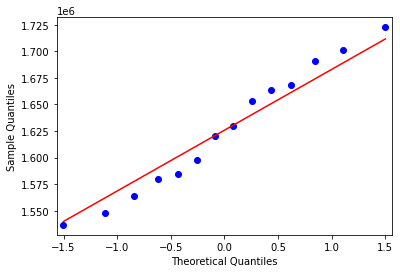


 Shapiro-Wilk Test 
 
Statistics=1.736, p=0.419720
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  aCOD
feature values=  [13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241]
max value =  13.155172413793109 min value =  13.155172413793109
mean=  13.155172413793109 standard deviation=  0.0
left range=  13.155172413793109 right range=  13.155172413793109
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


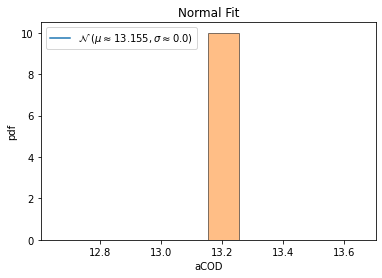


QQ plot 



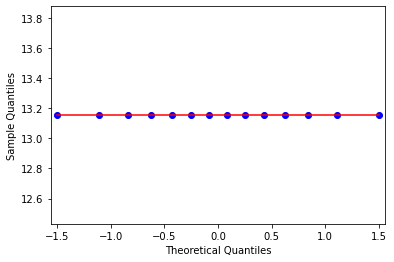


 Shapiro-Wilk Test 
 
Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aNOP
feature values=  [0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287]
max value =  0.9942528735632185 min value =  0.9942528735632185
mean=  0.9942528735632182 standard deviation=  2.220446049250313e-16
left range=  0.9942528735632181 right range=  0.9942528735632187
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -2.0
skewness value=  1.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


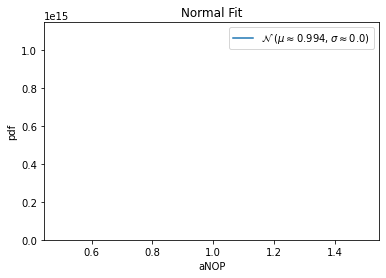


QQ plot 



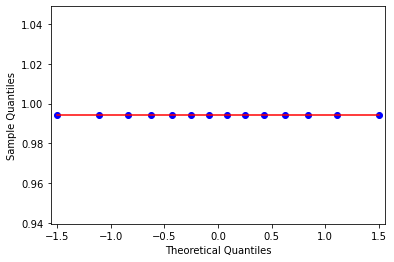


 Shapiro-Wilk Test 
 
Statistics=25.912, p=0.000002
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tNOP
feature values=  [173 173 173 173 173 173 173 173 173 173 173 173 173 173]
max value =  173 min value =  173
mean=  173.0 standard deviation=  0.0
left range=  173.0 right range=  173.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


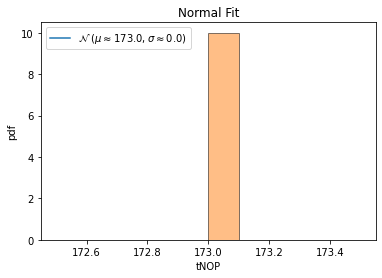


QQ plot 



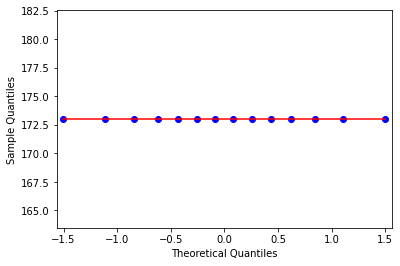


 Shapiro-Wilk Test 
 


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  NEGP
feature values=  [0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303
 0.0303 0.0303 0.0303 0.0303]
max value =  0.0303 min value =  0.0303
mean=  0.030299999999999997 standard deviation=  3.469446951953614e-18
left range=  0.030299999999999997 right range=  0.030300000000000004
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -2.0
skewness value=  1.0


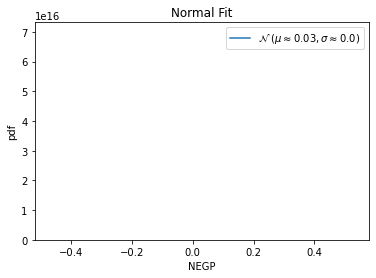


QQ plot 



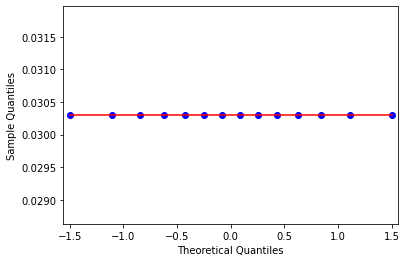


 Shapiro-Wilk Test 
 
Statistics=25.912, p=0.000002
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  MNCAR
feature values=  [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
max value =  1 min value =  1
mean=  1.0 standard deviation=  0.0
left range=  1.0 right range=  1.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


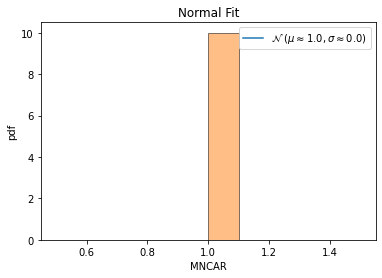


QQ plot 



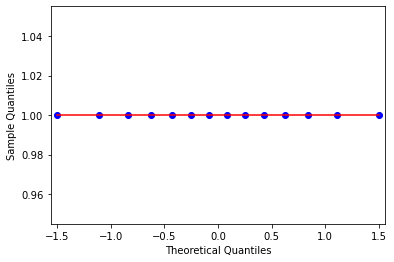


 Shapiro-Wilk Test 
 
Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  DTPP
feature values=  [0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262
 0.1262 0.1262 0.1262 0.1262]
max value =  0.1262 min value =  0.1262
mean=  0.12620000000000003 standard deviation=  2.7755575615628914e-17
left range=  0.12620000000000003 right range=  0.1262000000000001
data covered within this range=  0.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -2.0
skewness value=  -1.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


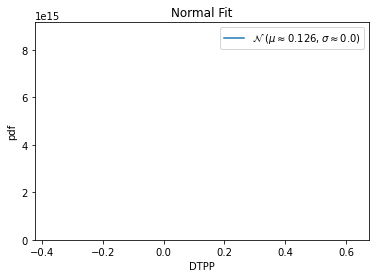


QQ plot 



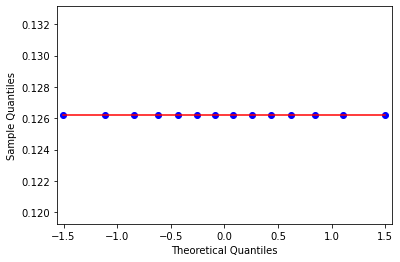


 Shapiro-Wilk Test 
 
Statistics=25.912, p=0.000002
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SUBP
feature values=  [65 65 65 65 65 65 65 65 65 65 65 65 65 65]
max value =  65 min value =  65
mean=  65.0 standard deviation=  0.0
left range=  65.0 right range=  65.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


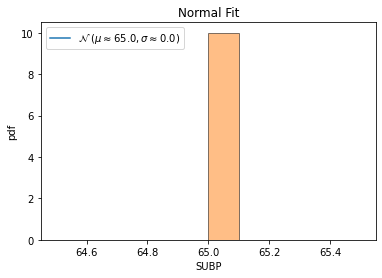


QQ plot 



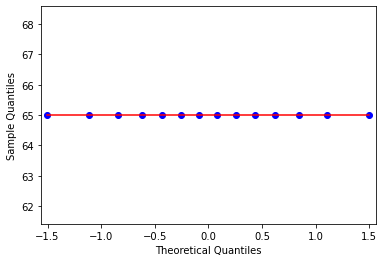


 Shapiro-Wilk Test 
 
Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  DOMN
feature values=  [68 68 68 68 68 68 68 68 68 68 68 68 68 68]
max value =  68 min value =  68
mean=  68.0 standard deviation=  0.0
left range=  68.0 right range=  68.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


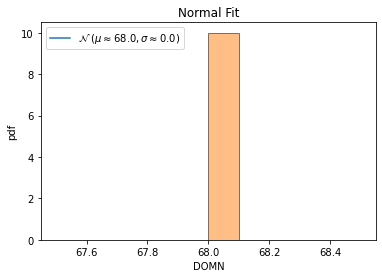


QQ plot 



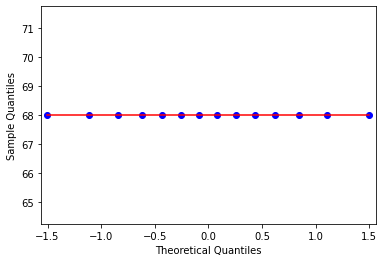


 Shapiro-Wilk Test 
 
Statistics=644.979, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ELPROP
feature values=  [0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194]
max value =  0.842741935483871 min value =  0.842741935483871
mean=  0.8427419354838711 standard deviation=  1.1102230246251565e-16
left range=  0.8427419354838711 right range=  0.8427419354838713
data covered within this range=  0.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -2.0
skewness value=  -1.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


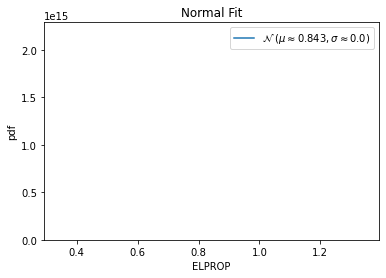


QQ plot 



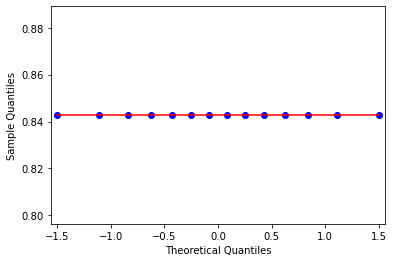


 Shapiro-Wilk Test 
 
Statistics=25.912, p=0.000002
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAL_TIME
feature values=  [2442460 6614020 3956700 3439860 2635210 2709220 2520310 6531600 2553340
 6604810 3567690 2535400 6362150 7333710]
max value =  7333710 min value =  2442460
mean=  4271891.428571428 standard deviation=  1862604.5516114454
left range=  3806240.2906685667 right range=  7997100.531794319
data covered within this range=  42.86 %
data covered within 1 standard deviation=  64.29 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.545644953316576
skewness value=  0.48586552858359977


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


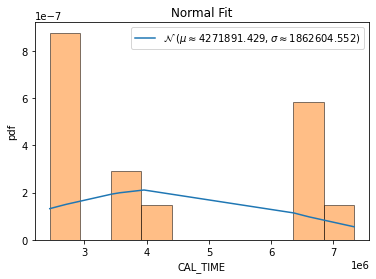


QQ plot 



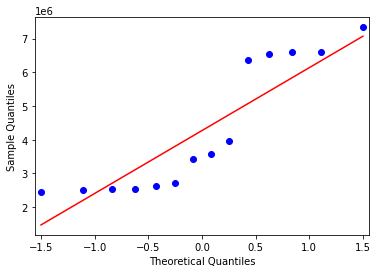


 Shapiro-Wilk Test 
 
Statistics=6.263, p=0.043658
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------



/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [74]:
#after medium time and memory clusering ,
#collect the easy ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

medium_zero_features.append('file')
medium_zero_features.append('label_mem')


#print(medium_zero_features)
print(df_medium_time_mem_feature_df.shape)
medium_time_mem_easy = df_medium_time_mem_feature_df[df_medium_time_mem_feature_df['label_mem']== 'easy']
print(medium_time_mem_easy.shape)
prior_easy= round(medium_time_mem_easy.shape[0] / df_medium_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in medium_zero_features:
    if cols_list[i] in top_n_2:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(medium_time_mem_easy[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_easy) *gamma * std) 
        #ry= mean + ((1- prior_easy) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / medium_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break

In [75]:
medium_time_mem_easy

file  size_kb  consistency_time_milsecs  consistency_size_kb  \
5   OWL2DL-210.owl  1129377                    733716             56204052   
6   OWL2DL-212.owl  1139587                    623903             50402200   
7   OWL2DL-214.owl  1149982                    616735             50068120   
8   OWL2DL-216.owl  1161516                    670292             49925028   
9   OWL2DL-218.owl  1167004                    653266             50807420   
10  OWL2DL-220.owl  1177359                    688801             50028128   
11  OWL2DL-222.owl  1192779                    596130             49942300   
12  OWL2DL-224.owl  1200270                    602886             50145836   
13  OWL2DL-226.owl  1216185                    599829             49912292   
14  OWL2DL-228.owl  1225140                    591810             50278816   
15  OWL2DL-230.owl  1230808                    600383             50618360   
16  OWL2DL-232.owl  1246218                    591082             52046384   
17  OWL2DL-234.owl  1254107                    599435             50282168   
18  OWL2DL-236.owl  1268879                    582929             50319372   

    realisation_time_milsecs  realisation_size_kb  \
5                     631449             56734688   
6                     676014             50601952   
7                     610524             49966496   
8                     595086             50112620   
9                     620661             50778620   
10                    598200             49918232   
11                    665039             56300300   
12                    593557             50214800   
13                    604533             50021612   
14                    582552             51242612   
15                    619708             49797088   
16                    612945             51636072   
17                    618168             50301264   
18                    652621             50450244   

    classification_time_milsecs  classification_size_kb      SOV       ENR  \
5                        651077                51986764  3591778  4.308760   
6                        653379                50397368  3625707  4.306205   
7                        684282                50360276  3653413  4.312273   
8                        639233                50953272  3686863  4.315591   
9                        658791                50014060  3706640  4.312235   
10                       600525                49932476  3738368  4.312348   
11                       590026                51495236  3780485  4.319926   
12                       590715                51329596  3805370  4.318121   
13                       623742                50693608  3849767  4.324637   
14                       630186                51267520  3878809  4.323278   
15                       619778                50225824  3898364  4.320276   
16                       628231                50506248  3941364  4.326241   
17                       608333                51408140  3966855  4.325178   
18                       676335                82960812  4007514  4.331485   

    ...  EQVP  DISP  INV  DOMN  RANG  CHN     CHNP    ELPROP  CAL_TIME  \
5   ...     5     2   22    68    58    8  0.07767  0.842742   2442460   
6   ...     5     2   22    68    58    8  0.07767  0.842742   6614020   
7   ...     5     2   22    68    58    8  0.07767  0.842742   3956700   
8   ...     5     2   22    68    58    8  0.07767  0.842742   3439860   
9   ...     5     2   22    68    58    8  0.07767  0.842742   2635210   
10  ...     5     2   22    68    58    8  0.07767  0.842742   2709220   
11  ...     5     2   22    68    58    8  0.07767  0.842742   2520310   
12  ...     5     2   22    68    58    8  0.07767  0.842742   6531600   
13  ...     5     2   22    68    58    8  0.07767  0.842742   2553340   
14  ...     5     2   22    68    58    8  0.07767  0.842742   6604810   
15  ...     5     2   22    68    58    8  0.07767  0.842742  

In [76]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
medium_time_easy_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(medium_time_easy_mem_table.shape)
#medium_time_easy_mem_table.to_csv('medium_time_easy_mem_table.csv',index=False)
#medium_time_mem_easy.to_csv('medium_time_mem_easy.csv',index=False)

(30, 13)


(55, 101)
(38, 101)
feature name=  size_kb
feature values=  [1108752 1108754 1280275 1289274 1304585 1316584 1326649 1339337 1344931
 1356079 1369191 1379552 1385003 1403798 1415476 1419863 1432951 1447849
 1460329 1473726 1484776 1495150 1509333 1519077 1530230 1541870 1550733
 1558464 1566422 1575910 1584616 1590182 1608184 1615868 1628006 1632306
 1644678 1660138]
max value =  1660138 min value =  1108752
mean=  1454181.605263158 standard deviation=  136601.6949787997
left range=  1420031.181518458 right range=  1727384.9952207573
data covered within this range=  57.89 %
data covered within 1 standard deviation=  68.42 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.022361042880326032
skewness value=  -0.6141326790668155


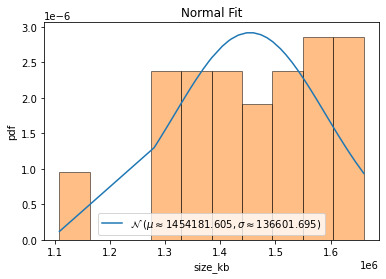


QQ plot 



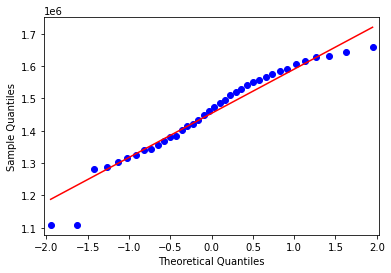


 Shapiro-Wilk Test 
 
Statistics=3.008, p=0.222218
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_time_milsecs
feature values=  [500321 556153 701110 792833 688112 750405 686813 693132 700017 712149
 753754 749855 729737 720094 729087 787037 753514 742266 752861 748409
 762217 763726 789109 765729 791575 783217 817229 813840 863327 797433
 803980 816773 822418 847352 845905 851275 898338 837572]
max value =  898338 min value =  500321
mean=  761017.7368421053 standard deviation=  75669.5531257225
left range=  742100.3485606747 right range=  912356.8430935503
data covered within this range=  71.05 %
data covered within 1 standard deviation=  78.95 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  2.7959919224654124
skewness value=  -1.2790748769546685


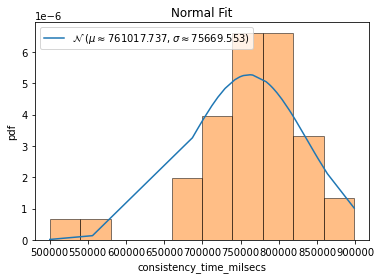


QQ plot 



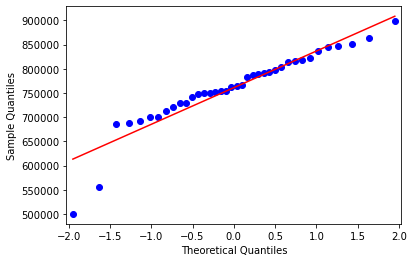


 Shapiro-Wilk Test 
 
Statistics=16.928, p=0.000211
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  consistency_size_kb
feature values=  [85606796 88531188 82947772 82944380 82949124 82957488 82952608 82954196
 82938864 82946516 82950024 82944880 82939728 82939228 82947212 82943964
 82948884 82944000 82947708 82947560 82946572 82945876 82943428 82937196
 82943528 82942660 82940112 82943796 82938704 82943212 82938896 82942488
 82939492 82943572 82892052 82894144 82886588 82889948]
max value =  88531188 min value =  82886588
mean=  83156168.0 standard deviation=  981522.6866837809
left range=  82910787.32832906 right range=  85119213.37336756
data covered within this range=  84.21 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  21.691597194169184
skewness value= 

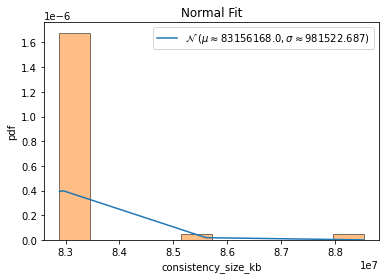


QQ plot 



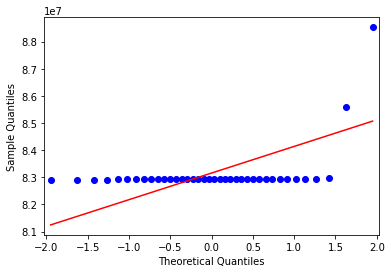


 Shapiro-Wilk Test 
 
Statistics=73.604, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_time_milsecs
feature values=  [506705 549992 720911 649579 701174 668309 693671 734502 703245 691194
 719535 740512 733878 776682 751978 718713 737844 742962 795588 808218
 771675 771039 765958 786963 808441 849969 820082 800235 814738 828189
 818569 822191 813207 819629 848850 860720 840345 822887]
max value =  860720 min value =  506705
mean=  758128.3947368421 standard deviation=  76487.27847699817
left range=  739006.5751175926 right range=  911102.9516908384
data covered within this range=  63.16 %
data covered within 1 standard deviation=  78.95 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  2.0557554403405947
skewness value=  -1.3265125479742577


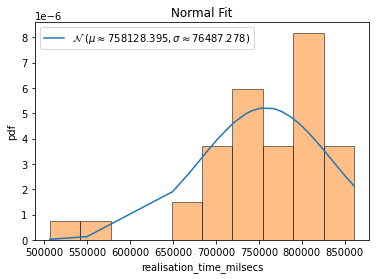


QQ plot 



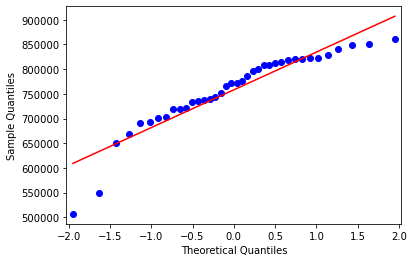


 Shapiro-Wilk Test 
 
Statistics=15.579, p=0.000414
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  realisation_size_kb
feature values=  [86797824 89854124 82942016 82947080 82948968 82954744 82956704 82950808
 82951144 82949716 82946256 82929760 82934688 82939396 82945132 82946444
 82948400 82948964 82947300 82940908 82947236 82944904 82943488 82943448
 82943032 82943132 82944416 82943972 82940772 82943448 82944460 82944384
 82943972 82941672 82888340 82893660 82892296 82890708]
max value =  89854124 min value =  82888340
mean=  83222571.4736842 standard deviation=  1253047.8925527472
left range=  82909309.50054602 right range=  85728667.2587897
data covered within this range=  84.21 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  19.391255608494394
skewness v

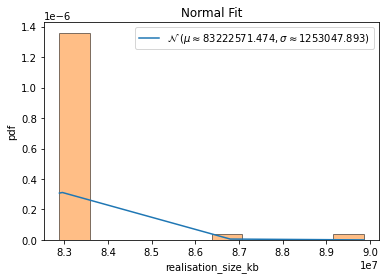


QQ plot 



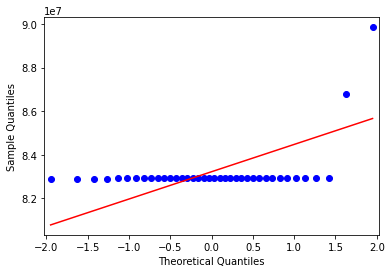


 Shapiro-Wilk Test 
 
Statistics=70.343, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_time_milsecs
feature values=  [517881 548326 724538 678730 679151 675364 684503 768885 696988 722948
 782356 779325 722295 755571 755828 757232 727467 753030 740208 799256
 780084 767585 773582 765452 787536 792815 790840 807198 796911 817967
 817549 821747 818649 821381 893876 874946 848882 887124]
max value =  893876 min value =  517881
mean=  761421.2105263158 standard deviation=  76322.3173708085
left range=  742340.6311836137 right range=  914065.8452679329
data covered within this range=  68.42 %
data covered within 1 standard deviation=  73.68 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  2.1475535215418526
skewness value=  -1.1308621646526056


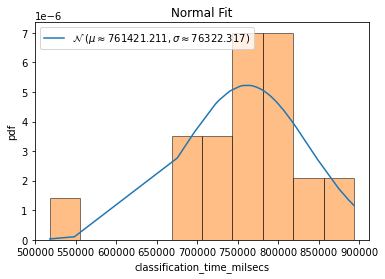


QQ plot 



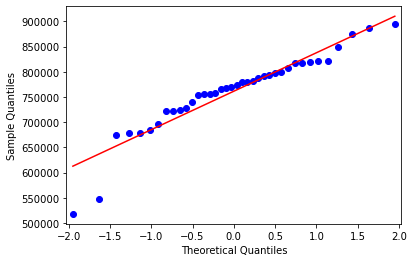


 Shapiro-Wilk Test 
 
Statistics=13.617, p=0.001105
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  classification_size_kb
feature values=  [85706104 88689260 82947644 82947924 82948860 82957500 82954980 82953388
 82952084 82952040 82951020 82930760 82940100 82938776 82948708 82941980
 82948648 82948488 82948240 82940620 82945344 82943392 82942440 82944504
 82944112 82942024 82944588 82938548 82943368 82939196 82943280 82945024
 82944976 82894204 82894096 82890844 82891964 82891220]
max value =  88689260 min value =  82890844
mean=  83162374.94736843 standard deviation=  1010984.3189840948
left range=  82909628.8676224 right range=  85184343.58533661
data covered within this range=  81.58 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  21.562094863624065
skewne

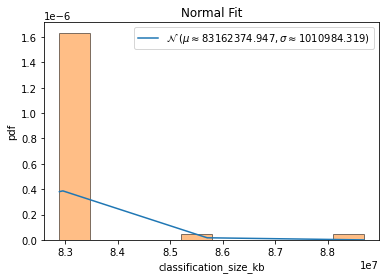


QQ plot 



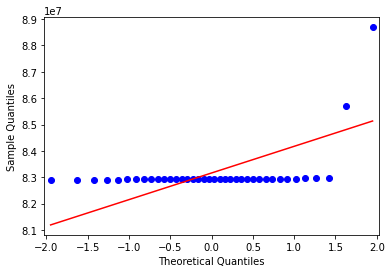


 Shapiro-Wilk Test 
 
Statistics=73.424, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SOV
feature values=  [3389777 3389782 4041350 4073652 4117362 4154481 4181487 4217925 4236967
 4270680 4307020 4339050 4360220 4411247 4445749 4465242 4501944 4545121
 4583934 4622971 4657376 4688746 4726350 4757192 4790690 4824589 4852557
 4878922 4901440 4928926 4954129 4975118 5023082 5047727 5081864 5101155
 5136356 5178704]
max value =  5178704 min value =  3389777
mean=  4556865.368421053 standard deviation=  428390.85676255863
left range=  4449767.654230413 right range=  5413647.08194617
data covered within this range=  60.53 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.5999883322571744
skewness value=  -0.826625476800434


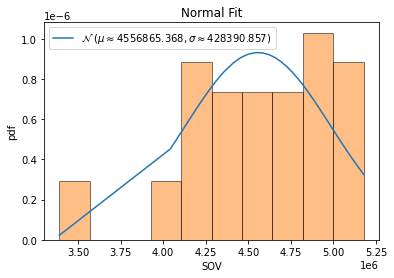


QQ plot 



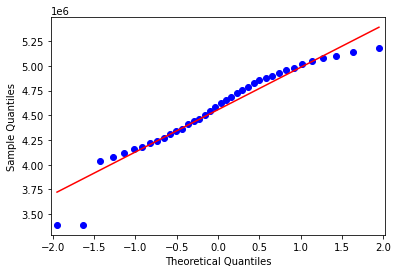


 Shapiro-Wilk Test 
 
Statistics=6.235, p=0.044268
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ENR
feature values=  [4.29145074 4.29140296 4.33337078 4.32778137 4.33238298 4.33258475
 4.33740959 4.34084192 4.33821877 4.3393281  4.34401965 4.34429414
 4.33968165 4.34696411 4.34889673 4.342797   4.34694554 4.35026972
 4.34943921 4.35215907 4.35211053 4.35303557 4.35933624 4.35803514
 4.35911734 4.36110822 4.36059623 4.35834819 4.35997723 4.36171241
 4.36325087 4.35971867 4.36683942 4.36582318 4.36881967 4.36339371
 4.36633569 4.37108711]
max value =  4.3710871100337165 min value =  4.2914029602769235
mean=  4.348391689635695 standard deviation=  0.01757197943615445
left range=  4.343998694776656 right range=  4.383535648508004
data covered within this range=  68.42 %
data covered within 1 standard deviation=  81.58 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviati

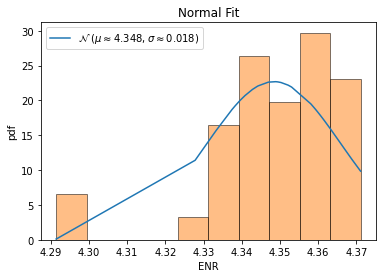


QQ plot 



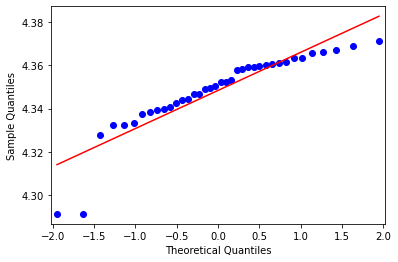


 Shapiro-Wilk Test 
 
Statistics=21.952, p=0.000017
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  EOG
feature values=  [2.69354756 2.69357205 2.68298936 2.66530768 2.66866424 2.66633745
 2.67303111 2.67645997 2.66830251 2.66785696 2.67381477 2.66915741
 2.65415961 2.66918701 2.66887262 2.64862943 2.6543392  2.65540641
 2.65197441 2.65293479 2.64813384 2.64535615 2.6577805  2.65330507
 2.65032886 2.65191199 2.64711505 2.63792839 2.63942613 2.64042539
 2.64208637 2.62988834 2.64322799 2.63813783 2.64500341 2.62624238
 2.62864377 2.63930083]
max value =  2.6935720542396844 min value =  2.626242378206084
mean=  2.655757548787496 standard deviation=  0.01651728250392906
left range=  2.6516282281615133 right range=  2.688792113795354
data covered within this range=  52.63 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviat

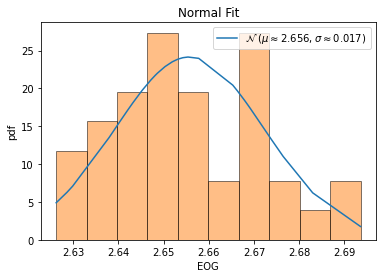


QQ plot 



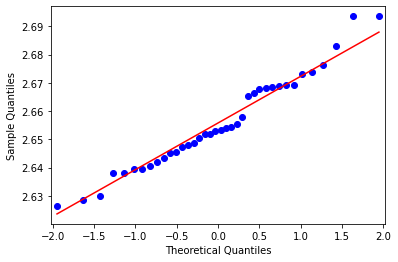


 Shapiro-Wilk Test 
 
Statistics=1.273, p=0.529239
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  CYC
feature values=  [11157373 11157267 13471484 13556391 13720797 13845326 13955501 14091587
 14144087 14261368 14402924 14511226 14561915 14764446 14888527 14926566
 15067930 15227548 15353775 15497101 15612204 15721701 15877574 15974983
 16092659 16216133 16307652 16385288 16468894 16569803 16662142 16715172
 16912078 16989928 17120049 17157360 17290870 17458028]
max value =  17458028 min value =  11157267
mean=  15265675.184210526 standard deviation=  1504582.4801957493
left range=  14889529.56416159 right range=  18274840.144602023
data covered within this range=  60.53 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.6230446773363236
skewness value=  -0.834

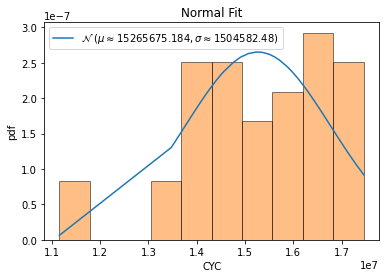


QQ plot 



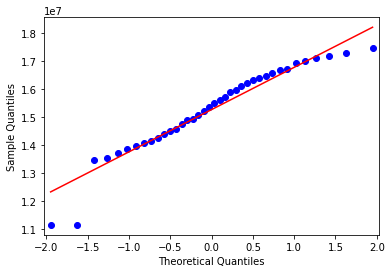


 Shapiro-Wilk Test 
 
Statistics=6.366, p=0.041455
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  HGCI
feature values=  [ 3  4 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19]
max value =  19 min value =  3
mean=  18.18421052631579 standard deviation=  3.463001916180259
left range=  17.318460047270726 right range=  25.11021435867631
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  94.74 %



normality test :----

kurtosis value=  14.136538929939725
skewness value=  -4.014302947176283


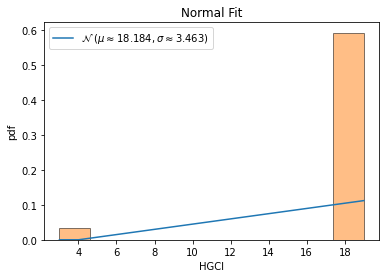


QQ plot 



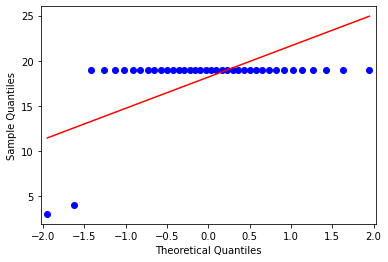


 Shapiro-Wilk Test 
 
Statistics=62.134, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IHR
feature values=  [2585886 2585887 4134478 4158956 4208120 4247177 4281154 4322327 4339650
 4374998 4418929 4451530 4464236 4528375 4566791 4576602 4619366 4667864
 4708141 4751095 4785627 4818864 4867901 4898969 4933366 4972119 4997797
 5021787 5047356 5077980 5106103 5121015 5182472 5206067 5246766 5256051
 5297062 5349324]
max value =  5349324 min value =  2585886
mean=  4636268.105263158 standard deviation=  597306.7250454894
left range=  4486941.424001785 right range=  5830881.555354137
data covered within this range=  65.79 %
data covered within 1 standard deviation=  84.21 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  94.74 %



normality test :----

kurtosis value=  4.594092811867142
skewness value=  -1.9396241395522724


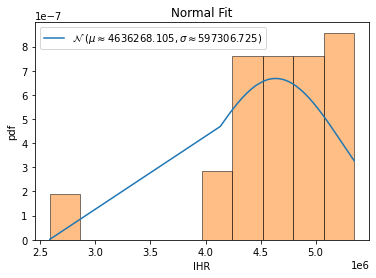


QQ plot 



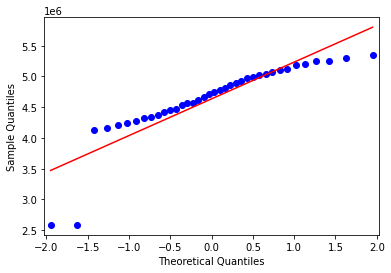


 Shapiro-Wilk Test 
 
Statistics=28.497, p=0.000001
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IIR
feature values=  [1756393 1756394 2107191 2130701 2152618 2173684 2185415 2203278 2216097
 2234280 2251540 2270630 2286824 2308982 2327659 2344883 2362652 2385019
 2407080 2427538 2447170 2465233 2480874 2498525 2517462 2535416 2551697
 2569460 2580794 2595201 2607990 2623836 2644587 2659593 2675035 2692514
 2710574 2727959]
max value =  2727959 min value =  1756393
mean=  2391388.8947368423 standard deviation=  233739.206442924
left range=  2332954.093126111 right range=  2858867.30762269
data covered within this range=  60.53 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.5715862239923855
skewness value=  -0.8167046597039698


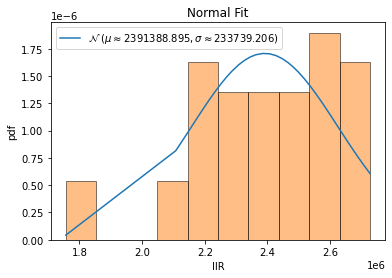


QQ plot 



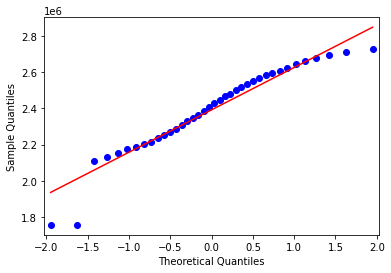


 Shapiro-Wilk Test 
 
Statistics=6.066, p=0.048169
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ITR
feature values=  [     0 414560 496917 502453 507846 512517 514908 519545 522621 525904
 530909 535078 539017 543935 548274 551640 556732 562419 567607 572500
 577471 581271 584249 589036 593266 597251 601790 606258 608454 611607
 615434 618567 623764 626962 629956 634853 638558 642900]
max value =  642900 min value =  0
mean=  552816.552631579 standard deviation=  103372.70828432764
left range=  526973.375560497 right range=  759561.9692002343
data covered within this range=  73.68 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  97.37 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  18.691819007924295
skewness value=  -3.9929638741283764


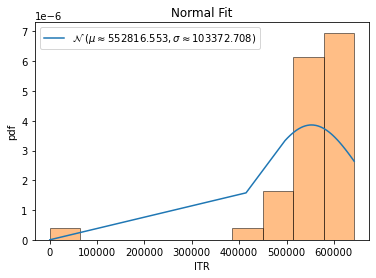


QQ plot 



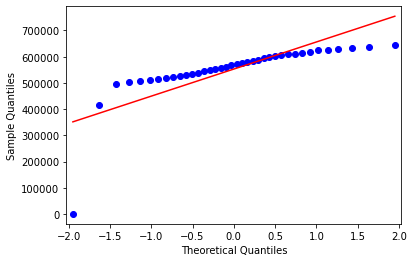


 Shapiro-Wilk Test 
 
Statistics=65.402, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  IND
feature values=  [1028838 1028840 1243007 1246290 1262419 1273845 1285917 1299721 1302420
 1313682 1328560 1337350 1337873 1361767 1373318 1370862 1385689 1400718
 1412269 1425932 1435294 1444632 1463159 1471519 1481320 1493498 1500737
 1505280 1513564 1523290 1532577 1533731 1556388 1562167 1577159 1574617
 1587451 1607167]
max value =  1607167 min value =  1028838
mean=  1404812.2894736843 standard deviation=  137449.99975721468
left range=  1370449.7895343807 right range=  1679712.2889881136
data covered within this range=  63.16 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.6427678878527092
skewness value=  -0.8404763787747284


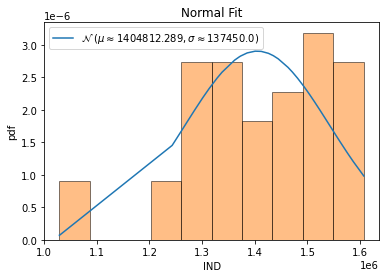


QQ plot 



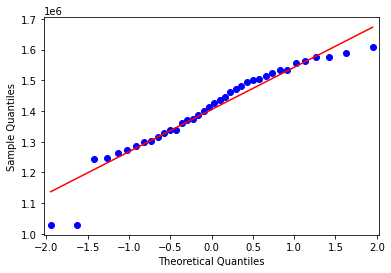


 Shapiro-Wilk Test 
 
Statistics=6.481, p=0.039149
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tNOC
feature values=  [127 143 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122
 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122
 122 122]
max value =  143 min value =  122
mean=  122.6842105263158 standard deviation=  3.434386968647463
left range=  121.82561378415393 right range=  129.55298446361073
data covered within this range=  97.37 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  97.37 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  29.289250681887232
skewness value=  5.4918867378123295


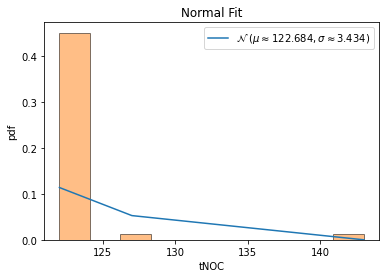


QQ plot 



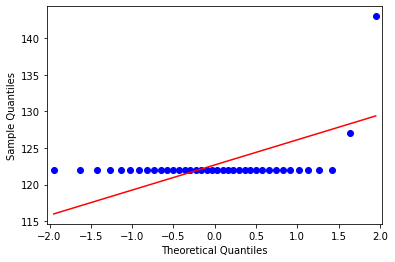


 Shapiro-Wilk Test 
 
Statistics=83.537, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aCID
feature values=  [ 9243.5         8634.35329341  9986.62068966 10040.34482759
 10158.43678161 10252.64367816 10337.20114943 10444.35057471
 10475.06896552 10562.7183908  10672.77586207 10746.44827586
 10774.23563218 10939.17241379 11030.33333333 11038.45402299
 11144.9137931  11264.54022989 11356.68965517 11462.92528736
 11543.72988506 11620.47126437 11746.61494253 11819.08045977
 11901.0862069  11994.26436782 12057.13218391 12106.13793103
 12167.72413793 12243.29885057 12314.48275862 12343.04597701
 12500.91954023 12552.29885057 12656.57471264 12667.31034483
 12763.42528736 12899.17241379]
max value =  12899.172413793103 min value =  8634.353293413174
mean=  11327.960446620371 standard deviation=  1014.1032277188999
left range=  11074.434639690646 right range=  13356.16690205817
data covered within this

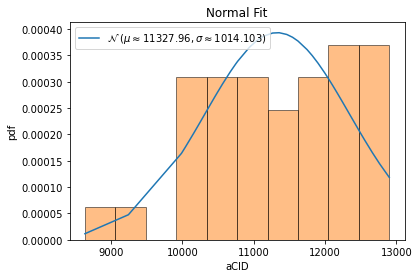


QQ plot 



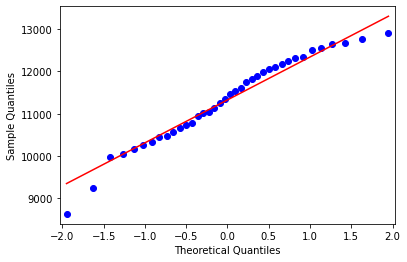


 Shapiro-Wilk Test 
 
Statistics=1.875, p=0.391629
Sample looks Gaussian (fail to reject H0)
ends normality test ------------------------------------------------

feature name=  mCID
feature values=  [394189 394192 472274 477325 482293 486951 489685 493708 496528 500536
 504550 508596 512432 517131 521187 525146 529092 533989 538892 543346
 547727 551593 555028 559013 563240 567092 570766 574469 577064 580437
 583321 587020 591624 594925 598272 602107 606040 610136]
max value =  610136 min value =  394189
mean=  535313.5789473684 standard deviation=  51869.51650086244
left range=  522346.1998221528 right range=  639052.6119490933
data covered within this range=  60.53 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.5885266756235037
skewness value=  -0.8214576120878961


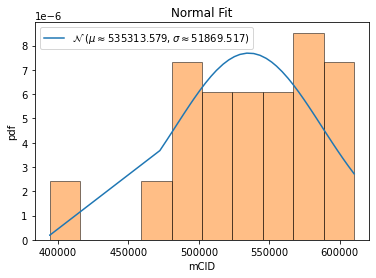


QQ plot 



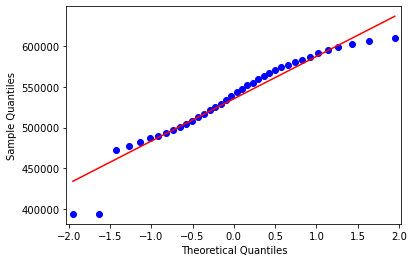


 Shapiro-Wilk Test 
 
Statistics=6.155, p=0.046070
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tCID
feature values=  [1441986 1441937 1737672 1747020 1767568 1783960 1798673 1817317 1822662
 1837913 1857063 1869882 1874717 1903416 1919278 1920691 1939215 1960030
 1976064 1994549 2008609 2021962 2043911 2056520 2070789 2087002 2097941
 2106468 2117184 2130334 2142720 2147690 2175160 2184100 2202244 2204112
 2220836 2244456]
max value =  2244456 min value =  1441937
mean=  1965096.0789473683 standard deviation=  191290.54777214545
left range=  1917273.4420043319 right range=  2347677.1744916593
data covered within this range=  63.16 %
data covered within 1 standard deviation=  71.05 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  0.6390846098519081
skewness value=  -0.8401633877247064


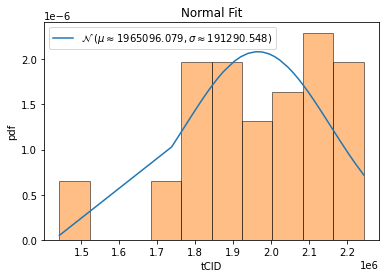


QQ plot 



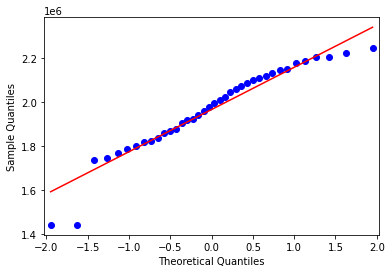


 Shapiro-Wilk Test 
 
Statistics=6.468, p=0.039394
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aCOD
feature values=  [15.00641026 13.76047904 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241 13.15517241
 13.15517241 13.15517241]
max value =  15.006410256410255 min value =  13.155172413793109
mean=  13.219818320917847 standard deviation=  0.30927215566655447
left range=  13.142500282001208 right range=  13.838362632250956
data covered within this range=  97.37 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  97.3

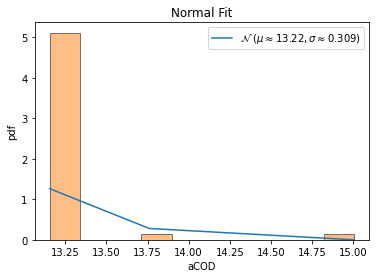


QQ plot 



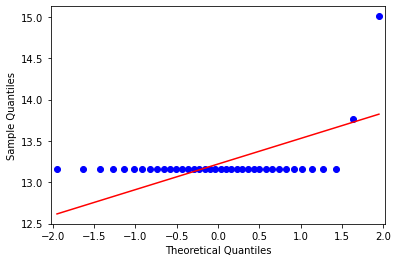


 Shapiro-Wilk Test 
 
Statistics=80.074, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  aNOP
feature values=  [1.02564103 1.10179641 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287 0.99425287
 0.99425287 0.99425287]
max value =  1.1017964071856288 min value =  0.9942528735632185
mean=  0.9979089705553296 standard deviation=  0.017802187917468376
left range=  0.9934584235759625 right range=  1.0335133463902664
data covered within this range=  97.37 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  97.37 %
data covered within 3 standard d

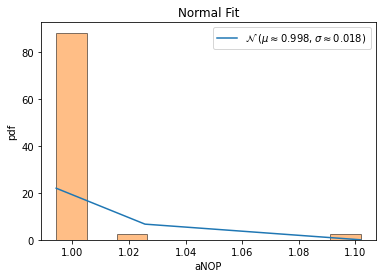


QQ plot 



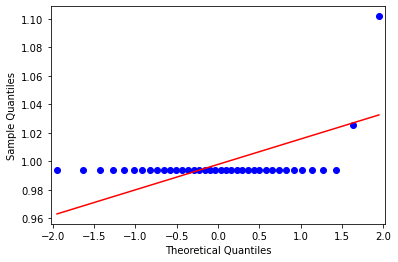


 Shapiro-Wilk Test 
 
Statistics=81.505, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  tNOP
feature values=  [160 184 173 173 173 173 173 173 173 173 173 173 173 173 173 173 173 173
 173 173 173 173 173 173 173 173 173 173 173 173 173 173 173 173 173 173
 173 173]
max value =  184 min value =  160
mean=  172.94736842105263 standard deviation=  2.762029844926722
left range=  172.25686095982095 right range=  178.47142811090606
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  94.74 %



normality test :----

kurtosis value=  16.454442973025554
skewness value=  -1.024383342626821


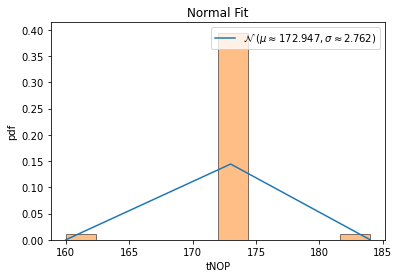


QQ plot 



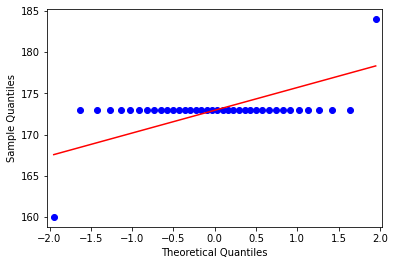


 Shapiro-Wilk Test 
 
Statistics=32.332, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  NEGP
feature values=  [0.0417 0.0312 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303
 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303
 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303
 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303 0.0303]
max value =  0.0417 min value =  0.0303
mean=  0.030623684210526313 standard deviation=  0.0018266210119588682
left range=  0.030167028957536597 right range=  0.03427692623444405
data covered within this range=  97.37 %
data covered within 1 standard deviation=  97.37 %
data covered within 2 standard deviation=  97.37 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  32.58102939940601
skewness value=  5.863108272549204


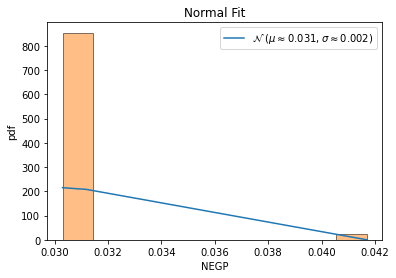


QQ plot 



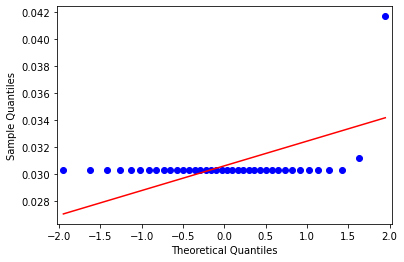


 Shapiro-Wilk Test 
 
Statistics=87.665, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  MNCAR
feature values=  [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
max value =  1 min value =  0
mean=  0.9473684210526315 standard deviation=  0.22329687826943603
left range=  0.8915442014852725 right range=  1.3939621775915036
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  94.74 %



normality test :----

kurtosis value=  14.055555555555557
skewness value=  -4.00693842672377


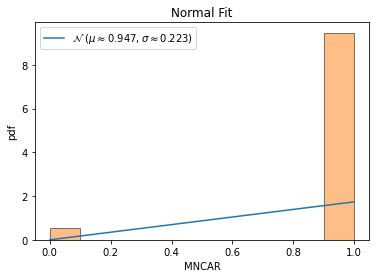


QQ plot 



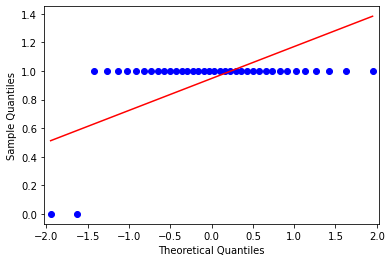


 Shapiro-Wilk Test 
 
Statistics=61.997, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  DTPP
feature values=  [0.1237 0.1188 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262
 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262
 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262
 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262 0.1262]
max value =  0.1262 min value =  0.1188
mean=  0.12593947368421052 standard deviation=  0.0012400211105342677
left range=  0.12562946840657696 right range=  0.12841951590527906
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  97.37 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  26.199573304855935
skewness value=  -5.16881707213293


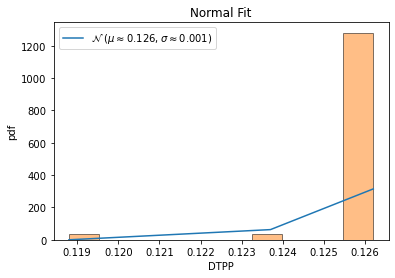


QQ plot 



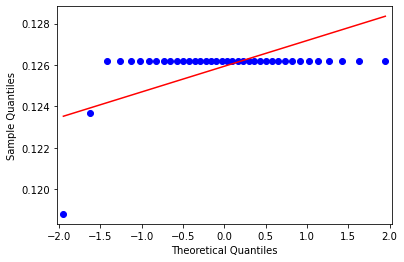


 Shapiro-Wilk Test 
 
Statistics=79.619, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  SUBP
feature values=  [51 53 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65]
max value =  65 min value =  51
mean=  64.3157894736842 standard deviation=  2.9119107776048536
left range=  63.587811779282994 right range=  70.13961102889391
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  94.74 %



normality test :----

kurtosis value=  14.511420991083902
skewness value=  -4.04844723546062


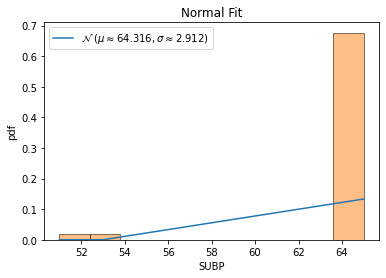


QQ plot 



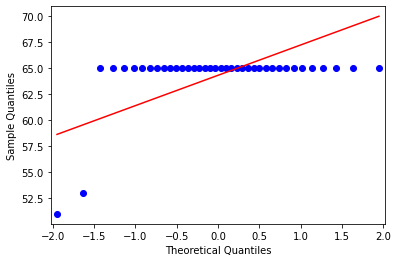


 Shapiro-Wilk Test 
 
Statistics=62.765, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  DOMN
feature values=  [73 70 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68
 68 68 68 68 68 68 68 68 68 68 68 68 68 68]
max value =  73 min value =  68
mean=  68.1842105263158 standard deviation=  0.8539463547151556
left range=  67.970723937637 right range=  69.8921032357461
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  24.157320151622
skewness value=  4.963328821304923


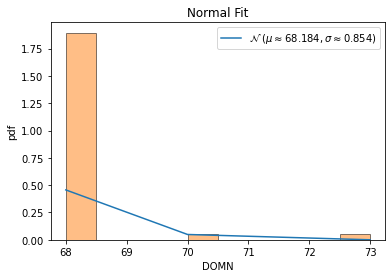


QQ plot 



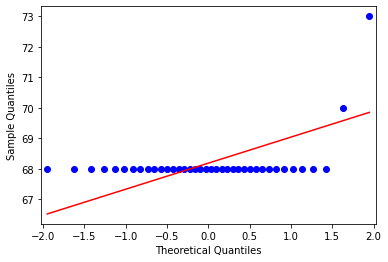


 Shapiro-Wilk Test 
 
Statistics=76.951, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  ELPROP
feature values=  [0.83408072 0.83898305 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194 0.84274194
 0.84274194 0.84274194]
max value =  0.842741935483871 min value =  0.8340807174887892
mean=  0.8424150906777792 standard deviation=  0.0014963681016307083
left range=  0.8420409986523715 right range=  0.8454078268810407
data covered within this range=  94.74 %
data covered within 1 standard deviation=  94.74 %
data covered within 2 standard deviation=  94.74 %
data covered within 3 standard

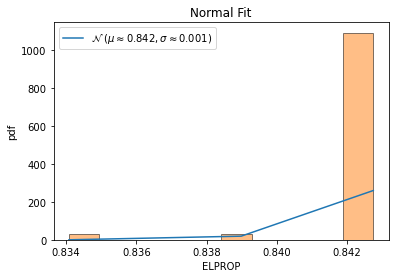


QQ plot 



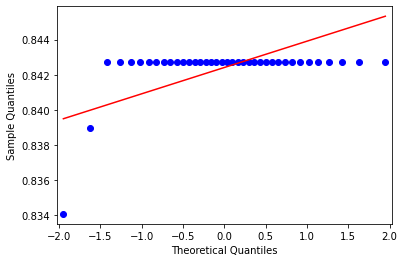


 Shapiro-Wilk Test 
 
Statistics=75.477, p=0.000000
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------

feature name=  CAL_TIME
feature values=  [2006430 3032880 3957950 3680630 2744200 3800700 3553070 4104490 3702180
 4504660 4036110 3659900 3974240 5657230 4013030 4048670 4186030 4222040
 3705160 3910110 4370340 4610060 4235860 4311750 4359880 4549060 4221670
 4089820 4546590 3858450 4621650 4566490 4631060 4568210 4592430 4423680
 4570970 4439120]
max value =  5657230 min value =  2006430
mean=  4107021.052631579 standard deviation=  601344.3866510992
left range=  3956684.955968804 right range=  5309709.825933777
data covered within this range=  68.42 %
data covered within 1 standard deviation=  89.47 %
data covered within 2 standard deviation=  92.11 %
data covered within 3 standard deviation=  97.37 %



normality test :----

kurtosis value=  3.1975748003951665
skewness value=  -1.049553768842086


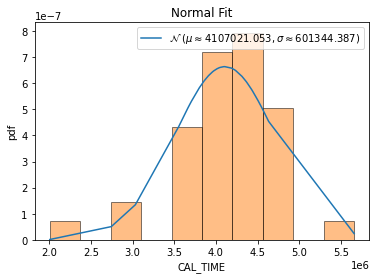


QQ plot 



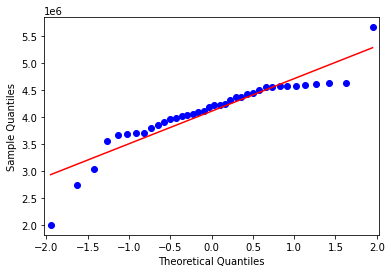


 Shapiro-Wilk Test 
 
Statistics=15.334, p=0.000468
Sample does not look Gaussian (reject H0)
ends normality test ------------------------------------------------



In [77]:
#after medium time and memory clusering ,
#collect the medium ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

medium_zero_features.append('file')
medium_zero_features.append('label_mem')


#print(medium_zero_features)
print(df_medium_time_mem_feature_df.shape)
medium_time_mem_medium = df_medium_time_mem_feature_df[df_medium_time_mem_feature_df['label_mem']== 'medium']
print(medium_time_mem_medium.shape)
prior_medium= round(medium_time_mem_medium.shape[0] / df_medium_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in medium_zero_features:
    if cols_list[i] in top_n_2:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(medium_time_mem_medium[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_medium) *gamma * std) 
        #ry= mean + ((1- prior_medium) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / medium_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break

In [78]:
medium_time_mem_medium

file  size_kb  consistency_time_milsecs  consistency_size_kb  \
3   OWL2QL-200.owl  1108752                    500321             85606796   
4   OWL2RL-200.owl  1108754                    556153             88531188   
19  OWL2DL-238.owl  1280275                    701110             82947772   
20  OWL2DL-240.owl  1289274                    792833             82944380   
21  OWL2DL-242.owl  1304585                    688112             82949124   
22  OWL2DL-244.owl  1316584                    750405             82957488   
23  OWL2DL-246.owl  1326649                    686813             82952608   
24  OWL2DL-248.owl  1339337                    693132             82954196   
25  OWL2DL-250.owl  1344931                    700017             82938864   
26  OWL2DL-252.owl  1356079                    712149             82946516   
27  OWL2DL-254.owl  1369191                    753754             82950024   
28  OWL2DL-256.owl  1379552                    749855             82944880   
29  OWL2DL-258.owl  1385003                    729737             82939728   
30  OWL2DL-260.owl  1403798                    720094             82939228   
31  OWL2DL-262.owl  1415476                    729087             82947212   
32  OWL2DL-264.owl  1419863                    787037             82943964   
33  OWL2DL-266.owl  1432951                    753514             82948884   
34  OWL2DL-268.owl  1447849                    742266             82944000   
35  OWL2DL-270.owl  1460329                    752861             82947708   
36  OWL2DL-272.owl  1473726                    748409             82947560   
37  OWL2DL-274.owl  1484776                    762217             82946572   
38  OWL2DL-276.owl  1495150                    763726             82945876   
39  OWL2DL-278.owl  1509333                    789109             82943428   
40  OWL2DL-280.owl  1519077                    765729             82937196   
41  OWL2DL-282.owl  1530230                    791575             82943528   
42  OWL2DL-284.owl  1541870                    783217             82942660   
43  OWL2DL-286.owl  1550733                    817229             82940112   
44  OWL2DL-288.owl  1558464                    813840             82943796   
45  OWL2DL-290.owl  1566422                    863327             82938704   
46  OWL2DL-292.owl  1575910                    797433             82943212   
47  OWL2DL-294.owl  1584616                    803980             82938896   
48  OWL2DL-296.owl  1590182                    816773             82942488   
49  OWL2DL-298.owl  1608184                    822418             82939492   
50  OWL2DL-300.owl  1615868                    847352             82943572   
51  OWL2DL-302.owl  1628006                    845905             82892052   
52  OWL2DL-304.owl  1632306                    851275             82894144   
53  OWL2DL-306.owl  1644678                    898338             82886588   
54  OWL2DL-308.owl  1660138                    837572             82889948   

    realisation_time_milsecs  realisation_size_kb  \
3                     506705             86797824   
4                     549992             89854124   
19                    720911             82942016   
20                    649579             82947080   
21                    701174             82948968   
22                    668309             82954744   
23                    693671             82956704   
24                    734502             82950808   
25                    703245             82951144   
26                    691194             82949716   
27                    719535             82946256   
28                    740512             82929760   
29                    733878             82934688   
30                    776682             82939396   
31                    751978             82945132   
32                    718713             82946444   
33                    737844             82948400   
34               

In [79]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
medium_time_medium_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(medium_time_medium_mem_table.shape)
#medium_time_medium_mem_table.to_csv('medium_time_medium_mem_table.csv',index=False)
#medium_time_mem_medium.to_csv('medium_time_mem_medium.csv',index=False)

(30, 13)


(55, 101)
(3, 101)
feature name=  size_kb
feature values=  [ 543811 1108757 1108750]
max value =  1108757 min value =  543811
mean=  920439.3333333334 standard deviation=  266316.4485023201
left range=  853860.2212077533 right range=  1453072.2303379737
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5
skewness value=  -0.7071067808201555


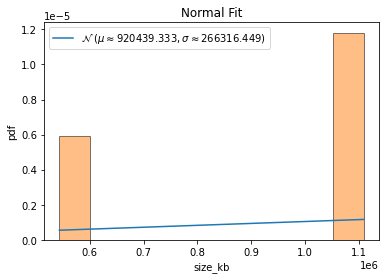


QQ plot 



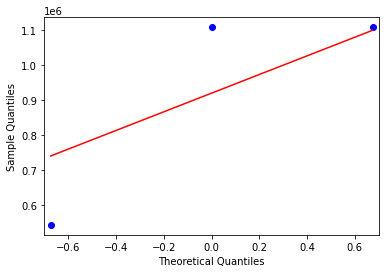

feature name=  consistency_time_milsecs
feature values=  [673449 616636 605649]
max value =  673449 min value =  605649
mean=  631911.3333333334 standard deviation=  29712.083471581427
left range=  624483.312465438 right range=  691335.5002764962
data covered within this range=  33.33 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.500000000000003
skewness value=  0.6352823400932962


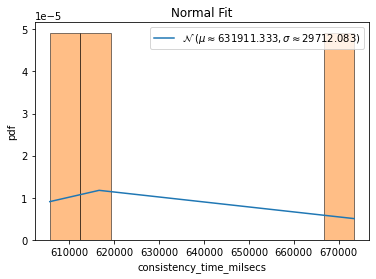


QQ plot 



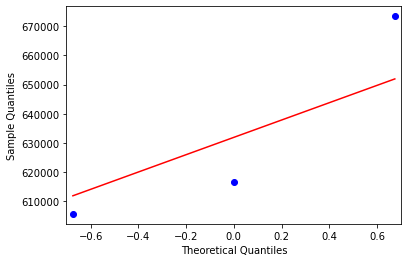

feature name=  consistency_size_kb
feature values=  [128672792 128837964 106586272]
max value =  128837964 min value =  106586272
mean=  121365676.0 standard deviation=  10450834.333321845
left range=  118752967.41666953 right range=  142267344.66664368
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000002
skewness value=  -0.7069743135888936


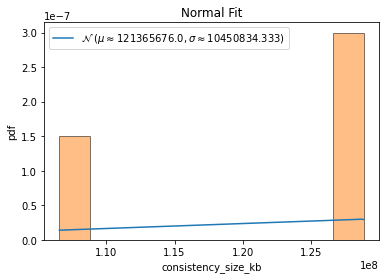


QQ plot 



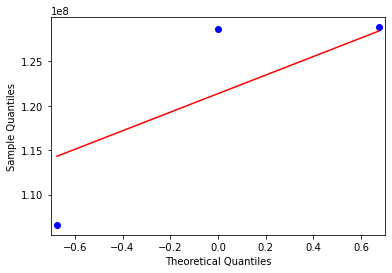

feature name=  realisation_time_milsecs
feature values=  [704093 628923 607356]
max value =  704093 min value =  607356
mean=  646790.6666666666 standard deviation=  41464.45808427047
left range=  636424.552145599 right range=  729719.5828352076
data covered within this range=  33.33 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.499999999999998
skewness value=  0.5663570895564022


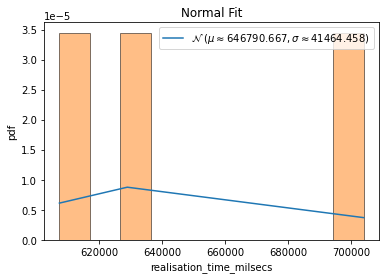


QQ plot 



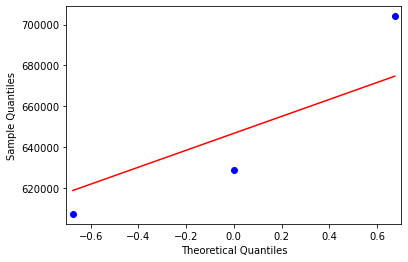

feature name=  realisation_size_kb
feature values=  [128793224 128842096 108235012]
max value =  128842096 min value =  108235012
mean=  121956777.33333333 standard deviation=  9702773.830728246
left range=  119531083.87565127 right range=  141362324.9947898
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000013
skewness value=  -0.7070933264899687


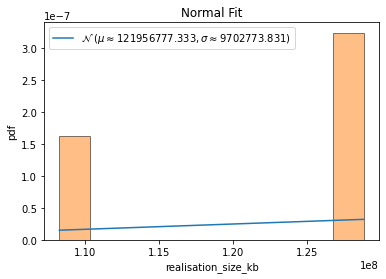


QQ plot 



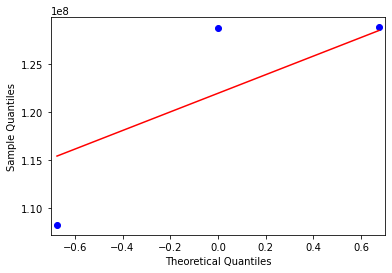

feature name=  classification_time_milsecs
feature values=  [690983 642479 591436]
max value =  690983 min value =  591436
mean=  641632.6666666666 standard deviation=  40644.29859429514
left range=  631471.5920180929 right range=  722921.263855257
data covered within this range=  66.67 %
data covered within 1 standard deviation=  33.33 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999998
skewness value=  -0.03122536440613792


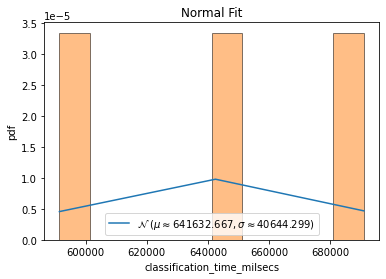


QQ plot 



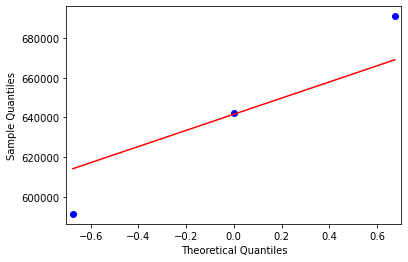

feature name=  classification_size_kb
feature values=  [128832840 128838868 107000568]
max value =  128838868 min value =  107000568
mean=  121557425.33333333 standard deviation=  10293252.82734476
left range=  118984112.12649713 right range=  142143930.98802286
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000013
skewness value=  -0.7071065993054922


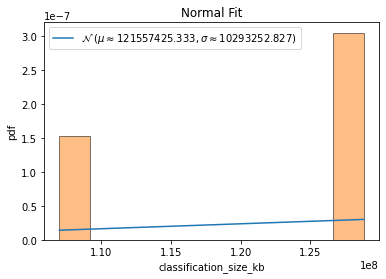


QQ plot 



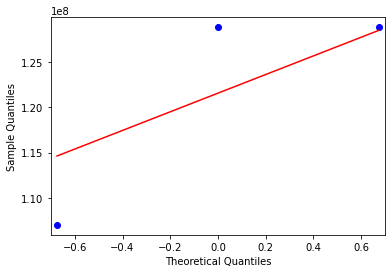

feature name=  SOV
feature values=  [1757531 3389780 3389774]
max value =  3389780 min value =  1757531
mean=  2845695.0 standard deviation=  769448.1434469773
left range=  2653332.9641382555 right range=  4384591.2868939545
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5
skewness value=  -0.7071067811543005


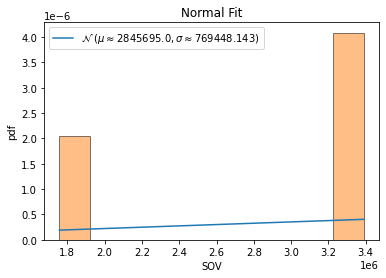


QQ plot 



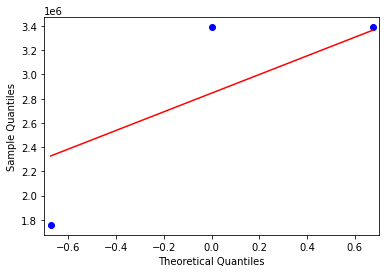

feature name=  ENR
feature values=  [4.1147461  4.29143009 4.29140062]
max value =  4.291430088573893 min value =  4.114746104862607
mean=  4.232525605729793 standard deviation=  0.08328268461665765
left range=  4.211704934575629 right range=  4.399090974963109
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999796
skewness value=  -0.7071067148054692


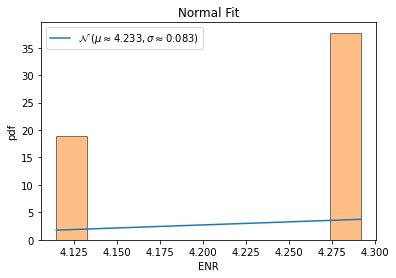


QQ plot 



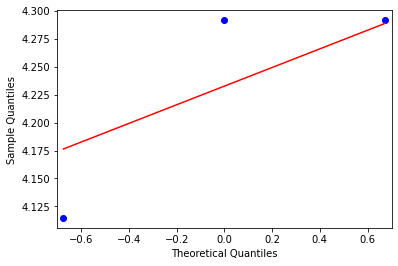

feature name=  EOG
feature values=  [2.76596571 2.69358529 2.69351819]
max value =  2.7659657132107784 min value =  2.693518193515438
mean=  2.717689733513884 standard deviation=  0.03413628360346019
left range=  2.7091556626130187 right range=  2.7859623007208043
data covered within this range=  33.33 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000002
skewness value=  0.7071047320891735


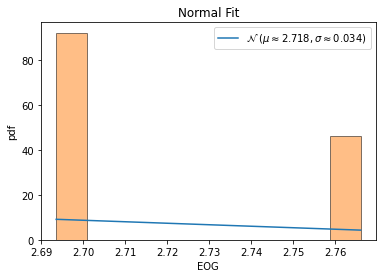


QQ plot 



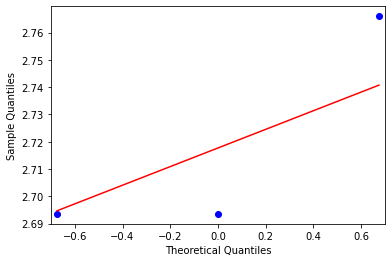

feature name=  CYC
feature values=  [ 5474417 11157388 11157213]
max value =  11157388 min value =  5474417
mean=  9263006.0 standard deviation=  2678936.973981409
left range=  8593271.756504647 right range=  14620879.947962817
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999998
skewness value=  -0.7071067789234807


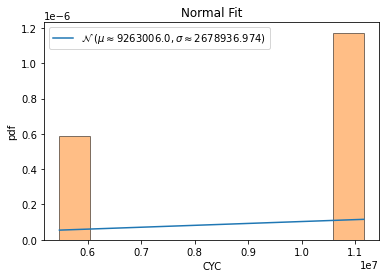


QQ plot 



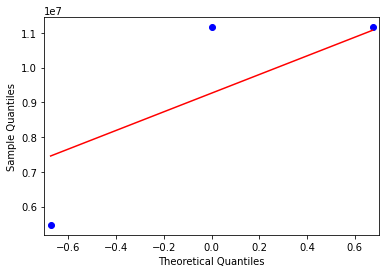

feature name=  HGCI
feature values=  [19 19 17]
max value =  19 min value =  17
mean=  18.333333333333332 standard deviation=  0.9428090415820634
left range=  18.097631072937816 right range=  20.218951416497458
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000036
skewness value=  -0.7071067811865438


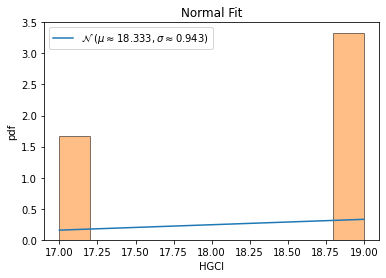


QQ plot 



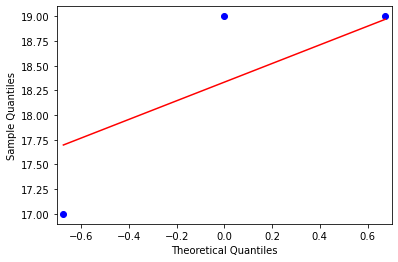

feature name=  IHR
feature values=  [1705199 3430272 2890970]
max value =  3430272 min value =  1705199
mean=  2675480.3333333335 standard deviation=  720553.5192532351
left range=  2495341.9535200247 right range=  4116587.3718398036
data covered within this range=  66.67 %
data covered within 1 standard deviation=  33.33 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999996
skewness value=  -0.42184459734820773


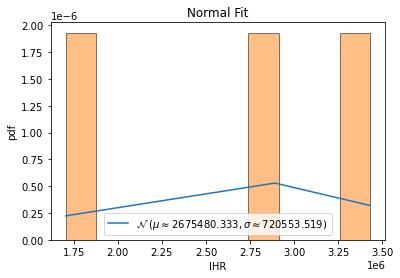


QQ plot 



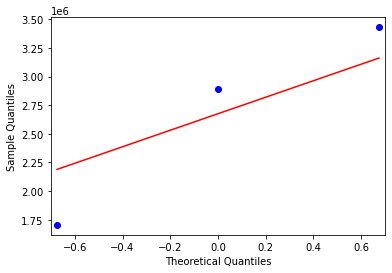

feature name=  IIR
feature values=  [ 867968 1756394       0]
max value =  1756394 min value =  0
mean=  874787.3333333334 standard deviation=  717061.0612257663
left range=  695522.0680268918 right range=  2308909.455784866
data covered within this range=  66.67 %
data covered within 1 standard deviation=  33.33 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999993
skewness value=  0.014264312757937547


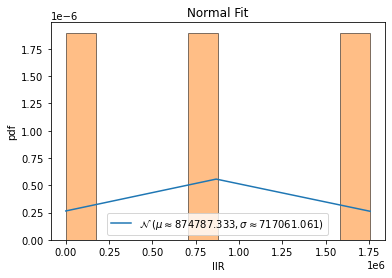


QQ plot 



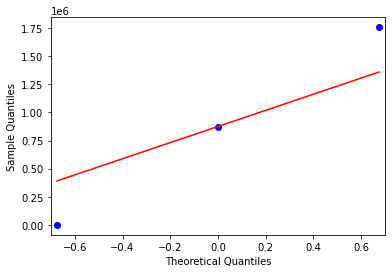

feature name=  ITR
feature values=  [204650 414560 414560]
max value =  414560 min value =  204650
mean=  344590.0 standard deviation=  98952.52295924546
left range=  319851.86926018866 right range=  542495.045918491
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5
skewness value=  -0.7071067811865476


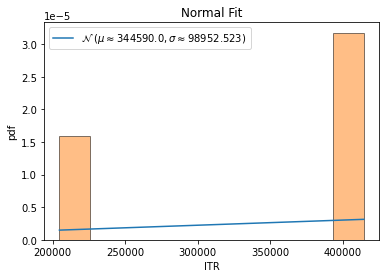


QQ plot 



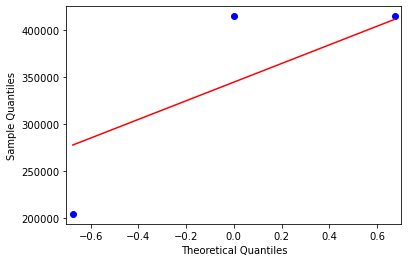

feature name=  IND
feature values=  [ 513094 1028838 1028838]
max value =  1028838 min value =  513094
mean=  856923.3333333334 standard deviation=  243124.05317084986
left range=  796142.3200406209 right range=  1343171.439675033
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999998
skewness value=  -0.707106781186548


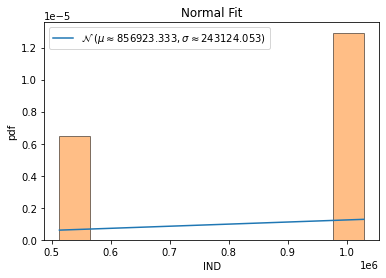


QQ plot 



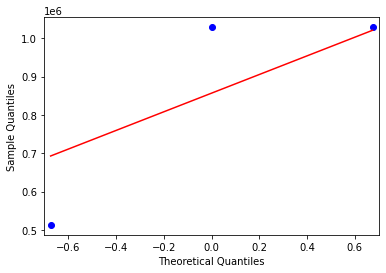

feature name=  tNOC
feature values=  [122 122 121]
max value =  122 min value =  121
mean=  121.66666666666667 standard deviation=  0.4714045207910317
left range=  121.54881553646891 right range=  122.60947570824874
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999716
skewness value=  -0.7071067811865777


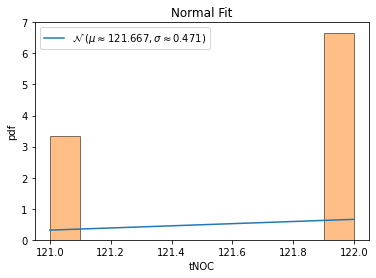


QQ plot 



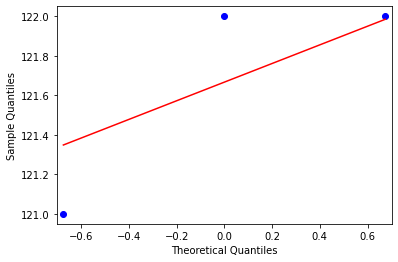

feature name=  aCID
feature values=  [4129.38505747 8287.35057471 9125.81012658]
max value =  9125.81012658228 min value =  4129.385057471264
mean=  7180.848586255396 standard deviation=  2184.693091436436
left range=  6634.6753133962875 right range=  11550.234769128268
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000002
skewness value=  -0.629796284757159


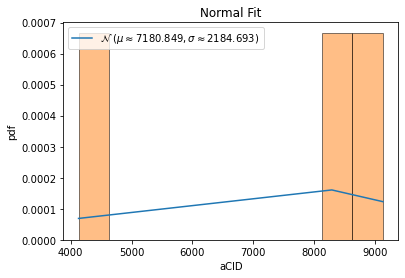


QQ plot 



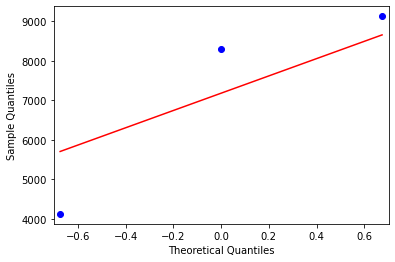

feature name=  mCID
feature values=  [196042 394192 394189]
max value =  394192 min value =  196042
mean=  328141.0 standard deviation=  93408.09869599102
left range=  304788.9753260022 right range=  514957.1973919821
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999998
skewness value=  -0.7071067806395067


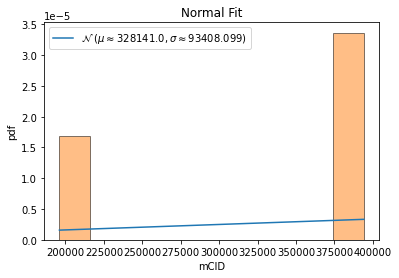


QQ plot 



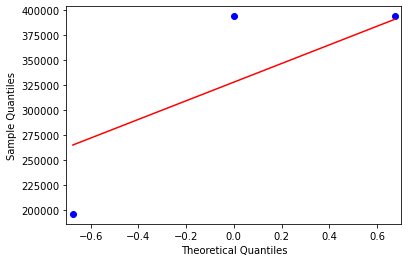

feature name=  tCID
feature values=  [ 718513 1441999 1441878]
max value =  1441999 min value =  718513
mean=  1200796.6666666667 standard deviation=  341026.0547331961
left range=  1115540.1529833677 right range=  1882848.776133059
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.499999999999999
skewness value=  -0.7071067144226203


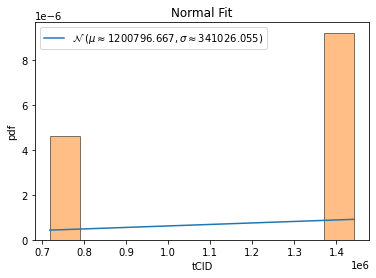


QQ plot 



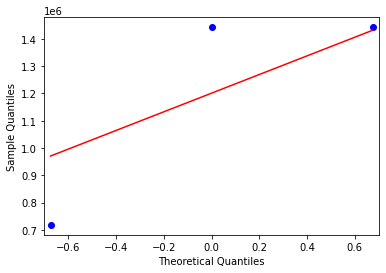

feature name=  aCOD
feature values=  [13.16091954 13.15517241 13.65189873]
max value =  13.651898734177214 min value =  13.155172413793109
mean=  13.322663562733403 standard deviation=  0.2328162450693637
left range=  13.264459501466062 right range=  13.78829605287213
data covered within this range=  33.33 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.500000000000007
skewness value=  0.7067836321769615


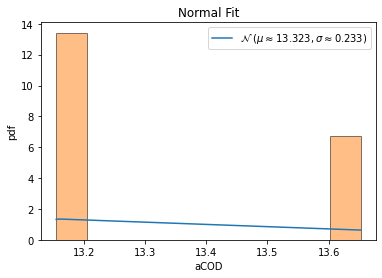


QQ plot 



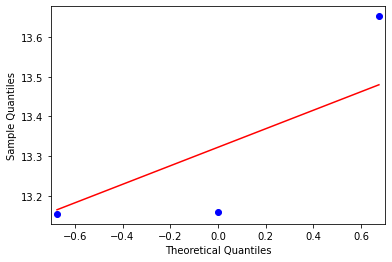

feature name=  aNOP
feature values=  [0.99425287 0.99425287 0.99367089]
max value =  0.9942528735632185 min value =  0.9936708860759492
mean=  0.9940588777341287 standard deviation=  0.0002743515325425285
left range=  0.993990289850993 right range=  0.9946075807992137
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5
skewness value=  -0.7071067811865476


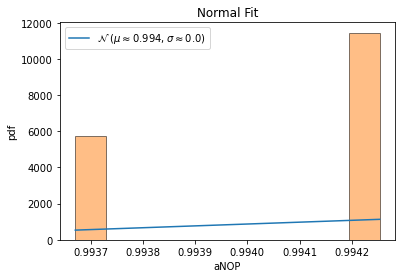


QQ plot 



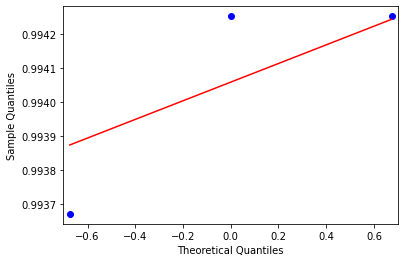

feature name=  tNOP
feature values=  [173 173 157]
max value =  173 min value =  157
mean=  167.66666666666666 standard deviation=  7.542472332656507
left range=  165.78104858350252 right range=  182.75161133197966
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000036
skewness value=  -0.7071067811865438


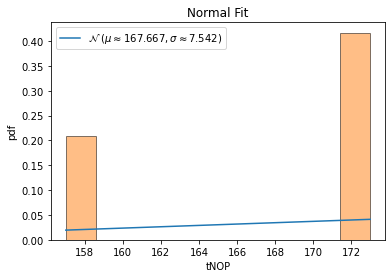


QQ plot 



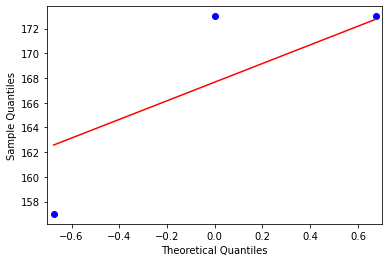

feature name=  NEGP
feature values=  [0.0303 0.0303 0.    ]
max value =  0.0303 min value =  0.0
mean=  0.0202 standard deviation=  0.01428355697996826
left range=  0.016629110755007934 right range=  0.04876711395993652
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999998
skewness value=  -0.7071067811865474


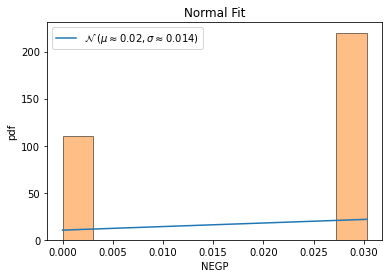


QQ plot 



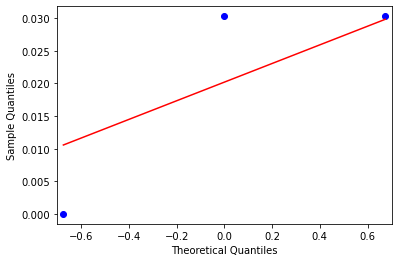

feature name=  MNCAR
feature values=  [1 1 0]
max value =  1 min value =  0
mean=  0.6666666666666666 standard deviation=  0.4714045207910317
left range=  0.5488155364689087 right range=  1.60947570824873
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5000000000000002
skewness value=  -0.7071067811865472


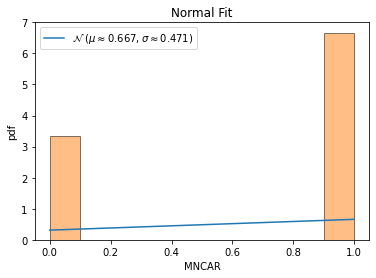


QQ plot 



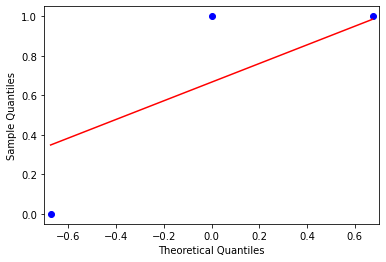

feature name=  DTPP
feature values=  [0.1262 0.1262 0.1224]
max value =  0.1262 min value =  0.1224
mean=  0.12493333333333334 standard deviation=  0.0017913371790059258
left range=  0.12448549903858186 right range=  0.1285160076913452
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999925
skewness value=  -0.7071067811865555


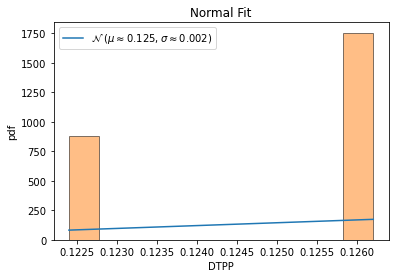


QQ plot 



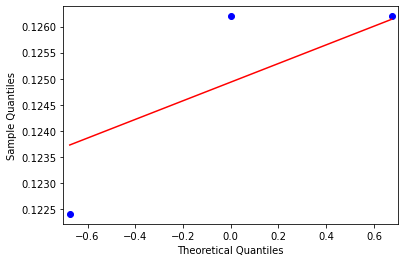

feature name=  SUBP
feature values=  [65 65 53]
max value =  65 min value =  53
mean=  61.0 standard deviation=  5.656854249492381
left range=  59.58578643762691 right range=  72.31370849898477
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.5
skewness value=  -0.7071067811865475


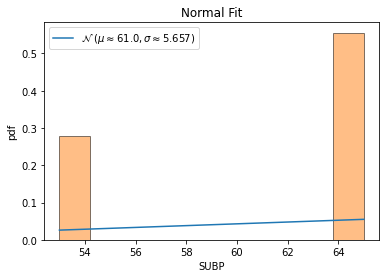


QQ plot 



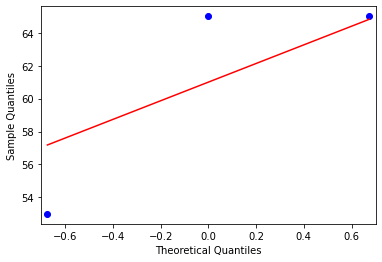

feature name=  DOMN
feature values=  [69 69 56]
max value =  69 min value =  56
mean=  64.66666666666667 standard deviation=  6.128258770283412
left range=  63.134601974095816 right range=  76.92318420723349
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.499999999999998
skewness value=  -0.7071067811865499


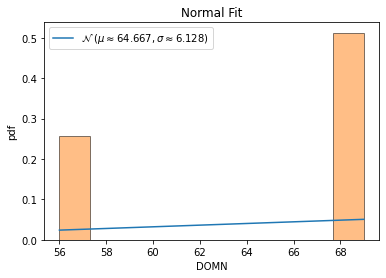


QQ plot 



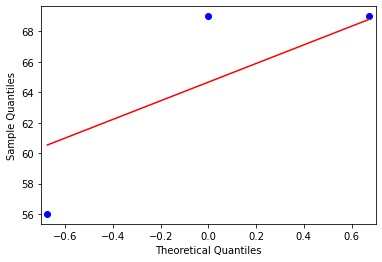

feature name=  ELPROP
feature values=  [0.84337349 0.84274194 0.95428571]
max value =  0.9542857142857144 min value =  0.842741935483871
mean=  0.8801337145818297 standard deviation=  0.05243401575056599
left range=  0.8670252106441881 right range=  0.9850017460829616
data covered within this range=  33.33 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.499999999999998
skewness value=  0.7070298428472512


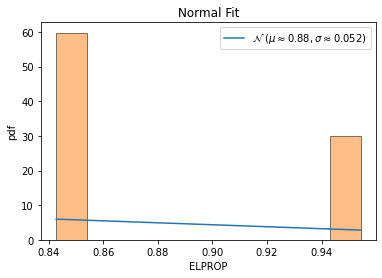


QQ plot 



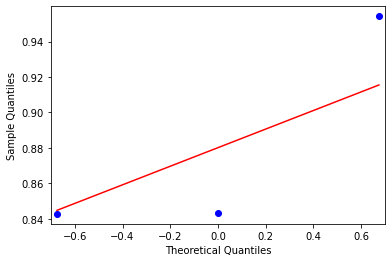

feature name=  CAL_TIME
feature values=  [1131430 3971860 3450510]
max value =  3971860 min value =  1131430
mean=  2851266.6666666665 standard deviation=  1234593.0707817138
left range=  2542618.398971238 right range=  5320452.808230095
data covered within this range=  66.67 %
data covered within 1 standard deviation=  66.67 %
data covered within 2 standard deviation=  7.89 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4999999999999996
skewness value=  -0.6137152908515714


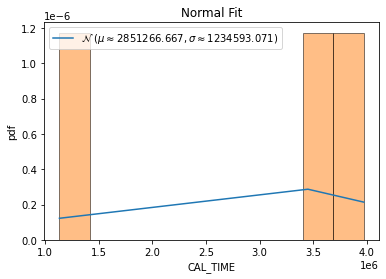


QQ plot 



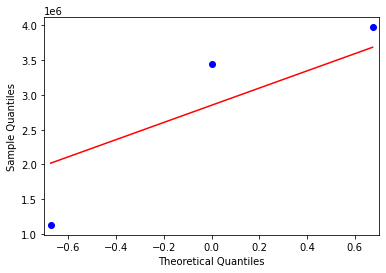

In [80]:
#after medium time and memory clusering ,
#collect the hard ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

medium_zero_features.append('file')
medium_zero_features.append('label_mem')


#print(medium_zero_features)
print(df_medium_time_mem_feature_df.shape)
medium_time_mem_hard = df_medium_time_mem_feature_df[df_medium_time_mem_feature_df['label_mem']== 'hard']
print(medium_time_mem_hard.shape)
prior_hard= round(medium_time_mem_hard.shape[0] / df_medium_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in medium_zero_features:
    if cols_list[i] in top_n_2:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(medium_time_mem_hard[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_hard) *gamma * std) 
        #ry= mean + ((1- prior_hard) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / medium_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / medium_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        ''''
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break
        '''

In [81]:
medium_time_mem_hard

file  size_kb  consistency_time_milsecs  consistency_size_kb  \
0  OWL2DL-100.owl   543811                    673449            128672792   
1  OWL2DL-200.owl  1108757                    616636            128837964   
2  OWL2EL-200.owl  1108750                    605649            106586272   

   realisation_time_milsecs  realisation_size_kb  classification_time_milsecs  \
0                    704093            128793224                       690983   
1                    628923            128842096                       642479   
2                    607356            108235012                       591436   

   classification_size_kb      SOV       ENR  ...  EQVP  DISP  INV  DOMN  \
0               128832840  1757531  4.114746  ...     5     2   22    69   
1               128838868  3389780  4.291430  ...     5     2   22    69   
2               107000568  3389774  4.291401  ...     4     0    0    56   

   RANG  CHN      CHNP    ELPROP  CAL_TIME  label_mem  
0    58    8  0.077670  0.843373   1131430       hard  
1    58    7  0.067961  0.842742   3971860       hard  
2    46    8  0.081633  0.954286   3450510       hard  

[3 rows x 101 columns]

In [82]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
medium_time_hard_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(medium_time_hard_mem_table.shape)
#medium_time_hard_mem_table.to_csv('medium_time_hard_mem_table.csv',index=False)
#medium_time_mem_hard.to_csv('medium_time_mem_hard.csv',index=False)

(30, 13)


In [83]:
# collect the hard ones
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
#df_medium_drop=df_medium.drop(['label'],axis=1)
df_hard_drop=df_hard # contains based on time
df_hard_drop

file size_kb  \
287  085abd30-44cb-4bc3-90b2-ba12067a2253_premises6...      64   
29   0805c492-a3fa-41e6-b667-9968da4d9e3f_iridlcfds...    1178   
48   0952091f-65b7-4abb-88d9-589ec5d8709e_onmapping...    1180   
117  107b3d41-1458-4d46-ae69-d1ba712085a2_EnzyO0616...    5547   
19   75714e9a-2962-4466-8377-5ceaad9662c7_VAST2009....   14328   
128  feaf1577-ec44-4912-9caa-a57a720af930_cfobj.owl...    1150   

    consistency_time_milsecs consistency_size_kb realisation_time_milsecs  \
287                 21600051             1352844                 21600273   
29                  21600095             1411176                 21600125   
48                  21600095             1423224                 21600073   
117                 21600449            17684888                 21600430   
19                  21600406             8128296                    92155   
128                 21600056             1387476                 21600107   

    realisation_size_kb classification_time_milsecs classification_size_kb  \
287             9697004                    21600477               18797388   
29              1431748                    21600094                1420944   
48              1391916                      656914                1097220   
117            17534216                    21600584               24260664   
19            113488448                    21600415                7870180   
128             1408484                    21600114                1394612   

    label_time  
287       hard  
29        hard  
48        hard  
117       hard  
19        hard  
128       hard

In [84]:
print(df_hard['consistency_time_milsecs'].max(),df_hard['consistency_time_milsecs'].min())

21600449 21600051


(6, 7)
KMeans(n_clusters=3, random_state=0)
[1 1 1 2 0 1]


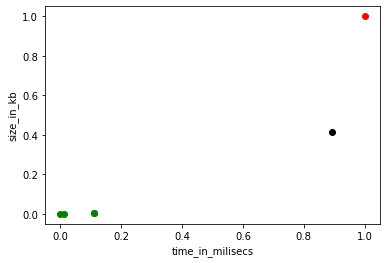

In [85]:
# now hard time ontologies clustered on memory
t=df_hard_drop.drop(['file','label_time'],axis=1)
#print(df_hard_drop.shape)
#print(t.columns)
scaler = MinMaxScaler()
scaler.fit(t)
t_df_scaled=scaler.transform(t)
#print(t_df_scaled)

t_MinMax = pd.DataFrame(data=t_df_scaled, columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])
t=t_MinMax

print(t.shape)
#t_np=np.array(t)
#print(t_np)
km_3 = KMeans(n_clusters=3,random_state=0)
print(km_3)
y_predicted_3=km_3.fit_predict(t[["consistency_size_kb"]])
print(y_predicted_3)
#print(type(t))
t['cluster']=y_predicted_3
#print(t)
t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()
#t_MinMax


In [86]:
label_col=[]
for i in range((y_predicted_3.shape[0])):
    if y_predicted_3[i]==0:
        label_col.append('medium')
    elif y_predicted_3[i]==1:
        label_col.append('easy')
    else:
        label_col.append('hard')
        
df_hard_drop['label_mem']=label_col
df_hard_time_mem=df_hard_drop # contains first based on time and now on memory
df_hard_time_mem

<ipython-input-86-860252c00422>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hard_drop['label_mem']=label_col


file size_kb  \
287  085abd30-44cb-4bc3-90b2-ba12067a2253_premises6...      64   
29   0805c492-a3fa-41e6-b667-9968da4d9e3f_iridlcfds...    1178   
48   0952091f-65b7-4abb-88d9-589ec5d8709e_onmapping...    1180   
117  107b3d41-1458-4d46-ae69-d1ba712085a2_EnzyO0616...    5547   
19   75714e9a-2962-4466-8377-5ceaad9662c7_VAST2009....   14328   
128  feaf1577-ec44-4912-9caa-a57a720af930_cfobj.owl...    1150   

    consistency_time_milsecs consistency_size_kb realisation_time_milsecs  \
287                 21600051             1352844                 21600273   
29                  21600095             1411176                 21600125   
48                  21600095             1423224                 21600073   
117                 21600449            17684888                 21600430   
19                  21600406             8128296                    92155   
128                 21600056             1387476                 21600107   

    realisation_size_kb classification_time_milsecs classification_size_kb  \
287             9697004                    21600477               18797388   
29              1431748                    21600094                1420944   
48              1391916                      656914                1097220   
117            17534216                    21600584               24260664   
19            113488448                    21600415                7870180   
128             1408484                    21600114                1394612   

    label_time label_mem  
287       hard      easy  
29        hard      easy  
48        hard      easy  
117       hard      hard  
19        hard    medium  
128       hard      easy

In [87]:
total_df= pd.read_csv('final_new_more.csv') # for features collection 
print("size of final_new_more= ",total_df.shape)

df_hard_time_mem_feature=[]
for i in range(df_hard_time_mem.shape[0]):
    ont=df_hard_time_mem.iloc[i,:]['file']
    lab=df_hard_time_mem.iloc[i,:]['label_mem']
    #print(ont,lab)
    o=(np.array(total_df[total_df['file']==ont]))
    #print(o.shape)
    if o.shape[0]!=0:
    
        u=list(np.array(total_df[total_df['file']==ont])[0])
        u.append(str(lab))
        #print(u)
        df_hard_time_mem_feature.append(u)

    #break

total_df_cols=list(total_df.columns)
total_df_cols.append('label_mem')
#print(total_df_cols)
df_hard_time_mem_feature_df=pd.DataFrame(data=df_hard_time_mem_feature,columns=total_df_cols)
df_hard_time_mem_feature_df

size of final_new_more=  (16398, 100)


file  size_kb  \
0  085abd30-44cb-4bc3-90b2-ba12067a2253_premises6...       64   
1  0805c492-a3fa-41e6-b667-9968da4d9e3f_iridlcfds...     1178   
2  0952091f-65b7-4abb-88d9-589ec5d8709e_onmapping...     1180   
3  107b3d41-1458-4d46-ae69-d1ba712085a2_EnzyO0616...     5547   
4  75714e9a-2962-4466-8377-5ceaad9662c7_VAST2009....    14328   
5  feaf1577-ec44-4912-9caa-a57a720af930_cfobj.owl...     1150   

   consistency_time_milsecs  consistency_size_kb  realisation_time_milsecs  \
0                  21600051              1352844                  21600273   
1                  21600095              1411176                  21600125   
2                  21600095              1423224                  21600073   
3                  21600449             17684888                  21600430   
4                  21600406              8128296                     92155   
5                  21600056              1387476                  21600107   

   realisation_size_kb  classification_time_milsecs  classification_size_kb  \
0              9697004                     21600477                18797388   
1              1431748                     21600094                 1420944   
2              1391916                       656914                 1097220   
3             17534216                     21600584                24260664   
4            113488448                     21600415                 7870180   
5              1408484                     21600114                 1394612   

     SOV       ENR  ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  \
0    209  1.787500  ...     0     0    0     0     0    0  0.000000  0.000000   
1   2798  1.407033  ...     1     0    5   112    90    2  0.013986  0.963265   
2   2801  1.407369  ...     0     0    5   112    90    2  0.013986  0.971193   
3  11583  1.386573  ...     0     0    1    27    28    0  0.000000  0.986842   
4  18039  3.308662  ...     0     0    0     6     7    0  0.000000  0.850000   
5   2730  1.406852  ...     0     0    2    73    66    2  0.020833  0.976331   

   CAL_TIME  label_mem  
0        80       easy  
1       230       easy  
2       180       easy  
3       510       hard  
4      1910     medium  
5       340       easy  

[6 rows x 101 columns]

In [88]:
print(df_hard['consistency_time_milsecs'].max(),df_hard['consistency_time_milsecs'].min())
print(df_hard_time_mem_feature_df['consistency_time_milsecs'].max(),df_hard_time_mem_feature_df['consistency_time_milsecs'].min())
print(df_hard['consistency_size_kb'].max(),df_hard['consistency_size_kb'].min())
print(df_hard_time_mem_feature_df['consistency_size_kb'].max(),df_hard_time_mem_feature_df['consistency_size_kb'].min())

21600449 21600051
21600449 21600051
17684888 1352844
17684888 1352844


In [89]:
# hard time with easy mem, medium mem and hard mem
l=df_hard_time_mem_feature_df.drop('file',axis=1)
x=l.groupby(l['label_mem']).agg(['min', 'max','mean'])
#x.to_csv('hard_time_mem_feature_16315.csv',index_label=True)
x
x_hard = x
x_hard

size_kb               consistency_time_milsecs            \
              min    max   mean                      min       max   
label_mem                                                            
easy           64   1180    893                 21600051  21600095   
hard         5547   5547   5547                 21600449  21600449   
medium      14328  14328  14328                 21600406  21600406   

                       consistency_size_kb                      \
                  mean                 min       max      mean   
label_mem                                                        
easy       21600074.25             1352844   1423224   1393680   
hard       21600449.00            17684888  17684888  17684888   
medium     21600406.00             8128296   8128296   8128296   

          realisation_time_milsecs  ...  CHN CHNP                      \
                               min  ... mean  min       max      mean   
label_mem                           ...                                 
easy                      21600073  ...  1.5  0.0  0.020833  0.012201   
hard                      21600430  ...  0.0  0.0  0.000000  0.000000   
medium                       92155  ...  0.0  0.0  0.000000  0.000000   

             ELPROP                     CAL_TIME                
                min       max      mean      min   max    mean  
label_mem                                                       
easy       0.000000  0.976331  0.727698       80   340   207.5  
hard       0.986842  0.986842  0.986842      510   510   510.0  
medium     0.850000  0.850000  0.850000     1910  1910  1910.0  

[3 rows x 297 columns]

In [90]:
d=dict(x)
print(d[('size_kb', 'mean')])
print(sum(list(d[('size_kb', 'mean')]))/3)

label_mem
easy        893
hard       5547
medium    14328
Name: (size_kb, mean), dtype: int64
6922.666666666667


[0 0 0 1 2 0]
(6, 99)
99
['size_kb', 'consistency_time_milsecs', 'consistency_size_kb', 'realisation_time_milsecs', 'realisation_size_kb', 'classification_time_milsecs', 'classification_size_kb', 'SOV', 'ENR', 'TIP', 'EOG', 'RCH', 'CYC', 'GCI', 'HGCI', 'ESUB', 'DSUB', 'CSUB', 'SUPECHN', 'SUBECHN', 'SUBCCHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUBCCHN', 'DSUPDCHN', 'ELCLSPRT', 'ELAXPRT', 'HLC', 'RHLC', 'IHR', 'IIR', 'ITR', 'IND', 'aNOC', 'mNOC', 'tNOC', 'aCID', 'mCID', 'tCID', 'aCOD', 'mCOD', 'tCOD', 'aDIT', 'mDIT', 'tDIT', 'aNOP', 'mNOP', 'tNOP', 'ENUM', 'ENUMP', 'NEG', 'NEGP', 'CONJ', 'CONJP', 'DISJ', 'DISJP', 'UF', 'UFP', 'EF', 'EFP', 'VALUE', 'VALUEP', 'SELF', 'SELFP', 'MNCAR', 'MNCARP', 'MXCAR', 'MXCARP', 'CAR', 'CARP', 'OBP', 'OBPP', 'DTP', 'DTPP', 'FUN', 'FUNP', 'SYM', 'SYMP', 'TRN', 'TRNP', 'IFUN', 'IFUNP', 'ASYM', 'ASYMP', 'REFLE', 'REFLEP', 'IRREF', 'IRREFP', 'SUBP', 'EQVP', 'DISP', 'INV', 'DOMN', 'RANG', 'CHN', 'CHNP', 'ELPROP', 'CAL_TIME'] <class 'list'>
mCOD 0.04839
EF 0.

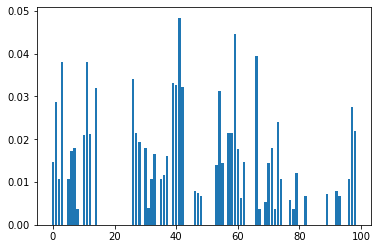

In [91]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import operator
le = preprocessing.LabelEncoder()
p=df_hard_time_mem_feature_df
le.fit(p['label_mem'])
g=le.transform(p['label_mem']) 
print(g)
x_train_np=p.drop(['file','label_mem'],axis=1)
print(x_train_np.shape)
y_train_np=np.array(g)


model = RandomForestClassifier(n_estimators = 100, random_state = 2)
model.feature_names = list(x_train_np.columns.values)
model.fit(x_train_np, y_train_np)
ft=list(model.feature_names)
importance = model.feature_importances_
print(model.n_features_)
print(ft,type(ft))

dict1_imp={}
c=0
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    val= round(v,5)
    #print(val,type(val),ft[c])
    dict1_imp[ft[c]]=val
    c+=1
#print(dict1_imp)
dict1_imp_sort=dict(sorted(dict1_imp.items(), key=operator.itemgetter(1),reverse=True))

for key,val in dict1_imp_sort.items():
    print(key,val)
plt.bar([x for x in range(len(importance))], importance)
plt.show()


hard_feature_sort_dic=dict1_imp_sort

top_n_3=(list(hard_feature_sort_dic.keys())[:30])

In [92]:
d= dict(x_hard)
hard_zero_features =[]
for key, value in dict1_imp_sort.items():
    if value == 0.0:
        if ( sum(list(d[(key, 'mean')]))/3 )== 0.0 :
            print(key,list(d[(key, 'mean')]))
            hard_zero_features.append(key)
print(hard_zero_features)
print(top_n_3)

GCI [0, 0, 0]
ESUB [0.0, 0.0, 0.0]
DSUB [0.0, 0.0, 0.0]
CSUB [0.0, 0.0, 0.0]
SUPECHN [0, 0, 0]
SUBECHN [0, 0, 0]
SUBCCHN [0, 0, 0]
SUPDCHN [0, 0, 0]
DSUPECHN [0, 0, 0]
DSUBECHN [0, 0, 0]
DSUBCCHN [0, 0, 0]
DSUPDCHN [0, 0, 0]
aDIT [0.0, 0.0, 0.0]
mDIT [0, 0, 0]
tDIT [0, 0, 0]
ENUM [0, 0, 0]
ENUMP [0.0, 0.0, 0.0]
NEG [0, 0, 0]
NEGP [0.0, 0.0, 0.0]
SELF [0, 0, 0]
SELFP [0.0, 0.0, 0.0]
ASYM [0, 0, 0]
ASYMP [0.0, 0.0, 0.0]
REFLE [0, 0, 0]
REFLEP [0.0, 0.0, 0.0]
IRREF [0, 0, 0]
IRREFP [0.0, 0.0, 0.0]
DISP [0, 0, 0]
['GCI', 'ESUB', 'DSUB', 'CSUB', 'SUPECHN', 'SUBECHN', 'SUBCCHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUBCCHN', 'DSUPDCHN', 'aDIT', 'mDIT', 'tDIT', 'ENUM', 'ENUMP', 'NEG', 'NEGP', 'SELF', 'SELFP', 'ASYM', 'ASYMP', 'REFLE', 'REFLEP', 'IRREF', 'IRREFP', 'DISP']
['mCOD', 'EF', 'MNCARP', 'RCH', 'realisation_time_milsecs', 'ELCLSPRT', 'tCID', 'aCOD', 'tCOD', 'HGCI', 'CONJP', 'consistency_time_milsecs', 'ELPROP', 'DTP', 'CAL_TIME', 'ELAXPRT', 'UF', 'UFP', 'CYC', 'EOG', 'HLC', 'SOV', 'IH

(6, 101)
(4, 101)
feature name=  size_kb
feature values=  [  64 1178 1180 1150]
max value =  1180 min value =  64
mean=  893.0 standard deviation=  478.7702998307226
left range=  773.3074250423193 right range=  1850.5405996614452
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6683304474141654
skewness value=  -1.1525874173763218


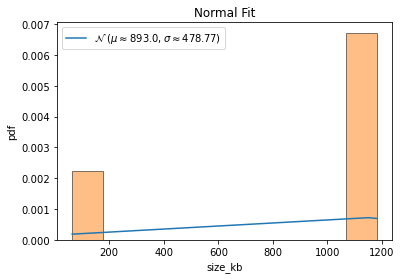


QQ plot 



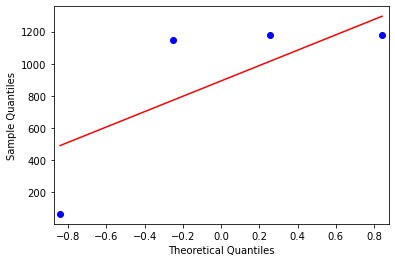

feature name=  consistency_time_milsecs
feature values=  [21600051 21600095 21600095 21600056]
max value =  21600095 min value =  21600051
mean=  21600074.25 standard deviation=  20.825165065372232
left range=  21600069.043708734 right range=  21600115.90033013
data covered within this range=  50.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.9713331672264518
skewness value=  -0.021538924810291984


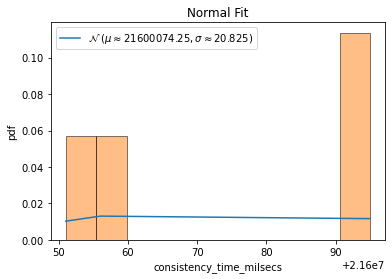


QQ plot 



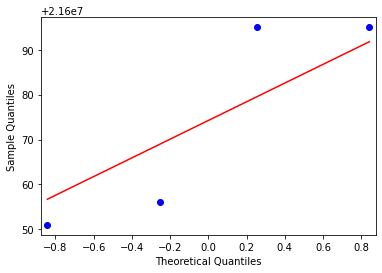

feature name=  realisation_time_milsecs
feature values=  [21600273 21600125 21600073 21600107]
max value =  21600273 min value =  21600073
mean=  21600144.5 standard deviation=  76.50326790405754
left range=  21600125.374183025 right range=  21600297.50653581
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.8038649993255209
skewness value=  0.9470306805167558


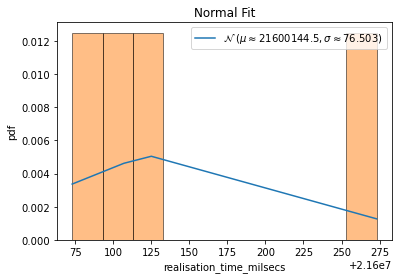


QQ plot 



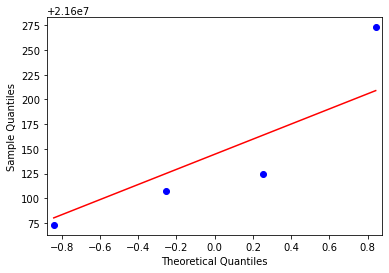

feature name=  classification_size_kb
feature values=  [18797388  1420944  1097220  1394612]
max value =  18797388 min value =  1097220
mean=  5677541.0 standard deviation=  7575813.893666805
left range=  3783587.526583299 right range=  20829168.787333608
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6674086834565482
skewness value=  1.1537214338515192


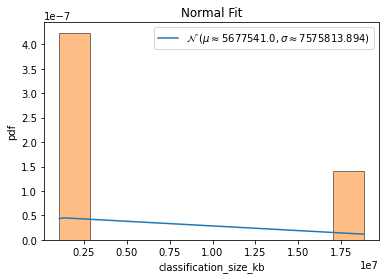


QQ plot 



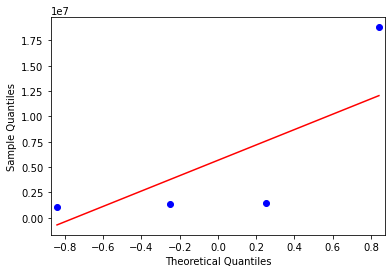

feature name=  SOV
feature values=  [ 209 2798 2801 2730]
max value =  2801 min value =  209
mean=  2134.5 standard deviation=  1112.0504709769248
left range=  1856.4873822557688 right range=  4358.6009419538495
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6684352320330267
skewness value=  -1.1524563740580955


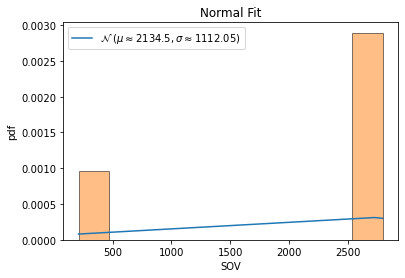


QQ plot 



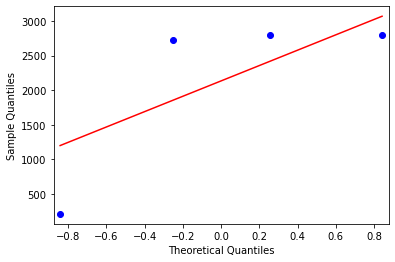

feature name=  EOG
feature values=  [1.59781025 1.9273965  1.9295206  1.89501482]
max value =  1.92952060421639 min value =  1.5978102492560464
mean=  1.8374355420521717 standard deviation=  0.1390218383437916
left range=  1.802680082466224 right range=  2.115479218739755
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6940080628092149
skewness value=  -1.1220756799299836


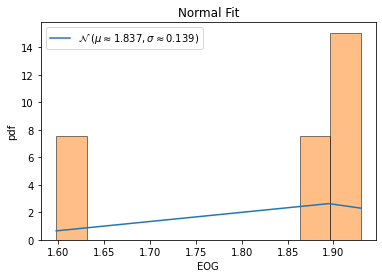


QQ plot 



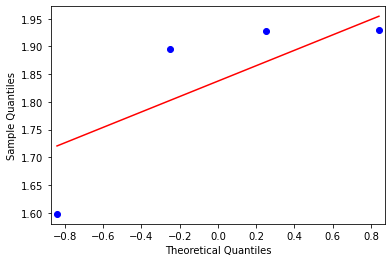

feature name=  RCH
feature values=  [0.54571429 0.39655172 0.40112994 0.4379085 ]
max value =  0.5457142857142857 min value =  0.396551724137931
mean=  0.4453261125217669 standard deviation=  0.06013536534166795
left range=  0.43029227118634994 right range=  0.5655968432051028
data covered within this range=  50.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.877255079636921
skewness value=  0.9299445760596048


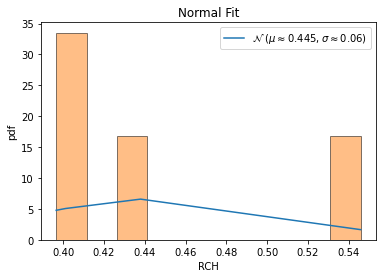


QQ plot 



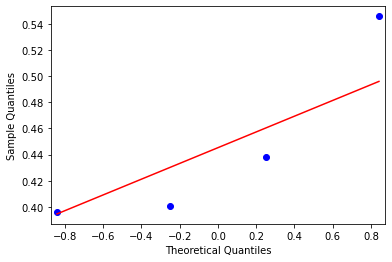

feature name=  CYC
feature values=  [ 315 1175 1178 1146]
max value =  1178 min value =  315
mean=  953.5 standard deviation=  368.8499017215539
left range=  861.2875245696115 right range=  1691.1998034431078
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6697954729846893
skewness value=  -1.1507566730149705


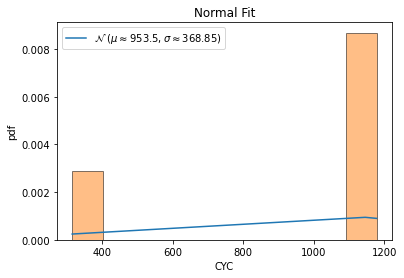


QQ plot 



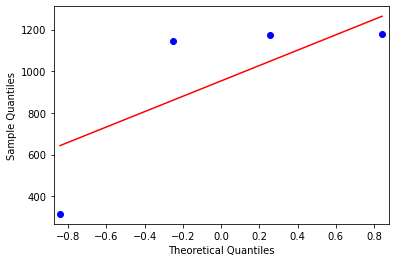

feature name=  HGCI
feature values=  [ 0 40 41 40]
max value =  41 min value =  0
mean=  30.25 standard deviation=  17.469616481193857
left range=  25.882595879701537 right range=  65.1892329623877
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6680982124871702
skewness value=  -1.152798716900481


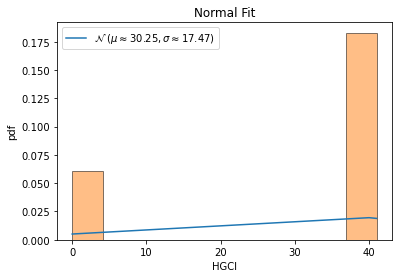


QQ plot 



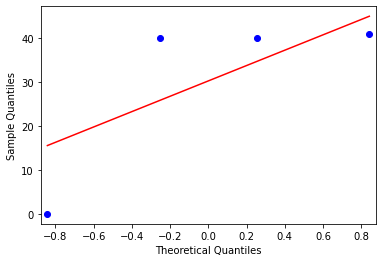

feature name=  ELCLSPRT
feature values=  [0.71633238 0.75       0.74285714 0.72847682]
max value =  0.75 min value =  0.7163323782234957
mean=  0.7344165855681728 standard deviation=  0.013003895270567618
left range=  0.7311656117505309 right range=  0.760424376109308
data covered within this range=  50.0 %
data covered within 1 standard deviation=  50.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4940928679454344
skewness value=  -0.19760815089391554


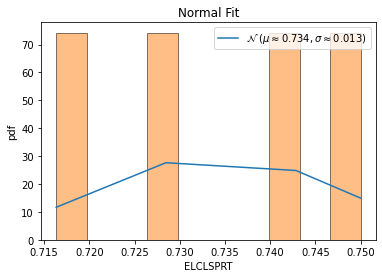


QQ plot 



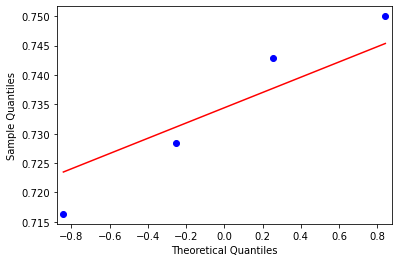

feature name=  ELAXPRT
feature values=  [0.53       0.72142857 0.71527778 0.69354839]
max value =  0.7214285714285709 min value =  0.53
mean=  0.6650636840757806 standard deviation=  0.0786638938696181
left range=  0.6453977106083761 right range=  0.8223914718150168
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.715630641238187
skewness value=  -1.0965396721706717


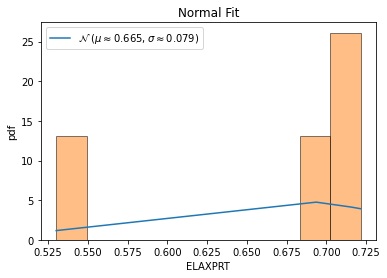


QQ plot 



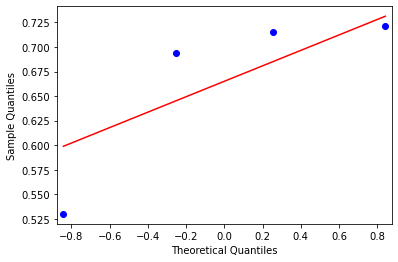

feature name=  HLC
feature values=  [0 0 0 0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


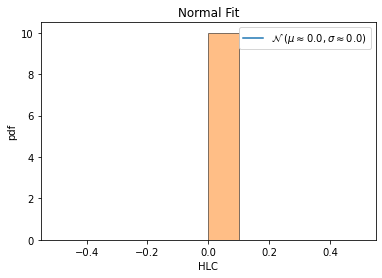


QQ plot 



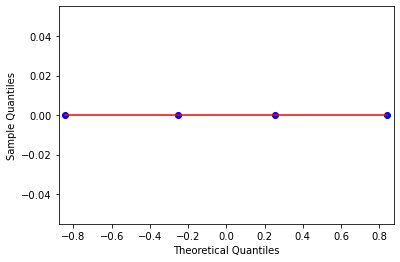

feature name=  IHR
feature values=  [0 5 5 5]
max value =  5 min value =  0
mean=  3.75 standard deviation=  2.165063509461097
left range=  3.2087341226347257 right range=  8.080127018922195
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6666666666666665
skewness value=  -1.1547005383792515


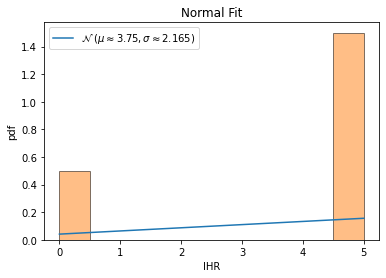


QQ plot 



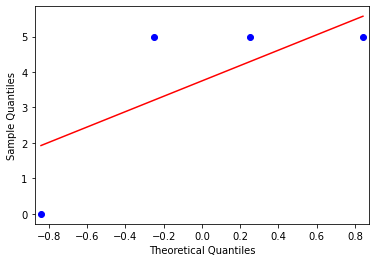

feature name=  IND
feature values=  [  1 987 988 986]
max value =  988 min value =  1
mean=  740.5 standard deviation=  426.9511096132671
left range=  633.7622225966833 right range=  1594.4022192265343
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6666739811120448
skewness value=  -1.1546910366229521


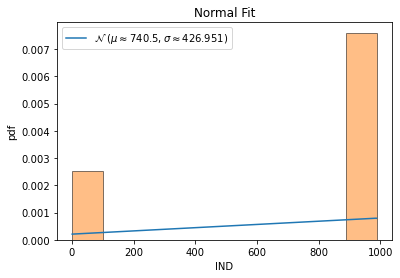


QQ plot 



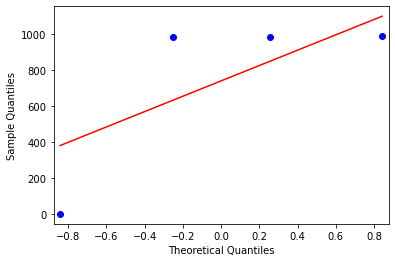

feature name=  aCID
feature values=  [1.04571429 7.68390805 7.5819209  8.2875817 ]
max value =  8.28758169934641 min value =  1.0457142857142858
mean=  6.149781233748126 standard deviation=  2.9591493436333587
left range=  5.409993897839786 right range=  12.068079921014842
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6873469791900466
skewness value=  -1.1254489003472417


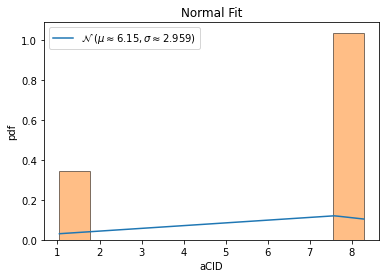


QQ plot 



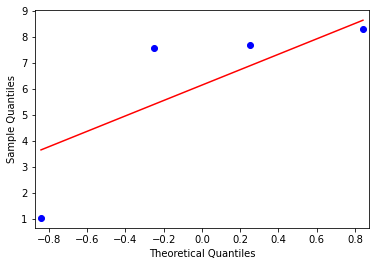

feature name=  tCID
feature values=  [ 366 1337 1342 1268]
max value =  1342 min value =  366
mean=  1078.25 standard deviation=  412.25621584155647
left range=  975.1859460396108 right range=  1902.762431683113
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.680685809481385
skewness value=  -1.1375897216729867


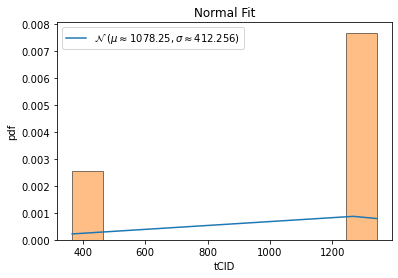


QQ plot 



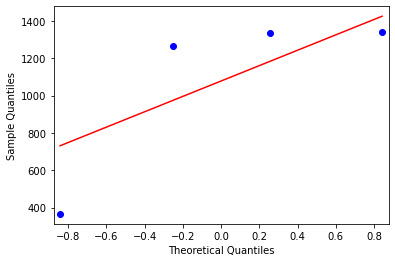

feature name=  aCOD
feature values=  [1.99428571 1.70114943 1.71186441 1.76470588]
max value =  1.9942857142857144 min value =  1.7011494252873602
mean=  1.7930013571764185 standard deviation=  0.11867603846588719
left range=  1.7633323475599467 right range=  2.030353434108193
data covered within this range=  50.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.7860157426716596
skewness value=  1.0205887092334254


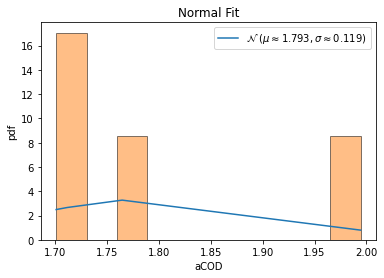


QQ plot 



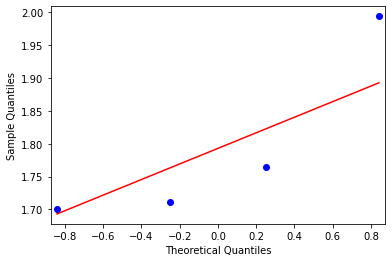

feature name=  mCOD
feature values=  [3 4 4 4]
max value =  4 min value =  3
mean=  3.75 standard deviation=  0.4330127018922193
left range=  3.6417468245269453 right range=  4.616025403784438
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6666666666666665
skewness value=  -1.1547005383792515


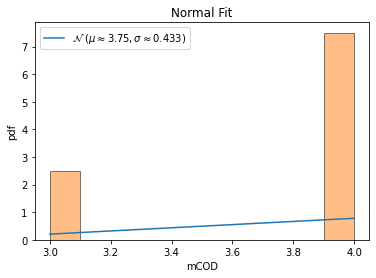


QQ plot 



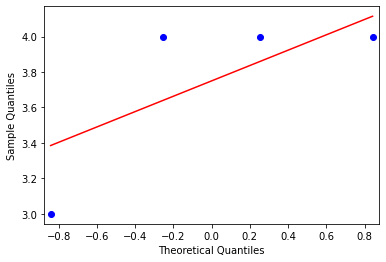

feature name=  tCOD
feature values=  [698 296 303 270]
max value =  698 min value =  270
mean=  391.75 standard deviation=  177.24047929296512
left range=  347.4398801767587 right range=  746.2309585859302
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6789293934325071
skewness value=  1.1378375136036385


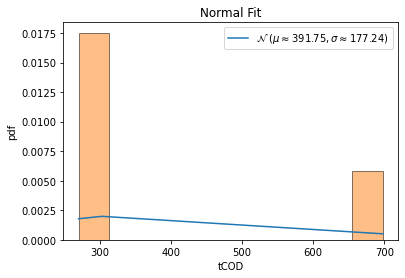


QQ plot 



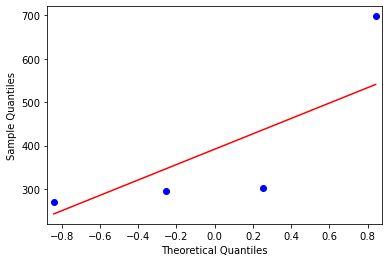

feature name=  CONJP
feature values=  [0.2723 0.2174 0.2113 0.2239]
max value =  0.2723 min value =  0.2113
mean=  0.231225 standard deviation=  0.02412958505652345
left range=  0.22519260373586916 right range=  0.27948417011304694
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.7555166675630005
skewness value=  1.0383944492790265


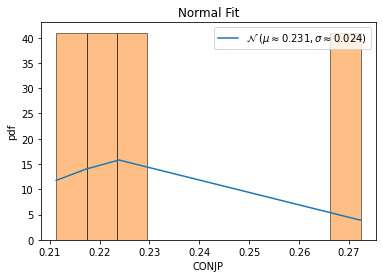


QQ plot 



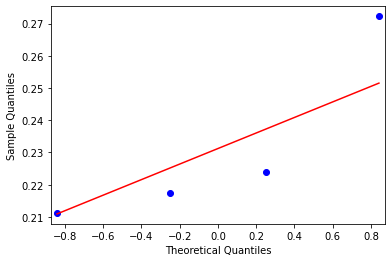

feature name=  UF
feature values=  [5 8 8 8]
max value =  8 min value =  5
mean=  7.25 standard deviation=  1.299038105676658
left range=  6.9252404735808355 right range=  9.848076211353316
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6666666666666665
skewness value=  -1.1547005383792515


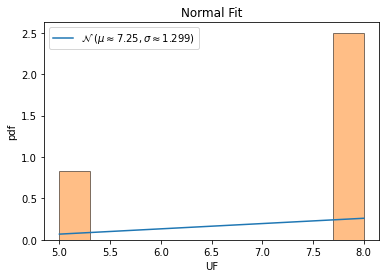


QQ plot 



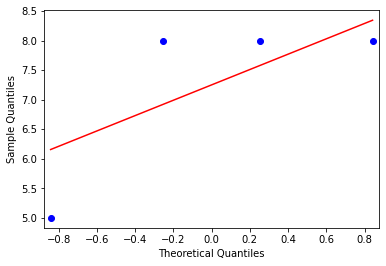

feature name=  UFP
feature values=  [0.0262 0.1159 0.1127 0.1194]
max value =  0.1194 min value =  0.0262
mean=  0.09355000000000001 standard deviation=  0.03895667465274725
left range=  0.08381083133681319 right range=  0.1714633493054945
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6764682254231706
skewness value=  -1.1418873901344468


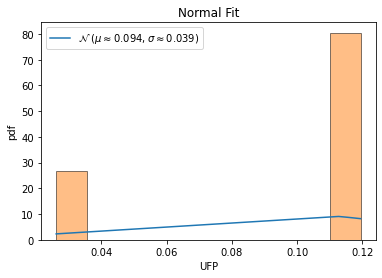


QQ plot 



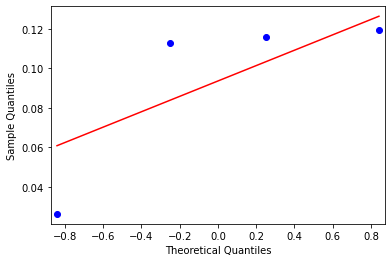

feature name=  EF
feature values=  [40 11 11 11]
max value =  40 min value =  11
mean=  18.25 standard deviation=  12.55736835487436
left range=  15.110657911281411 right range=  43.36473670974872
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6666666666666665
skewness value=  1.1547005383792515


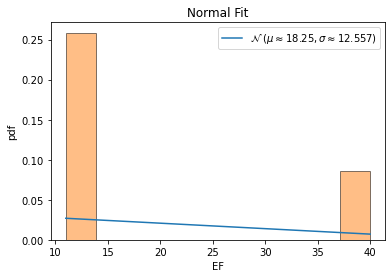


QQ plot 



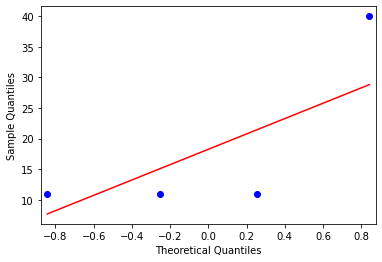

feature name=  EFP
feature values=  [0.2094 0.1594 0.1549 0.1642]
max value =  0.2094 min value =  0.1549
mean=  0.17197500000000002 standard deviation=  0.021856163318386877
left range=  0.1665109591704033 right range=  0.21568732663677376
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.726198890394647
skewness value=  1.077097420936568


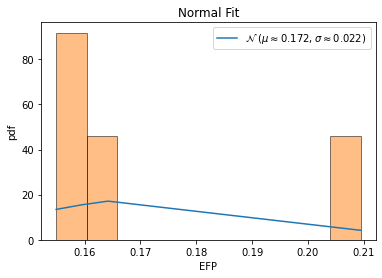


QQ plot 



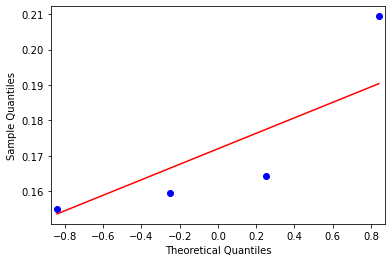

feature name=  VALUEP
feature values=  [0.     0.3188 0.338  0.3134]
max value =  0.338 min value =  0.0
mean=  0.24255000000000002 standard deviation=  0.1403344130995673
left range=  0.2074663967251082 right range=  0.5232188261991346
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6775219317987475
skewness value=  -1.1398401022849078


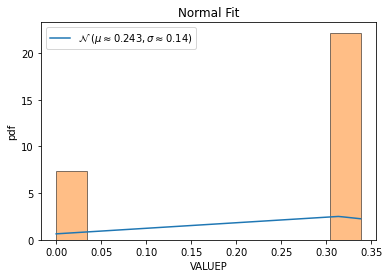


QQ plot 



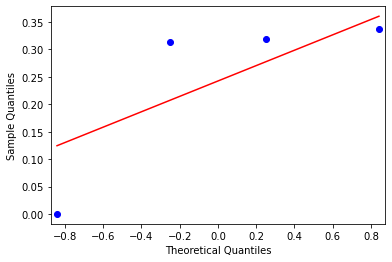

feature name=  MNCARP
feature values=  [0.2461 0.     0.     0.    ]
max value =  0.2461 min value =  0.0
mean=  0.061525 standard deviation=  0.1065644259356752
left range=  0.034883893516081205 right range=  0.2746538518713504
data covered within this range=  25.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.666666666666667
skewness value=  1.1547005383792515


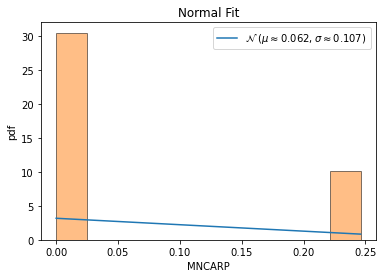


QQ plot 



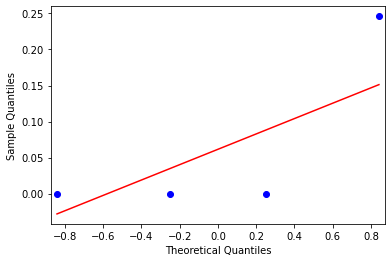

feature name=  OBP
feature values=  [26 65 65 47]
max value =  65 min value =  26
mean=  50.75 standard deviation=  16.068213964221414
left range=  46.73294650894465 right range=  82.88642792844283
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.2827260170589658
skewness value=  -0.5680439033682253


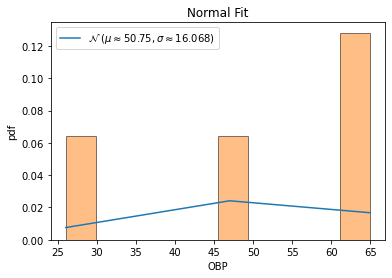


QQ plot 



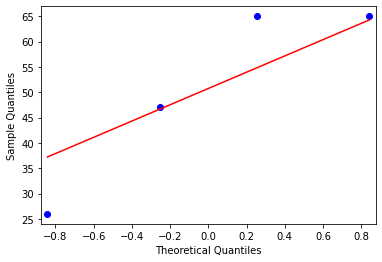

feature name=  DTP
feature values=  [22 78 78 49]
max value =  78 min value =  22
mean=  56.75 standard deviation=  23.29565410114084
left range=  50.92608647471479 right range=  103.34130820228168
data covered within this range=  50.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.4129283905618089
skewness value=  -0.4595079217667038


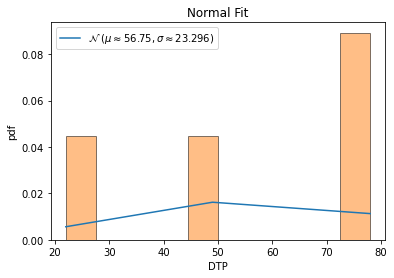


QQ plot 



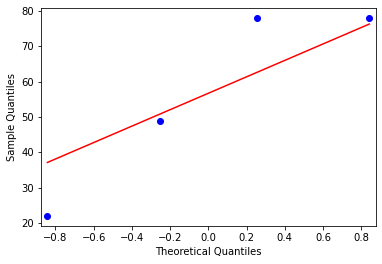

feature name=  ELPROP
feature values=  [0.         0.96326531 0.97119342 0.97633136]
max value =  0.976331360946745 min value =  0.0
mean=  0.7276975206767635 standard deviation=  0.42016214147909536
left range=  0.6226569853069897 right range=  1.5680218036349542
data covered within this range=  75.0 %
data covered within 1 standard deviation=  75.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -0.6669948081505592
skewness value=  -1.1542758412861904


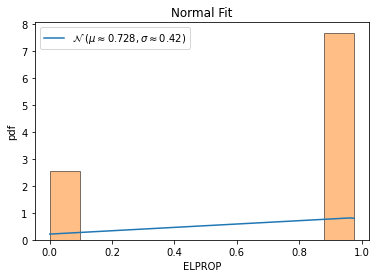


QQ plot 



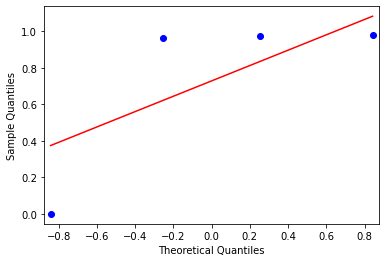

feature name=  CAL_TIME
feature values=  [ 80 230 180 340]
max value =  340 min value =  80
mean=  207.5 standard deviation=  93.64160400164022
left range=  184.08959899958995 right range=  394.78320800328044
data covered within this range=  50.0 %
data covered within 1 standard deviation=  50.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -1.1359458323956049
skewness value=  0.0743268508181799


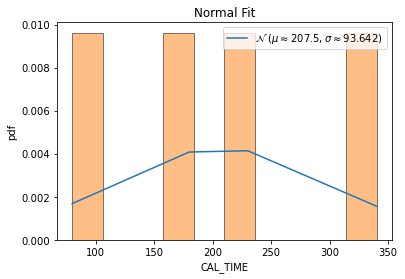


QQ plot 



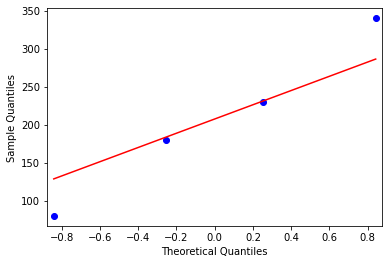

In [93]:
#after hard time and memory clusering ,
#collect the easy ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

hard_zero_features.append('file')
hard_zero_features.append('label_mem')


#print(hard_zero_features)
print(df_hard_time_mem_feature_df.shape)
hard_time_mem_easy = df_hard_time_mem_feature_df[df_hard_time_mem_feature_df['label_mem']== 'easy']
print(hard_time_mem_easy.shape)
prior_easy= round(hard_time_mem_easy.shape[0] / df_hard_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in hard_zero_features:
    if cols_list[i] in top_n_3:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(hard_time_mem_easy[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_easy) *gamma * std) 
        #ry= mean + ((1- prior_easy) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / hard_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_easy.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        ''''
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break
        '''

In [94]:
hard_time_mem_easy

file  size_kb  \
0  085abd30-44cb-4bc3-90b2-ba12067a2253_premises6...       64   
1  0805c492-a3fa-41e6-b667-9968da4d9e3f_iridlcfds...     1178   
2  0952091f-65b7-4abb-88d9-589ec5d8709e_onmapping...     1180   
5  feaf1577-ec44-4912-9caa-a57a720af930_cfobj.owl...     1150   

   consistency_time_milsecs  consistency_size_kb  realisation_time_milsecs  \
0                  21600051              1352844                  21600273   
1                  21600095              1411176                  21600125   
2                  21600095              1423224                  21600073   
5                  21600056              1387476                  21600107   

   realisation_size_kb  classification_time_milsecs  classification_size_kb  \
0              9697004                     21600477                18797388   
1              1431748                     21600094                 1420944   
2              1391916                       656914                 1097220   
5              1408484                     21600114                 1394612   

    SOV       ENR  ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  \
0   209  1.787500  ...     0     0    0     0     0    0  0.000000  0.000000   
1  2798  1.407033  ...     1     0    5   112    90    2  0.013986  0.963265   
2  2801  1.407369  ...     0     0    5   112    90    2  0.013986  0.971193   
5  2730  1.406852  ...     0     0    2    73    66    2  0.020833  0.976331   

   CAL_TIME  label_mem  
0        80       easy  
1       230       easy  
2       180       easy  
5       340       easy  

[4 rows x 101 columns]

In [95]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
hard_time_easy_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(hard_time_easy_mem_table.shape)
#hard_time_easy_mem_table.to_csv('hard_time_easy_mem_table.csv',index=False)
#hard_time_mem_easy.to_csv('hard_time_mem_easy.csv',index=False)

(30, 13)


(6, 101)
(1, 101)
feature name=  size_kb
feature values=  [14328]
max value =  14328 min value =  14328
mean=  14328.0 standard deviation=  0.0
left range=  14328.0 right range=  14328.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


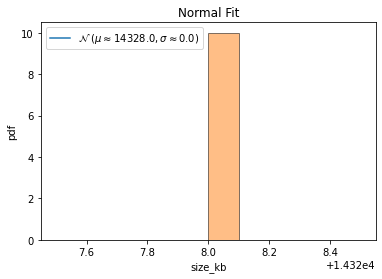


QQ plot 



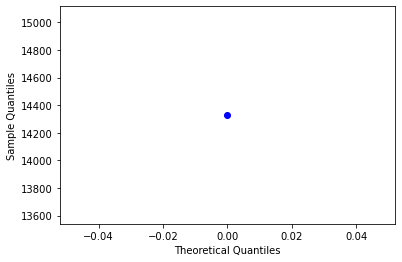

feature name=  consistency_time_milsecs
feature values=  [21600406]
max value =  21600406 min value =  21600406
mean=  21600406.0 standard deviation=  0.0
left range=  21600406.0 right range=  21600406.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


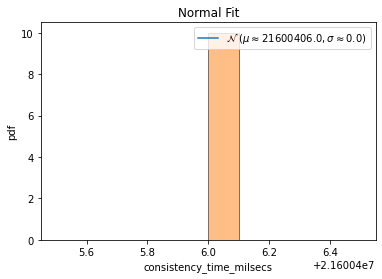


QQ plot 



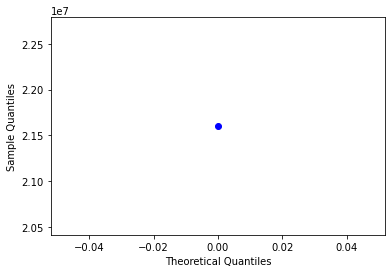

feature name=  realisation_time_milsecs
feature values=  [92155]
max value =  92155 min value =  92155
mean=  92155.0 standard deviation=  0.0
left range=  92155.0 right range=  92155.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


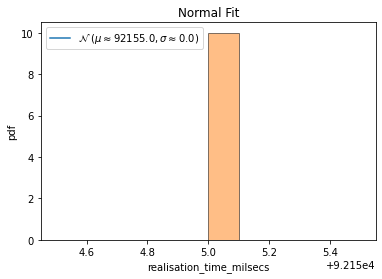


QQ plot 



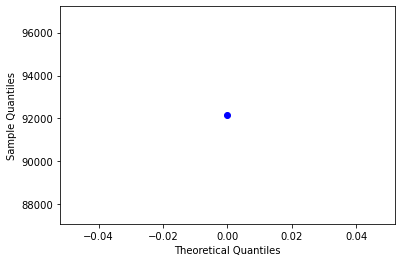

/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


feature name=  classification_size_kb
feature values=  [7870180]
max value =  7870180 min value =  7870180
mean=  7870180.0 standard deviation=  0.0
left range=  7870180.0 right range=  7870180.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


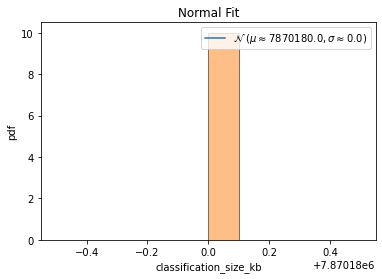


QQ plot 



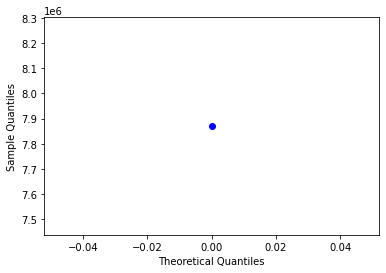

feature name=  SOV
feature values=  [18039]
max value =  18039 min value =  18039
mean=  18039.0 standard deviation=  0.0
left range=  18039.0 right range=  18039.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


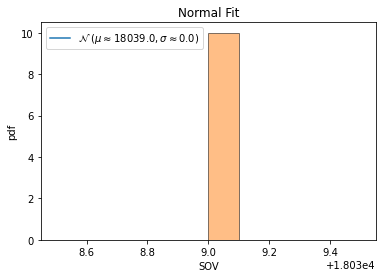


QQ plot 



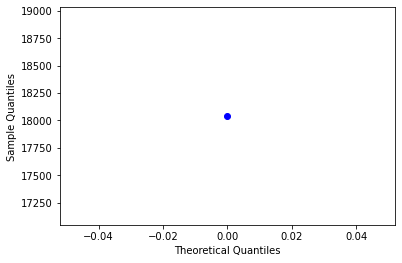

feature name=  EOG
feature values=  [2.15969283]
max value =  2.15969283272415 min value =  2.15969283272415
mean=  2.15969283272415 standard deviation=  0.0
left range=  2.15969283272415 right range=  2.15969283272415
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


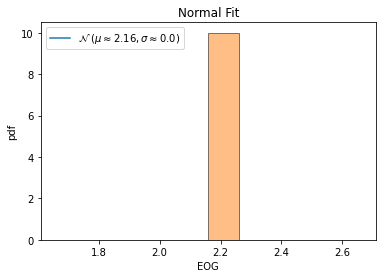


QQ plot 



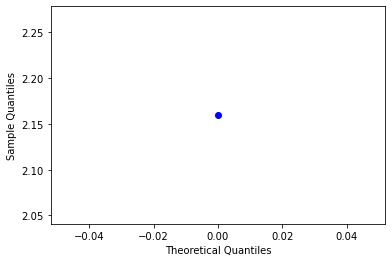

feature name=  RCH
feature values=  [0.89552239]
max value =  0.8955223880597009 min value =  0.8955223880597009
mean=  0.8955223880597009 standard deviation=  0.0
left range=  0.8955223880597009 right range=  0.8955223880597009
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


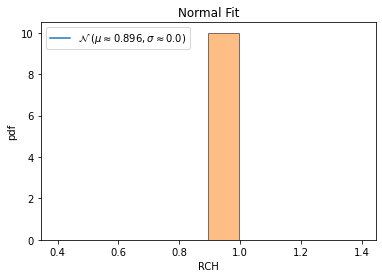


QQ plot 



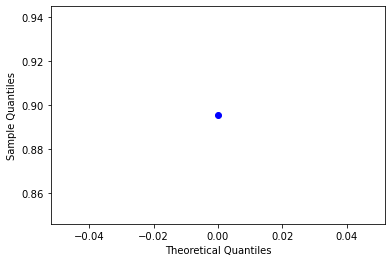

feature name=  CYC
feature values=  [41923]
max value =  41923 min value =  41923
mean=  41923.0 standard deviation=  0.0
left range=  41923.0 right range=  41923.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


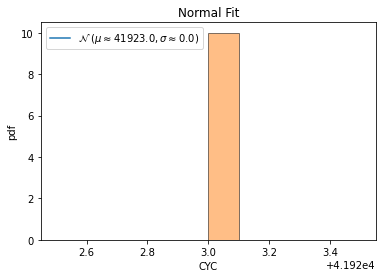


QQ plot 



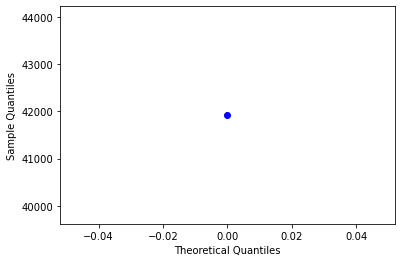

feature name=  HGCI
feature values=  [0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


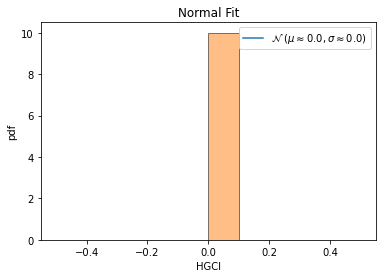


QQ plot 



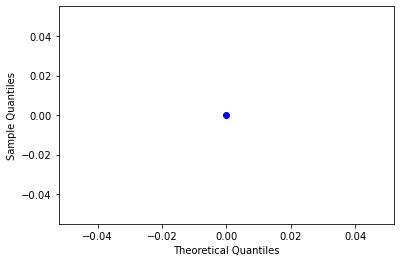

feature name=  ELCLSPRT
feature values=  [0.15789474]
max value =  0.157894736842105 min value =  0.157894736842105
mean=  0.157894736842105 standard deviation=  0.0
left range=  0.157894736842105 right range=  0.157894736842105
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


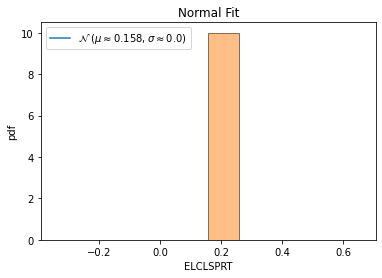


QQ plot 



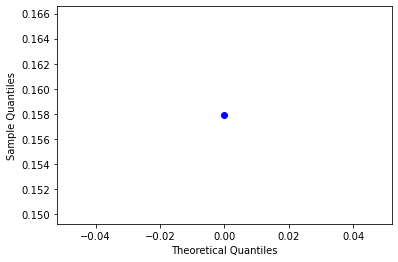

feature name=  ELAXPRT
feature values=  [0.33333333]
max value =  0.33333333333333304 min value =  0.33333333333333304
mean=  0.33333333333333304 standard deviation=  0.0
left range=  0.33333333333333304 right range=  0.33333333333333304
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


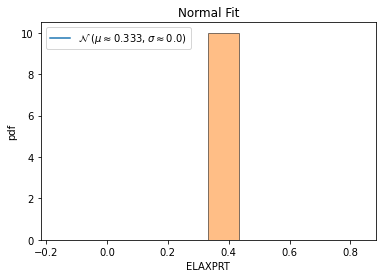


QQ plot 



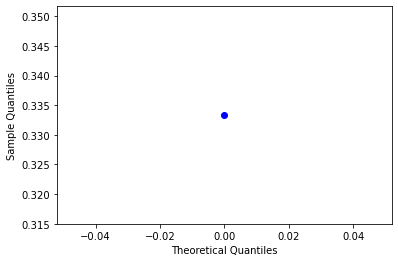

feature name=  HLC
feature values=  [0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


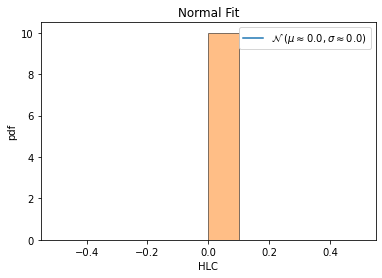


QQ plot 



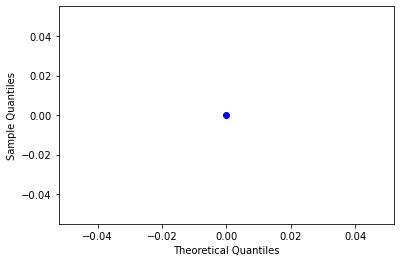

feature name=  IHR
feature values=  [0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


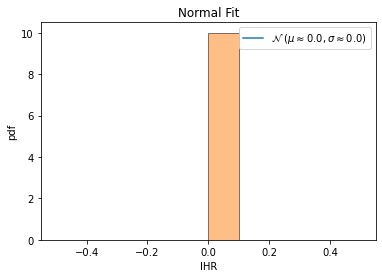


QQ plot 



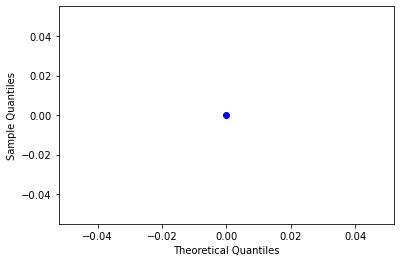

feature name=  IND
feature values=  [6016]
max value =  6016 min value =  6016
mean=  6016.0 standard deviation=  0.0
left range=  6016.0 right range=  6016.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


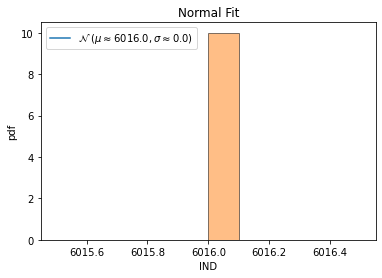


QQ plot 



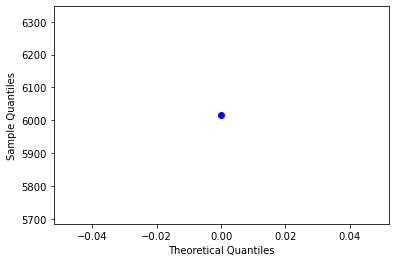

feature name=  aCID
feature values=  [89.96268657]
max value =  89.96268656716421 min value =  89.96268656716421
mean=  89.96268656716421 standard deviation=  0.0
left range=  89.96268656716421 right range=  89.96268656716421
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


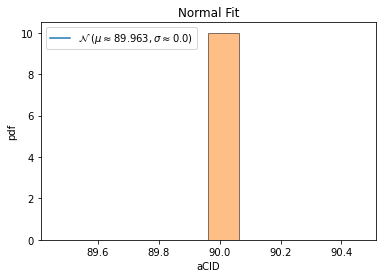


QQ plot 



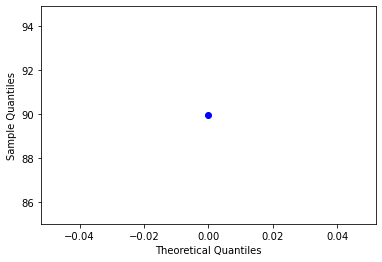

feature name=  tCID
feature values=  [12055]
max value =  12055 min value =  12055
mean=  12055.0 standard deviation=  0.0
left range=  12055.0 right range=  12055.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


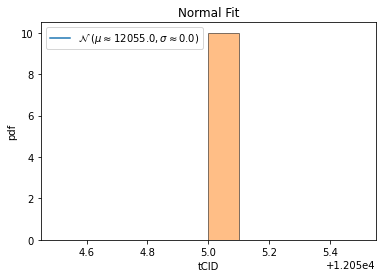


QQ plot 



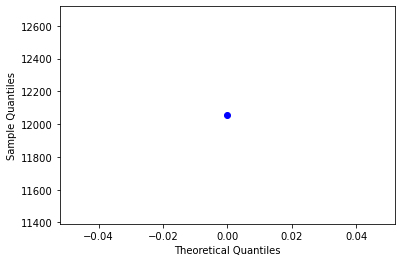

feature name=  aCOD
feature values=  [1.19402985]
max value =  1.19402985074627 min value =  1.19402985074627
mean=  1.19402985074627 standard deviation=  0.0
left range=  1.19402985074627 right range=  1.19402985074627
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


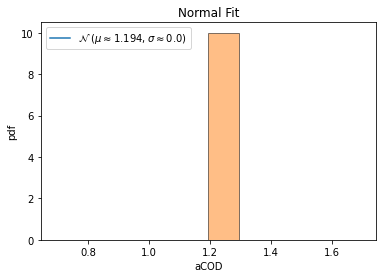


QQ plot 



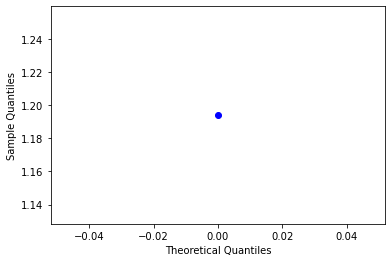

feature name=  mCOD
feature values=  [5]
max value =  5 min value =  5
mean=  5.0 standard deviation=  0.0
left range=  5.0 right range=  5.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


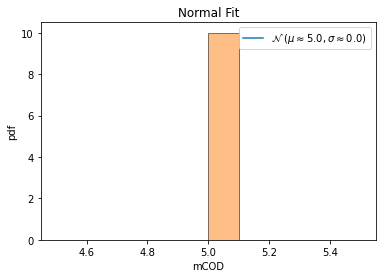


QQ plot 



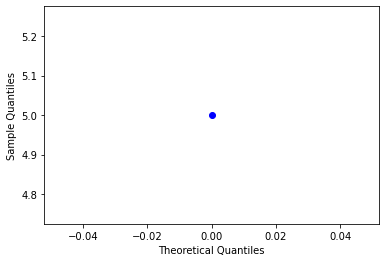

feature name=  tCOD
feature values=  [160]
max value =  160 min value =  160
mean=  160.0 standard deviation=  0.0
left range=  160.0 right range=  160.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


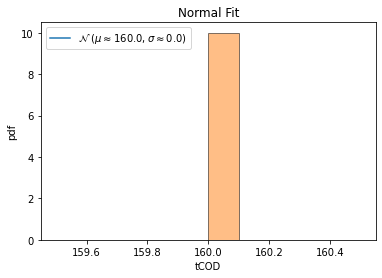


QQ plot 



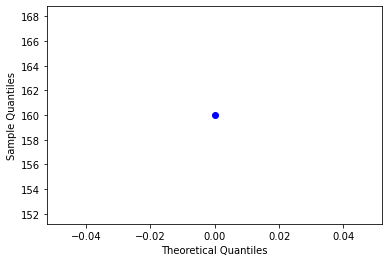

feature name=  CONJP
feature values=  [0.0583]
max value =  0.0583 min value =  0.0583
mean=  0.0583 standard deviation=  0.0
left range=  0.0583 right range=  0.0583
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


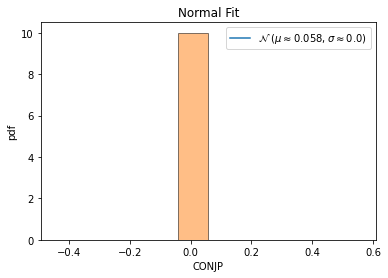


QQ plot 



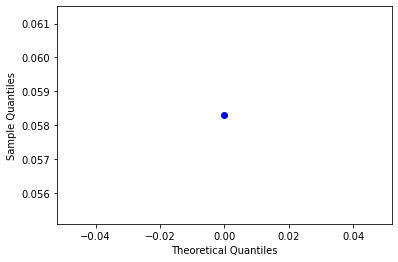

feature name=  UF
feature values=  [0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


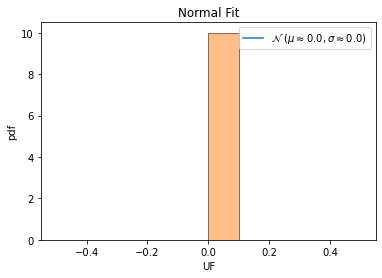


QQ plot 



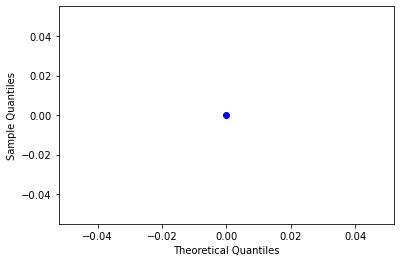

feature name=  UFP
feature values=  [0.]
max value =  0.0 min value =  0.0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


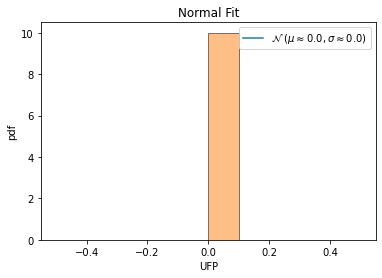


QQ plot 



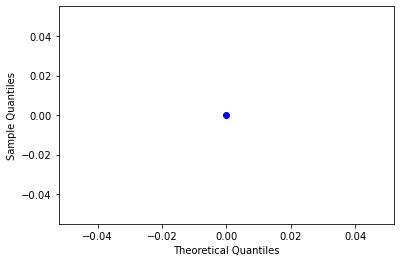

feature name=  EF
feature values=  [1]
max value =  1 min value =  1
mean=  1.0 standard deviation=  0.0
left range=  1.0 right range=  1.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


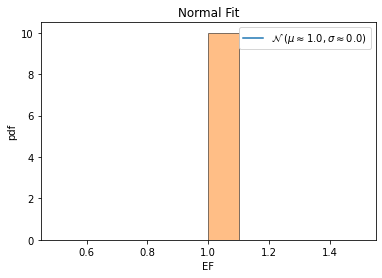


QQ plot 



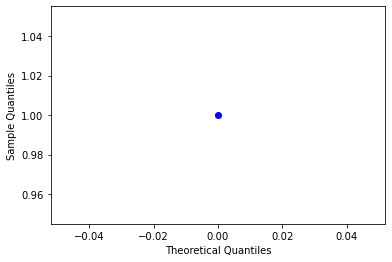

feature name=  EFP
feature values=  [0.0083]
max value =  0.0083 min value =  0.0083
mean=  0.0083 standard deviation=  0.0
left range=  0.0083 right range=  0.0083
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


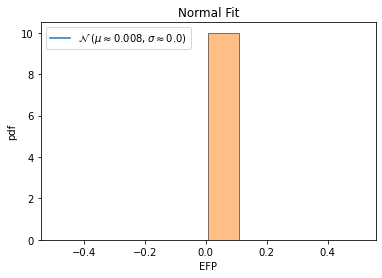


QQ plot 



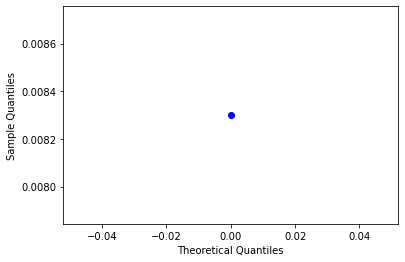

feature name=  VALUEP
feature values=  [0.]
max value =  0.0 min value =  0.0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


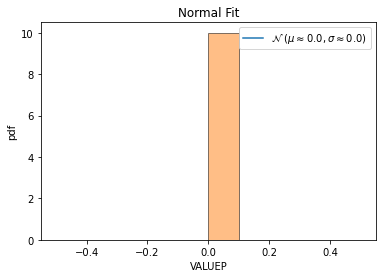


QQ plot 



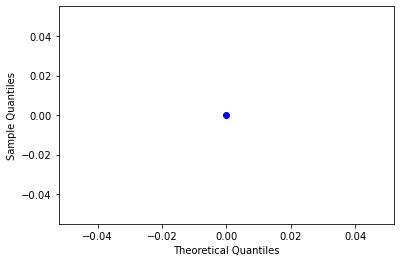

feature name=  MNCARP
feature values=  [0.0417]
max value =  0.0417 min value =  0.0417
mean=  0.0417 standard deviation=  0.0
left range=  0.0417 right range=  0.0417
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


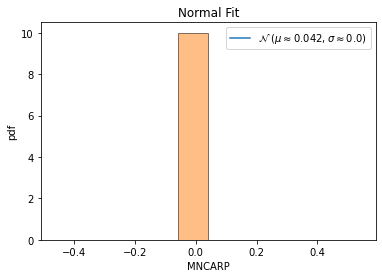


QQ plot 



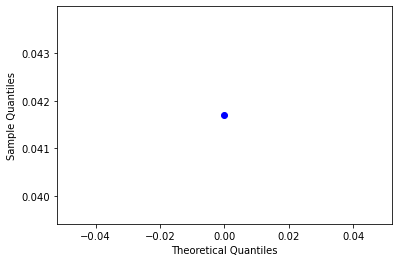

feature name=  OBP
feature values=  [5]
max value =  5 min value =  5
mean=  5.0 standard deviation=  0.0
left range=  5.0 right range=  5.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


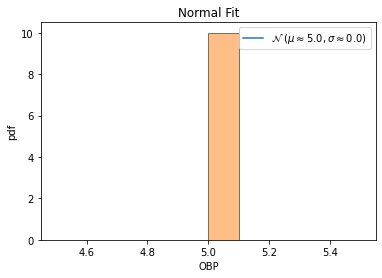


QQ plot 



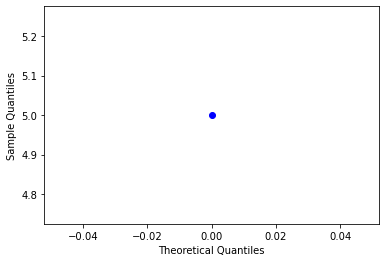

feature name=  DTP
feature values=  [2]
max value =  2 min value =  2
mean=  2.0 standard deviation=  0.0
left range=  2.0 right range=  2.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


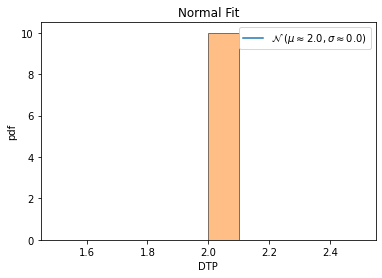


QQ plot 



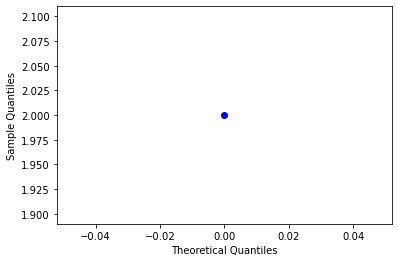

feature name=  ELPROP
feature values=  [0.85]
max value =  0.85 min value =  0.85
mean=  0.85 standard deviation=  0.0
left range=  0.85 right range=  0.85
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


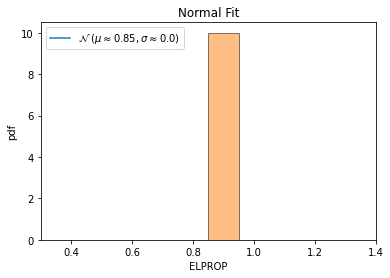


QQ plot 



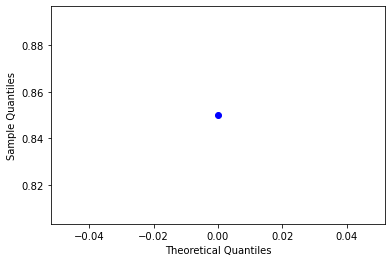

feature name=  CAL_TIME
feature values=  [1910]
max value =  1910 min value =  1910
mean=  1910.0 standard deviation=  0.0
left range=  1910.0 right range=  1910.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


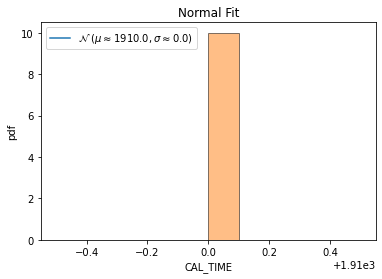


QQ plot 



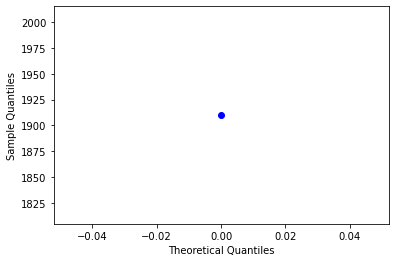

In [96]:
#after hard time and memory clusering ,
#collect the medium ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

hard_zero_features.append('file')
hard_zero_features.append('label_mem')


#print(hard_zero_features)
print(df_hard_time_mem_feature_df.shape)
hard_time_mem_medium = df_hard_time_mem_feature_df[df_hard_time_mem_feature_df['label_mem']== 'medium']
print(hard_time_mem_medium.shape)
prior_medium= round(hard_time_mem_medium.shape[0] / df_hard_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in hard_zero_features:
    if cols_list[i] in top_n_3:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(hard_time_mem_medium[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_medium) *gamma * std) 
        #ry= mean + ((1- prior_medium) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / hard_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_medium.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        ''''
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break
        '''

In [97]:
hard_time_mem_medium

file  size_kb  \
4  75714e9a-2962-4466-8377-5ceaad9662c7_VAST2009....    14328   

   consistency_time_milsecs  consistency_size_kb  realisation_time_milsecs  \
4                  21600406              8128296                     92155   

   realisation_size_kb  classification_time_milsecs  classification_size_kb  \
4            113488448                     21600415                 7870180   

     SOV       ENR  ...  EQVP  DISP  INV  DOMN  RANG  CHN  CHNP  ELPROP  \
4  18039  3.308662  ...     0     0    0     6     7    0   0.0    0.85   

   CAL_TIME  label_mem  
4      1910     medium  

[1 rows x 101 columns]

In [98]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
hard_time_medium_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(hard_time_medium_mem_table.shape)
#hard_time_medium_mem_table.to_csv('hard_time_medium_mem_table.csv',index=False)
#hard_time_mem_medium.to_csv('hard_time_mem_medium.csv',index=False)

(30, 13)


(6, 101)
(1, 101)
feature name=  size_kb
feature values=  [5547]
max value =  5547 min value =  5547
mean=  5547.0 standard deviation=  0.0
left range=  5547.0 right range=  5547.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


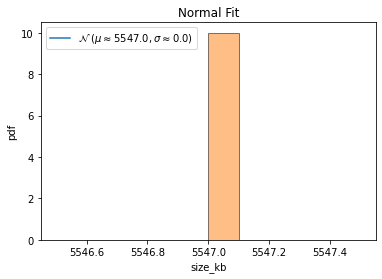


QQ plot 



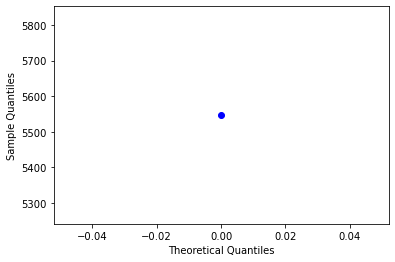

feature name=  consistency_time_milsecs
feature values=  [21600449]
max value =  21600449 min value =  21600449
mean=  21600449.0 standard deviation=  0.0
left range=  21600449.0 right range=  21600449.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


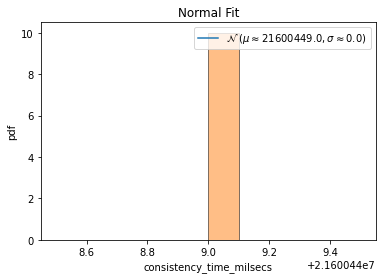


QQ plot 



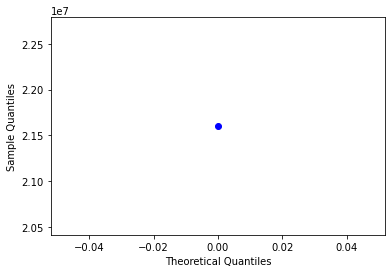

feature name=  realisation_time_milsecs
feature values=  [21600430]
max value =  21600430 min value =  21600430
mean=  21600430.0 standard deviation=  0.0
left range=  21600430.0 right range=  21600430.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


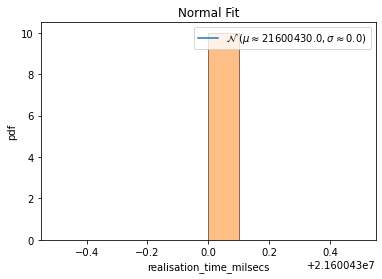


QQ plot 



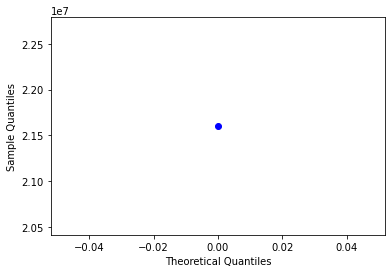

feature name=  classification_size_kb
feature values=  [24260664]
max value =  24260664 min value =  24260664
mean=  24260664.0 standard deviation=  0.0
left range=  24260664.0 right range=  24260664.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


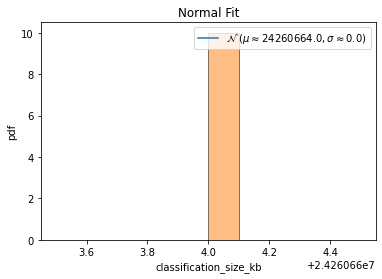


QQ plot 



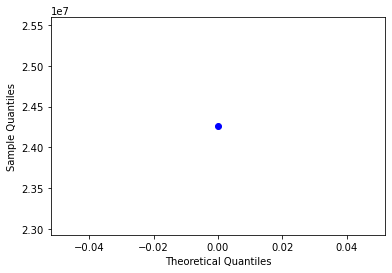

feature name=  SOV
feature values=  [11583]
max value =  11583 min value =  11583
mean=  11583.0 standard deviation=  0.0
left range=  11583.0 right range=  11583.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


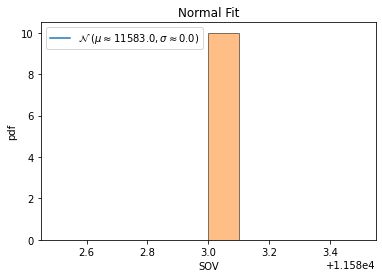


QQ plot 



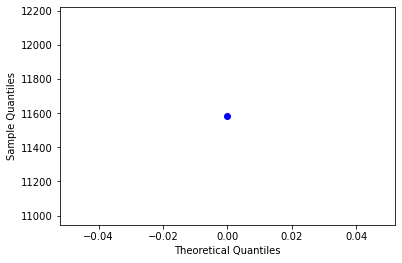

feature name=  EOG
feature values=  [1.50131451]
max value =  1.5013145096459195 min value =  1.5013145096459195
mean=  1.5013145096459195 standard deviation=  0.0
left range=  1.5013145096459195 right range=  1.5013145096459195
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


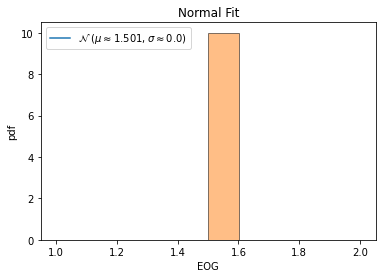


QQ plot 



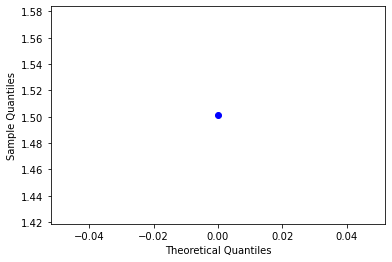

feature name=  RCH
feature values=  [0.05057153]
max value =  0.05057152753723599 min value =  0.05057152753723599
mean=  0.05057152753723599 standard deviation=  0.0
left range=  0.05057152753723599 right range=  0.05057152753723599
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


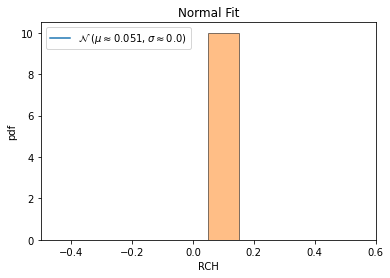


QQ plot 



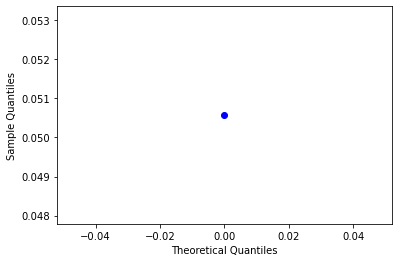

feature name=  CYC
feature values=  [4861]
max value =  4861 min value =  4861
mean=  4861.0 standard deviation=  0.0
left range=  4861.0 right range=  4861.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


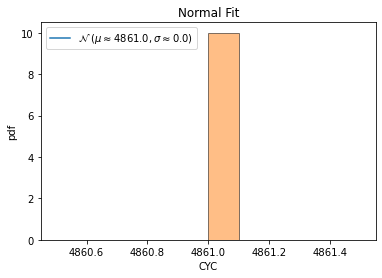


QQ plot 



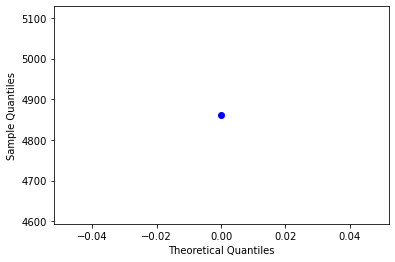

feature name=  HGCI
feature values=  [411]
max value =  411 min value =  411
mean=  411.0 standard deviation=  0.0
left range=  411.0 right range=  411.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


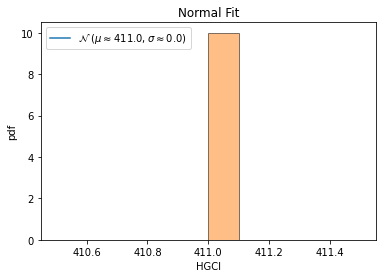


QQ plot 



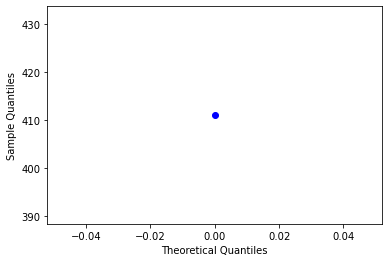

feature name=  ELCLSPRT
feature values=  [0.94942263]
max value =  0.949422632794457 min value =  0.949422632794457
mean=  0.949422632794457 standard deviation=  0.0
left range=  0.949422632794457 right range=  0.949422632794457
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


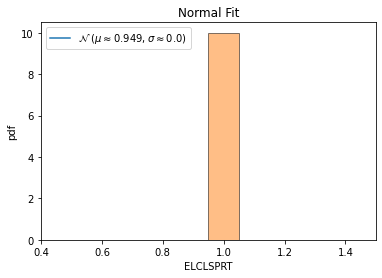


QQ plot 



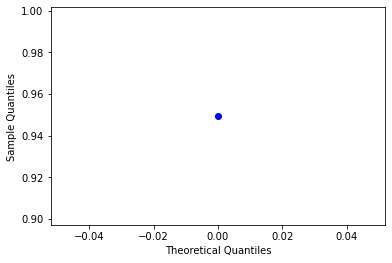

feature name=  ELAXPRT
feature values=  [0.94844649]
max value =  0.948446490218642 min value =  0.948446490218642
mean=  0.948446490218642 standard deviation=  0.0
left range=  0.948446490218642 right range=  0.948446490218642
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


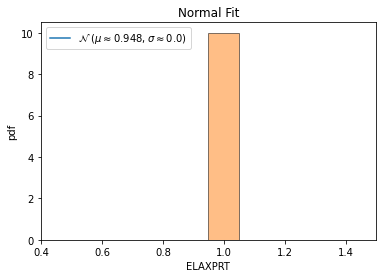


QQ plot 



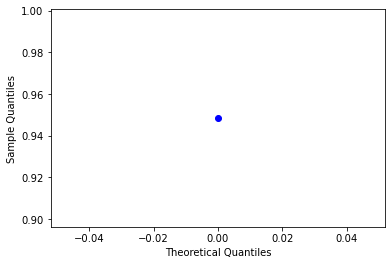

feature name=  HLC
feature values=  [43]
max value =  43 min value =  43
mean=  43.0 standard deviation=  0.0
left range=  43.0 right range=  43.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


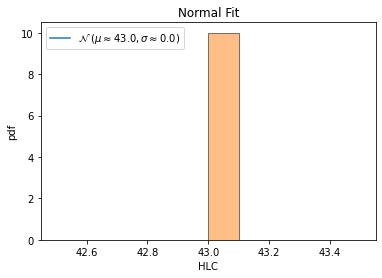


QQ plot 



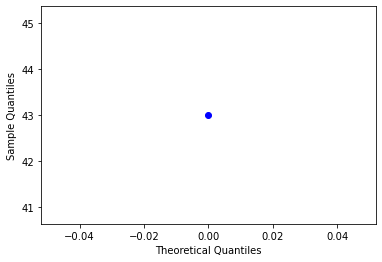

feature name=  IHR
feature values=  [0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


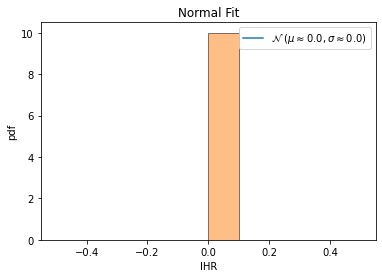


QQ plot 



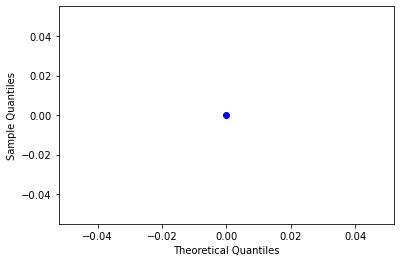

feature name=  IND
feature values=  [661]
max value =  661 min value =  661
mean=  661.0 standard deviation=  0.0
left range=  661.0 right range=  661.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


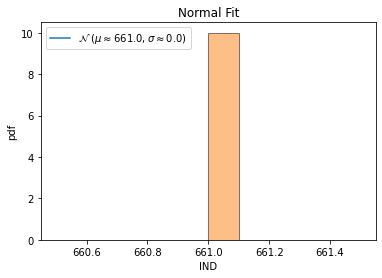


QQ plot 



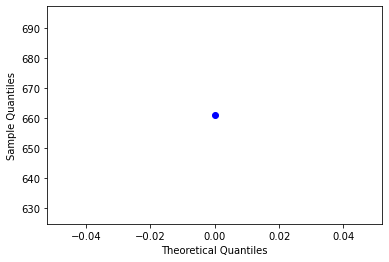

feature name=  aCID
feature values=  [1.13012354]
max value =  1.13012354231613 min value =  1.13012354231613
mean=  1.13012354231613 standard deviation=  0.0
left range=  1.13012354231613 right range=  1.13012354231613
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


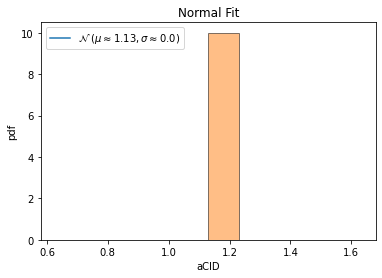


QQ plot 



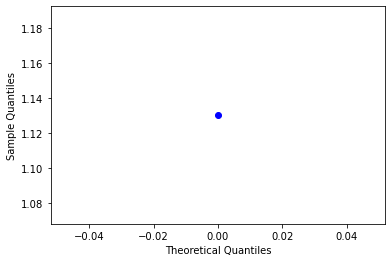

feature name=  tCID
feature values=  [9788]
max value =  9788 min value =  9788
mean=  9788.0 standard deviation=  0.0
left range=  9788.0 right range=  9788.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


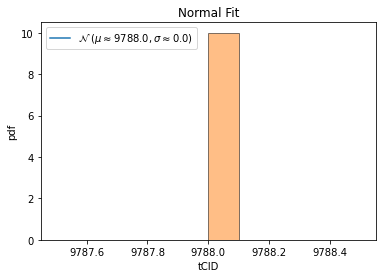


QQ plot 



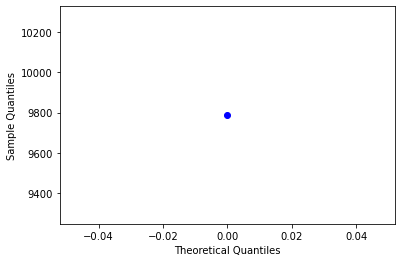

feature name=  aCOD
feature values=  [1.1050687]
max value =  1.10506869876458 min value =  1.10506869876458
mean=  1.10506869876458 standard deviation=  0.0
left range=  1.10506869876458 right range=  1.10506869876458
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


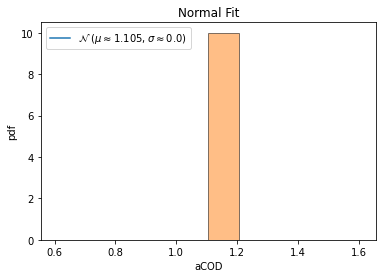


QQ plot 



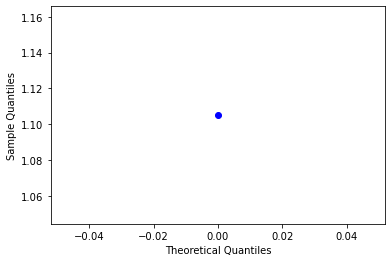

feature name=  mCOD
feature values=  [8]
max value =  8 min value =  8
mean=  8.0 standard deviation=  0.0
left range=  8.0 right range=  8.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


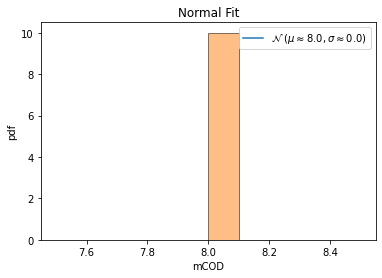


QQ plot 



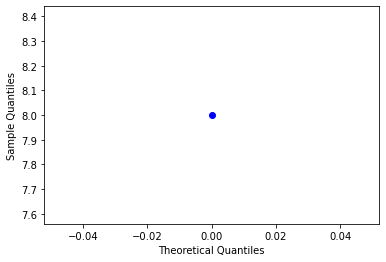

feature name=  tCOD
feature values=  [9571]
max value =  9571 min value =  9571
mean=  9571.0 standard deviation=  0.0
left range=  9571.0 right range=  9571.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


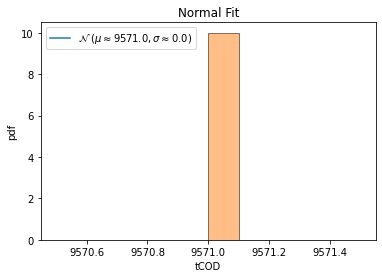


QQ plot 



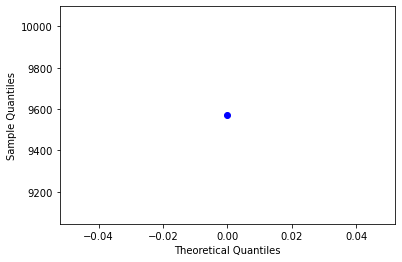

feature name=  CONJP
feature values=  [0.]
max value =  0.0 min value =  0.0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


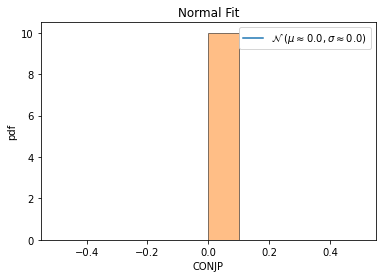


QQ plot 



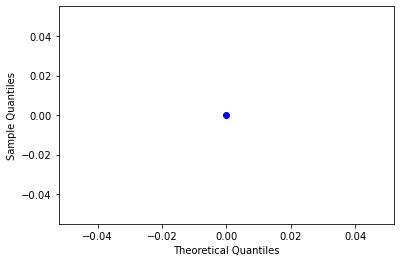

feature name=  UF
feature values=  [403]
max value =  403 min value =  403
mean=  403.0 standard deviation=  0.0
left range=  403.0 right range=  403.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


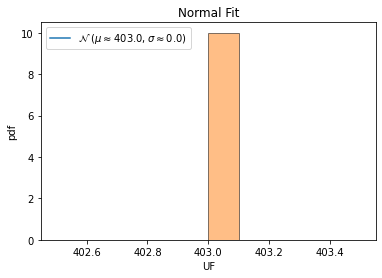


QQ plot 



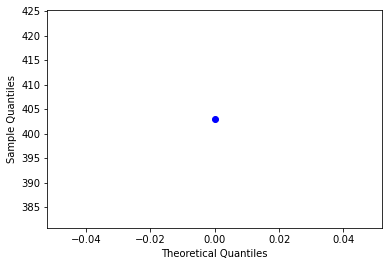

feature name=  UFP
feature values=  [0.9201]
max value =  0.9201 min value =  0.9201
mean=  0.9201 standard deviation=  0.0
left range=  0.9201 right range=  0.9201
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


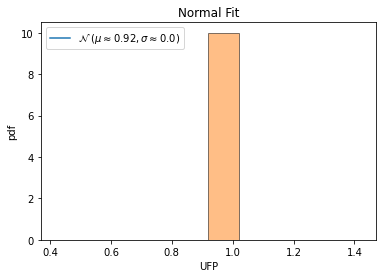


QQ plot 



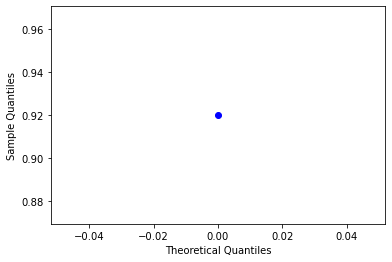

feature name=  EF
feature values=  [0]
max value =  0 min value =  0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


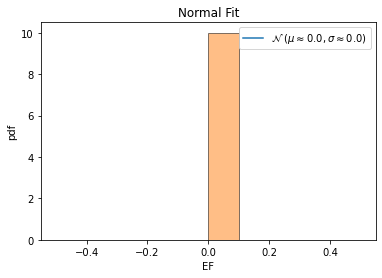


QQ plot 



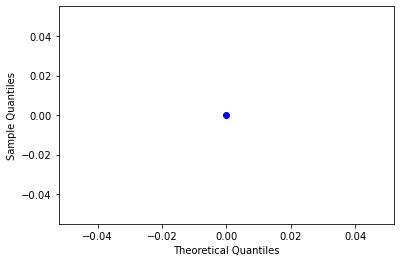

feature name=  EFP
feature values=  [0.]
max value =  0.0 min value =  0.0
mean=  0.0 standard deviation=  0.0
left range=  0.0 right range=  0.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


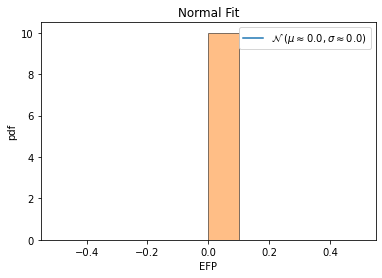


QQ plot 



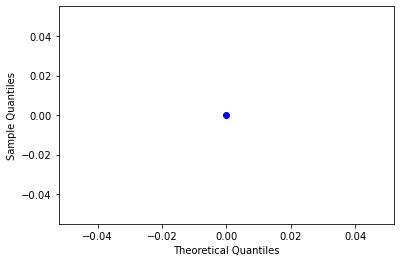

feature name=  VALUEP
feature values=  [0.0708]
max value =  0.0708 min value =  0.0708
mean=  0.0708 standard deviation=  0.0
left range=  0.0708 right range=  0.0708
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


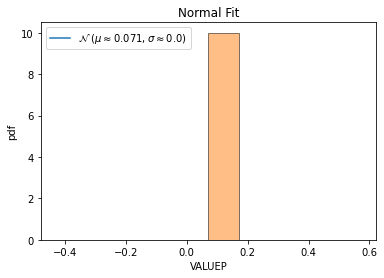


QQ plot 



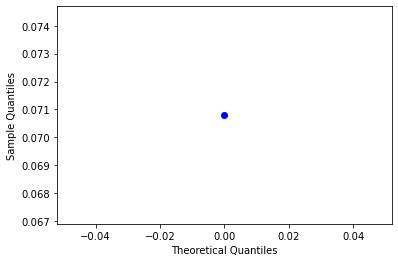

feature name=  MNCARP
feature values=  [0.0023]
max value =  0.0023 min value =  0.0023
mean=  0.0023 standard deviation=  0.0
left range=  0.0023 right range=  0.0023
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


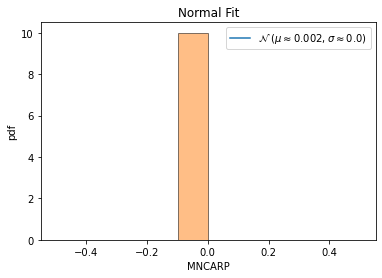


QQ plot 



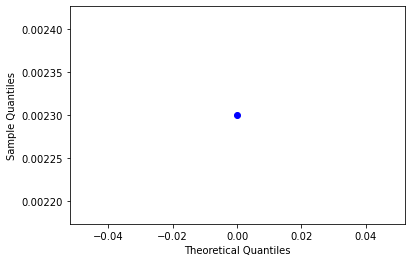

feature name=  OBP
feature values=  [3]
max value =  3 min value =  3
mean=  3.0 standard deviation=  0.0
left range=  3.0 right range=  3.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


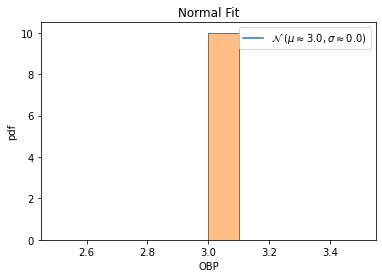


QQ plot 



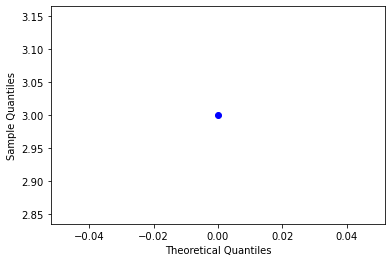

feature name=  DTP
feature values=  [25]
max value =  25 min value =  25
mean=  25.0 standard deviation=  0.0
left range=  25.0 right range=  25.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


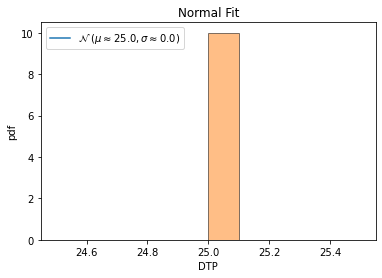


QQ plot 



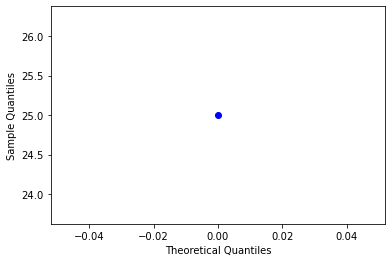

feature name=  ELPROP
feature values=  [0.98684211]
max value =  0.986842105263158 min value =  0.986842105263158
mean=  0.986842105263158 standard deviation=  0.0
left range=  0.986842105263158 right range=  0.986842105263158
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


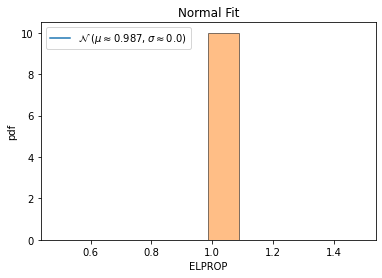


QQ plot 



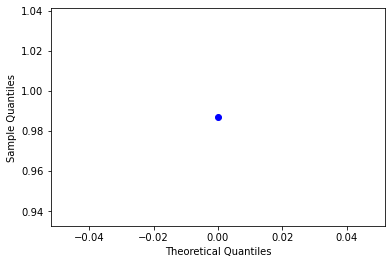

feature name=  CAL_TIME
feature values=  [510]
max value =  510 min value =  510
mean=  510.0 standard deviation=  0.0
left range=  510.0 right range=  510.0
data covered within this range=  100.0 %
data covered within 1 standard deviation=  100.0 %
data covered within 2 standard deviation=  100.0 %
data covered within 3 standard deviation=  100.0 %



normality test :----

kurtosis value=  -3.0
skewness value=  0.0


/home/ritam/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


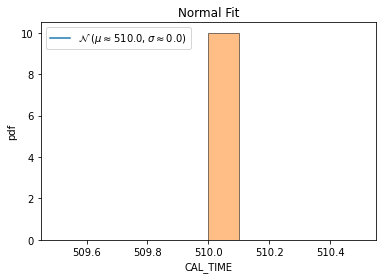


QQ plot 



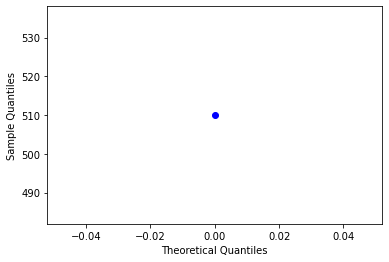

In [99]:
#after hard time and memory clusering ,
#collect the hard ones

from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt 
import scipy
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest

hard_zero_features.append('file')
hard_zero_features.append('label_mem')


#print(hard_zero_features)
print(df_hard_time_mem_feature_df.shape)
hard_time_mem_hard = df_hard_time_mem_feature_df[df_hard_time_mem_feature_df['label_mem']== 'hard']
print(hard_time_mem_hard.shape)
prior_hard= round(hard_time_mem_hard.shape[0] / df_hard_time_mem_feature_df.shape[0] ,5)

main_table=[]

for i in range(len(cols_list)):
    #if cols_list[i] not in hard_zero_features:
    if cols_list[i] in top_n_3:
        tmp_table=[]
        
        feature = cols_list[i]
        print("feature name= ",feature)
        tmp_table.append(feature)
        
        sov=np.array(hard_time_mem_hard[feature])
        print("feature values= ",sov)
        print("max value = ",np.max(sov),"min value = ",np.min(sov))
        tmp_table.append(round(np.min(sov),5))
        tmp_table.append(round(np.max(sov),5))
        
        mean = np.mean(sov)
        std = np.std(sov)
        print("mean= ",mean,"standard deviation= ",std)
        tmp_table.append(round(mean,5))
        tmp_table.append(round(std,5))
        #gamma=2
        #rx= mean - ((1- prior_hard) *gamma * std) 
        #ry= mean + ((1- prior_hard) *gamma * std)
        #rx= mean - (0.05*(gamma * std) )
        #ry= mean + (0.5*(gamma * std))
        l_weight=0.25
        r_weight=2
        rx= mean - (l_weight* std) 
        ry= mean + (r_weight* std)
        print("left range= ",rx,"right range= ", ry)
        
        val=(((rx <= sov) & (sov <= ry)).sum()) / hard_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within this range= ",v,"%")
        
        tmp_table.append(l_weight)
        tmp_table.append(r_weight)
        tmp_table.append(rx)
        tmp_table.append(ry)
        tmp_table.append(v)
        
        # 68–95–99.7 rule, also known as the empirical rule
        
        # for 1*std
        left = mean - std
        right = mean + std
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 1 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        # for 2*std
        left = mean - (2*std)
        right = mean + (2*std)
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 2 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        main_table.append(tmp_table)
        
        # for 3*std
        left = mean - (3*std)
        right = mean + (3*std)
        val=(((left <= sov) & (sov <= right)).sum()) / hard_time_mem_hard.shape[0]
        v =  round((val * 100 ),2)
        print("data covered within 3 standard deviation= ",v,"%")
        tmp_table.append(v)
        
        print("\n\n")
        
        #normality test
        print("normality test :----\n")
        # kurtosis and skew function
        kurt=scipy.stats.kurtosis(sov)
        print("kurtosis value= ",kurt)
        
        skew=scipy.stats.skew(sov)
        print("skewness value= ",skew)
        
        
        #sov_1=(sov-mean)/std
        sov_1=np.sort(sov)
        plt.plot(sov_1, norm.pdf(sov_1, mean, std),label='$\mathcal{N}$ '+ f'$( \mu \\approx {round(mean,3)} , \sigma \\approx {round(std,3)})$')
        plt.hist(sov_1,edgecolor='black',alpha=0.5,density= True)
        plt.title("Normal Fit")
        plt.xlabel(feature)
        plt.ylabel("pdf")
        plt.legend()
        #plt.savefig('/home/ritam/ontology_hardness/images/'+str(feature)+'.jpeg')
        plt.show()
        
        # Quantile-Quantile Plot Nomrality check
        print("\nQQ plot \n")
        qqplot(sov_1, line='s')
        plt.show()
        ''''
        #Statistical Normality Tests
        # Shapiro-Wilk Test
        print("\n Shapiro-Wilk Test \n ")
        #stat, p = shapiro(sov_1[0:4998])
        stat, p = normaltest(sov_1)
        print('Statistics=%.3f, p=%f' % (stat, p))
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
        print("ends normality test ------------------------------------------------\n")
        
        #print((sov_1[0:4500]))
        #break
        '''

In [100]:
hard_time_mem_hard

file  size_kb  \
3  107b3d41-1458-4d46-ae69-d1ba712085a2_EnzyO0616...     5547   

   consistency_time_milsecs  consistency_size_kb  realisation_time_milsecs  \
3                  21600449             17684888                  21600430   

   realisation_size_kb  classification_time_milsecs  classification_size_kb  \
3             17534216                     21600584                24260664   

     SOV       ENR  ...  EQVP  DISP  INV  DOMN  RANG  CHN  CHNP    ELPROP  \
3  11583  1.386573  ...     0     0    1    27    28    0   0.0  0.986842   

   CAL_TIME  label_mem  
3       510       hard  

[1 rows x 101 columns]

In [101]:
cols=['f_name','min_value','max_value','mean','std','l_weight','r_weight','left_range','right_range', 'data_cover%','1_std%','2_std%','3_std%']
hard_time_hard_mem_table=pd.DataFrame(data=main_table,columns=cols)
print(hard_time_hard_mem_table.shape)
#hard_time_hard_mem_table.to_csv('hard_time_hard_mem_table.csv',index=False)
#hard_time_mem_hard.to_csv('hard_time_mem_hard.csv',index=False)

(30, 13)


In [102]:
print(easy_time_easy_mem_table.shape)
print(easy_time_medium_mem_table.shape)
print(easy_time_hard_mem_table.shape)
print(medium_time_easy_mem_table.shape)
print(medium_time_medium_mem_table.shape)
print(medium_time_hard_mem_table.shape)
print(hard_time_easy_mem_table.shape)
print(hard_time_medium_mem_table.shape)
print(hard_time_hard_mem_table.shape)

(30, 13)
(30, 13)
(30, 13)
(30, 13)
(30, 13)
(30, 13)
(30, 13)
(30, 13)
(30, 13)


In [103]:
easy_time_easy_mem_table

f_name    min_value     max_value          mean  \
0                       size_kb     14.00000  6.404250e+05    2212.19559   
1      consistency_time_milsecs     13.00000  1.203350e+05     317.27968   
2           consistency_size_kb  14532.00000  2.143724e+07   51175.63567   
3      realisation_time_milsecs     17.00000  2.160223e+07   22203.31419   
4           realisation_size_kb  15064.00000  1.283493e+08  291911.80435   
5   classification_time_milsecs     16.00000  2.160272e+07   18447.11419   
6        classification_size_kb  15000.00000  1.265390e+08  262934.37744   
7                           SOV     20.00000  8.961020e+05    4115.16470   
8                           ENR      0.79202  2.056001e+02       2.04327   
9                           EOG      0.00000  6.325900e+00       2.46000   
10                          RCH      0.00000  9.997500e-01       0.32201   
11                          CYC      0.00000  2.576625e+06    8714.45731   
12                         HGCI      0.00000  6.124400e+04     110.11137   
13                     ELCLSPRT      0.03407  1.000000e+00       0.89436   
14                          IHR      0.00000  6.150960e+05     960.74888   
15                          IIR      0.00000  4.644920e+05     345.27533   
16                          ITR      0.00000  1.998450e+05     329.03923   
17                         aNOC      0.00000  3.597755e+01       0.87925   
18                         aCID      0.49990  8.657473e+04      11.33667   
19                         mCID      1.00000  4.761240e+05    1746.55667   
20                         aCOD      0.83333  3.338125e+02       2.34489   
21                         tNOP      5.00000  1.049095e+06    8410.94618   
22                           EF      0.00000  2.067560e+05    1258.77990   
23                        SELFP      0.00000  3.529000e-01       0.00047   
24                       MNCARP      0.00000  1.000000e+00       0.01173   
25                          CAR      0.00000  1.843000e+03       5.75924   
26                         CARP      0.00000  1.000000e+00       0.01947   
27                        IFUNP      0.00000  3.084000e-01       0.00212   
28                        REFLE      0.00000  2.000000e+00       0.00129   
29                     CAL_TIME      0.00000  5.443500e+05     992.27888   

             std  l_weight  r_weight     left_range   right_range  \
0   1.078961e+04      0.25         2    -485.205902  2.379141e+04   
1   2.063793e+03      0.25         2    -198.668567  4.444866e+03   
2   3.140244e+05      0.25         2  -27330.460159  6.792244e+05   
3   6.348555e+05      0.25         2 -136510.571790  1.291914e+06   
4   3.970693e+06      0.25         2 -700761.460982  8.233298e+06   
5   5.663768e+05      0.25         2 -123147.093550  1.151201e+06   
6   3.560520e+06      0.25         2 -627195.613631  7.383974e+06   
7   1.821390e+04      0.25         2    -438.311176  4.054297e+04   
8   4.202340e+00      0.25         2       0.992689  1.044795e+01   
9   6.393600e-01      0.25         2       2.300157  3.738724e+00   
10  2.153200e-01      0.25         2       0.268181  7.526607e-01   
11  4.956671e+04      0.25         2   -3677.221067  1.078479e+05   
12  1.431875e+03      0.25         2    -247.857463  2.973862e+03   
13  1.668800e-01      0.25         2       0.852639  1.228109e+00   
14  1.291087e+04      0.25         2   -2266.969763  2.678250e+04   
15  7.166605e+03      0.25         2   -1446.375927  1.467849e+04   
16  3.978766e+03      0.25         2    -665.652331  8.286572e+03   
17  5.720500e-01      0.25         2       0.736238  2.023361e+00   
18  6.852911e+02      0.25         2    -159.986113  1.381919e+03   
19  1.303772e+04      0.25         2   -1512.873311  2.782200e+04   
20  3.009140e+00      0.25         2       1.592602  8.363164e+00   
21  3.628505e+04      0.25         2    -660.316590  8.098105e+04   
22  6.879520e+03      0.25         2    -461.099994  1.501782e+04   
23  1.028000

In [104]:
x_easy

size_kb                        consistency_time_milsecs          \
              min     max           mean                      min     max   
label_mem                                                                   
easy           14  640425    2212.195587                       13  120335   
hard        11829  260201   71938.300000                    97796  279132   
medium        162  543808  174624.181818                    18699  308466   

                         consistency_size_kb                           \
                    mean                 min        max          mean   
label_mem                                                               
easy          317.279681               14532   21437240  5.117564e+04   
hard       196960.200000           107716396  128838488  1.242852e+08   
medium     155552.272727            25593828   80439780  4.601777e+07   

          realisation_time_milsecs  ...        CHN CHNP                      \
                               min  ...       mean  min       max      mean   
label_mem                           ...                                       
easy                            17  ...   3.585351  0.0  1.732673  0.044739   
hard                        117096  ...  11.200000  0.0  0.229885  0.077045   
medium                        7085  ...   3.636364  0.0  0.081633  0.036165   

             ELPROP                     CAL_TIME                         
                min       max      mean      min     max           mean  
label_mem                                                                
easy       0.000000  1.000000  0.824065        0  544350     992.278884  
hard       0.838828  0.948187  0.865869     1520  335900   55970.000000  
medium     0.000000  0.992188  0.569143      450  929310  253535.454545  

[3 rows x 297 columns]

In [105]:
#(easy_feature_sort_dic)
#medium_feature_sort_dic
#hard_feature_sort_dic

n=50

easy_top_n_features=dict(list(easy_feature_sort_dic.items())[:n])
#print(easy_top_n_features)
medium_top_n_features=dict(list(medium_feature_sort_dic.items())[:n])
#print(medium_top_n_features)
hard_top_n_features=dict(list(hard_feature_sort_dic.items())[:n])
#print(hard_top_n_features)

easy_key=list(easy_top_n_features.keys())
#print(easy_key)
medium_key=list(medium_top_n_features.keys())
#print(medium_key)
hard_key=list(hard_top_n_features.keys())
#print(hard_key)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
  
inter1 = (intersection(easy_key, medium_key))
print(len(inter1))

inter2 = (intersection(inter1, hard_key))
print((inter2))

#print(list(x_easy['EOG']['mean']))

main=[]
rows=[]
for i in range(len(inter2)):
    f=inter2[i]
    rows.append(f)
    #print(f)
    tmp=[]
    l1=list(x_easy[f]['mean'])
    for j in range(len(l1)):
        tmp.append(round(l1[j],4))
    
    l2=list(x_medium[f]['mean'])
    for j in range(len(l2)):
        tmp.append(round(l2[j],4))
    
    l3=list(x_hard[f]['mean'])
    for j in range(len(l3)):
        tmp.append(round(l3[j],4))
    
    #print(tmp)
    main.append(tmp)
    #break

40
['CARP', 'CONJP', 'aNOP', 'classification_size_kb', 'consistency_time_milsecs', 'EF', 'aCID', 'IHR', 'CAL_TIME', 'IND', 'HLC', 'tNOP', 'DISJ', 'ITR', 'SUBP', 'classification_time_milsecs', 'MNCARP', 'UF', 'CYC', 'SOV', 'EOG', 'HGCI', 'consistency_size_kb', 'mNOP', 'DTPP', 'tCOD', 'size_kb', 'aCOD', 'tNOC', 'realisation_time_milsecs']


In [106]:
print(len(main))
cols=['easy_time_easy_mem','easy_time_hard_mem','easy_time_medium_mem','medium_time_easy_mem','medium_time_hard_mem',
      'medium_time_medium_mem','hard_time_easy_mem','hard_time_hard_mem','hard_time_medium_mem']
top_n_mean_feature=pd.DataFrame(data=main,columns=cols,index=rows)
top_n_mean_feature

30


easy_time_easy_mem  easy_time_hard_mem  \
CARP                                     0.0195        2.948000e-01   
CONJP                                    0.0662        2.039000e-01   
aNOP                                     1.3595        1.079600e+00   
classification_size_kb              262934.3774        1.115421e+08   
consistency_time_milsecs               317.2797        1.969602e+05   
EF                                    1258.7799        3.183260e+04   
aCID                                    11.3367        3.679959e+02   
IHR                                    960.7489        1.579155e+05   
CAL_TIME                               992.2789        5.597000e+04   
IND                                   1712.3709        5.153520e+04   
HLC                                   1256.7663        4.388570e+04   
tNOP                                  8410.9462        8.206240e+04   
DISJ                                     6.8626        3.050000e+01   
ITR                                    329.0392        3.303010e+04   
SUBP                                    50.5062        4.760000e+01   
classification_time_milsecs          18447.1142        2.718102e+06   
MNCARP                                   0.0117        2.390000e-02   
UF                                      16.0851        7.300000e+00   
CYC                                   8714.4573        5.766118e+05   
SOV                                   4115.1647        1.924497e+05   
EOG                                      2.4600        2.450900e+00   
HGCI                                   110.1114        3.547900e+03   
consistency_size_kb                  51175.6357        1.242852e+08   
mNOP                                    13.2447        8.400000e+00   
DTPP                                     0.1402        1.551000e-01   
tCOD                                 12587.5491        1.452474e+05   
size_kb                               2212.1956        7.193830e+04   
aCOD                                     2.3449        6.230200e+00   
tNOC                                  5930.8021        3.001110e+04   
realisation_time_milsecs             22203.3142        4.498692e+06   

                             easy_time_medium_mem  medium_time_easy_mem  \
CARP                                 1.763000e-01          9.090000e-02   
CONJP                                3.128000e-01          3.939000e-01   
aNOP                                 1.144900e+00          9.943000e-01   
classification_size_kb               4.563510e+07          5.310937e+07   
consistency_time_milsecs             1.555523e+05          6.250855e+05   
EF                                   4.725455e+02          8.000000e+00   
aCID                                 1.437523e+03          9.343422e+03   
IHR                                  4.283581e+05          3.866490e+06   
CAL_TIME                             2.535355e+05          4.271891e+06   
IND                                  1.633014e+05          1.160805e+06   
HLC                                  1.745450e+01          0.000000e+00   
tNOP                                 3.896000e+03          1.730000e+02   
DISJ                                 1.600000e+01          2.000000e+00   
ITR                                  4.652791e+04          4.656974e+05   
SUBP                                 3.190910e+01          6.500000e+01   
classification_time_milsecs          1.641355e+05          6.324738e+05   
MNCARP                               1.300000e-02          3.030000e-02   
UF                                   1.281820e+01          1.000000e+00   
CYC                                  1.773622e+06          1.259438e+07   
SOV                                  5.667673e+05          3.795093e+06   
EOG                                  3.015200e+00          2.684400e+00   
HGCI                                 3.047273e+02          1.900000e+01   
consistency_size_kb                  4.601777e+07          5.078432e+07   
mNOP                       

In [107]:
 # find the common features from easy , medium , hard  which needs to be rejected 
    
print(easy_zero_features)
print(medium_zero_features)
print(hard_zero_features)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
  
inter1 = (intersection(easy_zero_features, medium_zero_features))
print(inter1)

['aDIT', 'mDIT', 'tDIT', 'ASYMP', 'REFLEP', 'IRREFP', 'file', 'label_mem', 'file', 'label_mem', 'file', 'label_mem']
['SUPECHN', 'SUBECHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUPDCHN', 'aDIT', 'mDIT', 'tDIT', 'ASYMP', 'REFLEP', 'IRREFP', 'file', 'label_mem', 'file', 'label_mem', 'file', 'label_mem']
['GCI', 'ESUB', 'DSUB', 'CSUB', 'SUPECHN', 'SUBECHN', 'SUBCCHN', 'SUPDCHN', 'DSUPECHN', 'DSUBECHN', 'DSUBCCHN', 'DSUPDCHN', 'aDIT', 'mDIT', 'tDIT', 'ENUM', 'ENUMP', 'NEG', 'NEGP', 'SELF', 'SELFP', 'ASYM', 'ASYMP', 'REFLE', 'REFLEP', 'IRREF', 'IRREFP', 'DISP', 'file', 'label_mem', 'file', 'label_mem', 'file', 'label_mem']
['label_mem', 'mDIT', 'REFLEP', 'tDIT', 'aDIT', 'ASYMP', 'file', 'IRREFP']


In [108]:
c=easy_time_mem_easy["consistency_size_kb"]
#print(c.max())
easy_time_mem_easy

file  size_kb  \
0      0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....       95   
1                               00006.owl_functional.owl      425   
2                               00008.owl_functional.owl      130   
3                               00011.owl_functional.owl       77   
4                               00012.owl_functional.owl       99   
...                                                  ...      ...   
16331  44487e0b-5833-4d9c-8488-d3f9694b0167_ppi_chees...       95   
16332  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...      151   
16333  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...       31   
16334  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...       95   
16335  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...       95   

       consistency_time_milsecs  consistency_size_kb  \
0                            27                16240   
1                            51                17836   
2                            43                19856   
3                            26                15720   
4                            30                16024   
...                         ...                  ...   
16331                        29                16276   
16332                        24                15596   
16333                        23                15288   
16334                        30                16148   
16335                        30                16236   

       realisation_time_milsecs  realisation_size_kb  \
0                            28                17252   
1                            75                22824   
2                            43                21168   
3                            33                17916   
4                            34                17688   
...                         ...                  ...   
16331                        30                17152   
16332                        30                17100   
16333                        25                15628   
16334                        31                17088   
16335                        31                17296   

       classification_time_milsecs  classification_size_kb   SOV       ENR  \
0                               27                   16976   200  2.625000   
1                               61                   22320  1148  1.261695   
2                               45                   20884   238  2.144695   
3                               33                   17992   118  2.366492   
4                               32                   17696   173  2.015936   
...                            ...                     ...   ...       ...   
16331                           30                   16936   201  2.613333   
16332                           31                   16732   343  0.997085   
16333                           21                   15376   108  1.759259   
16334                           29                   16888   201  2.613333   
16335                           28                   16952   201  2.613333   

       ...  EQVP  DISP  INV  DOMN  RANG  CHN  CHNP    ELPROP  CAL_TIME  \
0      ...     4     0    6    96    94    0   0.0  0.931624       280   
1      ...     0     0   10     0     0    0   0.0  0.729730       110   
2      ...     0     0    0    70    70    0   0.0  1.000000        40   
3      ...     0     0    0    70    70    0   0.0  1.000000       150   
4      ...     0     0    1    96    98    0   0.0  0.988506        60   
...    ...   ...   ...  ...   ...   ...  ...   ...       ...       ...   
16331  ...     4     0    6    96    94    0   0.0  0.931624        30   
16332  ...     0     0    0     0     0    0   0.0  0.000000        40   
16333  ...     0     0   21    57    58    0   0.0  0.852349        70   
16334  ...     4     0    6    96    94    0   0.0  0.931624        40   
16335  ...     4     0    6    96    94    0   0.0  0.931624        30   

       label_mem  
0           easy  
1           e

In [109]:
df=easy_time_mem_easy
i=df.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True)
i

file  size_kb  \
0                                          OWL2RL-50.owl   260198   
1                                          OWL2QL-50.owl   260196   
2                                          OWL2EL-20.owl   102413   
3                                          OWL2RL-20.owl   102417   
4                                          OWL2QL-20.owl   102415   
...                                                  ...      ...   
16310  afc0a0d8-54cd-4442-b262-9de5309089e9_lsrmay.rd...       19   
16311  9cd8077f-deae-4e18-bbf0-3c4ea89b08f7_PropertyD...       31   
16312  approximated_0993ac92-a898-4e85-9d27-f8423a0c3...       44   
16313  8d27ac70-9cb2-4004-a6e1-47ccce347b2e_my.obo.CU...       27   
16314  approximated_01a3c1bb-67aa-4262-9749-765841d10...       44   

       consistency_time_milsecs  consistency_size_kb  \
0                        118837             21437240   
1                        120335             20712600   
2                         50773             10250036   
3                         51119              8598024   
4                         45894              8317740   
...                         ...                  ...   
16310                        17                14548   
16311                        18                14548   
16312                        60                14544   
16313                        16                14544   
16314                        71                14532   

       realisation_time_milsecs  realisation_size_kb  \
0                        128508             21757208   
1                        109595             21009396   
2                         51691             10355292   
3                         49510              8727988   
4                         46911              8437804   
...                         ...                  ...   
16310                        18                15276   
16311                        21                15232   
16312                        26                15520   
16313                        19                15284   
16314                        29                15588   

       classification_time_milsecs  classification_size_kb     SOV       ENR  \
0                           122102                21460440  896102  3.875132   
1                           109428                20747428  896097  3.875305   
2                            50365                10261900  385148  3.586492   
3                            48873                 8619240  385156  3.586536   
4                            47031                 8333112  385151  3.586925   
...                            ...                     ...     ...       ...   
16310                           18                   15140      55  1.008264   
16311                           22                   15168      93  1.236559   
16312                           31                   15332     148  1.393782   
16313                           19                   15188      84  1.360000   
16314                           26                   15452     148  1.393782   

       ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  CAL_TIME  \
0      ...     5     1   22    70    57    8  0.079208  0.838983    511720   
1      ...     5     1   22    73    61    0  0.000000  0.834081    308820   
2      ...     4     0    0    56    46    8  0.081633  0.954286     68420   
3      ...     5     1   22    70    57    8  0.079208  0.838983     66110   
4      ...     5     1   22    73    61    0  0.000000  0.834081    193390   
...    ...   ...   ...  ...   ...   ...  ...       ...       ...       ...   
16310  ...     0     0    0     0     1    0  0.000000  1.000000        20   
16311  ...     0     0    0    24     6    0  0.000000  1.000000        10   
16312  ...     0     0    0     0     0    7  0.106061  1.000000        20   
16313  ...     0     0    0     0     0    0  0.000000  0.500000        70   
16314  ...     0     0    0     0     0    7  0.106061  1.

In [110]:
hard_time_mem_easy_copy=hard_time_mem_easy.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True)
easy_time_mem_easy_copy=(easy_time_mem_easy.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))[0:4]
#easy_time_mem_easy_copy
hard_time_mem_easy_copy

file  size_kb  \
0  0952091f-65b7-4abb-88d9-589ec5d8709e_onmapping...     1180   
1  0805c492-a3fa-41e6-b667-9968da4d9e3f_iridlcfds...     1178   
2  feaf1577-ec44-4912-9caa-a57a720af930_cfobj.owl...     1150   
3  085abd30-44cb-4bc3-90b2-ba12067a2253_premises6...       64   

   consistency_time_milsecs  consistency_size_kb  realisation_time_milsecs  \
0                  21600095              1423224                  21600073   
1                  21600095              1411176                  21600125   
2                  21600056              1387476                  21600107   
3                  21600051              1352844                  21600273   

   realisation_size_kb  classification_time_milsecs  classification_size_kb  \
0              1391916                       656914                 1097220   
1              1431748                     21600094                 1420944   
2              1408484                     21600114                 1394612   
3              9697004                     21600477                18797388   

    SOV       ENR  ...  EQVP  DISP  INV  DOMN  RANG  CHN      CHNP    ELPROP  \
0  2801  1.407369  ...     0     0    5   112    90    2  0.013986  0.971193   
1  2798  1.407033  ...     1     0    5   112    90    2  0.013986  0.963265   
2  2730  1.406852  ...     0     0    2    73    66    2  0.020833  0.976331   
3   209  1.787500  ...     0     0    0     0     0    0  0.000000  0.000000   

   CAL_TIME  label_mem  
0       180       easy  
1       230       easy  
2       340       easy  
3        80       easy  

[4 rows x 101 columns]

CARP
[0.0563, 0.058, 0.0597, 0.2042] [0.0, 0.0, 0.0, 0.0]


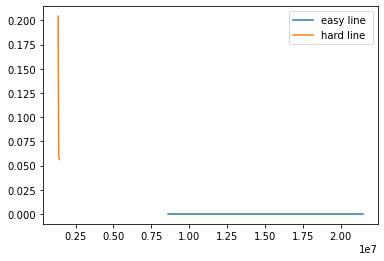

CONJP
[0.2113, 0.2174, 0.2239, 0.2723] [0.4062, 0.4167, 0.4231, 0.4062]


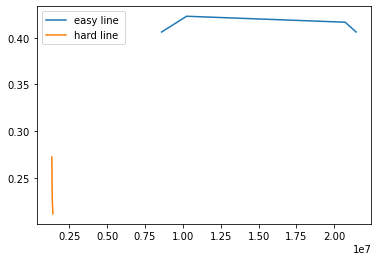

aNOP
[1.05084745762712, 1.04597701149425, 1.03921568627451, 0.9971428571428572] [1.1017964071856288, 1.0256410256410255, 0.9936708860759492, 1.1017964071856288]


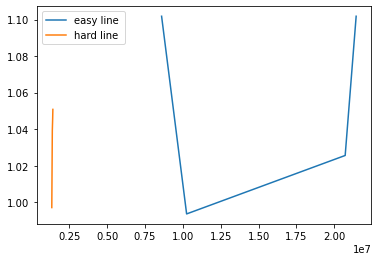

classification_size_kb
[1097220, 1420944, 1394612, 18797388] [21460440, 20747428, 10261900, 8619240]


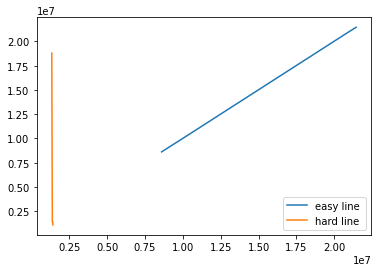

consistency_time_milsecs
[21600095, 21600095, 21600056, 21600051] [118837, 120335, 50773, 51119]


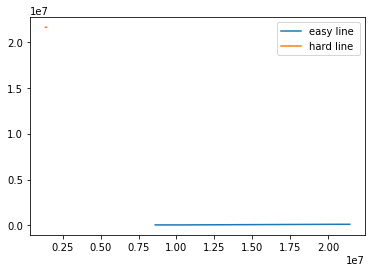

EF
[11, 11, 11, 40] [14, 13, 13, 14]


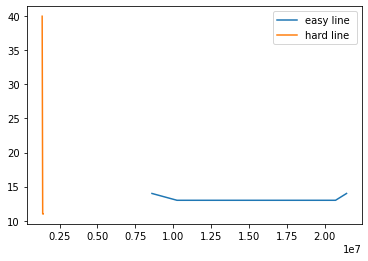

aCID
[7.5819209039548, 7.6839080459770095, 8.28758169934641, 1.0457142857142858] [2070.502994011976, 2216.8141025641025, 879.3164556962025, 832.2814371257484]


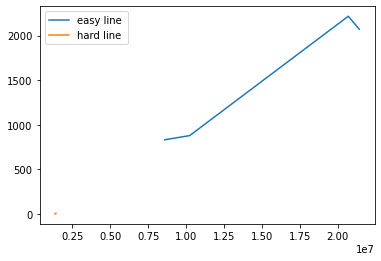

IHR
[5, 5, 5, 0] [615096, 615095, 272135, 243535]


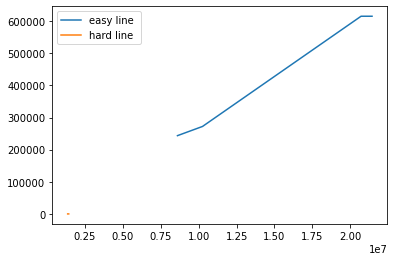

CAL_TIME
[180, 230, 340, 80] [511720, 308820, 68420, 66110]


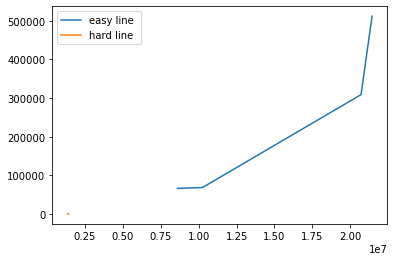

IND
[988, 987, 986, 1] [246273, 246271, 97672, 97674]


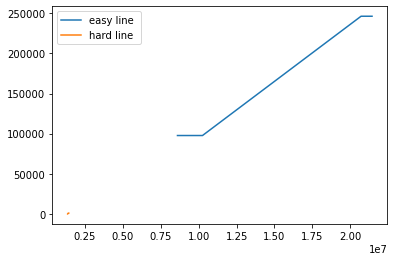

HLC
[0, 0, 0, 0] [2, 14, 0, 2]


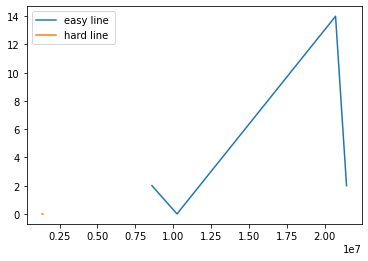

tNOP
[186, 182, 159, 349] [184, 160, 157, 184]


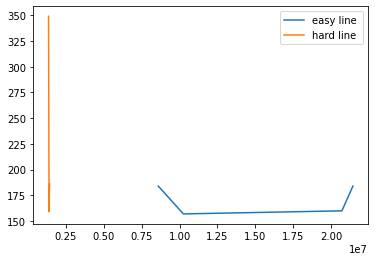

DISJ
[8, 8, 7, 0] [1, 0, 0, 1]


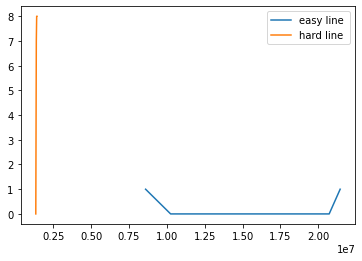

ITR
[3, 3, 3, 0] [98278, 0, 38993, 38993]


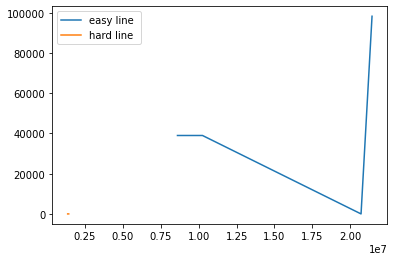

SUBP
[8, 8, 3, 0] [53, 51, 53, 53]


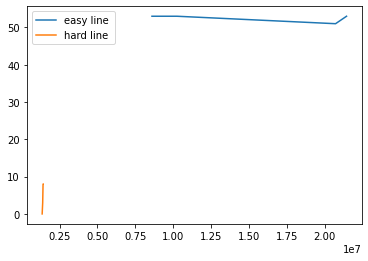

classification_time_milsecs
[656914, 21600094, 21600114, 21600477] [122102, 109428, 50365, 48873]


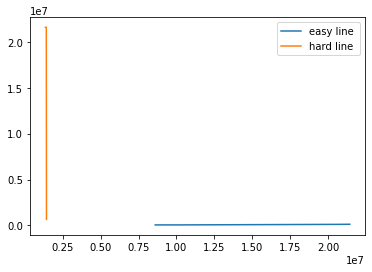

MNCARP
[0.0, 0.0, 0.0, 0.2461] [0.0, 0.0, 0.0, 0.0]


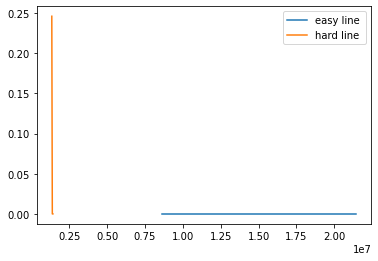

UF
[8, 8, 8, 5] [1, 0, 0, 1]


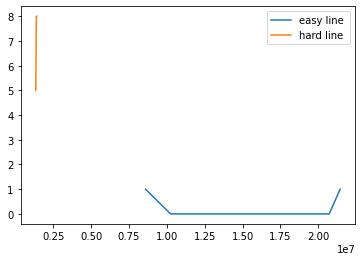

CYC
[1178, 1175, 1146, 315] [2576519, 2576625, 996264, 996317]


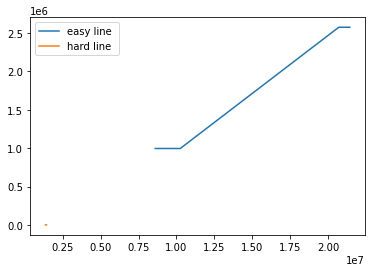

SOV
[2801, 2798, 2730, 209] [896102, 896097, 385148, 385156]


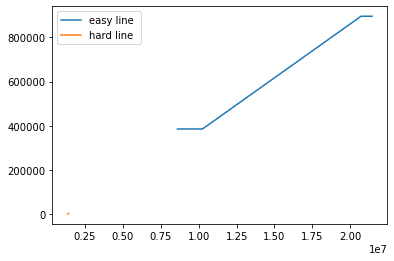

EOG
[1.92952060421639, 1.92739649886995, 1.8950148158663005, 1.5978102492560464] [2.7207907646223997, 2.72074782779275, 2.539535489981705, 2.539947867616255]


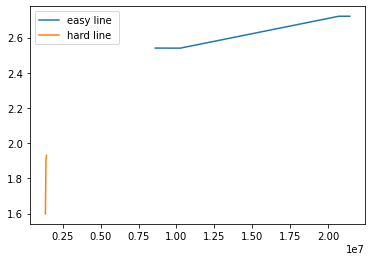

HGCI
[41, 40, 40, 0] [4, 3, 17, 4]


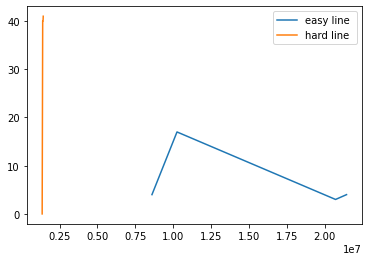

consistency_size_kb
[1423224, 1411176, 1387476, 1352844] [21437240, 20712600, 10250036, 8598024]


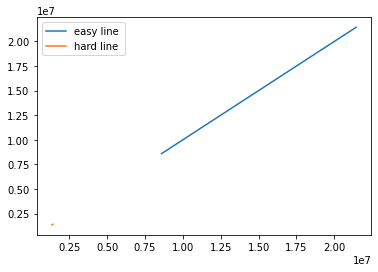

mNOP
[3, 3, 3, 1] [2, 2, 1, 2]


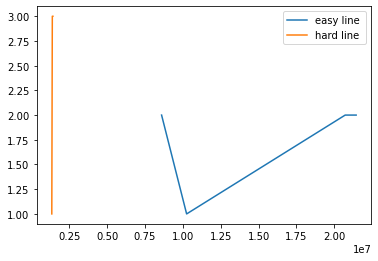

DTPP
[0.5455, 0.5455, 0.5104, 0.4583] [0.1188, 0.1237, 0.1224, 0.1188]


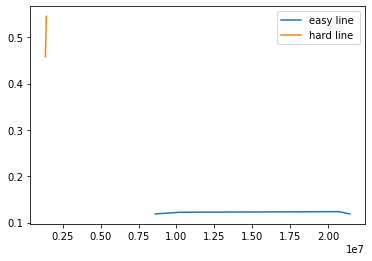

tCOD
[303, 296, 270, 698] [2299, 2342, 2159, 2300]


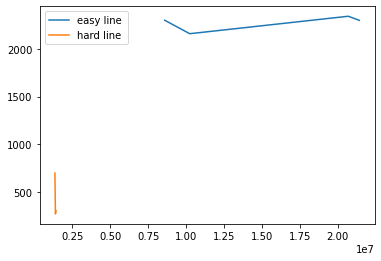

size_kb
[1180, 1178, 1150, 64] [260198, 260196, 102413, 102417]


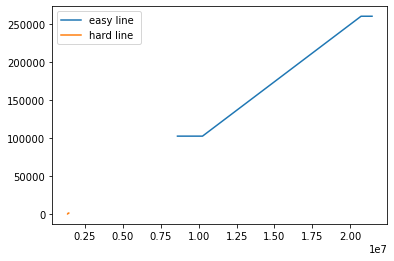

aCOD
[1.71186440677966, 1.7011494252873602, 1.7647058823529398, 1.9942857142857144] [13.766467065868266, 15.012820512820511, 13.664556962025314, 13.772455089820356]


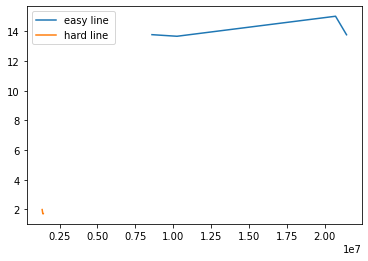

tNOC
[96, 94, 78, 0] [143, 127, 121, 143]


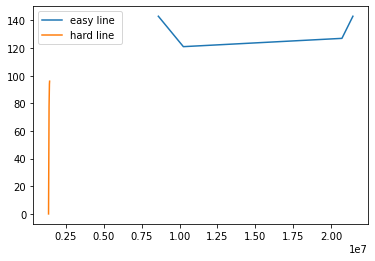

realisation_time_milsecs
[21600073, 21600125, 21600107, 21600273] [128508, 109595, 51691, 49510]


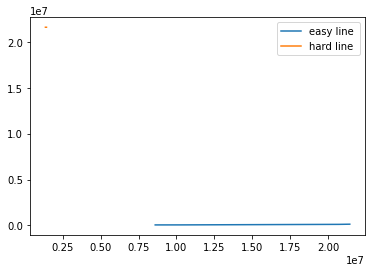

In [111]:
from matplotlib import pyplot as plt
%matplotlib inline


#print(rows)
for i in range(len(rows)):
    f=rows[i]
    h_x=list(hard_time_mem_easy_copy["consistency_size_kb"])
    h_y=list(hard_time_mem_easy_copy[f])
    e_x=list(easy_time_mem_easy_copy["consistency_size_kb"])
    e_y=list(easy_time_mem_easy_copy[f])
    print((f))
    print(h_y,e_y)
    plt.plot(e_x, e_y, label = "easy line")
    plt.plot(h_x, h_y, label = "hard line ")
    plt.legend()
    plt.show()

    #break

In [112]:
import pickle
p1 = open("easy_time_mem_easy","wb")
pickle.dump(easy_time_mem_easy, p1)
p1.close()

p2 = open("easy_time_mem_medium","wb")
pickle.dump(easy_time_mem_medium, p2)
p2.close()

p3 = open("easy_time_mem_hard","wb")
pickle.dump(easy_time_mem_hard, p3)
p3.close()

p4 = open("medium_time_mem_easy","wb")
pickle.dump(medium_time_mem_easy, p4)
p4.close()

p5 = open("medium_time_mem_medium","wb")
pickle.dump(medium_time_mem_medium, p5)
p5.close()

p6 = open("medium_time_mem_hard","wb")
pickle.dump(medium_time_mem_hard, p6)
p6.close()

p7 = open("hard_time_mem_easy","wb")
pickle.dump(hard_time_mem_easy, p7)
p7.close()

p8 = open("hard_time_mem_medium","wb")
pickle.dump(hard_time_mem_medium, p8)
p8.close()

p9 = open("hard_time_mem_hard","wb")
pickle.dump(hard_time_mem_hard, p9)
p9.close()

In [113]:
p10 = open("rows","wb")
pickle.dump(rows, p10)
p10.close()